# EDA

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import nltk
import stopwords
from wordcloud import WordCloud, STOPWORDS
import re
import string

# Seed Data Set

#### The expected data to be collected from the summary of the seed dataset.

In [53]:
data_type = ["gossipcop_real", "gossipcop_fake", "politifact_real", "politifact_fake"]
seed_data = []
for d in data_type:
    dat = pd.read_csv("data/seed_dataset/" + d + ".csv")
    seed_data.append(dat)

In [54]:
seed_data[0]

id                                           news_url  \
0      gossipcop-882573  https://www.brides.com/story/teen-mom-jenelle-...   
1      gossipcop-875924  https://www.dailymail.co.uk/tvshowbiz/article-...   
2      gossipcop-894416        https://en.wikipedia.org/wiki/Quinn_Perkins   
3      gossipcop-857248  https://www.refinery29.com/en-us/2018/03/19192...   
4      gossipcop-884684  https://www.cnn.com/2017/10/04/entertainment/c...   
...                 ...                                                ...   
16812  gossipcop-891749  https://omgcheckitout.com/2017-hollywood-film-...   
16813  gossipcop-941486  https://pagesix.com/2018/06/04/jada-pinkett-sm...   
16814  gossipcop-953143  https://www.etonline.com/tinsley-mortimer-reac...   
16815  gossipcop-954366  https://www.healthbreakingnews.net/2018/07/pri...   
16816  gossipcop-877062  https://www.cosmopolitan.com/uk/entertainment/...   

                                                   title  \
0      Teen Mom Star Jenelle Evans' Wedding Dress Is ...   
1      Kylie Jenner refusing to discuss Tyga on Life ...   
2                                          Quinn Perkins   
3      I Tried Kim Kardashian's Butt Workout & Am For...   
4      Celine Dion donates concert proceeds to Vegas ...   
...                                                  ...   
16812  2017 Hollywood Film Awards: The Complete List ...   
16813  Jada Pinkett Smith explains why son Jaden move...   
16814  Tinsley Mortimer Reacts to Luann de Lesseps' R...   
16815  Prince Harry Carries on Princess Diana’s Legac...   
16816  Kylie Jenner is actually terrified of butterflies   

                                               tweet_ids  
0      912371411146149888\t912371528343408641\t912372...  
1      901989917546426369\t901989992074969089\t901990...  
2      931263637246881792\t931265332022579201\t931265...  
3      868114761723936769\t868122567910936576\t868128...  
4      915528047004209152\t915529285171122176\t915530...  
...                                                  ...  
16812  927385466357260288\t927386601034010625\t927387...  
16813  1004044947006386178\t1004045964401889285\t1004...  
16814  1019924845889572864\t1019925702676709377\t1019...  
16815  1021766291139584000\t1021772054599802880\t1021...  
16816                                                NaN  

[16817 rows x 4 columns]

In [55]:
def get_summary(data, dat_type):
    print("-----------------------------------------")
    print("Dataset: {}".format(dat_type))
    
    #drop nan tweets
    data.dropna()
    
    #number of articles:
    print("Total number of articles: {}".format(data.shape[0]))
    
    #number of unique tweet ids:
    data.tweet_ids = data.tweet_ids.str.split()
    tweets = set()
    npdata = data.to_numpy()
    for i in range(npdata.shape[0]):
        try:
            tweets.update(npdata[i][-1])
        except:
            #Nan encountered
            pass
    print("Total number of Tweet IDs: ",len(tweets))
    print("-----------------------------------------")

In [56]:
for t, i in enumerate(seed_data):
    get_summary(i.copy(), data_type[t])

-----------------------------------------
Dataset: gossipcop_real
Total number of articles: 16817
Total number of Tweet IDs:  876967
-----------------------------------------
-----------------------------------------
Dataset: gossipcop_fake
Total number of articles: 5323
Total number of Tweet IDs:  519581
-----------------------------------------
-----------------------------------------
Dataset: politifact_real
Total number of articles: 624
Total number of Tweet IDs:  399237
-----------------------------------------
-----------------------------------------
Dataset: politifact_fake
Total number of articles: 432
Total number of Tweet IDs:  164892
-----------------------------------------


In [82]:
import random
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %7d%%)" % random.randint(0, 40) 
# hsla(0, 0%, 7%, 1)

In [87]:
def generate_wordcloud(data, t):
    word_string = ' '.join(data.title)
    word_string = re.sub('([A-Z]{1})', r'\1', word_string).lower()
    worrd_string = re.sub('[^a-zA-Z0-9-_*.\'\"]', ' ', word_string)
    STOPWORDS.update(list(string.ascii_lowercase))
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', max_words = 800, width=800, height=400).generate(word_string)
    wordcloud.recolor(color_func = grey_color_func)
    plt.figure(figsize = (100, 100))
    plt.clf()
    plt.tight_layout(pad=0)
    plt.imshow(wordcloud)
    plt.axis('off')
    print("-----------------------------------------")
    print("Title WordCloud for ", t)
    plt.show()

-----------------------------------------
Title WordCloud for  gossipcop_real


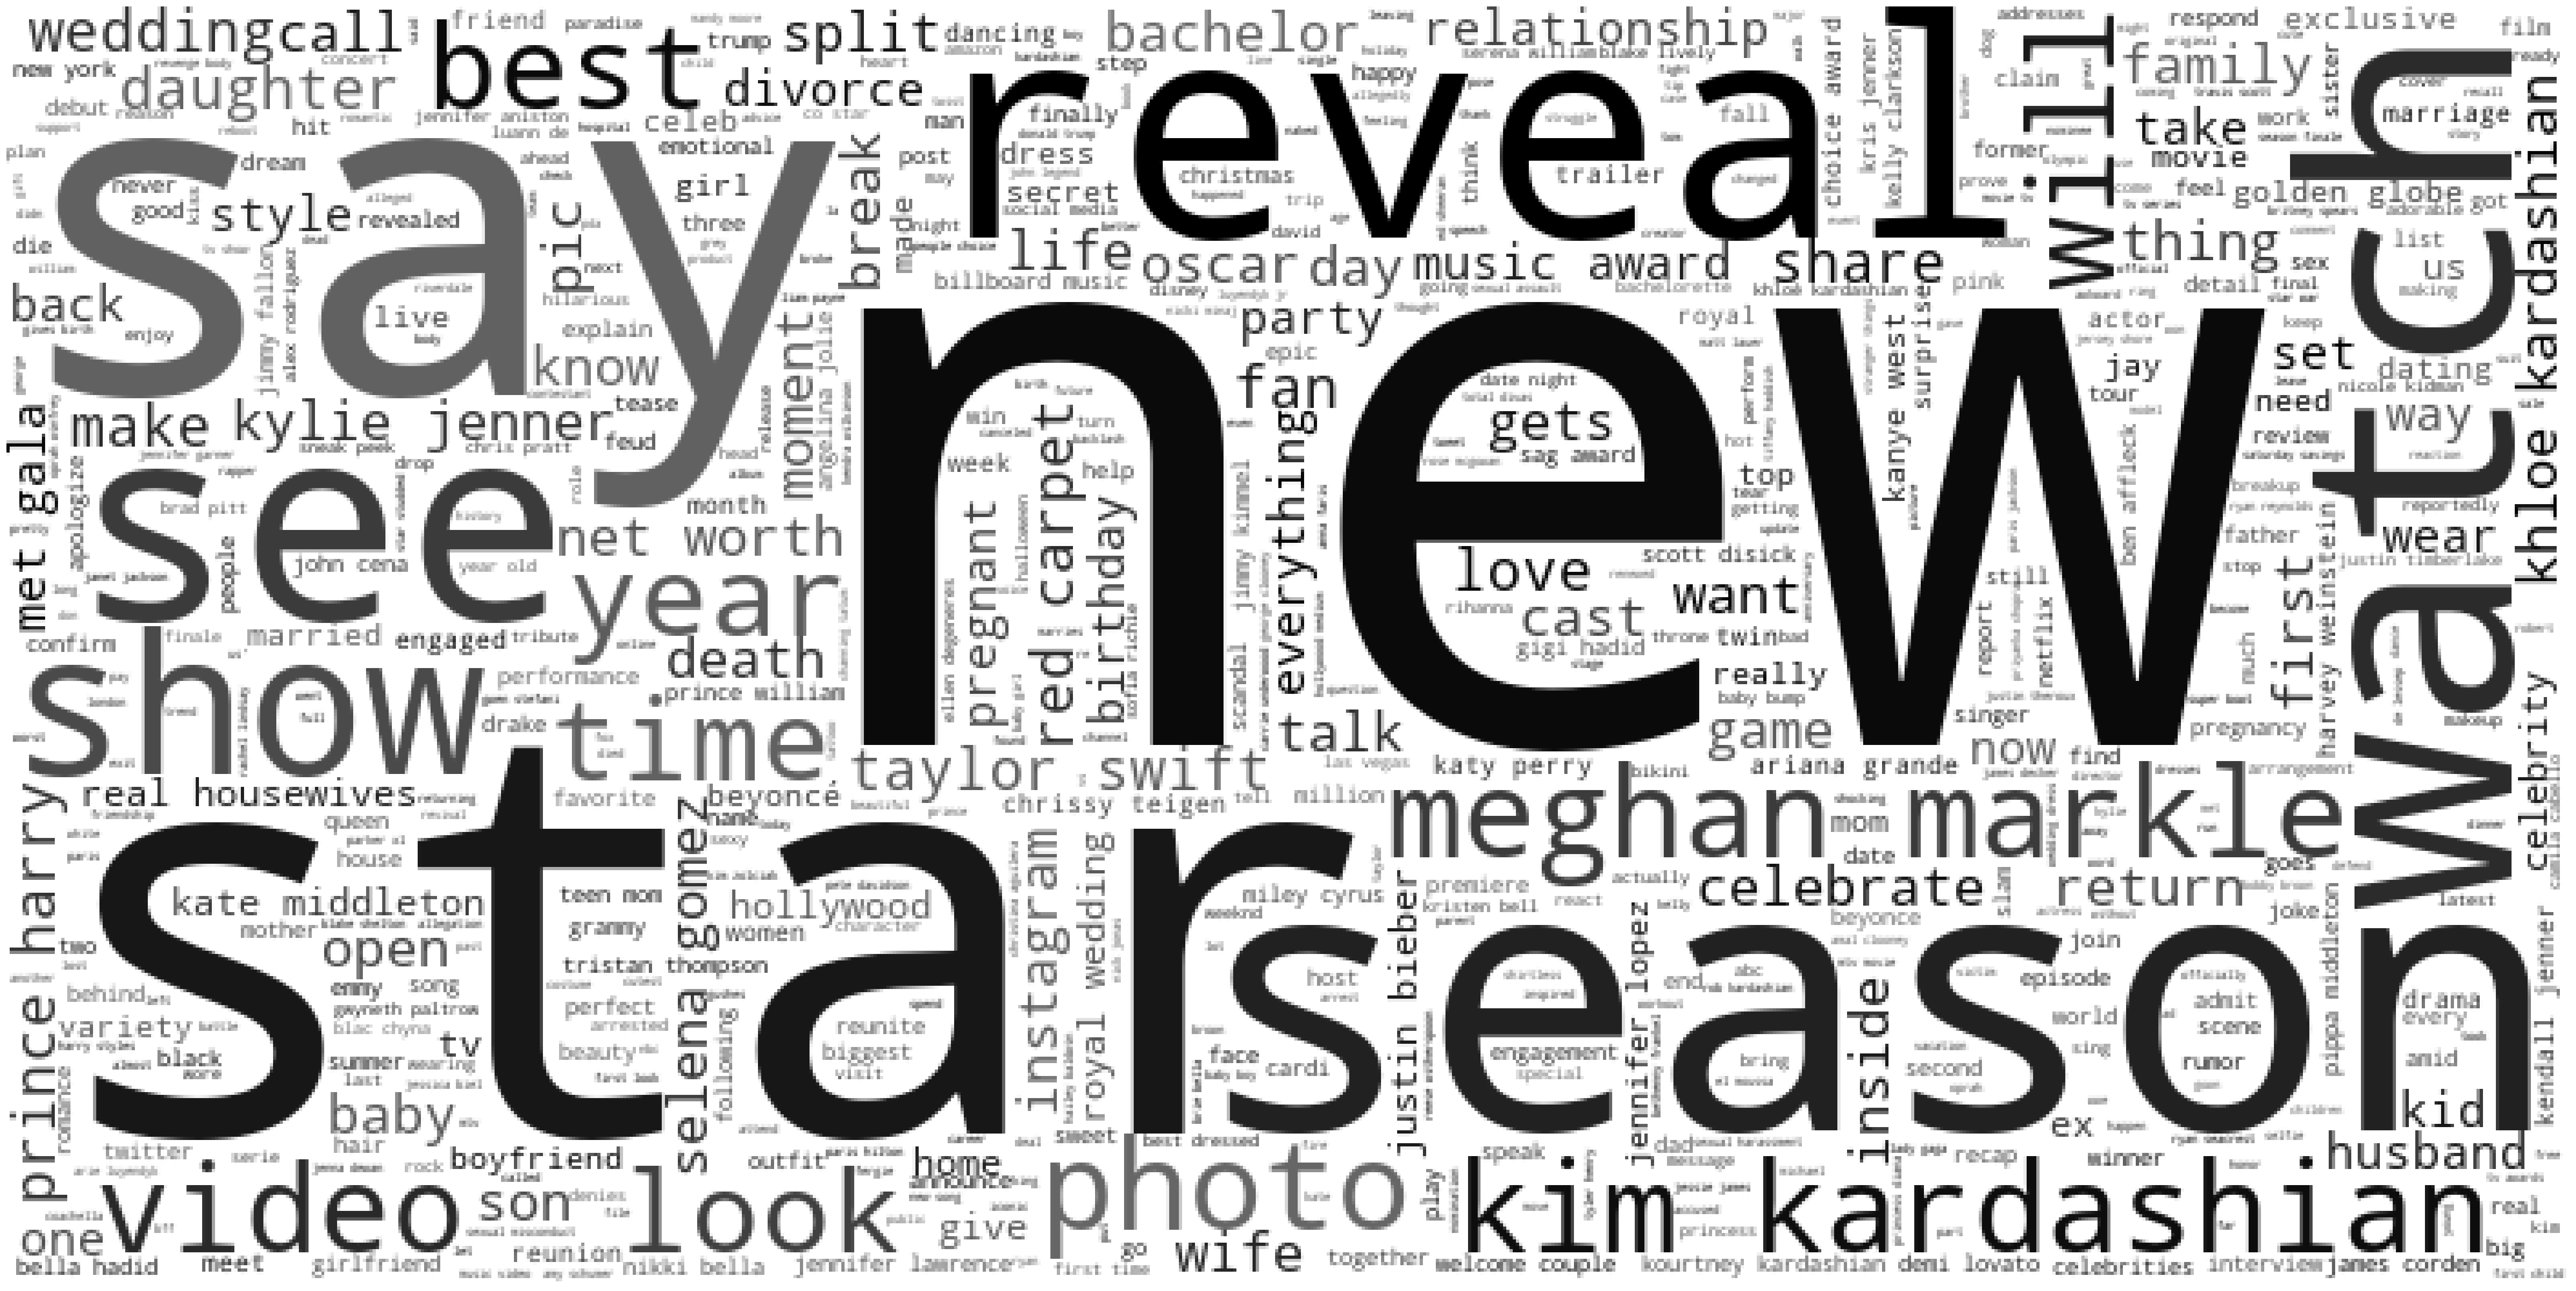

-----------------------------------------
Title WordCloud for  gossipcop_fake


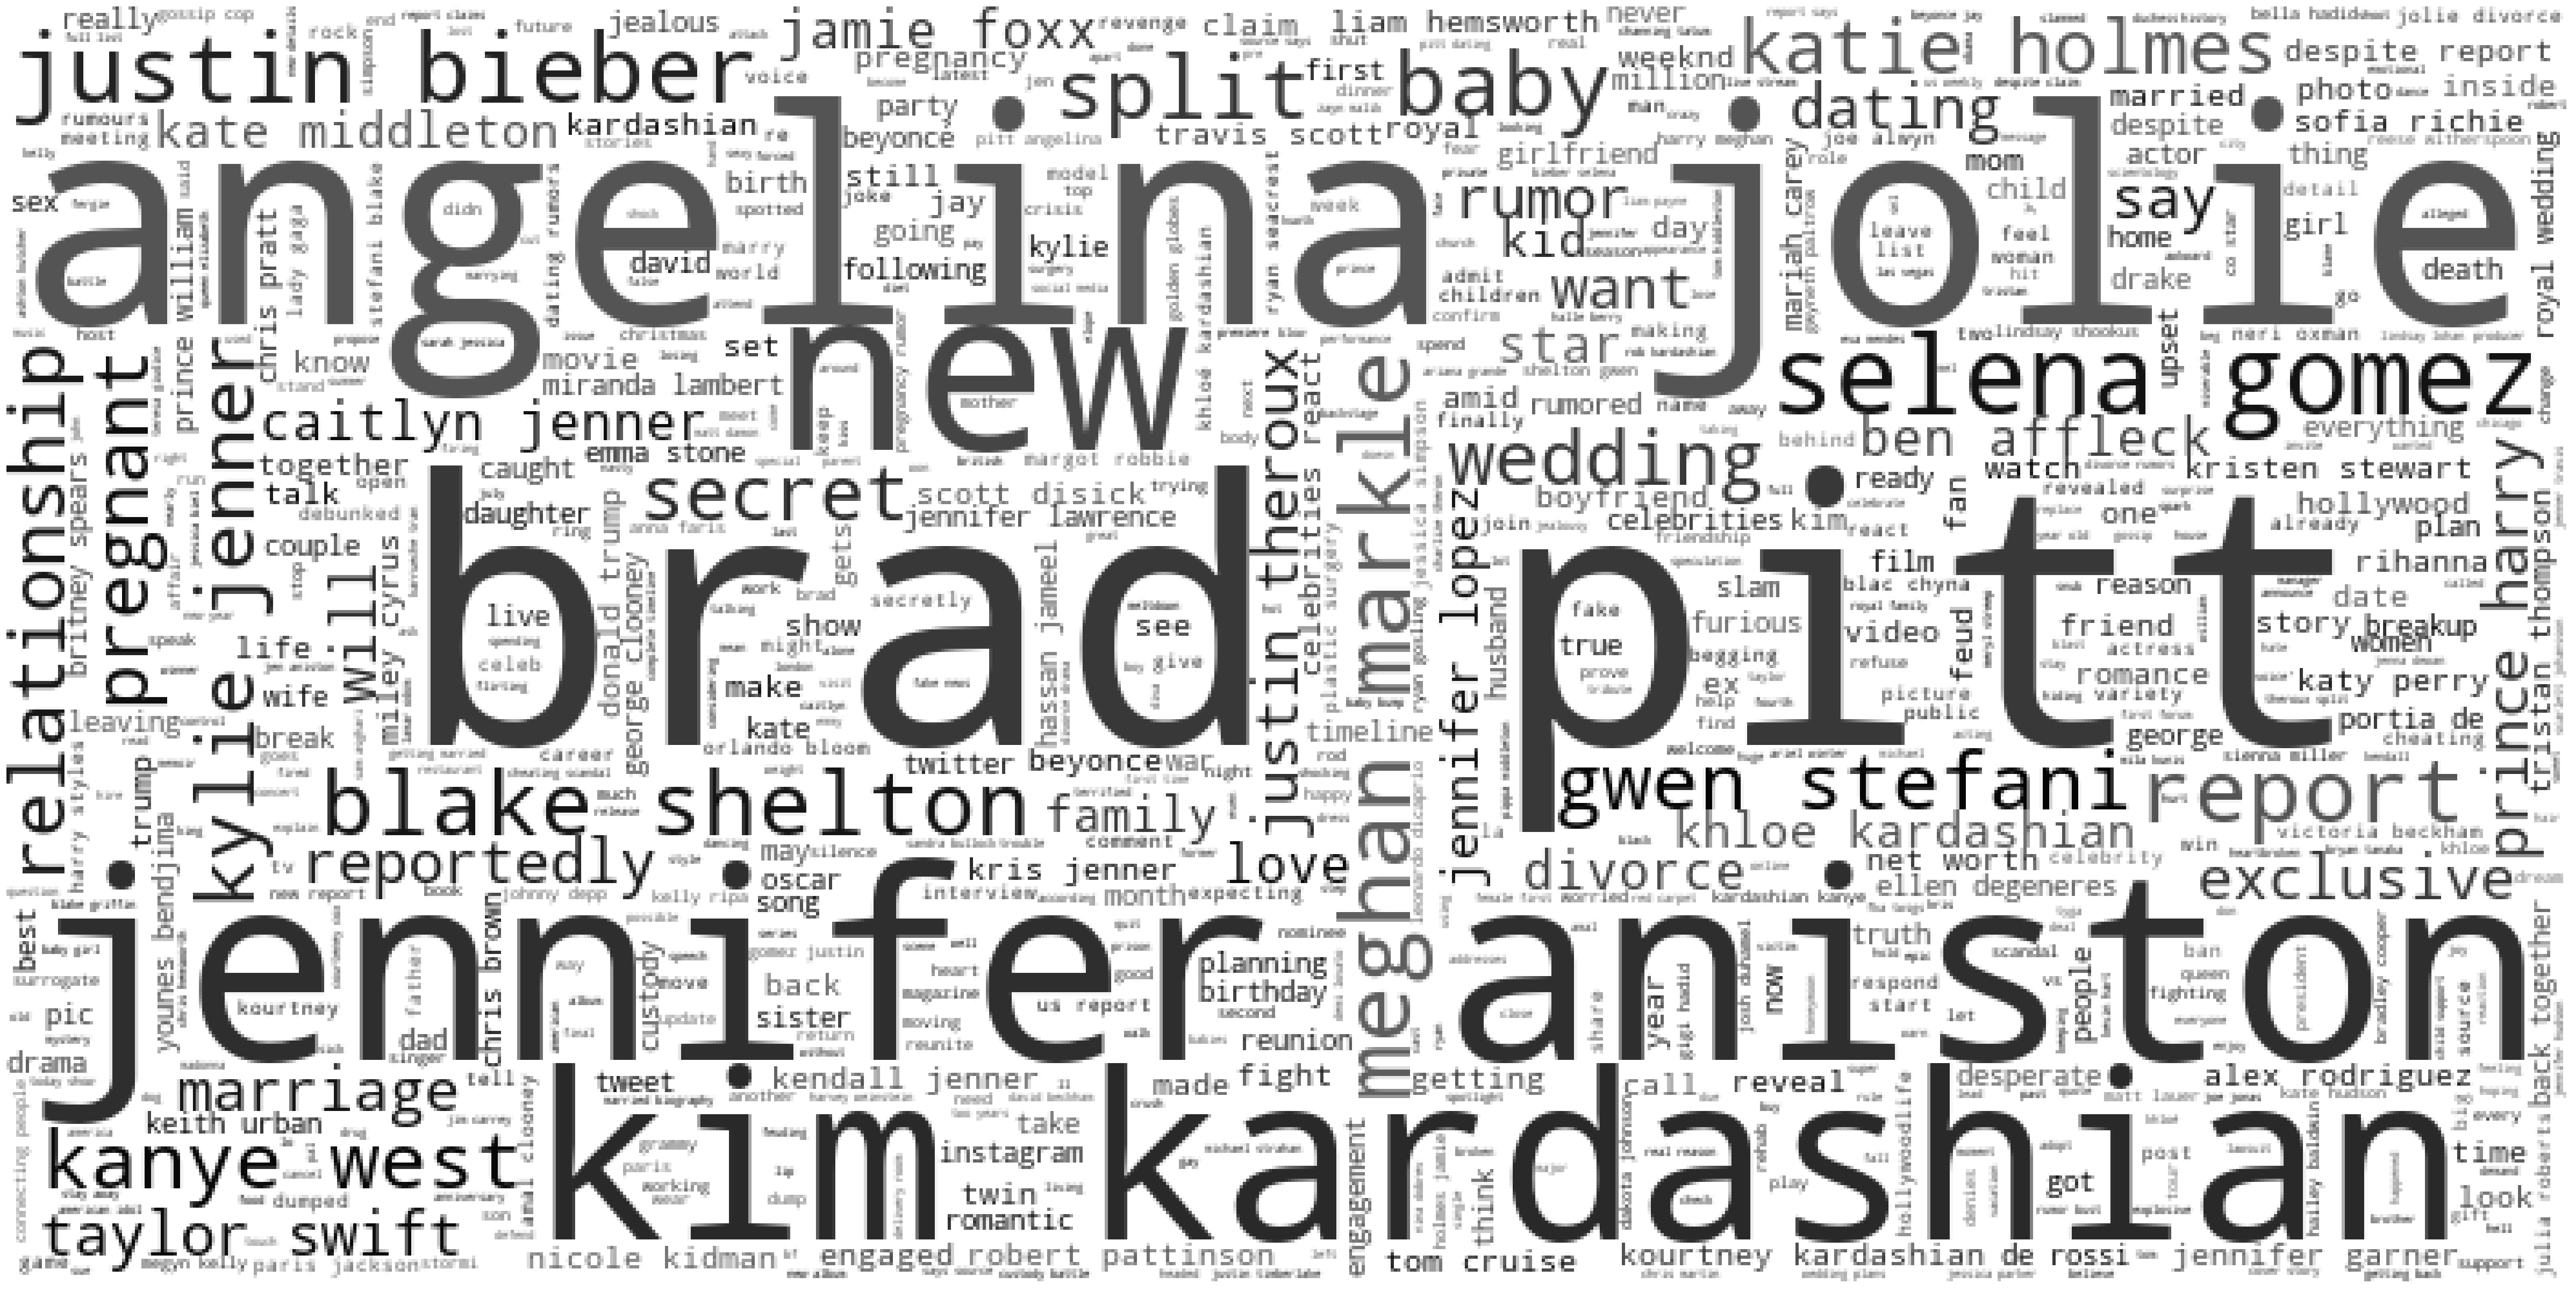

-----------------------------------------
Title WordCloud for  politifact_real


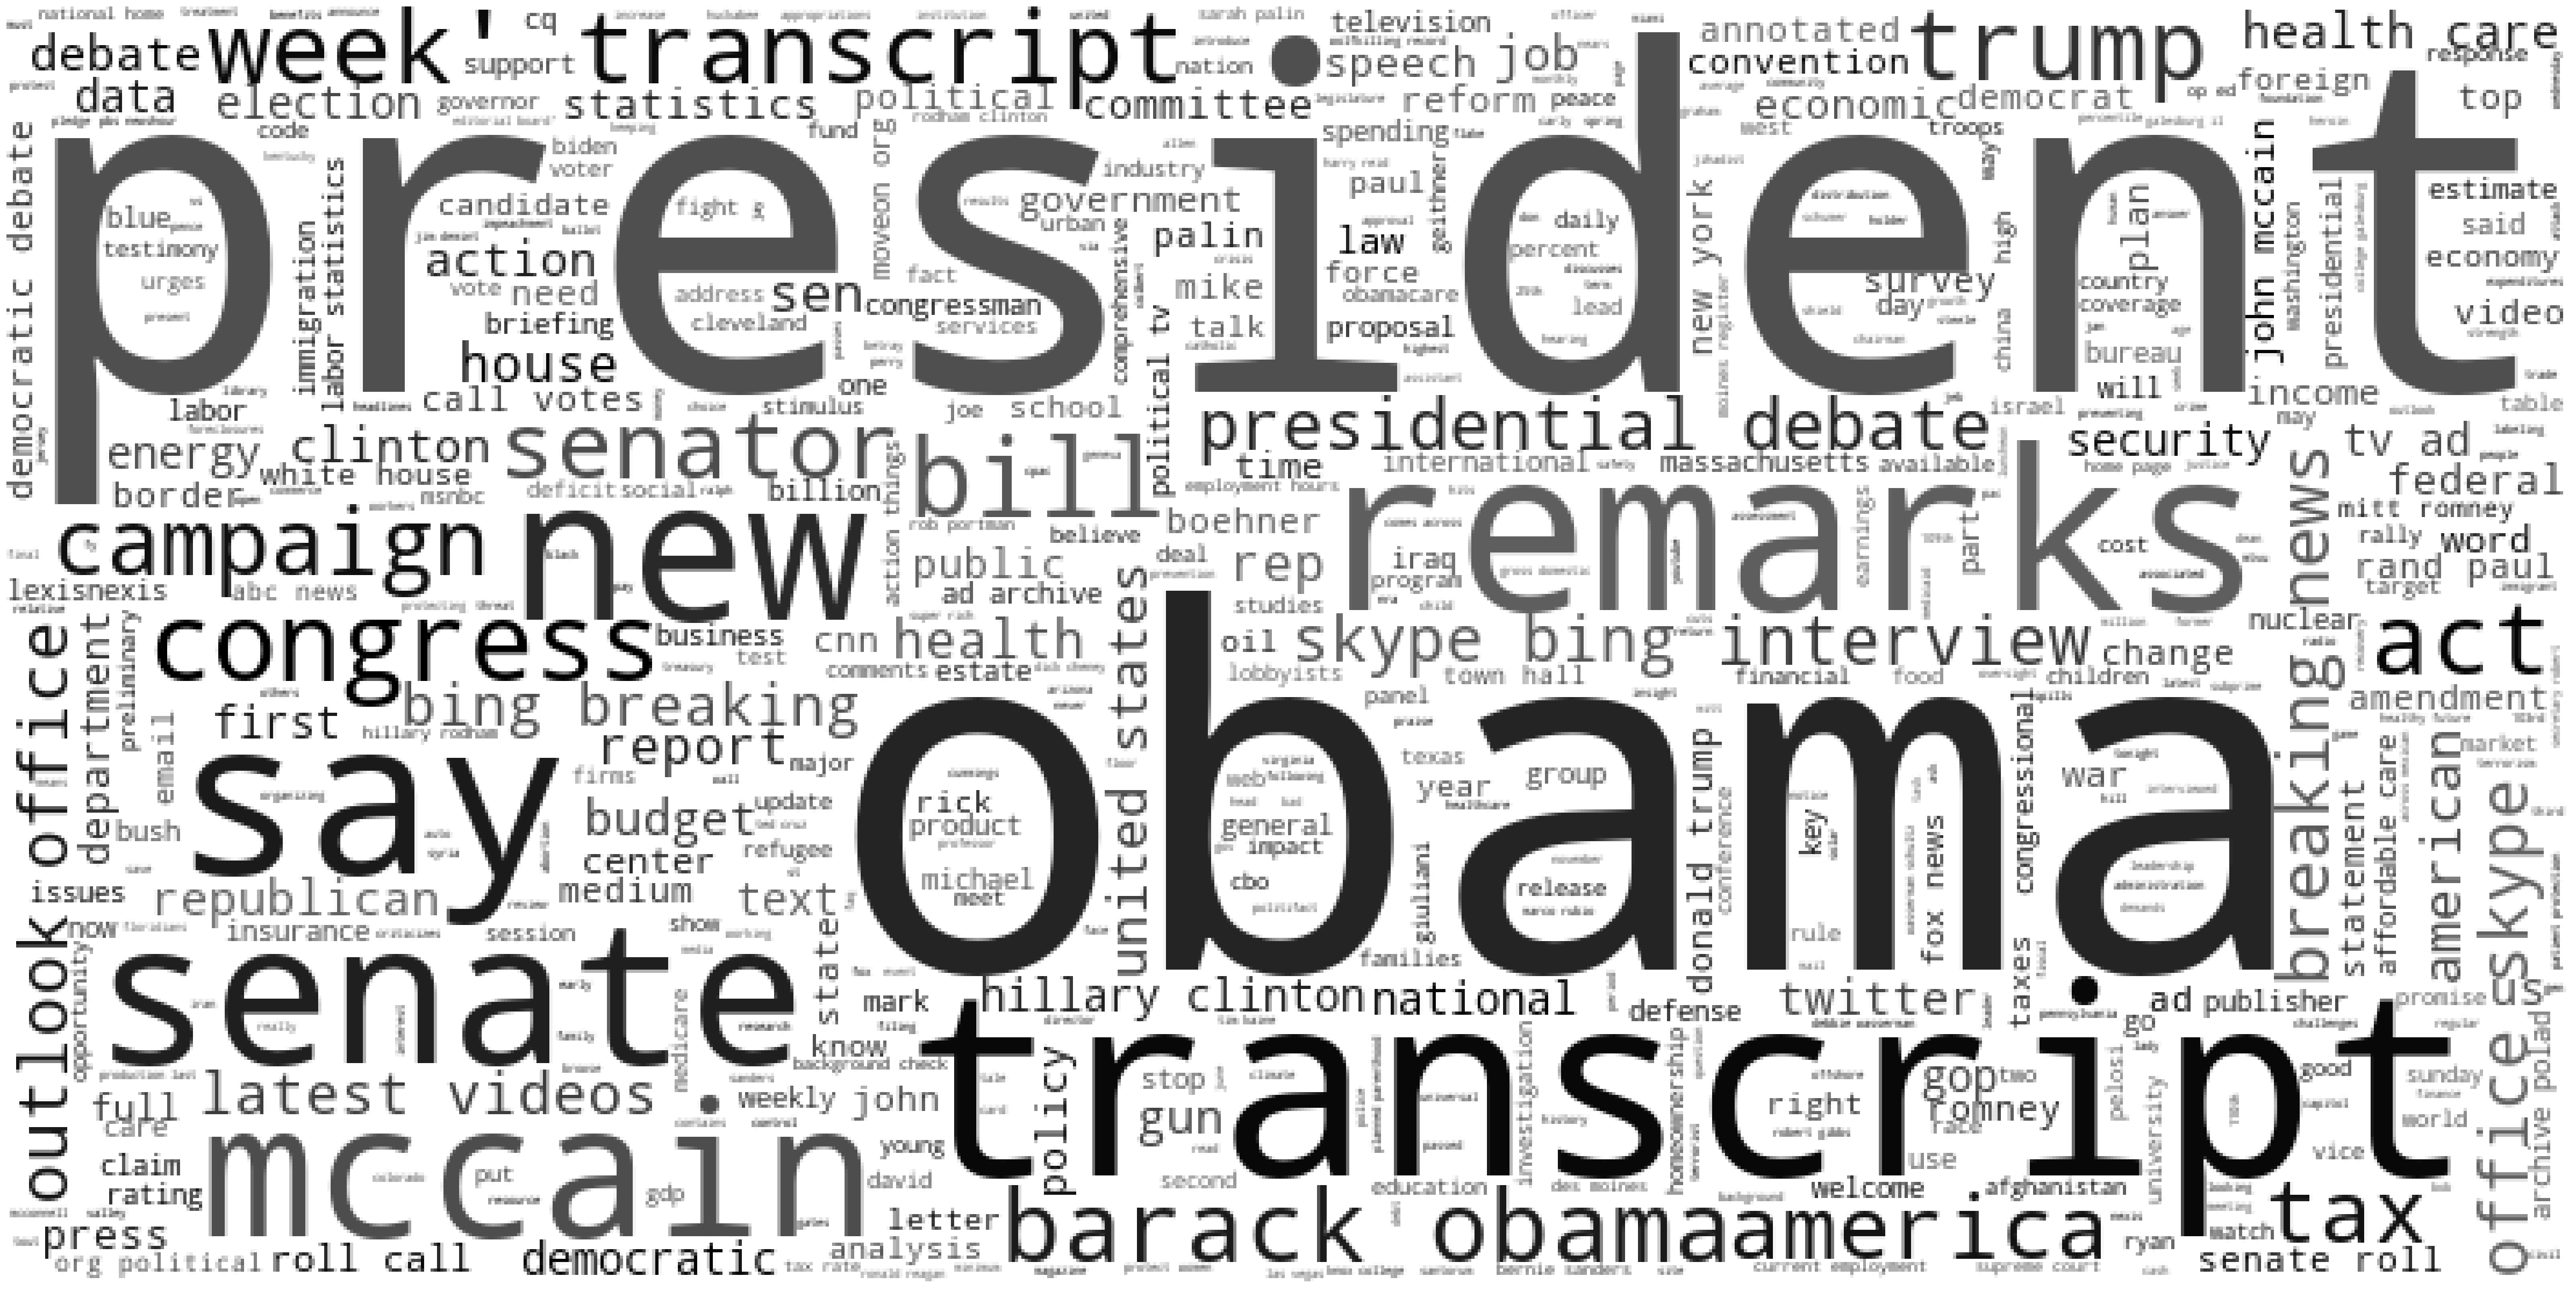

-----------------------------------------
Title WordCloud for  politifact_fake


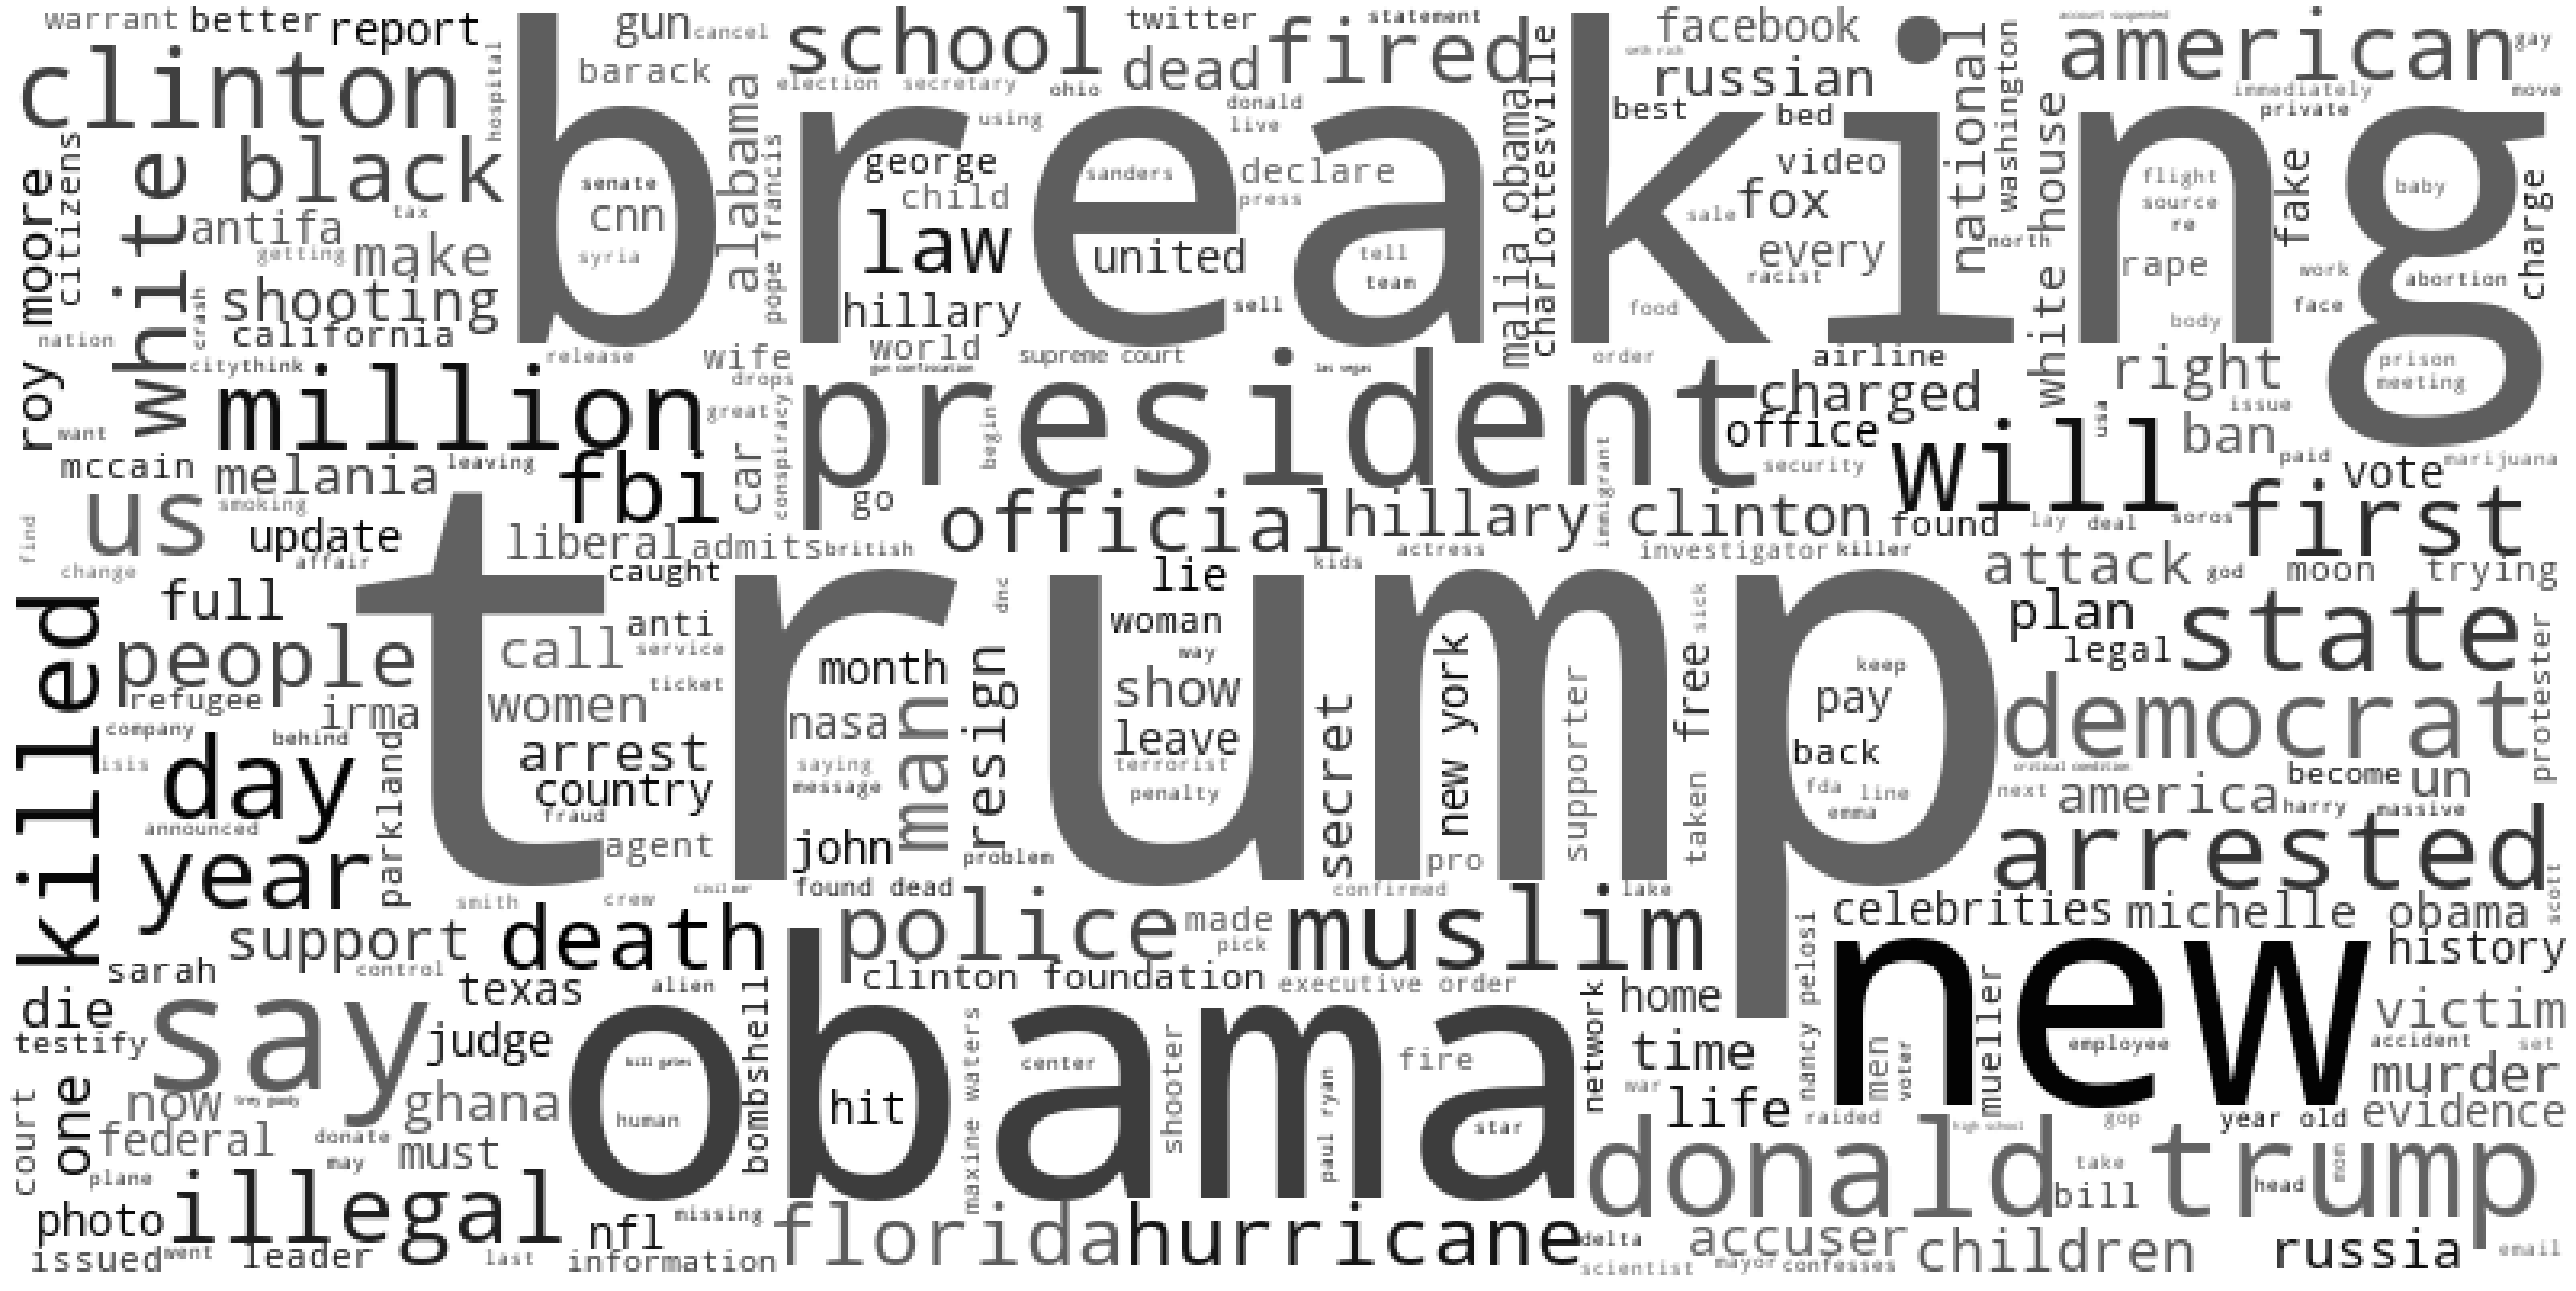

In [88]:
for t, i in enumerate(seed_data):
    generate_wordcloud(i, data_type[t])

# Final Dataset

In [298]:
#count the number of user_profiles we have data for
#get user profiles and find bot scores

In [18]:
import os
import os.path

In [19]:
def fileCount(folder): #count the number of files in a directory
    count = 0
    for filename in os.listdir(folder):
        path = os.path.join(folder, filename)
        if os.path.isfile(path):
            count += 1
        elif os.path.isdir(path):
            count += fileCount(path)
    return count

In [311]:
#actual count of the number of articles we have news content for
path = "data/Full_DataDump_1/newsContent_tweets/" #gossipcop/fake
for t in data_type: 
    path_ = path
    source = t.split('_')[0]
    ty = t.split('_')[1]
    path_ += source + '/' + ty
#     print(path_)
    print("-----------------------------------------")
    print("Number of News Content files received for \n", path_)
    print(fileCount(path_))

-----------------------------------------
Number of News Content files received for 
 data/Full_DataDump_1/newsContent_tweets/gossipcop/real
15215
-----------------------------------------
Number of News Content files received for 
 data/Full_DataDump_1/newsContent_tweets/gossipcop/fake
5150
-----------------------------------------
Number of News Content files received for 
 data/Full_DataDump_1/newsContent_tweets/politifact/real
617
-----------------------------------------
Number of News Content files received for 
 data/Full_DataDump_1/newsContent_tweets/politifact/fake
408


In [315]:
#actual count of the number of Tweets IDs
path = "data/Full_DataDump_1/newsContent_tweets/"
flag = 0
for t in data_type: 
    flag +=1
    if flag %2 != 0: #need it twice - hacky solution
        path_ = path
        source = t.split('_')[0]
    #     ty = t.split('_')[1]
        path_ += source
    #     print(path_)
        print("-----------------------------------------")
        print("Number of Twitter data files received for \n", path_)
        print(fileCount(path_))

-----------------------------------------
Number of Twitter data files received for 
 data/Full_DataDump_1/newsContent_tweets/gossipcop
42506
-----------------------------------------
Number of Twitter data files received for 
 data/Full_DataDump_1/newsContent_tweets/politifact
2080


# Using Smaller Dataset

In [345]:
#finding bots with user profile
import json
from pprint import pprint

In [317]:
# API Key - M7oCwzkWhjyFjNObXTMj7e7Jp
# API Secret Key - D0g0c0N6UX3yqmgTh1pozjoqDK9zkjG77yFYeclJjFutL7IEEN 
# Bearer Token - AAAAAAAAAAAAAAAAAAAAAMMGQQEAAAAA8VsI7rl%2FWOck9Gp2UesC0T3ycHI%3DzusBVvOryM7Dnry8EdsiJvxDwsfAJKYbojZukXXGTNLDx4XTiV

# Access Token - 1389351693486149632-UgffGJQGr4WQv0xycPZnanGT8q9kqZ

# Access Token Secret - MVsm003noHAhrY8ln4qiMYRvhUMluoHRQD2rOgvesTQ7Q

# X-Rapid-API-Key = c65a4130b1msh767c11b9104ee56p1a93cdjsn9f1028eb2e98


In [347]:
userpath = "data/user_profile_dataset/user_profiles/1688.json"
# jdata = pd.read_json(userpath)
# jdata

with open(userpath) as f:
    data = json.load(f)
    pprint(data)

{'contributors_enabled': False,
 'created_at': 'Mon Jul 17 01:21:51 +0000 2006',
 'default_profile': False,
 'default_profile_image': False,
 'description': 'Manhattan, please vote @ElizaOrlins for DA. And thank you '
                '@StaceyAbrams, @MarcEElias, and @HarrisonJaime for fighting '
                'for our voting rights. #Grateful',
 'entities': {'description': {'urls': []},
              'url': {'urls': [{'display_url': 'twitter.com/ifindkarma/sta…',
                                'expanded_url': 'https://twitter.com/ifindkarma/status/1148597634292166658?s=21',
                                'indices': [0, 23],
                                'url': 'https://t.co/qDMQnNd22N'}]}},
 'favourites_count': 297856,
 'follow_request_sent': False,
 'followers_count': 214011,
 'following': False,
 'friends_count': 113451,
 'geo_enabled': True,
 'has_extended_profile': True,
 'id': 1688,
 'id_str': '1688',
 'is_translation_enabled': False,
 'is_translator': False,
 'lang': None,


In [20]:
def get_list_of_json_files(path):
    list_of_files = os.listdir(path)
    return list_of_files

In [352]:
with open(userpath, 'r') as f:
    data = json.load(f)
df = pd.json_normalize(data)
print(df.columns)

Index(['id', 'id_str', 'name', 'screen_name', 'location', 'profile_location',
       'description', 'url', 'protected', 'followers_count', 'friends_count',
       'listed_count', 'created_at', 'favourites_count', 'utc_offset',
       'time_zone', 'geo_enabled', 'verified', 'statuses_count', 'lang',
       'contributors_enabled', 'is_translator', 'is_translation_enabled',
       'profile_background_color', 'profile_background_image_url',
       'profile_background_image_url_https', 'profile_background_tile',
       'profile_image_url', 'profile_image_url_https', 'profile_banner_url',
       'profile_link_color', 'profile_sidebar_border_color',
       'profile_sidebar_fill_color', 'profile_text_color',
       'profile_use_background_image', 'has_extended_profile',
       'default_profile', 'default_profile_image', 'following',
       'follow_request_sent', 'notifications', 'translator_type',
       'withheld_in_countries', 'entities.url.urls',
       'entities.description.urls', 'status.

In [374]:
userpath = "data/user_profile_dataset/user_profiles/"
json_files = get_list_of_json_files(userpath)

df = pd.DataFrame()
for file in json_files:
    jsonpath = userpath+file
    with open(jsonpath, 'r') as f:
        data = json.load(f)
    df_ = pd.json_normalize(data)
    df = pd.concat([df, df_])
    print(jsonpath, df.shape)

data/user_profile_dataset/user_profiles/2456180598.json (1, 101)
data/user_profile_dataset/user_profiles/232905591.json (2, 101)
data/user_profile_dataset/user_profiles/755219553475371008.json (3, 110)
data/user_profile_dataset/user_profiles/99121282.json (4, 110)
data/user_profile_dataset/user_profiles/241239867.json (5, 112)
data/user_profile_dataset/user_profiles/489541430.json (6, 112)
data/user_profile_dataset/user_profiles/878385487659941889.json (7, 112)
data/user_profile_dataset/user_profiles/3177751166.json (8, 112)
data/user_profile_dataset/user_profiles/796935737899884544.json (9, 112)
data/user_profile_dataset/user_profiles/221157071.json (10, 112)
data/user_profile_dataset/user_profiles/391134931.json (11, 112)
data/user_profile_dataset/user_profiles/142096963.json (12, 112)
data/user_profile_dataset/user_profiles/2966677389.json (13, 112)
data/user_profile_dataset/user_profiles/887129154.json (14, 112)
data/user_profile_dataset/user_profiles/625227137.json (15, 112)
data/

data/user_profile_dataset/user_profiles/440346538.json (140, 124)
data/user_profile_dataset/user_profiles/337131385.json (141, 124)
data/user_profile_dataset/user_profiles/156933456.json (142, 124)
data/user_profile_dataset/user_profiles/980774357101408257.json (143, 124)
data/user_profile_dataset/user_profiles/382374272.json (144, 124)
data/user_profile_dataset/user_profiles/410227630.json (145, 124)
data/user_profile_dataset/user_profiles/323608735.json (146, 124)
data/user_profile_dataset/user_profiles/16879321.json (147, 124)
data/user_profile_dataset/user_profiles/542536718.json (148, 124)
data/user_profile_dataset/user_profiles/111342458.json (149, 124)
data/user_profile_dataset/user_profiles/186012097.json (150, 124)
data/user_profile_dataset/user_profiles/2362884908.json (151, 124)
data/user_profile_dataset/user_profiles/2919927902.json (152, 124)
data/user_profile_dataset/user_profiles/83297696.json (153, 124)
data/user_profile_dataset/user_profiles/1024146119234736129.json (1

data/user_profile_dataset/user_profiles/289928689.json (275, 128)
data/user_profile_dataset/user_profiles/1312106239.json (276, 128)
data/user_profile_dataset/user_profiles/3092371954.json (277, 128)
data/user_profile_dataset/user_profiles/732610474672422914.json (278, 128)
data/user_profile_dataset/user_profiles/19497014.json (279, 128)
data/user_profile_dataset/user_profiles/4130128764.json (280, 128)
data/user_profile_dataset/user_profiles/1013268536125468673.json (281, 128)
data/user_profile_dataset/user_profiles/932407230.json (282, 128)
data/user_profile_dataset/user_profiles/715601141749387264.json (283, 128)
data/user_profile_dataset/user_profiles/848485785514917888.json (284, 128)
data/user_profile_dataset/user_profiles/1170742466.json (285, 128)
data/user_profile_dataset/user_profiles/2393846244.json (286, 128)
data/user_profile_dataset/user_profiles/187912062.json (287, 128)
data/user_profile_dataset/user_profiles/53274985.json (288, 128)
data/user_profile_dataset/user_profi

data/user_profile_dataset/user_profiles/18454837.json (401, 139)
data/user_profile_dataset/user_profiles/1329817428.json (402, 139)
data/user_profile_dataset/user_profiles/1016949931460866049.json (403, 139)
data/user_profile_dataset/user_profiles/947081372.json (404, 139)
data/user_profile_dataset/user_profiles/59020115.json (405, 139)
data/user_profile_dataset/user_profiles/189771193.json (406, 139)
data/user_profile_dataset/user_profiles/3925115056.json (407, 139)
data/user_profile_dataset/user_profiles/916874749.json (408, 139)
data/user_profile_dataset/user_profiles/988137559485308928.json (409, 139)
data/user_profile_dataset/user_profiles/2337792175.json (410, 139)
data/user_profile_dataset/user_profiles/34449672.json (411, 139)
data/user_profile_dataset/user_profiles/183294525.json (412, 139)
data/user_profile_dataset/user_profiles/3349184109.json (413, 139)
data/user_profile_dataset/user_profiles/18088898.json (414, 139)
data/user_profile_dataset/user_profiles/261562277.json (4

data/user_profile_dataset/user_profiles/883000297928499200.json (533, 139)
data/user_profile_dataset/user_profiles/230095915.json (534, 139)
data/user_profile_dataset/user_profiles/82126521.json (535, 139)
data/user_profile_dataset/user_profiles/607978139.json (536, 139)
data/user_profile_dataset/user_profiles/242448789.json (537, 139)
data/user_profile_dataset/user_profiles/161063168.json (538, 139)
data/user_profile_dataset/user_profiles/3178335930.json (539, 139)
data/user_profile_dataset/user_profiles/470806551.json (540, 139)
data/user_profile_dataset/user_profiles/4600341193.json (541, 139)
data/user_profile_dataset/user_profiles/5363982.json (542, 139)
data/user_profile_dataset/user_profiles/761024454805729280.json (543, 139)
data/user_profile_dataset/user_profiles/4896430526.json (544, 139)
data/user_profile_dataset/user_profiles/1226500387.json (545, 139)
data/user_profile_dataset/user_profiles/2166499136.json (546, 139)
data/user_profile_dataset/user_profiles/48403742.json (5

data/user_profile_dataset/user_profiles/22707958.json (669, 139)
data/user_profile_dataset/user_profiles/190104461.json (670, 139)
data/user_profile_dataset/user_profiles/744712467473784832.json (671, 139)
data/user_profile_dataset/user_profiles/46348542.json (672, 139)
data/user_profile_dataset/user_profiles/851135989682753540.json (673, 139)
data/user_profile_dataset/user_profiles/116872363.json (674, 139)
data/user_profile_dataset/user_profiles/283384700.json (675, 139)
data/user_profile_dataset/user_profiles/5145791.json (676, 139)
data/user_profile_dataset/user_profiles/286432534.json (677, 139)
data/user_profile_dataset/user_profiles/35549780.json (678, 139)
data/user_profile_dataset/user_profiles/420053134.json (679, 139)
data/user_profile_dataset/user_profiles/632321585.json (680, 139)
data/user_profile_dataset/user_profiles/757600390221357056.json (681, 139)
data/user_profile_dataset/user_profiles/4845055146.json (682, 139)
data/user_profile_dataset/user_profiles/14442905.json

data/user_profile_dataset/user_profiles/959849115117957120.json (798, 139)
data/user_profile_dataset/user_profiles/347568180.json (799, 139)
data/user_profile_dataset/user_profiles/296320497.json (800, 139)
data/user_profile_dataset/user_profiles/176716283.json (801, 139)
data/user_profile_dataset/user_profiles/24161666.json (802, 139)
data/user_profile_dataset/user_profiles/845850307.json (803, 139)
data/user_profile_dataset/user_profiles/2719026201.json (804, 139)
data/user_profile_dataset/user_profiles/3294220550.json (805, 139)
data/user_profile_dataset/user_profiles/146512328.json (806, 139)
data/user_profile_dataset/user_profiles/34194316.json (807, 139)
data/user_profile_dataset/user_profiles/284694315.json (808, 139)
data/user_profile_dataset/user_profiles/24053475.json (809, 139)
data/user_profile_dataset/user_profiles/3040040012.json (810, 139)
data/user_profile_dataset/user_profiles/2893861023.json (811, 139)
data/user_profile_dataset/user_profiles/21993071.json (812, 139)
d

data/user_profile_dataset/user_profiles/302346795.json (929, 139)
data/user_profile_dataset/user_profiles/804481051397648384.json (930, 139)
data/user_profile_dataset/user_profiles/149761736.json (931, 139)
data/user_profile_dataset/user_profiles/518695540.json (932, 139)
data/user_profile_dataset/user_profiles/21147846.json (933, 139)
data/user_profile_dataset/user_profiles/417257606.json (934, 139)
data/user_profile_dataset/user_profiles/167473972.json (935, 139)
data/user_profile_dataset/user_profiles/879060476.json (936, 139)
data/user_profile_dataset/user_profiles/977209159568560128.json (937, 139)
data/user_profile_dataset/user_profiles/831142809465929729.json (938, 139)
data/user_profile_dataset/user_profiles/856738266799890432.json (939, 139)
data/user_profile_dataset/user_profiles/3299499394.json (940, 139)
data/user_profile_dataset/user_profiles/429575715.json (941, 139)
data/user_profile_dataset/user_profiles/73922688.json (942, 139)
data/user_profile_dataset/user_profiles/9

data/user_profile_dataset/user_profiles/740779657071591425.json (1050, 139)
data/user_profile_dataset/user_profiles/853371857948508161.json (1051, 139)
data/user_profile_dataset/user_profiles/98941939.json (1052, 139)
data/user_profile_dataset/user_profiles/921592240820035589.json (1053, 139)
data/user_profile_dataset/user_profiles/871759963353485313.json (1054, 139)
data/user_profile_dataset/user_profiles/3089671252.json (1055, 139)
data/user_profile_dataset/user_profiles/62397680.json (1056, 139)
data/user_profile_dataset/user_profiles/58305821.json (1057, 139)
data/user_profile_dataset/user_profiles/2420905396.json (1058, 139)
data/user_profile_dataset/user_profiles/1559299861.json (1059, 139)
data/user_profile_dataset/user_profiles/53046002.json (1060, 139)
data/user_profile_dataset/user_profiles/2264798306.json (1061, 139)
data/user_profile_dataset/user_profiles/3097319066.json (1062, 139)
data/user_profile_dataset/user_profiles/359190315.json (1063, 139)
data/user_profile_dataset

data/user_profile_dataset/user_profiles/387979962.json (1180, 139)
data/user_profile_dataset/user_profiles/2399045929.json (1181, 139)
data/user_profile_dataset/user_profiles/146625448.json (1182, 139)
data/user_profile_dataset/user_profiles/725814204406583296.json (1183, 139)
data/user_profile_dataset/user_profiles/251078107.json (1184, 139)
data/user_profile_dataset/user_profiles/39741866.json (1185, 139)
data/user_profile_dataset/user_profiles/2253968388.json (1186, 139)
data/user_profile_dataset/user_profiles/718194699052433409.json (1187, 139)
data/user_profile_dataset/user_profiles/24772505.json (1188, 139)
data/user_profile_dataset/user_profiles/2241037393.json (1189, 139)
data/user_profile_dataset/user_profiles/98303242.json (1190, 139)
data/user_profile_dataset/user_profiles/29995254.json (1191, 139)
data/user_profile_dataset/user_profiles/3237058188.json (1192, 139)
data/user_profile_dataset/user_profiles/18378334.json (1193, 139)
data/user_profile_dataset/user_profiles/32157

data/user_profile_dataset/user_profiles/56326552.json (1307, 140)
data/user_profile_dataset/user_profiles/65466158.json (1308, 140)
data/user_profile_dataset/user_profiles/745415970194264064.json (1309, 140)
data/user_profile_dataset/user_profiles/962969447261712385.json (1310, 140)
data/user_profile_dataset/user_profiles/778315943843885057.json (1311, 140)
data/user_profile_dataset/user_profiles/42814585.json (1312, 140)
data/user_profile_dataset/user_profiles/321408074.json (1313, 140)
data/user_profile_dataset/user_profiles/2219747521.json (1314, 140)
data/user_profile_dataset/user_profiles/950349211899490309.json (1315, 140)
data/user_profile_dataset/user_profiles/885039355.json (1316, 140)
data/user_profile_dataset/user_profiles/205417298.json (1317, 140)
data/user_profile_dataset/user_profiles/61233824.json (1318, 140)
data/user_profile_dataset/user_profiles/2873761090.json (1319, 140)
data/user_profile_dataset/user_profiles/799757888549855233.json (1320, 140)
data/user_profile_d

data/user_profile_dataset/user_profiles/58422128.json (1431, 140)
data/user_profile_dataset/user_profiles/630890491.json (1432, 140)
data/user_profile_dataset/user_profiles/2400204286.json (1433, 140)
data/user_profile_dataset/user_profiles/3060915307.json (1434, 140)
data/user_profile_dataset/user_profiles/96410542.json (1435, 140)
data/user_profile_dataset/user_profiles/601632674.json (1436, 140)
data/user_profile_dataset/user_profiles/291192260.json (1437, 140)
data/user_profile_dataset/user_profiles/61303077.json (1438, 140)
data/user_profile_dataset/user_profiles/60452312.json (1439, 140)
data/user_profile_dataset/user_profiles/5402612.json (1440, 140)
data/user_profile_dataset/user_profiles/1045450544255586311.json (1441, 140)
data/user_profile_dataset/user_profiles/954057843304468480.json (1442, 140)
data/user_profile_dataset/user_profiles/805659618.json (1443, 140)
data/user_profile_dataset/user_profiles/48755136.json (1444, 140)
data/user_profile_dataset/user_profiles/44506177

data/user_profile_dataset/user_profiles/372402932.json (1556, 140)
data/user_profile_dataset/user_profiles/1022809573709819904.json (1557, 140)
data/user_profile_dataset/user_profiles/2976653309.json (1558, 140)
data/user_profile_dataset/user_profiles/2220462438.json (1559, 140)
data/user_profile_dataset/user_profiles/122466755.json (1560, 140)
data/user_profile_dataset/user_profiles/331996338.json (1561, 140)
data/user_profile_dataset/user_profiles/923722633.json (1562, 140)
data/user_profile_dataset/user_profiles/563859048.json (1563, 140)
data/user_profile_dataset/user_profiles/4067892652.json (1564, 140)
data/user_profile_dataset/user_profiles/228675877.json (1565, 140)
data/user_profile_dataset/user_profiles/16377693.json (1566, 140)
data/user_profile_dataset/user_profiles/17777406.json (1567, 140)
data/user_profile_dataset/user_profiles/1655254044.json (1568, 140)
data/user_profile_dataset/user_profiles/920120592715485189.json (1569, 140)
data/user_profile_dataset/user_profiles/3

data/user_profile_dataset/user_profiles/505762772.json (1685, 140)
data/user_profile_dataset/user_profiles/345962446.json (1686, 140)
data/user_profile_dataset/user_profiles/127123557.json (1687, 140)
data/user_profile_dataset/user_profiles/877786510610710529.json (1688, 140)
data/user_profile_dataset/user_profiles/53440995.json (1689, 140)
data/user_profile_dataset/user_profiles/817356469561479171.json (1690, 140)
data/user_profile_dataset/user_profiles/41601529.json (1691, 140)
data/user_profile_dataset/user_profiles/372377073.json (1692, 140)
data/user_profile_dataset/user_profiles/2959098603.json (1693, 140)
data/user_profile_dataset/user_profiles/886274256.json (1694, 140)
data/user_profile_dataset/user_profiles/872386352930844673.json (1695, 140)
data/user_profile_dataset/user_profiles/1338279498.json (1696, 140)
data/user_profile_dataset/user_profiles/797766128.json (1697, 140)
data/user_profile_dataset/user_profiles/358916954.json (1698, 140)
data/user_profile_dataset/user_prof

data/user_profile_dataset/user_profiles/32668095.json (1811, 140)
data/user_profile_dataset/user_profiles/756942518.json (1812, 140)
data/user_profile_dataset/user_profiles/19079133.json (1813, 140)
data/user_profile_dataset/user_profiles/602721749.json (1814, 140)
data/user_profile_dataset/user_profiles/31313277.json (1815, 140)
data/user_profile_dataset/user_profiles/2759976799.json (1816, 140)
data/user_profile_dataset/user_profiles/353355345.json (1817, 140)
data/user_profile_dataset/user_profiles/2748854007.json (1818, 140)
data/user_profile_dataset/user_profiles/754288945.json (1819, 140)
data/user_profile_dataset/user_profiles/3305646379.json (1820, 140)
data/user_profile_dataset/user_profiles/246989461.json (1821, 140)
data/user_profile_dataset/user_profiles/53276941.json (1822, 140)
data/user_profile_dataset/user_profiles/242357085.json (1823, 140)
data/user_profile_dataset/user_profiles/2169079249.json (1824, 140)
data/user_profile_dataset/user_profiles/33125629.json (1825, 1

data/user_profile_dataset/user_profiles/991130390.json (1931, 140)
data/user_profile_dataset/user_profiles/2583629610.json (1932, 140)
data/user_profile_dataset/user_profiles/471459345.json (1933, 140)
data/user_profile_dataset/user_profiles/880603815665336322.json (1934, 140)
data/user_profile_dataset/user_profiles/2590629196.json (1935, 140)
data/user_profile_dataset/user_profiles/369303051.json (1936, 140)
data/user_profile_dataset/user_profiles/486928397.json (1937, 140)
data/user_profile_dataset/user_profiles/114145156.json (1938, 140)
data/user_profile_dataset/user_profiles/1093223970.json (1939, 140)
data/user_profile_dataset/user_profiles/316555195.json (1940, 140)
data/user_profile_dataset/user_profiles/96900165.json (1941, 140)
data/user_profile_dataset/user_profiles/361868342.json (1942, 140)
data/user_profile_dataset/user_profiles/23836910.json (1943, 140)
data/user_profile_dataset/user_profiles/362736436.json (1944, 140)
data/user_profile_dataset/user_profiles/106397669.js

data/user_profile_dataset/user_profiles/42096654.json (2051, 140)
data/user_profile_dataset/user_profiles/417727024.json (2052, 140)
data/user_profile_dataset/user_profiles/391554533.json (2053, 140)
data/user_profile_dataset/user_profiles/42259977.json (2054, 140)
data/user_profile_dataset/user_profiles/904343443.json (2055, 140)
data/user_profile_dataset/user_profiles/2158368878.json (2056, 140)
data/user_profile_dataset/user_profiles/137290405.json (2057, 140)
data/user_profile_dataset/user_profiles/3029974985.json (2058, 140)
data/user_profile_dataset/user_profiles/12874852.json (2059, 140)
data/user_profile_dataset/user_profiles/4624988121.json (2060, 140)
data/user_profile_dataset/user_profiles/23946566.json (2061, 140)
data/user_profile_dataset/user_profiles/928936200974483456.json (2062, 140)
data/user_profile_dataset/user_profiles/27756540.json (2063, 140)
data/user_profile_dataset/user_profiles/952937491060817921.json (2064, 140)
data/user_profile_dataset/user_profiles/230945

data/user_profile_dataset/user_profiles/2710655946.json (2175, 140)
data/user_profile_dataset/user_profiles/13167622.json (2176, 140)
data/user_profile_dataset/user_profiles/605717060.json (2177, 140)
data/user_profile_dataset/user_profiles/173794306.json (2178, 140)
data/user_profile_dataset/user_profiles/1203963950.json (2179, 140)
data/user_profile_dataset/user_profiles/25143339.json (2180, 140)
data/user_profile_dataset/user_profiles/398919751.json (2181, 140)
data/user_profile_dataset/user_profiles/2564627935.json (2182, 140)
data/user_profile_dataset/user_profiles/940000238.json (2183, 140)
data/user_profile_dataset/user_profiles/776994955.json (2184, 140)
data/user_profile_dataset/user_profiles/19794315.json (2185, 140)
data/user_profile_dataset/user_profiles/115754870.json (2186, 140)
data/user_profile_dataset/user_profiles/2940104340.json (2187, 140)
data/user_profile_dataset/user_profiles/979527342266568705.json (2188, 140)
data/user_profile_dataset/user_profiles/290791716.js

data/user_profile_dataset/user_profiles/26445957.json (2300, 140)
data/user_profile_dataset/user_profiles/118322302.json (2301, 140)
data/user_profile_dataset/user_profiles/329292352.json (2302, 140)
data/user_profile_dataset/user_profiles/779896364314480640.json (2303, 140)
data/user_profile_dataset/user_profiles/2203413370.json (2304, 140)
data/user_profile_dataset/user_profiles/338575826.json (2305, 140)
data/user_profile_dataset/user_profiles/16250929.json (2306, 140)
data/user_profile_dataset/user_profiles/436989951.json (2307, 140)
data/user_profile_dataset/user_profiles/426020316.json (2308, 140)
data/user_profile_dataset/user_profiles/18435671.json (2309, 140)
data/user_profile_dataset/user_profiles/1038481676.json (2310, 140)
data/user_profile_dataset/user_profiles/18153001.json (2311, 140)
data/user_profile_dataset/user_profiles/267332407.json (2312, 140)
data/user_profile_dataset/user_profiles/260445832.json (2313, 140)
data/user_profile_dataset/user_profiles/717682225236611

data/user_profile_dataset/user_profiles/18890707.json (2420, 140)
data/user_profile_dataset/user_profiles/68814538.json (2421, 140)
data/user_profile_dataset/user_profiles/2794167523.json (2422, 140)
data/user_profile_dataset/user_profiles/614279980.json (2423, 140)
data/user_profile_dataset/user_profiles/22763232.json (2424, 140)
data/user_profile_dataset/user_profiles/14427887.json (2425, 140)
data/user_profile_dataset/user_profiles/2281380793.json (2426, 140)
data/user_profile_dataset/user_profiles/792682226.json (2427, 140)
data/user_profile_dataset/user_profiles/1315921093.json (2428, 140)
data/user_profile_dataset/user_profiles/238799584.json (2429, 140)
data/user_profile_dataset/user_profiles/613049498.json (2430, 140)
data/user_profile_dataset/user_profiles/844956696871026688.json (2431, 140)
data/user_profile_dataset/user_profiles/3086581540.json (2432, 140)
data/user_profile_dataset/user_profiles/21595926.json (2433, 140)
data/user_profile_dataset/user_profiles/3179400580.jso

data/user_profile_dataset/user_profiles/127646305.json (2541, 140)
data/user_profile_dataset/user_profiles/4000876393.json (2542, 140)
data/user_profile_dataset/user_profiles/2849604010.json (2543, 140)
data/user_profile_dataset/user_profiles/29971487.json (2544, 140)
data/user_profile_dataset/user_profiles/24449694.json (2545, 140)
data/user_profile_dataset/user_profiles/1035994828860010502.json (2546, 140)
data/user_profile_dataset/user_profiles/22272206.json (2547, 140)
data/user_profile_dataset/user_profiles/65354669.json (2548, 140)
data/user_profile_dataset/user_profiles/468897793.json (2549, 140)
data/user_profile_dataset/user_profiles/435404934.json (2550, 140)
data/user_profile_dataset/user_profiles/499190162.json (2551, 140)
data/user_profile_dataset/user_profiles/16729844.json (2552, 140)
data/user_profile_dataset/user_profiles/109160323.json (2553, 140)
data/user_profile_dataset/user_profiles/1015974120.json (2554, 140)
data/user_profile_dataset/user_profiles/10365694117952

data/user_profile_dataset/user_profiles/1214618167.json (2661, 140)
data/user_profile_dataset/user_profiles/822054350.json (2662, 140)
data/user_profile_dataset/user_profiles/739799648.json (2663, 140)
data/user_profile_dataset/user_profiles/901824938520317953.json (2664, 140)
data/user_profile_dataset/user_profiles/2168614248.json (2665, 140)
data/user_profile_dataset/user_profiles/42979713.json (2666, 140)
data/user_profile_dataset/user_profiles/310408294.json (2667, 140)
data/user_profile_dataset/user_profiles/817159861427441665.json (2668, 140)
data/user_profile_dataset/user_profiles/1157223470.json (2669, 140)
data/user_profile_dataset/user_profiles/1437358808.json (2670, 140)
data/user_profile_dataset/user_profiles/21726748.json (2671, 140)
data/user_profile_dataset/user_profiles/4584528196.json (2672, 140)
data/user_profile_dataset/user_profiles/394830491.json (2673, 140)
data/user_profile_dataset/user_profiles/870874054936231936.json (2674, 140)
data/user_profile_dataset/user_p

data/user_profile_dataset/user_profiles/196576780.json (2781, 140)
data/user_profile_dataset/user_profiles/4417741820.json (2782, 140)
data/user_profile_dataset/user_profiles/1044332630.json (2783, 140)
data/user_profile_dataset/user_profiles/242414823.json (2784, 140)
data/user_profile_dataset/user_profiles/15675138.json (2785, 140)
data/user_profile_dataset/user_profiles/118886970.json (2786, 140)
data/user_profile_dataset/user_profiles/16041234.json (2787, 140)
data/user_profile_dataset/user_profiles/2870584700.json (2788, 140)
data/user_profile_dataset/user_profiles/2188726500.json (2789, 140)
data/user_profile_dataset/user_profiles/132755086.json (2790, 140)
data/user_profile_dataset/user_profiles/343856609.json (2791, 140)
data/user_profile_dataset/user_profiles/2849186490.json (2792, 140)
data/user_profile_dataset/user_profiles/545675099.json (2793, 140)
data/user_profile_dataset/user_profiles/23152434.json (2794, 140)
data/user_profile_dataset/user_profiles/4657648533.json (279

data/user_profile_dataset/user_profiles/921427619827949568.json (2908, 140)
data/user_profile_dataset/user_profiles/14091262.json (2909, 140)
data/user_profile_dataset/user_profiles/43278393.json (2910, 140)
data/user_profile_dataset/user_profiles/1725407809.json (2911, 140)
data/user_profile_dataset/user_profiles/71232154.json (2912, 140)
data/user_profile_dataset/user_profiles/855586251818323969.json (2913, 140)
data/user_profile_dataset/user_profiles/2792110739.json (2914, 140)
data/user_profile_dataset/user_profiles/544648259.json (2915, 140)
data/user_profile_dataset/user_profiles/1435358480.json (2916, 140)
data/user_profile_dataset/user_profiles/771308914201669632.json (2917, 140)
data/user_profile_dataset/user_profiles/1951372890.json (2918, 140)
data/user_profile_dataset/user_profiles/2563282518.json (2919, 140)
data/user_profile_dataset/user_profiles/1022907459680129024.json (2920, 140)
data/user_profile_dataset/user_profiles/39303779.json (2921, 140)
data/user_profile_datase

data/user_profile_dataset/user_profiles/860446254.json (3027, 140)
data/user_profile_dataset/user_profiles/29781673.json (3028, 140)
data/user_profile_dataset/user_profiles/936739633735626752.json (3029, 140)
data/user_profile_dataset/user_profiles/22690617.json (3030, 140)
data/user_profile_dataset/user_profiles/838785386855944192.json (3031, 140)
data/user_profile_dataset/user_profiles/3259539235.json (3032, 140)
data/user_profile_dataset/user_profiles/371668806.json (3033, 140)
data/user_profile_dataset/user_profiles/832339220144484355.json (3034, 140)
data/user_profile_dataset/user_profiles/1395163458.json (3035, 140)
data/user_profile_dataset/user_profiles/50438882.json (3036, 140)
data/user_profile_dataset/user_profiles/83615629.json (3037, 140)
data/user_profile_dataset/user_profiles/147852010.json (3038, 140)
data/user_profile_dataset/user_profiles/60342790.json (3039, 140)
data/user_profile_dataset/user_profiles/2719397832.json (3040, 140)
data/user_profile_dataset/user_profil

data/user_profile_dataset/user_profiles/3108227601.json (3152, 140)
data/user_profile_dataset/user_profiles/3028072109.json (3153, 140)
data/user_profile_dataset/user_profiles/2881601091.json (3154, 140)
data/user_profile_dataset/user_profiles/19363044.json (3155, 140)
data/user_profile_dataset/user_profiles/347929275.json (3156, 140)
data/user_profile_dataset/user_profiles/565521611.json (3157, 140)
data/user_profile_dataset/user_profiles/1338977556.json (3158, 140)
data/user_profile_dataset/user_profiles/169155362.json (3159, 140)
data/user_profile_dataset/user_profiles/757585262155141120.json (3160, 140)
data/user_profile_dataset/user_profiles/1832856596.json (3161, 140)
data/user_profile_dataset/user_profiles/1430942402.json (3162, 140)
data/user_profile_dataset/user_profiles/82094920.json (3163, 140)
data/user_profile_dataset/user_profiles/485791178.json (3164, 140)
data/user_profile_dataset/user_profiles/312799631.json (3165, 140)
data/user_profile_dataset/user_profiles/200483334

data/user_profile_dataset/user_profiles/919341.json (3275, 140)
data/user_profile_dataset/user_profiles/840458278031249409.json (3276, 140)
data/user_profile_dataset/user_profiles/45965392.json (3277, 140)
data/user_profile_dataset/user_profiles/2836563901.json (3278, 140)
data/user_profile_dataset/user_profiles/32517666.json (3279, 140)
data/user_profile_dataset/user_profiles/1350545076.json (3280, 140)
data/user_profile_dataset/user_profiles/2462830838.json (3281, 140)
data/user_profile_dataset/user_profiles/24417606.json (3282, 140)
data/user_profile_dataset/user_profiles/53490475.json (3283, 140)
data/user_profile_dataset/user_profiles/153842772.json (3284, 140)
data/user_profile_dataset/user_profiles/2395077979.json (3285, 140)
data/user_profile_dataset/user_profiles/95110329.json (3286, 140)
data/user_profile_dataset/user_profiles/473237658.json (3287, 140)
data/user_profile_dataset/user_profiles/215115935.json (3288, 140)
data/user_profile_dataset/user_profiles/911038453.json (3

data/user_profile_dataset/user_profiles/3199971086.json (3397, 140)
data/user_profile_dataset/user_profiles/772484162506723328.json (3398, 140)
data/user_profile_dataset/user_profiles/1010914006096273408.json (3399, 140)
data/user_profile_dataset/user_profiles/2214368210.json (3400, 140)
data/user_profile_dataset/user_profiles/2265708804.json (3401, 140)
data/user_profile_dataset/user_profiles/310133036.json (3402, 140)
data/user_profile_dataset/user_profiles/557002942.json (3403, 140)
data/user_profile_dataset/user_profiles/103815850.json (3404, 140)
data/user_profile_dataset/user_profiles/27792524.json (3405, 140)
data/user_profile_dataset/user_profiles/817211963352576000.json (3406, 140)
data/user_profile_dataset/user_profiles/2262464413.json (3407, 140)
data/user_profile_dataset/user_profiles/936212095.json (3408, 140)
data/user_profile_dataset/user_profiles/926141470129745922.json (3409, 140)
data/user_profile_dataset/user_profiles/3294424123.json (3410, 140)
data/user_profile_dat

data/user_profile_dataset/user_profiles/89690079.json (3522, 140)
data/user_profile_dataset/user_profiles/990946322948780032.json (3523, 140)
data/user_profile_dataset/user_profiles/251730482.json (3524, 140)
data/user_profile_dataset/user_profiles/170535930.json (3525, 140)
data/user_profile_dataset/user_profiles/556865087.json (3526, 140)
data/user_profile_dataset/user_profiles/844570693501140994.json (3527, 140)
data/user_profile_dataset/user_profiles/932186321669574656.json (3528, 140)
data/user_profile_dataset/user_profiles/17960461.json (3529, 140)
data/user_profile_dataset/user_profiles/323035210.json (3530, 140)
data/user_profile_dataset/user_profiles/852332312.json (3531, 140)
data/user_profile_dataset/user_profiles/561491957.json (3532, 140)
data/user_profile_dataset/user_profiles/495421016.json (3533, 140)
data/user_profile_dataset/user_profiles/2885851304.json (3534, 140)
data/user_profile_dataset/user_profiles/2950141329.json (3535, 140)
data/user_profile_dataset/user_prof

data/user_profile_dataset/user_profiles/18129942.json (3643, 140)
data/user_profile_dataset/user_profiles/36948268.json (3644, 140)
data/user_profile_dataset/user_profiles/17146161.json (3645, 140)
data/user_profile_dataset/user_profiles/98535234.json (3646, 140)
data/user_profile_dataset/user_profiles/531652359.json (3647, 140)
data/user_profile_dataset/user_profiles/18150162.json (3648, 140)
data/user_profile_dataset/user_profiles/601963389.json (3649, 140)
data/user_profile_dataset/user_profiles/34154055.json (3650, 140)
data/user_profile_dataset/user_profiles/385916680.json (3651, 140)
data/user_profile_dataset/user_profiles/913383088427753472.json (3652, 140)
data/user_profile_dataset/user_profiles/1697008441.json (3653, 140)
data/user_profile_dataset/user_profiles/17773326.json (3654, 140)
data/user_profile_dataset/user_profiles/344974870.json (3655, 140)
data/user_profile_dataset/user_profiles/67768640.json (3656, 140)
data/user_profile_dataset/user_profiles/840209180.json (3657

data/user_profile_dataset/user_profiles/44214922.json (3764, 140)
data/user_profile_dataset/user_profiles/729368789427478528.json (3765, 140)
data/user_profile_dataset/user_profiles/1362191299.json (3766, 140)
data/user_profile_dataset/user_profiles/985210013470904320.json (3767, 140)
data/user_profile_dataset/user_profiles/117622757.json (3768, 140)
data/user_profile_dataset/user_profiles/2359673084.json (3769, 140)
data/user_profile_dataset/user_profiles/37539847.json (3770, 140)
data/user_profile_dataset/user_profiles/76467128.json (3771, 140)
data/user_profile_dataset/user_profiles/3306394210.json (3772, 140)
data/user_profile_dataset/user_profiles/390768488.json (3773, 140)
data/user_profile_dataset/user_profiles/3029466310.json (3774, 140)
data/user_profile_dataset/user_profiles/404129007.json (3775, 140)
data/user_profile_dataset/user_profiles/1781290332.json (3776, 140)
data/user_profile_dataset/user_profiles/2466884306.json (3777, 140)
data/user_profile_dataset/user_profiles/3

data/user_profile_dataset/user_profiles/33195853.json (3886, 144)
data/user_profile_dataset/user_profiles/957691694727573504.json (3887, 144)
data/user_profile_dataset/user_profiles/903313767596822528.json (3888, 144)
data/user_profile_dataset/user_profiles/136251596.json (3889, 144)
data/user_profile_dataset/user_profiles/758060101.json (3890, 144)
data/user_profile_dataset/user_profiles/16673779.json (3891, 144)
data/user_profile_dataset/user_profiles/2322812035.json (3892, 144)
data/user_profile_dataset/user_profiles/13368052.json (3893, 144)
data/user_profile_dataset/user_profiles/146137595.json (3894, 144)
data/user_profile_dataset/user_profiles/33676743.json (3895, 144)
data/user_profile_dataset/user_profiles/67203194.json (3896, 144)
data/user_profile_dataset/user_profiles/564227749.json (3897, 144)
data/user_profile_dataset/user_profiles/16568530.json (3898, 144)
data/user_profile_dataset/user_profiles/99434979.json (3899, 144)
data/user_profile_dataset/user_profiles/1109239622

data/user_profile_dataset/user_profiles/1020967075991506946.json (4007, 144)
data/user_profile_dataset/user_profiles/237172031.json (4008, 144)
data/user_profile_dataset/user_profiles/864217927.json (4009, 144)
data/user_profile_dataset/user_profiles/22336099.json (4010, 144)
data/user_profile_dataset/user_profiles/700162585.json (4011, 144)
data/user_profile_dataset/user_profiles/802211682579779584.json (4012, 144)
data/user_profile_dataset/user_profiles/16726512.json (4013, 144)
data/user_profile_dataset/user_profiles/830964611205718016.json (4014, 144)
data/user_profile_dataset/user_profiles/16345202.json (4015, 144)
data/user_profile_dataset/user_profiles/24810370.json (4016, 144)
data/user_profile_dataset/user_profiles/2720197073.json (4017, 144)
data/user_profile_dataset/user_profiles/890871631085658112.json (4018, 144)
data/user_profile_dataset/user_profiles/240344284.json (4019, 144)
data/user_profile_dataset/user_profiles/932973765511835648.json (4020, 144)
data/user_profile_d

data/user_profile_dataset/user_profiles/965608667725754369.json (4128, 144)
data/user_profile_dataset/user_profiles/3194680404.json (4129, 144)
data/user_profile_dataset/user_profiles/43685380.json (4130, 144)
data/user_profile_dataset/user_profiles/822664604086046720.json (4131, 144)
data/user_profile_dataset/user_profiles/170965076.json (4132, 144)
data/user_profile_dataset/user_profiles/833925522.json (4133, 144)
data/user_profile_dataset/user_profiles/1322567790.json (4134, 144)
data/user_profile_dataset/user_profiles/388053630.json (4135, 144)
data/user_profile_dataset/user_profiles/2736818837.json (4136, 144)
data/user_profile_dataset/user_profiles/769691436132491265.json (4137, 144)
data/user_profile_dataset/user_profiles/76943586.json (4138, 144)
data/user_profile_dataset/user_profiles/255307986.json (4139, 144)
data/user_profile_dataset/user_profiles/496102150.json (4140, 144)
data/user_profile_dataset/user_profiles/14723235.json (4141, 144)
data/user_profile_dataset/user_prof

data/user_profile_dataset/user_profiles/470841255.json (4251, 144)
data/user_profile_dataset/user_profiles/26304713.json (4252, 144)
data/user_profile_dataset/user_profiles/814907645333270528.json (4253, 144)
data/user_profile_dataset/user_profiles/1019226247635918848.json (4254, 144)
data/user_profile_dataset/user_profiles/60482694.json (4255, 144)
data/user_profile_dataset/user_profiles/4881133665.json (4256, 144)
data/user_profile_dataset/user_profiles/23992488.json (4257, 144)
data/user_profile_dataset/user_profiles/1932561144.json (4258, 144)
data/user_profile_dataset/user_profiles/29276733.json (4259, 144)
data/user_profile_dataset/user_profiles/23035923.json (4260, 144)
data/user_profile_dataset/user_profiles/90806312.json (4261, 144)
data/user_profile_dataset/user_profiles/1663829960.json (4262, 144)
data/user_profile_dataset/user_profiles/837981504.json (4263, 144)
data/user_profile_dataset/user_profiles/1917428972.json (4264, 144)
data/user_profile_dataset/user_profiles/78201

data/user_profile_dataset/user_profiles/1129756027.json (4371, 144)
data/user_profile_dataset/user_profiles/301842486.json (4372, 144)
data/user_profile_dataset/user_profiles/923779339.json (4373, 144)
data/user_profile_dataset/user_profiles/396299977.json (4374, 144)
data/user_profile_dataset/user_profiles/2803623931.json (4375, 144)
data/user_profile_dataset/user_profiles/326732033.json (4376, 144)
data/user_profile_dataset/user_profiles/85491034.json (4377, 144)
data/user_profile_dataset/user_profiles/708963877.json (4378, 144)
data/user_profile_dataset/user_profiles/3242801996.json (4379, 144)
data/user_profile_dataset/user_profiles/77270962.json (4380, 144)
data/user_profile_dataset/user_profiles/738654903409778688.json (4381, 144)
data/user_profile_dataset/user_profiles/28527285.json (4382, 144)
data/user_profile_dataset/user_profiles/557397049.json (4383, 144)
data/user_profile_dataset/user_profiles/748531489.json (4384, 144)
data/user_profile_dataset/user_profiles/1669300471.js

data/user_profile_dataset/user_profiles/927656049548574720.json (4495, 144)
data/user_profile_dataset/user_profiles/263053919.json (4496, 144)
data/user_profile_dataset/user_profiles/2742722732.json (4497, 144)
data/user_profile_dataset/user_profiles/348801748.json (4498, 144)
data/user_profile_dataset/user_profiles/787400124309856256.json (4499, 144)
data/user_profile_dataset/user_profiles/113798773.json (4500, 144)
data/user_profile_dataset/user_profiles/984114537950531585.json (4501, 144)
data/user_profile_dataset/user_profiles/727195534524456960.json (4502, 144)
data/user_profile_dataset/user_profiles/18260755.json (4503, 144)
data/user_profile_dataset/user_profiles/2247991128.json (4504, 144)
data/user_profile_dataset/user_profiles/2995994123.json (4505, 144)
data/user_profile_dataset/user_profiles/561995607.json (4506, 144)
data/user_profile_dataset/user_profiles/432060525.json (4507, 144)
data/user_profile_dataset/user_profiles/2285696705.json (4508, 144)
data/user_profile_datas

data/user_profile_dataset/user_profiles/2410885408.json (4616, 144)
data/user_profile_dataset/user_profiles/94878964.json (4617, 144)
data/user_profile_dataset/user_profiles/332549186.json (4618, 144)
data/user_profile_dataset/user_profiles/4809749315.json (4619, 144)
data/user_profile_dataset/user_profiles/821185646.json (4620, 144)
data/user_profile_dataset/user_profiles/707067944.json (4621, 144)
data/user_profile_dataset/user_profiles/188585110.json (4622, 144)
data/user_profile_dataset/user_profiles/823293471184318472.json (4623, 144)
data/user_profile_dataset/user_profiles/3299014154.json (4624, 144)
data/user_profile_dataset/user_profiles/831032331523805184.json (4625, 144)
data/user_profile_dataset/user_profiles/715240684.json (4626, 144)
data/user_profile_dataset/user_profiles/47806130.json (4627, 144)
data/user_profile_dataset/user_profiles/20051568.json (4628, 144)
data/user_profile_dataset/user_profiles/245696204.json (4629, 144)
data/user_profile_dataset/user_profiles/1644

data/user_profile_dataset/user_profiles/15960349.json (4737, 144)
data/user_profile_dataset/user_profiles/61826908.json (4738, 144)
data/user_profile_dataset/user_profiles/357717269.json (4739, 144)
data/user_profile_dataset/user_profiles/263022323.json (4740, 144)
data/user_profile_dataset/user_profiles/3356472293.json (4741, 144)
data/user_profile_dataset/user_profiles/3107718844.json (4742, 144)
data/user_profile_dataset/user_profiles/3144302421.json (4743, 144)
data/user_profile_dataset/user_profiles/1056751754417790976.json (4744, 144)
data/user_profile_dataset/user_profiles/84226126.json (4745, 144)
data/user_profile_dataset/user_profiles/358374504.json (4746, 144)
data/user_profile_dataset/user_profiles/898150909359816705.json (4747, 144)
data/user_profile_dataset/user_profiles/124616666.json (4748, 144)
data/user_profile_dataset/user_profiles/46604405.json (4749, 144)
data/user_profile_dataset/user_profiles/722860434009640960.json (4750, 144)
data/user_profile_dataset/user_prof

data/user_profile_dataset/user_profiles/756897157807038464.json (4859, 144)
data/user_profile_dataset/user_profiles/1953192330.json (4860, 144)
data/user_profile_dataset/user_profiles/134889786.json (4861, 144)
data/user_profile_dataset/user_profiles/24152720.json (4862, 144)
data/user_profile_dataset/user_profiles/1028227360439656448.json (4863, 144)
data/user_profile_dataset/user_profiles/65967525.json (4864, 144)
data/user_profile_dataset/user_profiles/1959357858.json (4865, 144)
data/user_profile_dataset/user_profiles/27202261.json (4866, 144)
data/user_profile_dataset/user_profiles/1789308043.json (4867, 144)
data/user_profile_dataset/user_profiles/900301622189801472.json (4868, 144)
data/user_profile_dataset/user_profiles/150761500.json (4869, 144)
data/user_profile_dataset/user_profiles/700938731939729408.json (4870, 144)
data/user_profile_dataset/user_profiles/388478174.json (4871, 144)
data/user_profile_dataset/user_profiles/277810122.json (4872, 144)
data/user_profile_dataset

data/user_profile_dataset/user_profiles/3229068996.json (4979, 144)
data/user_profile_dataset/user_profiles/1083063288.json (4980, 144)
data/user_profile_dataset/user_profiles/501080216.json (4981, 144)
data/user_profile_dataset/user_profiles/167796615.json (4982, 144)
data/user_profile_dataset/user_profiles/17602541.json (4983, 144)
data/user_profile_dataset/user_profiles/734921729600954368.json (4984, 144)
data/user_profile_dataset/user_profiles/62270751.json (4985, 144)
data/user_profile_dataset/user_profiles/982874262.json (4986, 144)
data/user_profile_dataset/user_profiles/575111970.json (4987, 144)
data/user_profile_dataset/user_profiles/496774364.json (4988, 144)
data/user_profile_dataset/user_profiles/48927175.json (4989, 144)
data/user_profile_dataset/user_profiles/834033217355157504.json (4990, 144)
data/user_profile_dataset/user_profiles/44534605.json (4991, 144)
data/user_profile_dataset/user_profiles/823403246253326338.json (4992, 144)
data/user_profile_dataset/user_profil

data/user_profile_dataset/user_profiles/843334728618934273.json (5100, 144)
data/user_profile_dataset/user_profiles/103979872.json (5101, 144)
data/user_profile_dataset/user_profiles/16347946.json (5102, 144)
data/user_profile_dataset/user_profiles/858393181.json (5103, 144)
data/user_profile_dataset/user_profiles/813850311978811393.json (5104, 144)
data/user_profile_dataset/user_profiles/702198063637475328.json (5105, 144)
data/user_profile_dataset/user_profiles/1002629947020791811.json (5106, 144)
data/user_profile_dataset/user_profiles/127050602.json (5107, 144)
data/user_profile_dataset/user_profiles/1017631436441051136.json (5108, 144)
data/user_profile_dataset/user_profiles/1711614812.json (5109, 144)
data/user_profile_dataset/user_profiles/29501977.json (5110, 144)
data/user_profile_dataset/user_profiles/793022167709519872.json (5111, 144)
data/user_profile_dataset/user_profiles/2988570032.json (5112, 144)
data/user_profile_dataset/user_profiles/119288917.json (5113, 144)
data/u

data/user_profile_dataset/user_profiles/23439856.json (5223, 144)
data/user_profile_dataset/user_profiles/2176161735.json (5224, 144)
data/user_profile_dataset/user_profiles/15751676.json (5225, 144)
data/user_profile_dataset/user_profiles/38634461.json (5226, 144)
data/user_profile_dataset/user_profiles/724950904441573377.json (5227, 144)
data/user_profile_dataset/user_profiles/23242142.json (5228, 144)
data/user_profile_dataset/user_profiles/925886026266103808.json (5229, 144)
data/user_profile_dataset/user_profiles/275708863.json (5230, 144)
data/user_profile_dataset/user_profiles/35540153.json (5231, 144)
data/user_profile_dataset/user_profiles/956982584868851712.json (5232, 144)
data/user_profile_dataset/user_profiles/2475572576.json (5233, 144)
data/user_profile_dataset/user_profiles/199531305.json (5234, 144)
data/user_profile_dataset/user_profiles/392308879.json (5235, 144)
data/user_profile_dataset/user_profiles/41373879.json (5236, 144)
data/user_profile_dataset/user_profiles

data/user_profile_dataset/user_profiles/851541155787485185.json (5343, 144)
data/user_profile_dataset/user_profiles/736420752.json (5344, 144)
data/user_profile_dataset/user_profiles/105321823.json (5345, 144)
data/user_profile_dataset/user_profiles/84662284.json (5346, 144)
data/user_profile_dataset/user_profiles/2373450546.json (5347, 144)
data/user_profile_dataset/user_profiles/1934964421.json (5348, 144)
data/user_profile_dataset/user_profiles/709901345462087681.json (5349, 144)
data/user_profile_dataset/user_profiles/1087252808.json (5350, 144)
data/user_profile_dataset/user_profiles/3526220775.json (5351, 144)
data/user_profile_dataset/user_profiles/114081548.json (5352, 144)
data/user_profile_dataset/user_profiles/178831196.json (5353, 144)
data/user_profile_dataset/user_profiles/246397497.json (5354, 144)
data/user_profile_dataset/user_profiles/892013551468072960.json (5355, 144)
data/user_profile_dataset/user_profiles/54377561.json (5356, 144)
data/user_profile_dataset/user_pr

data/user_profile_dataset/user_profiles/3662430672.json (5462, 144)
data/user_profile_dataset/user_profiles/767198582273368064.json (5463, 144)
data/user_profile_dataset/user_profiles/71875163.json (5464, 144)
data/user_profile_dataset/user_profiles/1033341025.json (5465, 144)
data/user_profile_dataset/user_profiles/1217043228.json (5466, 144)
data/user_profile_dataset/user_profiles/84097066.json (5467, 144)
data/user_profile_dataset/user_profiles/785886880646598656.json (5468, 144)
data/user_profile_dataset/user_profiles/381545872.json (5469, 144)
data/user_profile_dataset/user_profiles/1011423540900397056.json (5470, 144)
data/user_profile_dataset/user_profiles/39501483.json (5471, 144)
data/user_profile_dataset/user_profiles/2205647032.json (5472, 144)
data/user_profile_dataset/user_profiles/1550459623.json (5473, 144)
data/user_profile_dataset/user_profiles/16892534.json (5474, 144)
data/user_profile_dataset/user_profiles/141267300.json (5475, 144)
data/user_profile_dataset/user_pr

data/user_profile_dataset/user_profiles/628997546.json (5582, 144)
data/user_profile_dataset/user_profiles/753735447361286144.json (5583, 144)
data/user_profile_dataset/user_profiles/1420695660.json (5584, 144)
data/user_profile_dataset/user_profiles/817776927809437696.json (5585, 144)
data/user_profile_dataset/user_profiles/1017659953991958528.json (5586, 144)
data/user_profile_dataset/user_profiles/734033285542739968.json (5587, 144)
data/user_profile_dataset/user_profiles/46396808.json (5588, 144)
data/user_profile_dataset/user_profiles/482438491.json (5589, 144)
data/user_profile_dataset/user_profiles/23643280.json (5590, 144)
data/user_profile_dataset/user_profiles/160930875.json (5591, 144)
data/user_profile_dataset/user_profiles/513543578.json (5592, 144)
data/user_profile_dataset/user_profiles/268834736.json (5593, 144)
data/user_profile_dataset/user_profiles/481647908.json (5594, 144)
data/user_profile_dataset/user_profiles/809559411870068737.json (5595, 144)
data/user_profile

data/user_profile_dataset/user_profiles/2928406953.json (5702, 144)
data/user_profile_dataset/user_profiles/228172854.json (5703, 144)
data/user_profile_dataset/user_profiles/3315106031.json (5704, 144)
data/user_profile_dataset/user_profiles/834235781405368320.json (5705, 144)
data/user_profile_dataset/user_profiles/115544927.json (5706, 144)
data/user_profile_dataset/user_profiles/505334422.json (5707, 144)
data/user_profile_dataset/user_profiles/956350454.json (5708, 144)
data/user_profile_dataset/user_profiles/17237299.json (5709, 144)
data/user_profile_dataset/user_profiles/93923798.json (5710, 144)
data/user_profile_dataset/user_profiles/847410276.json (5711, 144)
data/user_profile_dataset/user_profiles/1677764882.json (5712, 144)
data/user_profile_dataset/user_profiles/300468668.json (5713, 144)
data/user_profile_dataset/user_profiles/245750555.json (5714, 144)
data/user_profile_dataset/user_profiles/713039021518118921.json (5715, 144)
data/user_profile_dataset/user_profiles/908

data/user_profile_dataset/user_profiles/205969794.json (5827, 144)
data/user_profile_dataset/user_profiles/52164275.json (5828, 144)
data/user_profile_dataset/user_profiles/1720802856.json (5829, 144)
data/user_profile_dataset/user_profiles/151971531.json (5830, 144)
data/user_profile_dataset/user_profiles/62932775.json (5831, 144)
data/user_profile_dataset/user_profiles/870406709902225408.json (5832, 144)
data/user_profile_dataset/user_profiles/2903266959.json (5833, 144)
data/user_profile_dataset/user_profiles/36585292.json (5834, 144)
data/user_profile_dataset/user_profiles/521142615.json (5835, 144)
data/user_profile_dataset/user_profiles/1641730327.json (5836, 144)
data/user_profile_dataset/user_profiles/292420965.json (5837, 144)
data/user_profile_dataset/user_profiles/884401833078214658.json (5838, 144)
data/user_profile_dataset/user_profiles/255811717.json (5839, 144)
data/user_profile_dataset/user_profiles/754496882559164416.json (5840, 144)
data/user_profile_dataset/user_prof

data/user_profile_dataset/user_profiles/23863268.json (5948, 144)
data/user_profile_dataset/user_profiles/532642985.json (5949, 144)
data/user_profile_dataset/user_profiles/1018598339884077056.json (5950, 144)
data/user_profile_dataset/user_profiles/98690805.json (5951, 144)
data/user_profile_dataset/user_profiles/724486228700094464.json (5952, 144)
data/user_profile_dataset/user_profiles/36642564.json (5953, 144)
data/user_profile_dataset/user_profiles/730898818443530241.json (5954, 144)
data/user_profile_dataset/user_profiles/1004427649115189248.json (5955, 144)
data/user_profile_dataset/user_profiles/9908282.json (5956, 144)
data/user_profile_dataset/user_profiles/1582067202.json (5957, 144)
data/user_profile_dataset/user_profiles/2594735420.json (5958, 144)
data/user_profile_dataset/user_profiles/755962927421599744.json (5959, 144)
data/user_profile_dataset/user_profiles/999278486773788673.json (5960, 144)
data/user_profile_dataset/user_profiles/1053603485986381824.json (5961, 144)

data/user_profile_dataset/user_profiles/17921073.json (6069, 144)
data/user_profile_dataset/user_profiles/1932131.json (6070, 144)
data/user_profile_dataset/user_profiles/2327294951.json (6071, 144)
data/user_profile_dataset/user_profiles/457883968.json (6072, 144)
data/user_profile_dataset/user_profiles/412468796.json (6073, 144)
data/user_profile_dataset/user_profiles/2513432804.json (6074, 144)
data/user_profile_dataset/user_profiles/2331395336.json (6075, 144)
data/user_profile_dataset/user_profiles/280642578.json (6076, 144)
data/user_profile_dataset/user_profiles/49396121.json (6077, 144)
data/user_profile_dataset/user_profiles/36200895.json (6078, 144)
data/user_profile_dataset/user_profiles/57211570.json (6079, 144)
data/user_profile_dataset/user_profiles/2962800861.json (6080, 144)
data/user_profile_dataset/user_profiles/14974765.json (6081, 144)
data/user_profile_dataset/user_profiles/43166907.json (6082, 144)
data/user_profile_dataset/user_profiles/858117360.json (6083, 144)

data/user_profile_dataset/user_profiles/156375821.json (6194, 144)
data/user_profile_dataset/user_profiles/1144776439.json (6195, 144)
data/user_profile_dataset/user_profiles/14851933.json (6196, 144)
data/user_profile_dataset/user_profiles/930797227.json (6197, 144)
data/user_profile_dataset/user_profiles/86243190.json (6198, 144)
data/user_profile_dataset/user_profiles/2922889499.json (6199, 144)
data/user_profile_dataset/user_profiles/22044633.json (6200, 144)
data/user_profile_dataset/user_profiles/238066357.json (6201, 144)
data/user_profile_dataset/user_profiles/706582695481118721.json (6202, 144)
data/user_profile_dataset/user_profiles/39557871.json (6203, 144)
data/user_profile_dataset/user_profiles/957679016768655360.json (6204, 144)
data/user_profile_dataset/user_profiles/171961270.json (6205, 144)
data/user_profile_dataset/user_profiles/278748898.json (6206, 144)
data/user_profile_dataset/user_profiles/126949045.json (6207, 144)
data/user_profile_dataset/user_profiles/356426

data/user_profile_dataset/user_profiles/1037848554084200449.json (6317, 144)
data/user_profile_dataset/user_profiles/61608747.json (6318, 144)
data/user_profile_dataset/user_profiles/19726943.json (6319, 144)
data/user_profile_dataset/user_profiles/3067554763.json (6320, 144)
data/user_profile_dataset/user_profiles/392143233.json (6321, 144)
data/user_profile_dataset/user_profiles/730354471625199616.json (6322, 144)
data/user_profile_dataset/user_profiles/359209555.json (6323, 144)
data/user_profile_dataset/user_profiles/1285949539.json (6324, 144)
data/user_profile_dataset/user_profiles/3824812823.json (6325, 144)
data/user_profile_dataset/user_profiles/358599339.json (6326, 144)
data/user_profile_dataset/user_profiles/541807725.json (6327, 144)
data/user_profile_dataset/user_profiles/144967906.json (6328, 144)
data/user_profile_dataset/user_profiles/26239948.json (6329, 144)
data/user_profile_dataset/user_profiles/1405479373.json (6330, 144)
data/user_profile_dataset/user_profiles/36

data/user_profile_dataset/user_profiles/477308898.json (6439, 144)
data/user_profile_dataset/user_profiles/989026355332485121.json (6440, 144)
data/user_profile_dataset/user_profiles/23546583.json (6441, 144)
data/user_profile_dataset/user_profiles/920013164862984192.json (6442, 144)
data/user_profile_dataset/user_profiles/199332733.json (6443, 144)
data/user_profile_dataset/user_profiles/130104942.json (6444, 144)
data/user_profile_dataset/user_profiles/617738413.json (6445, 144)
data/user_profile_dataset/user_profiles/448511441.json (6446, 144)
data/user_profile_dataset/user_profiles/266857260.json (6447, 144)
data/user_profile_dataset/user_profiles/1112020050.json (6448, 144)
data/user_profile_dataset/user_profiles/2487966114.json (6449, 144)
data/user_profile_dataset/user_profiles/808429384407261185.json (6450, 144)
data/user_profile_dataset/user_profiles/16386126.json (6451, 144)
data/user_profile_dataset/user_profiles/618438591.json (6452, 144)
data/user_profile_dataset/user_prof

data/user_profile_dataset/user_profiles/199224839.json (6559, 144)
data/user_profile_dataset/user_profiles/84119348.json (6560, 144)
data/user_profile_dataset/user_profiles/76683161.json (6561, 144)
data/user_profile_dataset/user_profiles/720319006029156355.json (6562, 144)
data/user_profile_dataset/user_profiles/722450081429872640.json (6563, 144)
data/user_profile_dataset/user_profiles/187614242.json (6564, 144)
data/user_profile_dataset/user_profiles/15319060.json (6565, 144)
data/user_profile_dataset/user_profiles/2916264757.json (6566, 144)
data/user_profile_dataset/user_profiles/773533236282716164.json (6567, 144)
data/user_profile_dataset/user_profiles/61553490.json (6568, 144)
data/user_profile_dataset/user_profiles/19765208.json (6569, 144)
data/user_profile_dataset/user_profiles/997967576989884421.json (6570, 144)
data/user_profile_dataset/user_profiles/873165917227634688.json (6571, 144)
data/user_profile_dataset/user_profiles/765310177478258688.json (6572, 144)
data/user_pr

data/user_profile_dataset/user_profiles/626107241.json (6681, 144)
data/user_profile_dataset/user_profiles/33025341.json (6682, 144)
data/user_profile_dataset/user_profiles/114560591.json (6683, 144)
data/user_profile_dataset/user_profiles/466206506.json (6684, 144)
data/user_profile_dataset/user_profiles/2492162263.json (6685, 144)
data/user_profile_dataset/user_profiles/313051506.json (6686, 144)
data/user_profile_dataset/user_profiles/966558259.json (6687, 144)
data/user_profile_dataset/user_profiles/3222287407.json (6688, 144)
data/user_profile_dataset/user_profiles/3030866141.json (6689, 144)
data/user_profile_dataset/user_profiles/813760992756826112.json (6690, 144)
data/user_profile_dataset/user_profiles/463333141.json (6691, 144)
data/user_profile_dataset/user_profiles/262721937.json (6692, 144)
data/user_profile_dataset/user_profiles/994173276405583872.json (6693, 144)
data/user_profile_dataset/user_profiles/1714005937.json (6694, 144)
data/user_profile_dataset/user_profiles/8

data/user_profile_dataset/user_profiles/2351259349.json (6802, 144)
data/user_profile_dataset/user_profiles/37270045.json (6803, 144)
data/user_profile_dataset/user_profiles/2555269518.json (6804, 144)
data/user_profile_dataset/user_profiles/29055466.json (6805, 144)
data/user_profile_dataset/user_profiles/834806052055109632.json (6806, 144)
data/user_profile_dataset/user_profiles/935943246278148096.json (6807, 144)
data/user_profile_dataset/user_profiles/284344464.json (6808, 144)
data/user_profile_dataset/user_profiles/858911987215941632.json (6809, 144)
data/user_profile_dataset/user_profiles/71090136.json (6810, 144)
data/user_profile_dataset/user_profiles/274624128.json (6811, 144)
data/user_profile_dataset/user_profiles/3212536083.json (6812, 144)
data/user_profile_dataset/user_profiles/974771455211790336.json (6813, 144)
data/user_profile_dataset/user_profiles/4866026687.json (6814, 144)
data/user_profile_dataset/user_profiles/2937948468.json (6815, 144)
data/user_profile_datase

data/user_profile_dataset/user_profiles/392646132.json (6922, 144)
data/user_profile_dataset/user_profiles/3148371757.json (6923, 144)
data/user_profile_dataset/user_profiles/1537283550.json (6924, 144)
data/user_profile_dataset/user_profiles/3077303540.json (6925, 144)
data/user_profile_dataset/user_profiles/5699462.json (6926, 144)
data/user_profile_dataset/user_profiles/805958504825516032.json (6927, 144)
data/user_profile_dataset/user_profiles/74720669.json (6928, 144)
data/user_profile_dataset/user_profiles/1175629656.json (6929, 144)
data/user_profile_dataset/user_profiles/581978350.json (6930, 144)
data/user_profile_dataset/user_profiles/26748279.json (6931, 144)
data/user_profile_dataset/user_profiles/143002795.json (6932, 144)
data/user_profile_dataset/user_profiles/2793364479.json (6933, 144)
data/user_profile_dataset/user_profiles/571040249.json (6934, 144)
data/user_profile_dataset/user_profiles/93470026.json (6935, 144)
data/user_profile_dataset/user_profiles/8884219740489

data/user_profile_dataset/user_profiles/1019165806423310337.json (7046, 144)
data/user_profile_dataset/user_profiles/2829594247.json (7047, 144)
data/user_profile_dataset/user_profiles/187595854.json (7048, 144)
data/user_profile_dataset/user_profiles/1056850669.json (7049, 144)
data/user_profile_dataset/user_profiles/778859514.json (7050, 144)
data/user_profile_dataset/user_profiles/303196232.json (7051, 144)
data/user_profile_dataset/user_profiles/935030611185631232.json (7052, 144)
data/user_profile_dataset/user_profiles/138454325.json (7053, 144)
data/user_profile_dataset/user_profiles/957980674333528064.json (7054, 144)
data/user_profile_dataset/user_profiles/373870045.json (7055, 144)
data/user_profile_dataset/user_profiles/781368768677158912.json (7056, 144)
data/user_profile_dataset/user_profiles/1656559326.json (7057, 144)
data/user_profile_dataset/user_profiles/282919637.json (7058, 144)
data/user_profile_dataset/user_profiles/57084381.json (7059, 144)
data/user_profile_datas

data/user_profile_dataset/user_profiles/398672217.json (7166, 144)
data/user_profile_dataset/user_profiles/24773908.json (7167, 144)
data/user_profile_dataset/user_profiles/2343148298.json (7168, 144)
data/user_profile_dataset/user_profiles/50960481.json (7169, 144)
data/user_profile_dataset/user_profiles/1677991874.json (7170, 144)
data/user_profile_dataset/user_profiles/426292948.json (7171, 144)
data/user_profile_dataset/user_profiles/1152372157.json (7172, 144)
data/user_profile_dataset/user_profiles/2281243921.json (7173, 144)
data/user_profile_dataset/user_profiles/981813058459717632.json (7174, 144)
data/user_profile_dataset/user_profiles/701212747.json (7175, 144)
data/user_profile_dataset/user_profiles/392664690.json (7176, 144)
data/user_profile_dataset/user_profiles/568506489.json (7177, 144)
data/user_profile_dataset/user_profiles/421178532.json (7178, 144)
data/user_profile_dataset/user_profiles/3135008842.json (7179, 144)
data/user_profile_dataset/user_profiles/348210742.

data/user_profile_dataset/user_profiles/410566588.json (7290, 144)
data/user_profile_dataset/user_profiles/715043492985176065.json (7291, 144)
data/user_profile_dataset/user_profiles/1718522839.json (7292, 144)
data/user_profile_dataset/user_profiles/569860303.json (7293, 144)
data/user_profile_dataset/user_profiles/17567751.json (7294, 144)
data/user_profile_dataset/user_profiles/444221781.json (7295, 144)
data/user_profile_dataset/user_profiles/9060812.json (7296, 144)
data/user_profile_dataset/user_profiles/24049370.json (7297, 144)
data/user_profile_dataset/user_profiles/2777329473.json (7298, 144)
data/user_profile_dataset/user_profiles/830166211489124353.json (7299, 144)
data/user_profile_dataset/user_profiles/387359541.json (7300, 144)
data/user_profile_dataset/user_profiles/370107554.json (7301, 144)
data/user_profile_dataset/user_profiles/273530533.json (7302, 144)
data/user_profile_dataset/user_profiles/3375966497.json (7303, 144)
data/user_profile_dataset/user_profiles/93021

data/user_profile_dataset/user_profiles/106290390.json (7410, 144)
data/user_profile_dataset/user_profiles/777231894.json (7411, 144)
data/user_profile_dataset/user_profiles/728292617713274880.json (7412, 144)
data/user_profile_dataset/user_profiles/64009474.json (7413, 144)
data/user_profile_dataset/user_profiles/1225789146.json (7414, 144)
data/user_profile_dataset/user_profiles/54156022.json (7415, 144)
data/user_profile_dataset/user_profiles/2541006768.json (7416, 144)
data/user_profile_dataset/user_profiles/169273199.json (7417, 144)
data/user_profile_dataset/user_profiles/14173299.json (7418, 144)
data/user_profile_dataset/user_profiles/23873802.json (7419, 144)
data/user_profile_dataset/user_profiles/1043266020.json (7420, 144)
data/user_profile_dataset/user_profiles/2620343300.json (7421, 144)
data/user_profile_dataset/user_profiles/36690528.json (7422, 144)
data/user_profile_dataset/user_profiles/110194968.json (7423, 144)
data/user_profile_dataset/user_profiles/2781540996.jso

data/user_profile_dataset/user_profiles/3177743654.json (7530, 144)
data/user_profile_dataset/user_profiles/25088847.json (7531, 144)
data/user_profile_dataset/user_profiles/2718037025.json (7532, 144)
data/user_profile_dataset/user_profiles/58360629.json (7533, 144)
data/user_profile_dataset/user_profiles/40288444.json (7534, 144)
data/user_profile_dataset/user_profiles/122022839.json (7535, 144)
data/user_profile_dataset/user_profiles/62761135.json (7536, 144)
data/user_profile_dataset/user_profiles/98144426.json (7537, 144)
data/user_profile_dataset/user_profiles/343259811.json (7538, 144)
data/user_profile_dataset/user_profiles/121136111.json (7539, 144)
data/user_profile_dataset/user_profiles/2273677488.json (7540, 144)
data/user_profile_dataset/user_profiles/288535758.json (7541, 144)
data/user_profile_dataset/user_profiles/722992925420883969.json (7542, 144)
data/user_profile_dataset/user_profiles/754928293061750786.json (7543, 144)
data/user_profile_dataset/user_profiles/965347

data/user_profile_dataset/user_profiles/193404495.json (7653, 149)
data/user_profile_dataset/user_profiles/4552906179.json (7654, 149)
data/user_profile_dataset/user_profiles/22720923.json (7655, 149)
data/user_profile_dataset/user_profiles/2574315199.json (7656, 149)
data/user_profile_dataset/user_profiles/31405147.json (7657, 149)
data/user_profile_dataset/user_profiles/829745252395339776.json (7658, 149)
data/user_profile_dataset/user_profiles/1417526852.json (7659, 149)
data/user_profile_dataset/user_profiles/3172217882.json (7660, 149)
data/user_profile_dataset/user_profiles/829836950358024192.json (7661, 149)
data/user_profile_dataset/user_profiles/32966780.json (7662, 149)
data/user_profile_dataset/user_profiles/15440398.json (7663, 149)
data/user_profile_dataset/user_profiles/28325959.json (7664, 149)
data/user_profile_dataset/user_profiles/313198422.json (7665, 149)
data/user_profile_dataset/user_profiles/10714952.json (7666, 149)
data/user_profile_dataset/user_profiles/148732

data/user_profile_dataset/user_profiles/4309122807.json (7776, 149)
data/user_profile_dataset/user_profiles/2183343774.json (7777, 149)
data/user_profile_dataset/user_profiles/160975253.json (7778, 149)
data/user_profile_dataset/user_profiles/896765323.json (7779, 149)
data/user_profile_dataset/user_profiles/26528830.json (7780, 149)
data/user_profile_dataset/user_profiles/965961732589084672.json (7781, 149)
data/user_profile_dataset/user_profiles/887690060.json (7782, 149)
data/user_profile_dataset/user_profiles/25883526.json (7783, 149)
data/user_profile_dataset/user_profiles/110062461.json (7784, 149)
data/user_profile_dataset/user_profiles/505237086.json (7785, 149)
data/user_profile_dataset/user_profiles/153057180.json (7786, 149)
data/user_profile_dataset/user_profiles/15320926.json (7787, 149)
data/user_profile_dataset/user_profiles/74703276.json (7788, 149)
data/user_profile_dataset/user_profiles/14102732.json (7789, 149)
data/user_profile_dataset/user_profiles/157301375.json (

data/user_profile_dataset/user_profiles/242047634.json (7895, 149)
data/user_profile_dataset/user_profiles/434375985.json (7896, 149)
data/user_profile_dataset/user_profiles/995717970.json (7897, 149)
data/user_profile_dataset/user_profiles/14386906.json (7898, 149)
data/user_profile_dataset/user_profiles/1184849431.json (7899, 149)
data/user_profile_dataset/user_profiles/189228202.json (7900, 149)
data/user_profile_dataset/user_profiles/839594702.json (7901, 149)
data/user_profile_dataset/user_profiles/179590351.json (7902, 149)
data/user_profile_dataset/user_profiles/451659682.json (7903, 149)
data/user_profile_dataset/user_profiles/2741825815.json (7904, 149)
data/user_profile_dataset/user_profiles/66464576.json (7905, 149)
data/user_profile_dataset/user_profiles/188443744.json (7906, 149)
data/user_profile_dataset/user_profiles/17222937.json (7907, 149)
data/user_profile_dataset/user_profiles/15031724.json (7908, 149)
data/user_profile_dataset/user_profiles/196258908.json (7909, 14

data/user_profile_dataset/user_profiles/133123890.json (8016, 149)
data/user_profile_dataset/user_profiles/1942600752.json (8017, 149)
data/user_profile_dataset/user_profiles/2465256476.json (8018, 149)
data/user_profile_dataset/user_profiles/30409527.json (8019, 149)
data/user_profile_dataset/user_profiles/774785767398711296.json (8020, 149)
data/user_profile_dataset/user_profiles/4639018735.json (8021, 149)
data/user_profile_dataset/user_profiles/17967741.json (8022, 149)
data/user_profile_dataset/user_profiles/11193222.json (8023, 149)
data/user_profile_dataset/user_profiles/961031918769844225.json (8024, 149)
data/user_profile_dataset/user_profiles/708837487997620224.json (8025, 149)
data/user_profile_dataset/user_profiles/1244471304.json (8026, 149)
data/user_profile_dataset/user_profiles/76655343.json (8027, 149)
data/user_profile_dataset/user_profiles/8793592.json (8028, 149)
data/user_profile_dataset/user_profiles/202322417.json (8029, 149)
data/user_profile_dataset/user_profil

data/user_profile_dataset/user_profiles/28874412.json (8138, 149)
data/user_profile_dataset/user_profiles/238650402.json (8139, 149)
data/user_profile_dataset/user_profiles/887265789937676289.json (8140, 149)
data/user_profile_dataset/user_profiles/40297359.json (8141, 149)
data/user_profile_dataset/user_profiles/1017817275515076613.json (8142, 149)
data/user_profile_dataset/user_profiles/998221934365200384.json (8143, 149)
data/user_profile_dataset/user_profiles/19604028.json (8144, 149)
data/user_profile_dataset/user_profiles/117960632.json (8145, 149)
data/user_profile_dataset/user_profiles/152701259.json (8146, 149)
data/user_profile_dataset/user_profiles/876832465830248448.json (8147, 149)
data/user_profile_dataset/user_profiles/15416055.json (8148, 149)
data/user_profile_dataset/user_profiles/19441353.json (8149, 149)
data/user_profile_dataset/user_profiles/168485883.json (8150, 149)
data/user_profile_dataset/user_profiles/409619194.json (8151, 149)
data/user_profile_dataset/user

data/user_profile_dataset/user_profiles/3226565178.json (8259, 149)
data/user_profile_dataset/user_profiles/270446236.json (8260, 149)
data/user_profile_dataset/user_profiles/478420873.json (8261, 149)
data/user_profile_dataset/user_profiles/145006624.json (8262, 149)
data/user_profile_dataset/user_profiles/860155753.json (8263, 149)
data/user_profile_dataset/user_profiles/1049393637463912450.json (8264, 149)
data/user_profile_dataset/user_profiles/13830342.json (8265, 149)
data/user_profile_dataset/user_profiles/891366735064039425.json (8266, 149)
data/user_profile_dataset/user_profiles/113062287.json (8267, 149)
data/user_profile_dataset/user_profiles/844537744575598592.json (8268, 149)
data/user_profile_dataset/user_profiles/3129034280.json (8269, 149)
data/user_profile_dataset/user_profiles/417262928.json (8270, 149)
data/user_profile_dataset/user_profiles/3861733523.json (8271, 149)
data/user_profile_dataset/user_profiles/2660112860.json (8272, 149)
data/user_profile_dataset/user_

data/user_profile_dataset/user_profiles/29476085.json (8380, 149)
data/user_profile_dataset/user_profiles/840990705350770688.json (8381, 149)
data/user_profile_dataset/user_profiles/4723003156.json (8382, 149)
data/user_profile_dataset/user_profiles/787484886.json (8383, 149)
data/user_profile_dataset/user_profiles/81435992.json (8384, 149)
data/user_profile_dataset/user_profiles/972942540059152384.json (8385, 149)
data/user_profile_dataset/user_profiles/26179601.json (8386, 149)
data/user_profile_dataset/user_profiles/709308416053919744.json (8387, 149)
data/user_profile_dataset/user_profiles/261782909.json (8388, 149)
data/user_profile_dataset/user_profiles/4895546652.json (8389, 149)
data/user_profile_dataset/user_profiles/1609531916.json (8390, 149)
data/user_profile_dataset/user_profiles/54525773.json (8391, 149)
data/user_profile_dataset/user_profiles/80669530.json (8392, 149)
data/user_profile_dataset/user_profiles/1937741041.json (8393, 149)
data/user_profile_dataset/user_profi

data/user_profile_dataset/user_profiles/287824895.json (8501, 149)
data/user_profile_dataset/user_profiles/541142736.json (8502, 149)
data/user_profile_dataset/user_profiles/865464831553359875.json (8503, 149)
data/user_profile_dataset/user_profiles/905009924.json (8504, 149)
data/user_profile_dataset/user_profiles/219857570.json (8505, 149)
data/user_profile_dataset/user_profiles/64903965.json (8506, 149)
data/user_profile_dataset/user_profiles/535117839.json (8507, 149)
data/user_profile_dataset/user_profiles/22180037.json (8508, 149)
data/user_profile_dataset/user_profiles/58128321.json (8509, 149)
data/user_profile_dataset/user_profiles/51749477.json (8510, 149)
data/user_profile_dataset/user_profiles/995582519805399040.json (8511, 149)
data/user_profile_dataset/user_profiles/2376668874.json (8512, 149)
data/user_profile_dataset/user_profiles/283270880.json (8513, 149)
data/user_profile_dataset/user_profiles/46308853.json (8514, 149)
data/user_profile_dataset/user_profiles/16295886

data/user_profile_dataset/user_profiles/181620591.json (8622, 149)
data/user_profile_dataset/user_profiles/829544993530458112.json (8623, 149)
data/user_profile_dataset/user_profiles/3060134252.json (8624, 149)
data/user_profile_dataset/user_profiles/211411233.json (8625, 149)
data/user_profile_dataset/user_profiles/188432187.json (8626, 149)
data/user_profile_dataset/user_profiles/3159471858.json (8627, 149)
data/user_profile_dataset/user_profiles/18028509.json (8628, 149)
data/user_profile_dataset/user_profiles/4924251905.json (8629, 149)
data/user_profile_dataset/user_profiles/322626182.json (8630, 149)
data/user_profile_dataset/user_profiles/158769491.json (8631, 149)
data/user_profile_dataset/user_profiles/257531689.json (8632, 149)
data/user_profile_dataset/user_profiles/898586234380996609.json (8633, 149)
data/user_profile_dataset/user_profiles/51751102.json (8634, 149)
data/user_profile_dataset/user_profiles/950278214886174722.json (8635, 149)
data/user_profile_dataset/user_pro

data/user_profile_dataset/user_profiles/175408726.json (8742, 149)
data/user_profile_dataset/user_profiles/19512691.json (8743, 149)
data/user_profile_dataset/user_profiles/24066976.json (8744, 149)
data/user_profile_dataset/user_profiles/3018810399.json (8745, 149)
data/user_profile_dataset/user_profiles/374754543.json (8746, 149)
data/user_profile_dataset/user_profiles/14753225.json (8747, 149)
data/user_profile_dataset/user_profiles/150449842.json (8748, 149)
data/user_profile_dataset/user_profiles/813144836.json (8749, 149)
data/user_profile_dataset/user_profiles/263333376.json (8750, 149)
data/user_profile_dataset/user_profiles/363976668.json (8751, 149)
data/user_profile_dataset/user_profiles/769531652418768897.json (8752, 149)
data/user_profile_dataset/user_profiles/1353765409.json (8753, 149)
data/user_profile_dataset/user_profiles/2402412163.json (8754, 149)
data/user_profile_dataset/user_profiles/786262632978350080.json (8755, 149)
data/user_profile_dataset/user_profiles/2369

data/user_profile_dataset/user_profiles/111807822.json (8862, 149)
data/user_profile_dataset/user_profiles/609878310.json (8863, 149)
data/user_profile_dataset/user_profiles/327624215.json (8864, 149)
data/user_profile_dataset/user_profiles/1633453286.json (8865, 149)
data/user_profile_dataset/user_profiles/212172770.json (8866, 149)
data/user_profile_dataset/user_profiles/1452558403.json (8867, 149)
data/user_profile_dataset/user_profiles/606479307.json (8868, 149)
data/user_profile_dataset/user_profiles/216823861.json (8869, 149)
data/user_profile_dataset/user_profiles/1283519791.json (8870, 149)
data/user_profile_dataset/user_profiles/263364612.json (8871, 149)
data/user_profile_dataset/user_profiles/4641789446.json (8872, 149)
data/user_profile_dataset/user_profiles/17644834.json (8873, 149)
data/user_profile_dataset/user_profiles/4857784978.json (8874, 149)
data/user_profile_dataset/user_profiles/169706429.json (8875, 149)
data/user_profile_dataset/user_profiles/962654210.json (88

data/user_profile_dataset/user_profiles/1954103810.json (8983, 149)
data/user_profile_dataset/user_profiles/3314715182.json (8984, 149)
data/user_profile_dataset/user_profiles/2427497263.json (8985, 149)
data/user_profile_dataset/user_profiles/109868594.json (8986, 149)
data/user_profile_dataset/user_profiles/2214054761.json (8987, 149)
data/user_profile_dataset/user_profiles/37951962.json (8988, 149)
data/user_profile_dataset/user_profiles/890886635889602561.json (8989, 149)
data/user_profile_dataset/user_profiles/915799659062235136.json (8990, 149)
data/user_profile_dataset/user_profiles/771359876664655872.json (8991, 149)
data/user_profile_dataset/user_profiles/59017656.json (8992, 149)
data/user_profile_dataset/user_profiles/34069833.json (8993, 149)
data/user_profile_dataset/user_profiles/623250588.json (8994, 149)
data/user_profile_dataset/user_profiles/275566648.json (8995, 149)
data/user_profile_dataset/user_profiles/166546604.json (8996, 149)
data/user_profile_dataset/user_pro

data/user_profile_dataset/user_profiles/68506380.json (9103, 149)
data/user_profile_dataset/user_profiles/71055484.json (9104, 149)
data/user_profile_dataset/user_profiles/2389212391.json (9105, 149)
data/user_profile_dataset/user_profiles/2331814934.json (9106, 149)
data/user_profile_dataset/user_profiles/393328321.json (9107, 149)
data/user_profile_dataset/user_profiles/257564368.json (9108, 149)
data/user_profile_dataset/user_profiles/35454064.json (9109, 149)
data/user_profile_dataset/user_profiles/1654550198.json (9110, 149)
data/user_profile_dataset/user_profiles/245480863.json (9111, 149)
data/user_profile_dataset/user_profiles/874232020527984640.json (9112, 149)
data/user_profile_dataset/user_profiles/14390606.json (9113, 149)
data/user_profile_dataset/user_profiles/130869353.json (9114, 149)
data/user_profile_dataset/user_profiles/822112469279711234.json (9115, 149)
data/user_profile_dataset/user_profiles/3243867545.json (9116, 149)
data/user_profile_dataset/user_profiles/7239

data/user_profile_dataset/user_profiles/214428775.json (9225, 149)
data/user_profile_dataset/user_profiles/2234551094.json (9226, 149)
data/user_profile_dataset/user_profiles/14945279.json (9227, 149)
data/user_profile_dataset/user_profiles/724253666878742528.json (9228, 149)
data/user_profile_dataset/user_profiles/86134939.json (9229, 149)
data/user_profile_dataset/user_profiles/41972448.json (9230, 149)
data/user_profile_dataset/user_profiles/16642033.json (9231, 149)
data/user_profile_dataset/user_profiles/774291223842463744.json (9232, 149)
data/user_profile_dataset/user_profiles/996067877059952641.json (9233, 149)
data/user_profile_dataset/user_profiles/374829299.json (9234, 149)
data/user_profile_dataset/user_profiles/17813922.json (9235, 149)
data/user_profile_dataset/user_profiles/890013815697428480.json (9236, 149)
data/user_profile_dataset/user_profiles/3247236545.json (9237, 149)
data/user_profile_dataset/user_profiles/106789080.json (9238, 149)
data/user_profile_dataset/use

data/user_profile_dataset/user_profiles/1217382132.json (9348, 149)
data/user_profile_dataset/user_profiles/815745681663131656.json (9349, 149)
data/user_profile_dataset/user_profiles/771194235055853568.json (9350, 149)
data/user_profile_dataset/user_profiles/21668122.json (9351, 149)
data/user_profile_dataset/user_profiles/481011061.json (9352, 149)
data/user_profile_dataset/user_profiles/75425380.json (9353, 149)
data/user_profile_dataset/user_profiles/798893828535099392.json (9354, 149)
data/user_profile_dataset/user_profiles/342962552.json (9355, 149)
data/user_profile_dataset/user_profiles/1027428834.json (9356, 149)
data/user_profile_dataset/user_profiles/244723550.json (9357, 149)
data/user_profile_dataset/user_profiles/14759203.json (9358, 149)
data/user_profile_dataset/user_profiles/1474969483.json (9359, 149)
data/user_profile_dataset/user_profiles/723590438184189952.json (9360, 149)
data/user_profile_dataset/user_profiles/151595062.json (9361, 149)
data/user_profile_dataset/

data/user_profile_dataset/user_profiles/27888272.json (9468, 149)
data/user_profile_dataset/user_profiles/770874362.json (9469, 149)
data/user_profile_dataset/user_profiles/2460500990.json (9470, 149)
data/user_profile_dataset/user_profiles/800582840.json (9471, 149)
data/user_profile_dataset/user_profiles/712223410764521472.json (9472, 149)
data/user_profile_dataset/user_profiles/782826687008542720.json (9473, 149)
data/user_profile_dataset/user_profiles/264451340.json (9474, 149)
data/user_profile_dataset/user_profiles/950421583063023618.json (9475, 149)
data/user_profile_dataset/user_profiles/28190118.json (9476, 149)
data/user_profile_dataset/user_profiles/809802032240410625.json (9477, 149)
data/user_profile_dataset/user_profiles/859628607827824641.json (9478, 149)
data/user_profile_dataset/user_profiles/2354940344.json (9479, 149)
data/user_profile_dataset/user_profiles/2616098444.json (9480, 149)
data/user_profile_dataset/user_profiles/1861027284.json (9481, 149)
data/user_profi

data/user_profile_dataset/user_profiles/587009686.json (9588, 149)
data/user_profile_dataset/user_profiles/753961381360177152.json (9589, 149)
data/user_profile_dataset/user_profiles/19861848.json (9590, 149)
data/user_profile_dataset/user_profiles/6039302.json (9591, 149)
data/user_profile_dataset/user_profiles/7125512.json (9592, 149)
data/user_profile_dataset/user_profiles/1006985738087432192.json (9593, 149)
data/user_profile_dataset/user_profiles/188459959.json (9594, 149)
data/user_profile_dataset/user_profiles/3078595435.json (9595, 149)
data/user_profile_dataset/user_profiles/370816663.json (9596, 149)
data/user_profile_dataset/user_profiles/1259406553.json (9597, 149)
data/user_profile_dataset/user_profiles/746669072918646784.json (9598, 149)
data/user_profile_dataset/user_profiles/1007216212269559813.json (9599, 149)
data/user_profile_dataset/user_profiles/33988019.json (9600, 149)
data/user_profile_dataset/user_profiles/858135279273746432.json (9601, 149)
data/user_profile_d

data/user_profile_dataset/user_profiles/34181733.json (9708, 149)
data/user_profile_dataset/user_profiles/826464718856605698.json (9709, 149)
data/user_profile_dataset/user_profiles/981657701233995777.json (9710, 149)
data/user_profile_dataset/user_profiles/763269507942985728.json (9711, 149)
data/user_profile_dataset/user_profiles/262627201.json (9712, 149)
data/user_profile_dataset/user_profiles/2582736318.json (9713, 149)
data/user_profile_dataset/user_profiles/78363115.json (9714, 149)
data/user_profile_dataset/user_profiles/347915546.json (9715, 149)
data/user_profile_dataset/user_profiles/111109264.json (9716, 149)
data/user_profile_dataset/user_profiles/804369420353048576.json (9717, 149)
data/user_profile_dataset/user_profiles/2607622316.json (9718, 149)
data/user_profile_dataset/user_profiles/867121064861511680.json (9719, 149)
data/user_profile_dataset/user_profiles/564062537.json (9720, 149)
data/user_profile_dataset/user_profiles/774597082975903745.json (9721, 149)
data/use

data/user_profile_dataset/user_profiles/200668181.json (9828, 149)
data/user_profile_dataset/user_profiles/732006810647941124.json (9829, 149)
data/user_profile_dataset/user_profiles/2993425394.json (9830, 149)
data/user_profile_dataset/user_profiles/51941966.json (9831, 149)
data/user_profile_dataset/user_profiles/449631120.json (9832, 149)
data/user_profile_dataset/user_profiles/17010073.json (9833, 149)
data/user_profile_dataset/user_profiles/2974882234.json (9834, 149)
data/user_profile_dataset/user_profiles/166905827.json (9835, 149)
data/user_profile_dataset/user_profiles/2273244103.json (9836, 149)
data/user_profile_dataset/user_profiles/2553614327.json (9837, 149)
data/user_profile_dataset/user_profiles/847213630475173889.json (9838, 149)
data/user_profile_dataset/user_profiles/257592494.json (9839, 149)
data/user_profile_dataset/user_profiles/1027549756661358593.json (9840, 149)
data/user_profile_dataset/user_profiles/853846826.json (9841, 149)
data/user_profile_dataset/user_p

data/user_profile_dataset/user_profiles/300615384.json (9948, 149)
data/user_profile_dataset/user_profiles/2724173871.json (9949, 149)
data/user_profile_dataset/user_profiles/126781037.json (9950, 149)
data/user_profile_dataset/user_profiles/994952736.json (9951, 149)
data/user_profile_dataset/user_profiles/93268461.json (9952, 149)
data/user_profile_dataset/user_profiles/2552441018.json (9953, 149)
data/user_profile_dataset/user_profiles/247072255.json (9954, 149)
data/user_profile_dataset/user_profiles/540589126.json (9955, 149)
data/user_profile_dataset/user_profiles/511860198.json (9956, 149)
data/user_profile_dataset/user_profiles/496676128.json (9957, 149)
data/user_profile_dataset/user_profiles/866026890.json (9958, 149)
data/user_profile_dataset/user_profiles/54590639.json (9959, 149)
data/user_profile_dataset/user_profiles/2803927832.json (9960, 149)
data/user_profile_dataset/user_profiles/384075177.json (9961, 149)
data/user_profile_dataset/user_profiles/1035765008.json (9962

data/user_profile_dataset/user_profiles/248739284.json (10068, 149)
data/user_profile_dataset/user_profiles/908156636.json (10069, 149)
data/user_profile_dataset/user_profiles/259333839.json (10070, 149)
data/user_profile_dataset/user_profiles/89780506.json (10071, 149)
data/user_profile_dataset/user_profiles/895655301822636032.json (10072, 149)
data/user_profile_dataset/user_profiles/2685975696.json (10073, 149)
data/user_profile_dataset/user_profiles/2886533465.json (10074, 149)
data/user_profile_dataset/user_profiles/52865378.json (10075, 149)
data/user_profile_dataset/user_profiles/323271167.json (10076, 149)
data/user_profile_dataset/user_profiles/92670401.json (10077, 149)
data/user_profile_dataset/user_profiles/66360375.json (10078, 149)
data/user_profile_dataset/user_profiles/14528870.json (10079, 149)
data/user_profile_dataset/user_profiles/1242240860.json (10080, 149)
data/user_profile_dataset/user_profiles/1494835716.json (10081, 149)
data/user_profile_dataset/user_profiles/

data/user_profile_dataset/user_profiles/3210570353.json (10188, 149)
data/user_profile_dataset/user_profiles/799542559.json (10189, 149)
data/user_profile_dataset/user_profiles/599477583.json (10190, 149)
data/user_profile_dataset/user_profiles/2572639034.json (10191, 149)
data/user_profile_dataset/user_profiles/2860710072.json (10192, 149)
data/user_profile_dataset/user_profiles/4196210434.json (10193, 149)
data/user_profile_dataset/user_profiles/3139235347.json (10194, 149)
data/user_profile_dataset/user_profiles/258971886.json (10195, 149)
data/user_profile_dataset/user_profiles/2788972943.json (10196, 149)
data/user_profile_dataset/user_profiles/842805759612276741.json (10197, 149)
data/user_profile_dataset/user_profiles/20542576.json (10198, 149)
data/user_profile_dataset/user_profiles/3484851.json (10199, 149)
data/user_profile_dataset/user_profiles/15960831.json (10200, 149)
data/user_profile_dataset/user_profiles/134166402.json (10201, 149)
data/user_profile_dataset/user_profil

data/user_profile_dataset/user_profiles/36906594.json (10305, 149)
data/user_profile_dataset/user_profiles/427218715.json (10306, 149)
data/user_profile_dataset/user_profiles/2196663828.json (10307, 149)
data/user_profile_dataset/user_profiles/722381825235120129.json (10308, 149)
data/user_profile_dataset/user_profiles/144557861.json (10309, 149)
data/user_profile_dataset/user_profiles/2650817924.json (10310, 149)
data/user_profile_dataset/user_profiles/3324529580.json (10311, 149)
data/user_profile_dataset/user_profiles/104069830.json (10312, 149)
data/user_profile_dataset/user_profiles/54721606.json (10313, 149)
data/user_profile_dataset/user_profiles/2799603473.json (10314, 149)
data/user_profile_dataset/user_profiles/148599543.json (10315, 149)
data/user_profile_dataset/user_profiles/124835518.json (10316, 149)
data/user_profile_dataset/user_profiles/3223828698.json (10317, 149)
data/user_profile_dataset/user_profiles/1887684806.json (10318, 149)
data/user_profile_dataset/user_prof

data/user_profile_dataset/user_profiles/212993930.json (10425, 149)
data/user_profile_dataset/user_profiles/14419665.json (10426, 149)
data/user_profile_dataset/user_profiles/13951732.json (10427, 149)
data/user_profile_dataset/user_profiles/121722974.json (10428, 149)
data/user_profile_dataset/user_profiles/151007628.json (10429, 149)
data/user_profile_dataset/user_profiles/780482273800032257.json (10430, 149)
data/user_profile_dataset/user_profiles/3116310379.json (10431, 149)
data/user_profile_dataset/user_profiles/2330798712.json (10432, 149)
data/user_profile_dataset/user_profiles/961367449705705472.json (10433, 149)
data/user_profile_dataset/user_profiles/23738478.json (10434, 149)
data/user_profile_dataset/user_profiles/132375044.json (10435, 149)
data/user_profile_dataset/user_profiles/995424596009652224.json (10436, 149)
data/user_profile_dataset/user_profiles/155731918.json (10437, 149)
data/user_profile_dataset/user_profiles/390248564.json (10438, 149)
data/user_profile_data

data/user_profile_dataset/user_profiles/2827462435.json (10545, 149)
data/user_profile_dataset/user_profiles/385827528.json (10546, 149)
data/user_profile_dataset/user_profiles/1025672504147234816.json (10547, 149)
data/user_profile_dataset/user_profiles/28009377.json (10548, 149)
data/user_profile_dataset/user_profiles/700594439408910337.json (10549, 149)
data/user_profile_dataset/user_profiles/18976382.json (10550, 149)
data/user_profile_dataset/user_profiles/75116115.json (10551, 149)
data/user_profile_dataset/user_profiles/4817958794.json (10552, 149)
data/user_profile_dataset/user_profiles/755266896.json (10553, 149)
data/user_profile_dataset/user_profiles/233557996.json (10554, 149)
data/user_profile_dataset/user_profiles/825139863745748992.json (10555, 149)
data/user_profile_dataset/user_profiles/4514512638.json (10556, 149)
data/user_profile_dataset/user_profiles/4897964693.json (10557, 149)
data/user_profile_dataset/user_profiles/556075322.json (10558, 149)
data/user_profile_d

data/user_profile_dataset/user_profiles/295418253.json (10665, 149)
data/user_profile_dataset/user_profiles/757364653014016000.json (10666, 149)
data/user_profile_dataset/user_profiles/18644432.json (10667, 149)
data/user_profile_dataset/user_profiles/101819862.json (10668, 149)
data/user_profile_dataset/user_profiles/15100622.json (10669, 149)
data/user_profile_dataset/user_profiles/17427606.json (10670, 149)
data/user_profile_dataset/user_profiles/152006108.json (10671, 149)
data/user_profile_dataset/user_profiles/65212833.json (10672, 149)
data/user_profile_dataset/user_profiles/249739297.json (10673, 149)
data/user_profile_dataset/user_profiles/4824941876.json (10674, 149)
data/user_profile_dataset/user_profiles/63925831.json (10675, 149)
data/user_profile_dataset/user_profiles/830138376087011329.json (10676, 149)
data/user_profile_dataset/user_profiles/25811031.json (10677, 149)
data/user_profile_dataset/user_profiles/841951642014633984.json (10678, 149)
data/user_profile_dataset/

data/user_profile_dataset/user_profiles/397249407.json (10785, 149)
data/user_profile_dataset/user_profiles/619388623.json (10786, 149)
data/user_profile_dataset/user_profiles/59911924.json (10787, 149)
data/user_profile_dataset/user_profiles/14850533.json (10788, 149)
data/user_profile_dataset/user_profiles/226700508.json (10789, 149)
data/user_profile_dataset/user_profiles/403828615.json (10790, 149)
data/user_profile_dataset/user_profiles/69650573.json (10791, 149)
data/user_profile_dataset/user_profiles/1260502718.json (10792, 149)
data/user_profile_dataset/user_profiles/3109108467.json (10793, 149)
data/user_profile_dataset/user_profiles/1056339541974429701.json (10794, 149)
data/user_profile_dataset/user_profiles/2508114499.json (10795, 149)
data/user_profile_dataset/user_profiles/1968978132.json (10796, 149)
data/user_profile_dataset/user_profiles/2208282419.json (10797, 149)
data/user_profile_dataset/user_profiles/534036081.json (10798, 149)
data/user_profile_dataset/user_profi

data/user_profile_dataset/user_profiles/343114813.json (10905, 149)
data/user_profile_dataset/user_profiles/846660212157300736.json (10906, 149)
data/user_profile_dataset/user_profiles/71421579.json (10907, 149)
data/user_profile_dataset/user_profiles/38251461.json (10908, 149)
data/user_profile_dataset/user_profiles/917901427.json (10909, 149)
data/user_profile_dataset/user_profiles/11612722.json (10910, 149)
data/user_profile_dataset/user_profiles/513265708.json (10911, 149)
data/user_profile_dataset/user_profiles/1035115242.json (10912, 149)
data/user_profile_dataset/user_profiles/38331952.json (10913, 149)
data/user_profile_dataset/user_profiles/3237606788.json (10914, 149)
data/user_profile_dataset/user_profiles/908850012653731840.json (10915, 149)
data/user_profile_dataset/user_profiles/1378629013.json (10916, 149)
data/user_profile_dataset/user_profiles/781593531622297600.json (10917, 149)
data/user_profile_dataset/user_profiles/878974091696513024.json (10918, 149)
data/user_pro

data/user_profile_dataset/user_profiles/92302091.json (11025, 149)
data/user_profile_dataset/user_profiles/15803532.json (11026, 149)
data/user_profile_dataset/user_profiles/323835711.json (11027, 149)
data/user_profile_dataset/user_profiles/758401123.json (11028, 149)
data/user_profile_dataset/user_profiles/3202328145.json (11029, 149)
data/user_profile_dataset/user_profiles/788128288870846464.json (11030, 149)
data/user_profile_dataset/user_profiles/146644926.json (11031, 149)
data/user_profile_dataset/user_profiles/2866558446.json (11032, 149)
data/user_profile_dataset/user_profiles/195523756.json (11033, 149)
data/user_profile_dataset/user_profiles/21739042.json (11034, 149)
data/user_profile_dataset/user_profiles/569050893.json (11035, 149)
data/user_profile_dataset/user_profiles/3386031940.json (11036, 149)
data/user_profile_dataset/user_profiles/929973835.json (11037, 149)
data/user_profile_dataset/user_profiles/66069658.json (11038, 149)
data/user_profile_dataset/user_profiles/

data/user_profile_dataset/user_profiles/4641698713.json (11145, 149)
data/user_profile_dataset/user_profiles/126023308.json (11146, 149)
data/user_profile_dataset/user_profiles/996232441860952064.json (11147, 149)
data/user_profile_dataset/user_profiles/3253551452.json (11148, 149)
data/user_profile_dataset/user_profiles/1019943292014940160.json (11149, 149)
data/user_profile_dataset/user_profiles/612086308.json (11150, 149)
data/user_profile_dataset/user_profiles/114534816.json (11151, 149)
data/user_profile_dataset/user_profiles/91454285.json (11152, 149)
data/user_profile_dataset/user_profiles/930442822204973056.json (11153, 149)
data/user_profile_dataset/user_profiles/3317716451.json (11154, 149)
data/user_profile_dataset/user_profiles/3104717160.json (11155, 149)
data/user_profile_dataset/user_profiles/878322668621004800.json (11156, 149)
data/user_profile_dataset/user_profiles/30891374.json (11157, 149)
data/user_profile_dataset/user_profiles/41839575.json (11158, 149)
data/user_

data/user_profile_dataset/user_profiles/75683118.json (11264, 149)
data/user_profile_dataset/user_profiles/23233124.json (11265, 149)
data/user_profile_dataset/user_profiles/57824679.json (11266, 149)
data/user_profile_dataset/user_profiles/1271529331.json (11267, 149)
data/user_profile_dataset/user_profiles/780400202.json (11268, 149)
data/user_profile_dataset/user_profiles/702902816.json (11269, 149)
data/user_profile_dataset/user_profiles/32565108.json (11270, 149)
data/user_profile_dataset/user_profiles/20391491.json (11271, 149)
data/user_profile_dataset/user_profiles/422181705.json (11272, 149)
data/user_profile_dataset/user_profiles/2648882341.json (11273, 149)
data/user_profile_dataset/user_profiles/30602791.json (11274, 149)
data/user_profile_dataset/user_profiles/2877680823.json (11275, 149)
data/user_profile_dataset/user_profiles/53626232.json (11276, 149)
data/user_profile_dataset/user_profiles/37838056.json (11277, 149)
data/user_profile_dataset/user_profiles/7113796463198

data/user_profile_dataset/user_profiles/113350301.json (11384, 149)
data/user_profile_dataset/user_profiles/28043113.json (11385, 149)
data/user_profile_dataset/user_profiles/986985583238156288.json (11386, 149)
data/user_profile_dataset/user_profiles/2959454506.json (11387, 149)
data/user_profile_dataset/user_profiles/2245212984.json (11388, 149)
data/user_profile_dataset/user_profiles/596040186.json (11389, 149)
data/user_profile_dataset/user_profiles/2835066811.json (11390, 149)
data/user_profile_dataset/user_profiles/382692892.json (11391, 149)
data/user_profile_dataset/user_profiles/357661539.json (11392, 149)
data/user_profile_dataset/user_profiles/338438913.json (11393, 149)
data/user_profile_dataset/user_profiles/2972164652.json (11394, 149)
data/user_profile_dataset/user_profiles/879572938118369280.json (11395, 149)
data/user_profile_dataset/user_profiles/4860710461.json (11396, 149)
data/user_profile_dataset/user_profiles/1468254098.json (11397, 149)
data/user_profile_dataset

data/user_profile_dataset/user_profiles/298466175.json (11504, 149)
data/user_profile_dataset/user_profiles/799877130876108800.json (11505, 149)
data/user_profile_dataset/user_profiles/919993894141603840.json (11506, 149)
data/user_profile_dataset/user_profiles/29442313.json (11507, 149)
data/user_profile_dataset/user_profiles/798903323260751872.json (11508, 149)
data/user_profile_dataset/user_profiles/2188990615.json (11509, 149)
data/user_profile_dataset/user_profiles/539721796.json (11510, 149)
data/user_profile_dataset/user_profiles/15375209.json (11511, 149)
data/user_profile_dataset/user_profiles/23783609.json (11512, 149)
data/user_profile_dataset/user_profiles/4904353455.json (11513, 149)
data/user_profile_dataset/user_profiles/18452537.json (11514, 149)
data/user_profile_dataset/user_profiles/248243789.json (11515, 149)
data/user_profile_dataset/user_profiles/47632905.json (11516, 149)
data/user_profile_dataset/user_profiles/284075336.json (11517, 149)
data/user_profile_datase

data/user_profile_dataset/user_profiles/2718393834.json (11624, 149)
data/user_profile_dataset/user_profiles/927027629051408384.json (11625, 149)
data/user_profile_dataset/user_profiles/1009172174752702465.json (11626, 149)
data/user_profile_dataset/user_profiles/43097692.json (11627, 149)
data/user_profile_dataset/user_profiles/238899581.json (11628, 149)
data/user_profile_dataset/user_profiles/397442732.json (11629, 149)
data/user_profile_dataset/user_profiles/844853775776997377.json (11630, 149)
data/user_profile_dataset/user_profiles/2316140563.json (11631, 149)
data/user_profile_dataset/user_profiles/285623948.json (11632, 149)
data/user_profile_dataset/user_profiles/937583388948684800.json (11633, 149)
data/user_profile_dataset/user_profiles/616546922.json (11634, 149)
data/user_profile_dataset/user_profiles/2659175354.json (11635, 149)
data/user_profile_dataset/user_profiles/224616595.json (11636, 149)
data/user_profile_dataset/user_profiles/245510319.json (11637, 149)
data/user

data/user_profile_dataset/user_profiles/551116791.json (11741, 149)
data/user_profile_dataset/user_profiles/1260697710.json (11742, 149)
data/user_profile_dataset/user_profiles/18904422.json (11743, 149)
data/user_profile_dataset/user_profiles/22620030.json (11744, 149)
data/user_profile_dataset/user_profiles/2598960889.json (11745, 149)
data/user_profile_dataset/user_profiles/268424228.json (11746, 149)
data/user_profile_dataset/user_profiles/3171632123.json (11747, 149)
data/user_profile_dataset/user_profiles/2508050305.json (11748, 149)
data/user_profile_dataset/user_profiles/824895643.json (11749, 149)
data/user_profile_dataset/user_profiles/1308169500.json (11750, 149)
data/user_profile_dataset/user_profiles/370940091.json (11751, 149)
data/user_profile_dataset/user_profiles/403322501.json (11752, 149)
data/user_profile_dataset/user_profiles/2886104949.json (11753, 149)
data/user_profile_dataset/user_profiles/377766775.json (11754, 149)
data/user_profile_dataset/user_profiles/3059

data/user_profile_dataset/user_profiles/3901038027.json (11861, 149)
data/user_profile_dataset/user_profiles/2429355565.json (11862, 149)
data/user_profile_dataset/user_profiles/189497142.json (11863, 149)
data/user_profile_dataset/user_profiles/49708923.json (11864, 149)
data/user_profile_dataset/user_profiles/77809646.json (11865, 149)
data/user_profile_dataset/user_profiles/2645174528.json (11866, 149)
data/user_profile_dataset/user_profiles/3167058077.json (11867, 149)
data/user_profile_dataset/user_profiles/187021634.json (11868, 149)
data/user_profile_dataset/user_profiles/908816092277219328.json (11869, 149)
data/user_profile_dataset/user_profiles/1634092236.json (11870, 149)
data/user_profile_dataset/user_profiles/839769140550324224.json (11871, 149)
data/user_profile_dataset/user_profiles/724266234.json (11872, 149)
data/user_profile_dataset/user_profiles/2259444042.json (11873, 149)
data/user_profile_dataset/user_profiles/22298331.json (11874, 149)
data/user_profile_dataset/u

data/user_profile_dataset/user_profiles/3410219061.json (11980, 149)
data/user_profile_dataset/user_profiles/19084128.json (11981, 149)
data/user_profile_dataset/user_profiles/85641702.json (11982, 149)
data/user_profile_dataset/user_profiles/178367902.json (11983, 149)
data/user_profile_dataset/user_profiles/16211566.json (11984, 149)
data/user_profile_dataset/user_profiles/38228827.json (11985, 149)
data/user_profile_dataset/user_profiles/840068432255098880.json (11986, 149)
data/user_profile_dataset/user_profiles/951920171572125696.json (11987, 149)
data/user_profile_dataset/user_profiles/2882277221.json (11988, 149)
data/user_profile_dataset/user_profiles/13524182.json (11989, 149)
data/user_profile_dataset/user_profiles/2924482004.json (11990, 149)
data/user_profile_dataset/user_profiles/1023048764704137216.json (11991, 149)
data/user_profile_dataset/user_profiles/74570619.json (11992, 149)
data/user_profile_dataset/user_profiles/45671679.json (11993, 149)
data/user_profile_datase

data/user_profile_dataset/user_profiles/1363969862.json (12098, 149)
data/user_profile_dataset/user_profiles/3088335701.json (12099, 149)
data/user_profile_dataset/user_profiles/33252279.json (12100, 149)
data/user_profile_dataset/user_profiles/1572385664.json (12101, 149)
data/user_profile_dataset/user_profiles/452324668.json (12102, 149)
data/user_profile_dataset/user_profiles/23114490.json (12103, 149)
data/user_profile_dataset/user_profiles/29834317.json (12104, 149)
data/user_profile_dataset/user_profiles/321095041.json (12105, 149)
data/user_profile_dataset/user_profiles/825000680695803905.json (12106, 149)
data/user_profile_dataset/user_profiles/21396097.json (12107, 149)
data/user_profile_dataset/user_profiles/125324383.json (12108, 149)
data/user_profile_dataset/user_profiles/905438381332508672.json (12109, 149)
data/user_profile_dataset/user_profiles/2290413098.json (12110, 149)
data/user_profile_dataset/user_profiles/215792580.json (12111, 149)
data/user_profile_dataset/user

data/user_profile_dataset/user_profiles/589375768.json (12219, 149)
data/user_profile_dataset/user_profiles/432625400.json (12220, 149)
data/user_profile_dataset/user_profiles/1414671818.json (12221, 149)
data/user_profile_dataset/user_profiles/14857413.json (12222, 149)
data/user_profile_dataset/user_profiles/121153660.json (12223, 149)
data/user_profile_dataset/user_profiles/904063878325260288.json (12224, 149)
data/user_profile_dataset/user_profiles/326320315.json (12225, 149)
data/user_profile_dataset/user_profiles/1963087446.json (12226, 149)
data/user_profile_dataset/user_profiles/384145841.json (12227, 149)
data/user_profile_dataset/user_profiles/3870295933.json (12228, 149)
data/user_profile_dataset/user_profiles/90895234.json (12229, 149)
data/user_profile_dataset/user_profiles/2777408108.json (12230, 149)
data/user_profile_dataset/user_profiles/423110801.json (12231, 149)
data/user_profile_dataset/user_profiles/1424476736.json (12232, 149)
data/user_profile_dataset/user_profi

data/user_profile_dataset/user_profiles/2836861970.json (12340, 149)
data/user_profile_dataset/user_profiles/2788804480.json (12341, 149)
data/user_profile_dataset/user_profiles/2453455927.json (12342, 149)
data/user_profile_dataset/user_profiles/142494608.json (12343, 149)
data/user_profile_dataset/user_profiles/2770217828.json (12344, 149)
data/user_profile_dataset/user_profiles/869607940793266176.json (12345, 149)
data/user_profile_dataset/user_profiles/48841776.json (12346, 149)
data/user_profile_dataset/user_profiles/14662354.json (12347, 149)
data/user_profile_dataset/user_profiles/15088155.json (12348, 149)
data/user_profile_dataset/user_profiles/365721480.json (12349, 149)
data/user_profile_dataset/user_profiles/1052187370525724672.json (12350, 149)
data/user_profile_dataset/user_profiles/4657305141.json (12351, 149)
data/user_profile_dataset/user_profiles/861556309.json (12352, 149)
data/user_profile_dataset/user_profiles/2916568338.json (12353, 149)
data/user_profile_dataset/

data/user_profile_dataset/user_profiles/112663703.json (12458, 149)
data/user_profile_dataset/user_profiles/20550341.json (12459, 149)
data/user_profile_dataset/user_profiles/1345352563.json (12460, 149)
data/user_profile_dataset/user_profiles/1691371723.json (12461, 149)
data/user_profile_dataset/user_profiles/207075015.json (12462, 149)
data/user_profile_dataset/user_profiles/828004494923427840.json (12463, 149)
data/user_profile_dataset/user_profiles/15801149.json (12464, 149)
data/user_profile_dataset/user_profiles/327368651.json (12465, 149)
data/user_profile_dataset/user_profiles/159307955.json (12466, 149)
data/user_profile_dataset/user_profiles/4194981732.json (12467, 149)
data/user_profile_dataset/user_profiles/490863127.json (12468, 149)
data/user_profile_dataset/user_profiles/96711405.json (12469, 149)
data/user_profile_dataset/user_profiles/74969214.json (12470, 149)
data/user_profile_dataset/user_profiles/2675901420.json (12471, 149)
data/user_profile_dataset/user_profiles

data/user_profile_dataset/user_profiles/354851419.json (12577, 149)
data/user_profile_dataset/user_profiles/225608131.json (12578, 149)
data/user_profile_dataset/user_profiles/903679003.json (12579, 149)
data/user_profile_dataset/user_profiles/379729120.json (12580, 149)
data/user_profile_dataset/user_profiles/151055178.json (12581, 149)
data/user_profile_dataset/user_profiles/2222843016.json (12582, 149)
data/user_profile_dataset/user_profiles/49413044.json (12583, 149)
data/user_profile_dataset/user_profiles/300467343.json (12584, 149)
data/user_profile_dataset/user_profiles/1104588392.json (12585, 149)
data/user_profile_dataset/user_profiles/458920261.json (12586, 149)
data/user_profile_dataset/user_profiles/418417454.json (12587, 149)
data/user_profile_dataset/user_profiles/799531411.json (12588, 149)
data/user_profile_dataset/user_profiles/705365997205590020.json (12589, 149)
data/user_profile_dataset/user_profiles/4374687436.json (12590, 149)
data/user_profile_dataset/user_profil

data/user_profile_dataset/user_profiles/351132851.json (12696, 149)
data/user_profile_dataset/user_profiles/2927095564.json (12697, 149)
data/user_profile_dataset/user_profiles/1363718240.json (12698, 149)
data/user_profile_dataset/user_profiles/4627623747.json (12699, 149)
data/user_profile_dataset/user_profiles/3092878870.json (12700, 149)
data/user_profile_dataset/user_profiles/273489923.json (12701, 149)
data/user_profile_dataset/user_profiles/825721899921575940.json (12702, 149)
data/user_profile_dataset/user_profiles/18608794.json (12703, 149)
data/user_profile_dataset/user_profiles/409639216.json (12704, 149)
data/user_profile_dataset/user_profiles/330414774.json (12705, 149)
data/user_profile_dataset/user_profiles/886714019943415809.json (12706, 149)
data/user_profile_dataset/user_profiles/337206020.json (12707, 149)
data/user_profile_dataset/user_profiles/26047939.json (12708, 149)
data/user_profile_dataset/user_profiles/19786000.json (12709, 149)
data/user_profile_dataset/use

data/user_profile_dataset/user_profiles/2170362493.json (12814, 149)
data/user_profile_dataset/user_profiles/372854545.json (12815, 149)
data/user_profile_dataset/user_profiles/779758124.json (12816, 149)
data/user_profile_dataset/user_profiles/104931660.json (12817, 149)
data/user_profile_dataset/user_profiles/286171524.json (12818, 149)
data/user_profile_dataset/user_profiles/22820478.json (12819, 149)
data/user_profile_dataset/user_profiles/2333260382.json (12820, 149)
data/user_profile_dataset/user_profiles/523147955.json (12821, 149)
data/user_profile_dataset/user_profiles/266319801.json (12822, 149)
data/user_profile_dataset/user_profiles/35759674.json (12823, 149)
data/user_profile_dataset/user_profiles/19909901.json (12824, 149)
data/user_profile_dataset/user_profiles/700971797374640128.json (12825, 149)
data/user_profile_dataset/user_profiles/1350645223.json (12826, 149)
data/user_profile_dataset/user_profiles/2849966469.json (12827, 149)
data/user_profile_dataset/user_profile

data/user_profile_dataset/user_profiles/14085099.json (12932, 149)
data/user_profile_dataset/user_profiles/1010496216.json (12933, 149)
data/user_profile_dataset/user_profiles/2490102998.json (12934, 149)
data/user_profile_dataset/user_profiles/3331415398.json (12935, 149)
data/user_profile_dataset/user_profiles/278010393.json (12936, 149)
data/user_profile_dataset/user_profiles/88934626.json (12937, 149)
data/user_profile_dataset/user_profiles/2886297163.json (12938, 149)
data/user_profile_dataset/user_profiles/3236130899.json (12939, 149)
data/user_profile_dataset/user_profiles/977170765769474052.json (12940, 149)
data/user_profile_dataset/user_profiles/186126982.json (12941, 149)
data/user_profile_dataset/user_profiles/926485168499642368.json (12942, 149)
data/user_profile_dataset/user_profiles/360212881.json (12943, 149)
data/user_profile_dataset/user_profiles/987861719299977216.json (12944, 149)
data/user_profile_dataset/user_profiles/36112833.json (12945, 149)
data/user_profile_d

data/user_profile_dataset/user_profiles/283060914.json (13051, 149)
data/user_profile_dataset/user_profiles/233024557.json (13052, 149)
data/user_profile_dataset/user_profiles/494132467.json (13053, 149)
data/user_profile_dataset/user_profiles/1363478880.json (13054, 149)
data/user_profile_dataset/user_profiles/170055597.json (13055, 149)
data/user_profile_dataset/user_profiles/2250761886.json (13056, 149)
data/user_profile_dataset/user_profiles/52992196.json (13057, 149)
data/user_profile_dataset/user_profiles/14387272.json (13058, 149)
data/user_profile_dataset/user_profiles/940454828177854464.json (13059, 149)
data/user_profile_dataset/user_profiles/2166584426.json (13060, 149)
data/user_profile_dataset/user_profiles/838612519023435779.json (13061, 149)
data/user_profile_dataset/user_profiles/426280503.json (13062, 149)
data/user_profile_dataset/user_profiles/38647512.json (13063, 149)
data/user_profile_dataset/user_profiles/1642952628.json (13064, 149)
data/user_profile_dataset/use

data/user_profile_dataset/user_profiles/537962592.json (13170, 149)
data/user_profile_dataset/user_profiles/14989908.json (13171, 149)
data/user_profile_dataset/user_profiles/390925665.json (13172, 149)
data/user_profile_dataset/user_profiles/465628804.json (13173, 149)
data/user_profile_dataset/user_profiles/821091960597295104.json (13174, 149)
data/user_profile_dataset/user_profiles/3145669304.json (13175, 149)
data/user_profile_dataset/user_profiles/1020326135710695424.json (13176, 149)
data/user_profile_dataset/user_profiles/16312792.json (13177, 149)
data/user_profile_dataset/user_profiles/4841750956.json (13178, 149)
data/user_profile_dataset/user_profiles/914439778539581441.json (13179, 149)
data/user_profile_dataset/user_profiles/2468215891.json (13180, 149)
data/user_profile_dataset/user_profiles/44299861.json (13181, 149)
data/user_profile_dataset/user_profiles/2572483309.json (13182, 149)
data/user_profile_dataset/user_profiles/16376579.json (13183, 149)
data/user_profile_da

data/user_profile_dataset/user_profiles/828323365953888256.json (13290, 149)
data/user_profile_dataset/user_profiles/974612928.json (13291, 149)
data/user_profile_dataset/user_profiles/510755849.json (13292, 149)
data/user_profile_dataset/user_profiles/817952226991742976.json (13293, 149)
data/user_profile_dataset/user_profiles/35534474.json (13294, 149)
data/user_profile_dataset/user_profiles/346938159.json (13295, 149)
data/user_profile_dataset/user_profiles/32464338.json (13296, 149)
data/user_profile_dataset/user_profiles/205451416.json (13297, 149)
data/user_profile_dataset/user_profiles/2294728376.json (13298, 149)
data/user_profile_dataset/user_profiles/2389748504.json (13299, 149)
data/user_profile_dataset/user_profiles/2463007808.json (13300, 149)
data/user_profile_dataset/user_profiles/42409871.json (13301, 149)
data/user_profile_dataset/user_profiles/1001898608348811265.json (13302, 149)
data/user_profile_dataset/user_profiles/1459757660.json (13303, 149)
data/user_profile_d

data/user_profile_dataset/user_profiles/9903512.json (13409, 149)
data/user_profile_dataset/user_profiles/222175499.json (13410, 149)
data/user_profile_dataset/user_profiles/713405042.json (13411, 149)
data/user_profile_dataset/user_profiles/4758542136.json (13412, 149)
data/user_profile_dataset/user_profiles/2990353490.json (13413, 149)
data/user_profile_dataset/user_profiles/445164093.json (13414, 149)
data/user_profile_dataset/user_profiles/1395839550.json (13415, 149)
data/user_profile_dataset/user_profiles/549526023.json (13416, 149)
data/user_profile_dataset/user_profiles/84102421.json (13417, 149)
data/user_profile_dataset/user_profiles/33604719.json (13418, 149)
data/user_profile_dataset/user_profiles/2799662896.json (13419, 149)
data/user_profile_dataset/user_profiles/754760826913861632.json (13420, 149)
data/user_profile_dataset/user_profiles/25842388.json (13421, 149)
data/user_profile_dataset/user_profiles/424937613.json (13422, 149)
data/user_profile_dataset/user_profiles/

data/user_profile_dataset/user_profiles/887950472.json (13528, 149)
data/user_profile_dataset/user_profiles/154918058.json (13529, 149)
data/user_profile_dataset/user_profiles/1002273727470485504.json (13530, 149)
data/user_profile_dataset/user_profiles/307455612.json (13531, 149)
data/user_profile_dataset/user_profiles/4344349889.json (13532, 149)
data/user_profile_dataset/user_profiles/172543743.json (13533, 149)
data/user_profile_dataset/user_profiles/163656099.json (13534, 149)
data/user_profile_dataset/user_profiles/49428154.json (13535, 149)
data/user_profile_dataset/user_profiles/48396390.json (13536, 149)
data/user_profile_dataset/user_profiles/95050394.json (13537, 149)
data/user_profile_dataset/user_profiles/2723544829.json (13538, 149)
data/user_profile_dataset/user_profiles/293974202.json (13539, 149)
data/user_profile_dataset/user_profiles/14911886.json (13540, 149)
data/user_profile_dataset/user_profiles/178622243.json (13541, 149)
data/user_profile_dataset/user_profiles/

data/user_profile_dataset/user_profiles/697334849233879040.json (13646, 149)
data/user_profile_dataset/user_profiles/715563841099272192.json (13647, 149)
data/user_profile_dataset/user_profiles/298558514.json (13648, 149)
data/user_profile_dataset/user_profiles/722289476.json (13649, 149)
data/user_profile_dataset/user_profiles/2186554418.json (13650, 149)
data/user_profile_dataset/user_profiles/14704624.json (13651, 149)
data/user_profile_dataset/user_profiles/17221696.json (13652, 149)
data/user_profile_dataset/user_profiles/2851232231.json (13653, 149)
data/user_profile_dataset/user_profiles/21963818.json (13654, 149)
data/user_profile_dataset/user_profiles/709880378727641089.json (13655, 149)
data/user_profile_dataset/user_profiles/415733754.json (13656, 149)
data/user_profile_dataset/user_profiles/1064452536.json (13657, 149)
data/user_profile_dataset/user_profiles/50395668.json (13658, 149)
data/user_profile_dataset/user_profiles/40510113.json (13659, 149)
data/user_profile_datas

data/user_profile_dataset/user_profiles/121333842.json (13765, 149)
data/user_profile_dataset/user_profiles/970534408120950789.json (13766, 149)
data/user_profile_dataset/user_profiles/1060951559239012353.json (13767, 149)
data/user_profile_dataset/user_profiles/866867285452967936.json (13768, 149)
data/user_profile_dataset/user_profiles/3005256294.json (13769, 149)
data/user_profile_dataset/user_profiles/3107934590.json (13770, 149)
data/user_profile_dataset/user_profiles/102785642.json (13771, 149)
data/user_profile_dataset/user_profiles/55054899.json (13772, 149)
data/user_profile_dataset/user_profiles/4276641192.json (13773, 149)
data/user_profile_dataset/user_profiles/153443559.json (13774, 149)
data/user_profile_dataset/user_profiles/27420594.json (13775, 149)
data/user_profile_dataset/user_profiles/2800904404.json (13776, 149)
data/user_profile_dataset/user_profiles/1663759057.json (13777, 149)
data/user_profile_dataset/user_profiles/160229320.json (13778, 149)
data/user_profile

data/user_profile_dataset/user_profiles/616287387.json (13884, 149)
data/user_profile_dataset/user_profiles/156627001.json (13885, 149)
data/user_profile_dataset/user_profiles/849624980732219393.json (13886, 149)
data/user_profile_dataset/user_profiles/128353949.json (13887, 149)
data/user_profile_dataset/user_profiles/80849782.json (13888, 149)
data/user_profile_dataset/user_profiles/3421159599.json (13889, 149)
data/user_profile_dataset/user_profiles/982975326186688512.json (13890, 149)
data/user_profile_dataset/user_profiles/928591036196143104.json (13891, 149)
data/user_profile_dataset/user_profiles/861243474.json (13892, 149)
data/user_profile_dataset/user_profiles/168226627.json (13893, 149)
data/user_profile_dataset/user_profiles/337463290.json (13894, 149)
data/user_profile_dataset/user_profiles/2497479302.json (13895, 149)
data/user_profile_dataset/user_profiles/799424569207586817.json (13896, 149)
data/user_profile_dataset/user_profiles/948512053408415746.json (13897, 149)
da

data/user_profile_dataset/user_profiles/37015204.json (14002, 149)
data/user_profile_dataset/user_profiles/969101426487152640.json (14003, 149)
data/user_profile_dataset/user_profiles/263796673.json (14004, 149)
data/user_profile_dataset/user_profiles/3878716573.json (14005, 149)
data/user_profile_dataset/user_profiles/3997765034.json (14006, 149)
data/user_profile_dataset/user_profiles/20507920.json (14007, 149)
data/user_profile_dataset/user_profiles/3385900935.json (14008, 149)
data/user_profile_dataset/user_profiles/2329242414.json (14009, 149)
data/user_profile_dataset/user_profiles/1028482178664083456.json (14010, 149)
data/user_profile_dataset/user_profiles/39543444.json (14011, 149)
data/user_profile_dataset/user_profiles/728975754.json (14012, 149)
data/user_profile_dataset/user_profiles/72064773.json (14013, 149)
data/user_profile_dataset/user_profiles/12173472.json (14014, 149)
data/user_profile_dataset/user_profiles/929148006208851968.json (14015, 149)
data/user_profile_dat

data/user_profile_dataset/user_profiles/2243210718.json (14120, 149)
data/user_profile_dataset/user_profiles/1335411216.json (14121, 149)
data/user_profile_dataset/user_profiles/2872782638.json (14122, 149)
data/user_profile_dataset/user_profiles/4425631047.json (14123, 149)
data/user_profile_dataset/user_profiles/918896081924001792.json (14124, 149)
data/user_profile_dataset/user_profiles/745961496757284865.json (14125, 149)
data/user_profile_dataset/user_profiles/30910907.json (14126, 149)
data/user_profile_dataset/user_profiles/1694505356.json (14127, 149)
data/user_profile_dataset/user_profiles/3092463484.json (14128, 149)
data/user_profile_dataset/user_profiles/799111072959631360.json (14129, 149)
data/user_profile_dataset/user_profiles/2452014396.json (14130, 149)
data/user_profile_dataset/user_profiles/33256484.json (14131, 149)
data/user_profile_dataset/user_profiles/734441905.json (14132, 149)
data/user_profile_dataset/user_profiles/99837132.json (14133, 149)
data/user_profile

data/user_profile_dataset/user_profiles/757820845.json (14238, 149)
data/user_profile_dataset/user_profiles/337082900.json (14239, 149)
data/user_profile_dataset/user_profiles/1014220486191075328.json (14240, 149)
data/user_profile_dataset/user_profiles/4461618561.json (14241, 149)
data/user_profile_dataset/user_profiles/554062875.json (14242, 149)
data/user_profile_dataset/user_profiles/61269661.json (14243, 149)
data/user_profile_dataset/user_profiles/470101623.json (14244, 149)
data/user_profile_dataset/user_profiles/17134603.json (14245, 149)
data/user_profile_dataset/user_profiles/256655853.json (14246, 149)
data/user_profile_dataset/user_profiles/17599215.json (14247, 149)
data/user_profile_dataset/user_profiles/372601614.json (14248, 149)
data/user_profile_dataset/user_profiles/17031299.json (14249, 149)
data/user_profile_dataset/user_profiles/96064216.json (14250, 149)
data/user_profile_dataset/user_profiles/361845329.json (14251, 149)
data/user_profile_dataset/user_profiles/52

data/user_profile_dataset/user_profiles/116239679.json (14356, 149)
data/user_profile_dataset/user_profiles/825084957836050434.json (14357, 149)
data/user_profile_dataset/user_profiles/557319622.json (14358, 149)
data/user_profile_dataset/user_profiles/24528877.json (14359, 149)
data/user_profile_dataset/user_profiles/2715602960.json (14360, 149)
data/user_profile_dataset/user_profiles/958807930148737024.json (14361, 149)
data/user_profile_dataset/user_profiles/3570645074.json (14362, 149)
data/user_profile_dataset/user_profiles/371715280.json (14363, 149)
data/user_profile_dataset/user_profiles/343321866.json (14364, 149)
data/user_profile_dataset/user_profiles/21705156.json (14365, 149)
data/user_profile_dataset/user_profiles/4326225976.json (14366, 149)
data/user_profile_dataset/user_profiles/48926143.json (14367, 149)
data/user_profile_dataset/user_profiles/762154052.json (14368, 149)
data/user_profile_dataset/user_profiles/32359953.json (14369, 149)
data/user_profile_dataset/user_

data/user_profile_dataset/user_profiles/4197188118.json (14476, 149)
data/user_profile_dataset/user_profiles/765054632838230020.json (14477, 149)
data/user_profile_dataset/user_profiles/829777915306913792.json (14478, 149)
data/user_profile_dataset/user_profiles/2362286250.json (14479, 149)
data/user_profile_dataset/user_profiles/137868986.json (14480, 149)
data/user_profile_dataset/user_profiles/212340107.json (14481, 149)
data/user_profile_dataset/user_profiles/194981709.json (14482, 149)
data/user_profile_dataset/user_profiles/3313647411.json (14483, 149)
data/user_profile_dataset/user_profiles/2438717066.json (14484, 149)
data/user_profile_dataset/user_profiles/721268892753084416.json (14485, 149)
data/user_profile_dataset/user_profiles/36790328.json (14486, 149)
data/user_profile_dataset/user_profiles/265304355.json (14487, 149)
data/user_profile_dataset/user_profiles/704125665881141248.json (14488, 149)
data/user_profile_dataset/user_profiles/43107259.json (14489, 149)
data/user_

data/user_profile_dataset/user_profiles/106118791.json (14595, 149)
data/user_profile_dataset/user_profiles/3328491045.json (14596, 149)
data/user_profile_dataset/user_profiles/992649452270710785.json (14597, 149)
data/user_profile_dataset/user_profiles/168330971.json (14598, 149)
data/user_profile_dataset/user_profiles/2348077500.json (14599, 149)
data/user_profile_dataset/user_profiles/63664597.json (14600, 149)
data/user_profile_dataset/user_profiles/2793803980.json (14601, 149)
data/user_profile_dataset/user_profiles/78210089.json (14602, 149)
data/user_profile_dataset/user_profiles/952279789.json (14603, 149)
data/user_profile_dataset/user_profiles/737774732.json (14604, 149)
data/user_profile_dataset/user_profiles/2605201393.json (14605, 149)
data/user_profile_dataset/user_profiles/19935873.json (14606, 149)
data/user_profile_dataset/user_profiles/2497655940.json (14607, 149)
data/user_profile_dataset/user_profiles/330472602.json (14608, 149)
data/user_profile_dataset/user_profil

data/user_profile_dataset/user_profiles/266335836.json (14713, 149)
data/user_profile_dataset/user_profiles/52750832.json (14714, 149)
data/user_profile_dataset/user_profiles/718454510.json (14715, 149)
data/user_profile_dataset/user_profiles/1359288373.json (14716, 149)
data/user_profile_dataset/user_profiles/367928704.json (14717, 149)
data/user_profile_dataset/user_profiles/999252138667724802.json (14718, 149)
data/user_profile_dataset/user_profiles/2443154507.json (14719, 149)
data/user_profile_dataset/user_profiles/20510539.json (14720, 149)
data/user_profile_dataset/user_profiles/138875911.json (14721, 149)
data/user_profile_dataset/user_profiles/63188134.json (14722, 149)
data/user_profile_dataset/user_profiles/735832062.json (14723, 149)
data/user_profile_dataset/user_profiles/3066095122.json (14724, 149)
data/user_profile_dataset/user_profiles/185961608.json (14725, 149)
data/user_profile_dataset/user_profiles/2777508037.json (14726, 149)
data/user_profile_dataset/user_profile

data/user_profile_dataset/user_profiles/701881958586953728.json (14833, 149)
data/user_profile_dataset/user_profiles/824415647769649152.json (14834, 149)
data/user_profile_dataset/user_profiles/3191609575.json (14835, 149)
data/user_profile_dataset/user_profiles/57735773.json (14836, 149)
data/user_profile_dataset/user_profiles/1017209440347488256.json (14837, 149)
data/user_profile_dataset/user_profiles/29283.json (14838, 149)
data/user_profile_dataset/user_profiles/21303464.json (14839, 149)
data/user_profile_dataset/user_profiles/412327246.json (14840, 149)
data/user_profile_dataset/user_profiles/347330096.json (14841, 149)
data/user_profile_dataset/user_profiles/4761319337.json (14842, 149)
data/user_profile_dataset/user_profiles/945412135156248576.json (14843, 149)
data/user_profile_dataset/user_profiles/388654691.json (14844, 149)
data/user_profile_dataset/user_profiles/59482886.json (14845, 149)
data/user_profile_dataset/user_profiles/890820062080192512.json (14846, 149)
data/us

data/user_profile_dataset/user_profiles/3122674117.json (14951, 149)
data/user_profile_dataset/user_profiles/213361245.json (14952, 149)
data/user_profile_dataset/user_profiles/44704747.json (14953, 149)
data/user_profile_dataset/user_profiles/809299807303073793.json (14954, 149)
data/user_profile_dataset/user_profiles/595174584.json (14955, 149)
data/user_profile_dataset/user_profiles/1539318300.json (14956, 149)
data/user_profile_dataset/user_profiles/2681215902.json (14957, 149)
data/user_profile_dataset/user_profiles/1068048260932214784.json (14958, 149)
data/user_profile_dataset/user_profiles/335797143.json (14959, 149)
data/user_profile_dataset/user_profiles/2484682932.json (14960, 149)
data/user_profile_dataset/user_profiles/3845969178.json (14961, 149)
data/user_profile_dataset/user_profiles/912573471724470273.json (14962, 149)
data/user_profile_dataset/user_profiles/15033677.json (14963, 149)
data/user_profile_dataset/user_profiles/784905972519145472.json (14964, 149)
data/use

data/user_profile_dataset/user_profiles/16074672.json (15069, 149)
data/user_profile_dataset/user_profiles/30300454.json (15070, 149)
data/user_profile_dataset/user_profiles/15841273.json (15071, 149)
data/user_profile_dataset/user_profiles/3019980642.json (15072, 149)
data/user_profile_dataset/user_profiles/57478531.json (15073, 149)
data/user_profile_dataset/user_profiles/36932536.json (15074, 149)
data/user_profile_dataset/user_profiles/2438607421.json (15075, 149)
data/user_profile_dataset/user_profiles/132653168.json (15076, 149)
data/user_profile_dataset/user_profiles/18867834.json (15077, 149)
data/user_profile_dataset/user_profiles/948571325819445248.json (15078, 149)
data/user_profile_dataset/user_profiles/733019760800243713.json (15079, 149)
data/user_profile_dataset/user_profiles/157055628.json (15080, 149)
data/user_profile_dataset/user_profiles/266622344.json (15081, 149)
data/user_profile_dataset/user_profiles/768963841.json (15082, 149)
data/user_profile_dataset/user_pro

data/user_profile_dataset/user_profiles/1764389185.json (15187, 149)
data/user_profile_dataset/user_profiles/1016601447365009408.json (15188, 149)
data/user_profile_dataset/user_profiles/49594838.json (15189, 149)
data/user_profile_dataset/user_profiles/390109539.json (15190, 149)
data/user_profile_dataset/user_profiles/975926068056961024.json (15191, 149)
data/user_profile_dataset/user_profiles/20538442.json (15192, 149)
data/user_profile_dataset/user_profiles/86097601.json (15193, 149)
data/user_profile_dataset/user_profiles/3243003293.json (15194, 149)
data/user_profile_dataset/user_profiles/23560566.json (15195, 149)
data/user_profile_dataset/user_profiles/239253182.json (15196, 149)
data/user_profile_dataset/user_profiles/3167941782.json (15197, 149)
data/user_profile_dataset/user_profiles/2848684470.json (15198, 149)
data/user_profile_dataset/user_profiles/1683474955.json (15199, 149)
data/user_profile_dataset/user_profiles/564469768.json (15200, 149)
data/user_profile_dataset/us

data/user_profile_dataset/user_profiles/425948202.json (15305, 149)
data/user_profile_dataset/user_profiles/20984200.json (15306, 149)
data/user_profile_dataset/user_profiles/277040040.json (15307, 149)
data/user_profile_dataset/user_profiles/60505699.json (15308, 149)
data/user_profile_dataset/user_profiles/14181258.json (15309, 149)
data/user_profile_dataset/user_profiles/125813890.json (15310, 149)
data/user_profile_dataset/user_profiles/51973943.json (15311, 149)
data/user_profile_dataset/user_profiles/33585446.json (15312, 149)
data/user_profile_dataset/user_profiles/62033556.json (15313, 149)
data/user_profile_dataset/user_profiles/899303216378253312.json (15314, 149)
data/user_profile_dataset/user_profiles/68418184.json (15315, 149)
data/user_profile_dataset/user_profiles/898975153.json (15316, 149)
data/user_profile_dataset/user_profiles/716680904.json (15317, 149)
data/user_profile_dataset/user_profiles/31066943.json (15318, 149)
data/user_profile_dataset/user_profiles/2418395

data/user_profile_dataset/user_profiles/349224766.json (15423, 149)
data/user_profile_dataset/user_profiles/603114297.json (15424, 149)
data/user_profile_dataset/user_profiles/375654658.json (15425, 149)
data/user_profile_dataset/user_profiles/122280128.json (15426, 149)
data/user_profile_dataset/user_profiles/620485585.json (15427, 149)
data/user_profile_dataset/user_profiles/239883291.json (15428, 149)
data/user_profile_dataset/user_profiles/214826910.json (15429, 149)
data/user_profile_dataset/user_profiles/1166725891.json (15430, 149)
data/user_profile_dataset/user_profiles/20791372.json (15431, 149)
data/user_profile_dataset/user_profiles/33599609.json (15432, 149)
data/user_profile_dataset/user_profiles/109341112.json (15433, 149)
data/user_profile_dataset/user_profiles/1395670202.json (15434, 149)
data/user_profile_dataset/user_profiles/20013971.json (15435, 149)
data/user_profile_dataset/user_profiles/376908404.json (15436, 149)
data/user_profile_dataset/user_profiles/393711865

data/user_profile_dataset/user_profiles/28557601.json (15541, 149)
data/user_profile_dataset/user_profiles/289980712.json (15542, 149)
data/user_profile_dataset/user_profiles/12896172.json (15543, 149)
data/user_profile_dataset/user_profiles/788138159691304960.json (15544, 149)
data/user_profile_dataset/user_profiles/21713477.json (15545, 149)
data/user_profile_dataset/user_profiles/3727474754.json (15546, 149)
data/user_profile_dataset/user_profiles/3033441051.json (15547, 149)
data/user_profile_dataset/user_profiles/32920077.json (15548, 149)
data/user_profile_dataset/user_profiles/2356787124.json (15549, 149)
data/user_profile_dataset/user_profiles/839523309146550272.json (15550, 149)
data/user_profile_dataset/user_profiles/391149725.json (15551, 149)
data/user_profile_dataset/user_profiles/134899016.json (15552, 149)
data/user_profile_dataset/user_profiles/2504459772.json (15553, 149)
data/user_profile_dataset/user_profiles/950419870201630723.json (15554, 149)
data/user_profile_dat

data/user_profile_dataset/user_profiles/2752245009.json (15659, 149)
data/user_profile_dataset/user_profiles/940997189454778374.json (15660, 149)
data/user_profile_dataset/user_profiles/47018428.json (15661, 149)
data/user_profile_dataset/user_profiles/1176288440.json (15662, 149)
data/user_profile_dataset/user_profiles/922807932198293504.json (15663, 149)
data/user_profile_dataset/user_profiles/45786500.json (15664, 149)
data/user_profile_dataset/user_profiles/900706982226800640.json (15665, 149)
data/user_profile_dataset/user_profiles/37961106.json (15666, 149)
data/user_profile_dataset/user_profiles/5654932.json (15667, 149)
data/user_profile_dataset/user_profiles/84159028.json (15668, 149)
data/user_profile_dataset/user_profiles/22090283.json (15669, 149)
data/user_profile_dataset/user_profiles/1009547219308109830.json (15670, 149)
data/user_profile_dataset/user_profiles/18942418.json (15671, 149)
data/user_profile_dataset/user_profiles/156041639.json (15672, 149)
data/user_profile

data/user_profile_dataset/user_profiles/2849609080.json (15778, 149)
data/user_profile_dataset/user_profiles/14915067.json (15779, 149)
data/user_profile_dataset/user_profiles/252783248.json (15780, 149)
data/user_profile_dataset/user_profiles/318721056.json (15781, 149)
data/user_profile_dataset/user_profiles/14264534.json (15782, 149)
data/user_profile_dataset/user_profiles/153805363.json (15783, 149)
data/user_profile_dataset/user_profiles/326555679.json (15784, 149)
data/user_profile_dataset/user_profiles/814604490649243648.json (15785, 149)
data/user_profile_dataset/user_profiles/770816394350895104.json (15786, 149)
data/user_profile_dataset/user_profiles/943752150085263361.json (15787, 149)
data/user_profile_dataset/user_profiles/3340390253.json (15788, 149)
data/user_profile_dataset/user_profiles/15730764.json (15789, 149)
data/user_profile_dataset/user_profiles/528167797.json (15790, 149)
data/user_profile_dataset/user_profiles/203820278.json (15791, 149)
data/user_profile_data

data/user_profile_dataset/user_profiles/203400959.json (15896, 149)
data/user_profile_dataset/user_profiles/738878665300283392.json (15897, 149)
data/user_profile_dataset/user_profiles/912409236587601921.json (15898, 149)
data/user_profile_dataset/user_profiles/371658612.json (15899, 149)
data/user_profile_dataset/user_profiles/2325951954.json (15900, 149)
data/user_profile_dataset/user_profiles/1180709947.json (15901, 149)
data/user_profile_dataset/user_profiles/48681447.json (15902, 149)
data/user_profile_dataset/user_profiles/102019392.json (15903, 149)
data/user_profile_dataset/user_profiles/256913787.json (15904, 149)
data/user_profile_dataset/user_profiles/879694779214290946.json (15905, 149)
data/user_profile_dataset/user_profiles/53458678.json (15906, 149)
data/user_profile_dataset/user_profiles/148439153.json (15907, 149)
data/user_profile_dataset/user_profiles/9020362.json (15908, 149)
data/user_profile_dataset/user_profiles/849643892714622976.json (15909, 149)
data/user_prof

data/user_profile_dataset/user_profiles/442861365.json (16014, 149)
data/user_profile_dataset/user_profiles/220797812.json (16015, 149)
data/user_profile_dataset/user_profiles/4764922104.json (16016, 149)
data/user_profile_dataset/user_profiles/587964880.json (16017, 149)
data/user_profile_dataset/user_profiles/904839013823123456.json (16018, 149)
data/user_profile_dataset/user_profiles/261372227.json (16019, 149)
data/user_profile_dataset/user_profiles/2806602085.json (16020, 149)
data/user_profile_dataset/user_profiles/995306047328972800.json (16021, 149)
data/user_profile_dataset/user_profiles/711886462522925056.json (16022, 149)
data/user_profile_dataset/user_profiles/173883273.json (16023, 149)
data/user_profile_dataset/user_profiles/17725556.json (16024, 149)
data/user_profile_dataset/user_profiles/2798623182.json (16025, 149)
data/user_profile_dataset/user_profiles/151833631.json (16026, 149)
data/user_profile_dataset/user_profiles/971657450.json (16027, 149)
data/user_profile_d

data/user_profile_dataset/user_profiles/50587995.json (16132, 149)
data/user_profile_dataset/user_profiles/813652277147959300.json (16133, 149)
data/user_profile_dataset/user_profiles/40704407.json (16134, 149)
data/user_profile_dataset/user_profiles/3386436927.json (16135, 149)
data/user_profile_dataset/user_profiles/76227785.json (16136, 149)
data/user_profile_dataset/user_profiles/878976280775065601.json (16137, 149)
data/user_profile_dataset/user_profiles/2998116000.json (16138, 149)
data/user_profile_dataset/user_profiles/420111202.json (16139, 149)
data/user_profile_dataset/user_profiles/290980590.json (16140, 149)
data/user_profile_dataset/user_profiles/722466871774085120.json (16141, 149)
data/user_profile_dataset/user_profiles/457803951.json (16142, 149)
data/user_profile_dataset/user_profiles/465765184.json (16143, 149)
data/user_profile_dataset/user_profiles/53047971.json (16144, 149)
data/user_profile_dataset/user_profiles/707608317225476097.json (16145, 149)
data/user_prof

data/user_profile_dataset/user_profiles/940217578823266304.json (16250, 149)
data/user_profile_dataset/user_profiles/3291758122.json (16251, 149)
data/user_profile_dataset/user_profiles/859098143752937472.json (16252, 149)
data/user_profile_dataset/user_profiles/390490929.json (16253, 149)
data/user_profile_dataset/user_profiles/18263581.json (16254, 149)
data/user_profile_dataset/user_profiles/3266526978.json (16255, 149)
data/user_profile_dataset/user_profiles/1595762384.json (16256, 149)
data/user_profile_dataset/user_profiles/824342143317790726.json (16257, 149)
data/user_profile_dataset/user_profiles/3240475219.json (16258, 149)
data/user_profile_dataset/user_profiles/65886253.json (16259, 149)
data/user_profile_dataset/user_profiles/21092360.json (16260, 149)
data/user_profile_dataset/user_profiles/26782291.json (16261, 149)
data/user_profile_dataset/user_profiles/2645498262.json (16262, 149)
data/user_profile_dataset/user_profiles/25166285.json (16263, 149)
data/user_profile_dat

data/user_profile_dataset/user_profiles/4497186856.json (16368, 149)
data/user_profile_dataset/user_profiles/989183007801184259.json (16369, 149)
data/user_profile_dataset/user_profiles/414912048.json (16370, 149)
data/user_profile_dataset/user_profiles/589827086.json (16371, 149)
data/user_profile_dataset/user_profiles/80089703.json (16372, 149)
data/user_profile_dataset/user_profiles/136666074.json (16373, 149)
data/user_profile_dataset/user_profiles/952852258865152000.json (16374, 149)
data/user_profile_dataset/user_profiles/15651007.json (16375, 149)
data/user_profile_dataset/user_profiles/57527879.json (16376, 149)
data/user_profile_dataset/user_profiles/969296725.json (16377, 149)
data/user_profile_dataset/user_profiles/765251211847172096.json (16378, 149)
data/user_profile_dataset/user_profiles/297210989.json (16379, 149)
data/user_profile_dataset/user_profiles/710472373078790145.json (16380, 149)
data/user_profile_dataset/user_profiles/106510182.json (16381, 149)
data/user_prof

data/user_profile_dataset/user_profiles/15021918.json (16486, 149)
data/user_profile_dataset/user_profiles/32952671.json (16487, 149)
data/user_profile_dataset/user_profiles/780792990021275648.json (16488, 149)
data/user_profile_dataset/user_profiles/3112412881.json (16489, 149)
data/user_profile_dataset/user_profiles/513655410.json (16490, 149)
data/user_profile_dataset/user_profiles/110575482.json (16491, 149)
data/user_profile_dataset/user_profiles/386792854.json (16492, 149)
data/user_profile_dataset/user_profiles/722940787772641280.json (16493, 149)
data/user_profile_dataset/user_profiles/22406443.json (16494, 149)
data/user_profile_dataset/user_profiles/851106379.json (16495, 149)
data/user_profile_dataset/user_profiles/19968074.json (16496, 149)
data/user_profile_dataset/user_profiles/1020894834515632129.json (16497, 149)
data/user_profile_dataset/user_profiles/990810366.json (16498, 149)
data/user_profile_dataset/user_profiles/19259769.json (16499, 149)
data/user_profile_datase

data/user_profile_dataset/user_profiles/23483753.json (16605, 149)
data/user_profile_dataset/user_profiles/975410172725260288.json (16606, 149)
data/user_profile_dataset/user_profiles/80601897.json (16607, 149)
data/user_profile_dataset/user_profiles/290824795.json (16608, 149)
data/user_profile_dataset/user_profiles/812705597523169280.json (16609, 149)
data/user_profile_dataset/user_profiles/2742761946.json (16610, 149)
data/user_profile_dataset/user_profiles/985214519642222592.json (16611, 149)
data/user_profile_dataset/user_profiles/2981249340.json (16612, 149)
data/user_profile_dataset/user_profiles/262775854.json (16613, 149)
data/user_profile_dataset/user_profiles/246667561.json (16614, 149)
data/user_profile_dataset/user_profiles/379373106.json (16615, 149)
data/user_profile_dataset/user_profiles/302152701.json (16616, 149)
data/user_profile_dataset/user_profiles/594674953.json (16617, 149)
data/user_profile_dataset/user_profiles/956684393610862592.json (16618, 149)
data/user_pr

data/user_profile_dataset/user_profiles/2446256755.json (16724, 149)
data/user_profile_dataset/user_profiles/838378190078795776.json (16725, 149)
data/user_profile_dataset/user_profiles/1018910949955325954.json (16726, 149)
data/user_profile_dataset/user_profiles/702256985614499841.json (16727, 149)
data/user_profile_dataset/user_profiles/715646624635203584.json (16728, 149)
data/user_profile_dataset/user_profiles/320117895.json (16729, 149)
data/user_profile_dataset/user_profiles/4827828404.json (16730, 149)
data/user_profile_dataset/user_profiles/935780709431762944.json (16731, 149)
data/user_profile_dataset/user_profiles/44624504.json (16732, 149)
data/user_profile_dataset/user_profiles/2762583461.json (16733, 149)
data/user_profile_dataset/user_profiles/21296983.json (16734, 149)
data/user_profile_dataset/user_profiles/187512557.json (16735, 149)
data/user_profile_dataset/user_profiles/58260366.json (16736, 149)
data/user_profile_dataset/user_profiles/1728864824.json (16737, 149)
d

data/user_profile_dataset/user_profiles/10257342.json (16842, 149)
data/user_profile_dataset/user_profiles/956571343.json (16843, 149)
data/user_profile_dataset/user_profiles/15533253.json (16844, 149)
data/user_profile_dataset/user_profiles/853279150756343808.json (16845, 149)
data/user_profile_dataset/user_profiles/32925465.json (16846, 149)
data/user_profile_dataset/user_profiles/15246138.json (16847, 149)
data/user_profile_dataset/user_profiles/2473185896.json (16848, 149)
data/user_profile_dataset/user_profiles/19430190.json (16849, 149)
data/user_profile_dataset/user_profiles/15571020.json (16850, 149)
data/user_profile_dataset/user_profiles/1078031515.json (16851, 149)
data/user_profile_dataset/user_profiles/926655588804775936.json (16852, 149)
data/user_profile_dataset/user_profiles/238278490.json (16853, 149)
data/user_profile_dataset/user_profiles/91055988.json (16854, 149)
data/user_profile_dataset/user_profiles/403090885.json (16855, 149)
data/user_profile_dataset/user_prof

data/user_profile_dataset/user_profiles/16149346.json (16960, 149)
data/user_profile_dataset/user_profiles/173218372.json (16961, 149)
data/user_profile_dataset/user_profiles/59626402.json (16962, 149)
data/user_profile_dataset/user_profiles/578352595.json (16963, 149)
data/user_profile_dataset/user_profiles/39910841.json (16964, 149)
data/user_profile_dataset/user_profiles/707568104579043333.json (16965, 149)
data/user_profile_dataset/user_profiles/843532164088053760.json (16966, 149)
data/user_profile_dataset/user_profiles/27870981.json (16967, 149)
data/user_profile_dataset/user_profiles/306306613.json (16968, 149)
data/user_profile_dataset/user_profiles/1120541822.json (16969, 149)
data/user_profile_dataset/user_profiles/55628291.json (16970, 149)
data/user_profile_dataset/user_profiles/609372074.json (16971, 149)
data/user_profile_dataset/user_profiles/4777700786.json (16972, 149)
data/user_profile_dataset/user_profiles/19393349.json (16973, 149)
data/user_profile_dataset/user_pro

data/user_profile_dataset/user_profiles/818142705075167232.json (17080, 149)
data/user_profile_dataset/user_profiles/2825153794.json (17081, 149)
data/user_profile_dataset/user_profiles/973309024371388416.json (17082, 149)
data/user_profile_dataset/user_profiles/42936708.json (17083, 149)
data/user_profile_dataset/user_profiles/32438125.json (17084, 149)
data/user_profile_dataset/user_profiles/81439373.json (17085, 149)
data/user_profile_dataset/user_profiles/146644080.json (17086, 149)
data/user_profile_dataset/user_profiles/4098728908.json (17087, 149)
data/user_profile_dataset/user_profiles/485485522.json (17088, 149)
data/user_profile_dataset/user_profiles/252819280.json (17089, 149)
data/user_profile_dataset/user_profiles/2902243028.json (17090, 149)
data/user_profile_dataset/user_profiles/1188153241.json (17091, 149)
data/user_profile_dataset/user_profiles/292874787.json (17092, 149)
data/user_profile_dataset/user_profiles/980903772405760000.json (17093, 149)
data/user_profile_da

data/user_profile_dataset/user_profiles/963883671076966403.json (17197, 149)
data/user_profile_dataset/user_profiles/173845640.json (17198, 149)
data/user_profile_dataset/user_profiles/3412915594.json (17199, 149)
data/user_profile_dataset/user_profiles/950633346.json (17200, 149)
data/user_profile_dataset/user_profiles/49673304.json (17201, 149)
data/user_profile_dataset/user_profiles/12034642.json (17202, 149)
data/user_profile_dataset/user_profiles/616946997.json (17203, 149)
data/user_profile_dataset/user_profiles/63506444.json (17204, 149)
data/user_profile_dataset/user_profiles/1608716442.json (17205, 149)
data/user_profile_dataset/user_profiles/845910866.json (17206, 149)
data/user_profile_dataset/user_profiles/826866397624094721.json (17207, 149)
data/user_profile_dataset/user_profiles/49152632.json (17208, 149)
data/user_profile_dataset/user_profiles/2941657229.json (17209, 149)
data/user_profile_dataset/user_profiles/914553626231582720.json (17210, 149)
data/user_profile_data

data/user_profile_dataset/user_profiles/771745507.json (17316, 149)
data/user_profile_dataset/user_profiles/181513866.json (17317, 149)
data/user_profile_dataset/user_profiles/88146602.json (17318, 149)
data/user_profile_dataset/user_profiles/149142987.json (17319, 149)
data/user_profile_dataset/user_profiles/942416557.json (17320, 149)
data/user_profile_dataset/user_profiles/27155668.json (17321, 149)
data/user_profile_dataset/user_profiles/41615720.json (17322, 149)
data/user_profile_dataset/user_profiles/52134590.json (17323, 149)
data/user_profile_dataset/user_profiles/32589620.json (17324, 149)
data/user_profile_dataset/user_profiles/20570482.json (17325, 149)
data/user_profile_dataset/user_profiles/575209650.json (17326, 149)
data/user_profile_dataset/user_profiles/816313279953960960.json (17327, 149)
data/user_profile_dataset/user_profiles/262754061.json (17328, 149)
data/user_profile_dataset/user_profiles/41691265.json (17329, 149)
data/user_profile_dataset/user_profiles/294386

data/user_profile_dataset/user_profiles/194681383.json (17436, 149)
data/user_profile_dataset/user_profiles/2802955735.json (17437, 149)
data/user_profile_dataset/user_profiles/276167828.json (17438, 149)
data/user_profile_dataset/user_profiles/95487638.json (17439, 149)
data/user_profile_dataset/user_profiles/2269946161.json (17440, 149)
data/user_profile_dataset/user_profiles/268370880.json (17441, 149)
data/user_profile_dataset/user_profiles/916057194507927554.json (17442, 149)
data/user_profile_dataset/user_profiles/23229719.json (17443, 149)
data/user_profile_dataset/user_profiles/931175981498470400.json (17444, 149)
data/user_profile_dataset/user_profiles/179992639.json (17445, 149)
data/user_profile_dataset/user_profiles/708710542651731969.json (17446, 149)
data/user_profile_dataset/user_profiles/829230613936877568.json (17447, 149)
data/user_profile_dataset/user_profiles/923615887.json (17448, 149)
data/user_profile_dataset/user_profiles/1137324278.json (17449, 149)
data/user_p

data/user_profile_dataset/user_profiles/783335542784073728.json (17554, 149)
data/user_profile_dataset/user_profiles/2570358876.json (17555, 149)
data/user_profile_dataset/user_profiles/42239852.json (17556, 149)
data/user_profile_dataset/user_profiles/1057522236.json (17557, 149)
data/user_profile_dataset/user_profiles/3003684534.json (17558, 149)
data/user_profile_dataset/user_profiles/849004262361366532.json (17559, 149)
data/user_profile_dataset/user_profiles/242764504.json (17560, 149)
data/user_profile_dataset/user_profiles/246536983.json (17561, 149)
data/user_profile_dataset/user_profiles/248021765.json (17562, 149)
data/user_profile_dataset/user_profiles/614460071.json (17563, 149)
data/user_profile_dataset/user_profiles/61272909.json (17564, 149)
data/user_profile_dataset/user_profiles/1327925624.json (17565, 149)
data/user_profile_dataset/user_profiles/19318853.json (17566, 149)
data/user_profile_dataset/user_profiles/4062276445.json (17567, 149)
data/user_profile_dataset/us

data/user_profile_dataset/user_profiles/15207199.json (17674, 149)
data/user_profile_dataset/user_profiles/2225308854.json (17675, 149)
data/user_profile_dataset/user_profiles/937907440888221696.json (17676, 149)
data/user_profile_dataset/user_profiles/251097612.json (17677, 149)
data/user_profile_dataset/user_profiles/76698951.json (17678, 149)
data/user_profile_dataset/user_profiles/1558927410.json (17679, 149)
data/user_profile_dataset/user_profiles/174044798.json (17680, 149)
data/user_profile_dataset/user_profiles/1700204558.json (17681, 149)
data/user_profile_dataset/user_profiles/861653760346644480.json (17682, 149)
data/user_profile_dataset/user_profiles/3283057314.json (17683, 149)
data/user_profile_dataset/user_profiles/408003345.json (17684, 149)
data/user_profile_dataset/user_profiles/233641979.json (17685, 149)
data/user_profile_dataset/user_profiles/61416868.json (17686, 149)
data/user_profile_dataset/user_profiles/40267389.json (17687, 149)
data/user_profile_dataset/user

data/user_profile_dataset/user_profiles/756261822.json (17794, 149)
data/user_profile_dataset/user_profiles/906815262464237569.json (17795, 149)
data/user_profile_dataset/user_profiles/384355287.json (17796, 149)
data/user_profile_dataset/user_profiles/2823365823.json (17797, 149)
data/user_profile_dataset/user_profiles/374389354.json (17798, 149)
data/user_profile_dataset/user_profiles/52175589.json (17799, 149)
data/user_profile_dataset/user_profiles/778985835504934912.json (17800, 149)
data/user_profile_dataset/user_profiles/3389380515.json (17801, 149)
data/user_profile_dataset/user_profiles/805398924282515456.json (17802, 149)
data/user_profile_dataset/user_profiles/57505524.json (17803, 149)
data/user_profile_dataset/user_profiles/965628940361584641.json (17804, 149)
data/user_profile_dataset/user_profiles/1733624340.json (17805, 149)
data/user_profile_dataset/user_profiles/41138223.json (17806, 149)
data/user_profile_dataset/user_profiles/473503998.json (17807, 149)
data/user_pr

data/user_profile_dataset/user_profiles/744868722855153664.json (17912, 149)
data/user_profile_dataset/user_profiles/287311724.json (17913, 149)
data/user_profile_dataset/user_profiles/548531286.json (17914, 149)
data/user_profile_dataset/user_profiles/34567433.json (17915, 149)
data/user_profile_dataset/user_profiles/248029247.json (17916, 149)
data/user_profile_dataset/user_profiles/89887215.json (17917, 149)
data/user_profile_dataset/user_profiles/927863558267813890.json (17918, 149)
data/user_profile_dataset/user_profiles/4481319087.json (17919, 149)
data/user_profile_dataset/user_profiles/193053262.json (17920, 149)
data/user_profile_dataset/user_profiles/1026332905.json (17921, 149)
data/user_profile_dataset/user_profiles/365946238.json (17922, 149)
data/user_profile_dataset/user_profiles/1832074010.json (17923, 149)
data/user_profile_dataset/user_profiles/2848929909.json (17924, 149)
data/user_profile_dataset/user_profiles/708323245578014720.json (17925, 149)
data/user_profile_d

data/user_profile_dataset/user_profiles/80338219.json (18030, 149)
data/user_profile_dataset/user_profiles/432174507.json (18031, 149)
data/user_profile_dataset/user_profiles/794410278771257344.json (18032, 149)
data/user_profile_dataset/user_profiles/437923108.json (18033, 149)
data/user_profile_dataset/user_profiles/468174468.json (18034, 149)
data/user_profile_dataset/user_profiles/1522886491.json (18035, 149)
data/user_profile_dataset/user_profiles/1025075737563484161.json (18036, 149)
data/user_profile_dataset/user_profiles/226077788.json (18037, 149)
data/user_profile_dataset/user_profiles/805928708099940353.json (18038, 149)
data/user_profile_dataset/user_profiles/628495588.json (18039, 149)
data/user_profile_dataset/user_profiles/2823581005.json (18040, 149)
data/user_profile_dataset/user_profiles/1539423493.json (18041, 149)
data/user_profile_dataset/user_profiles/152381862.json (18042, 149)
data/user_profile_dataset/user_profiles/455141275.json (18043, 149)
data/user_profile_

data/user_profile_dataset/user_profiles/2226496579.json (18149, 149)
data/user_profile_dataset/user_profiles/32650218.json (18150, 149)
data/user_profile_dataset/user_profiles/3143112776.json (18151, 149)
data/user_profile_dataset/user_profiles/2367898062.json (18152, 149)
data/user_profile_dataset/user_profiles/1229771844.json (18153, 149)
data/user_profile_dataset/user_profiles/116475701.json (18154, 149)
data/user_profile_dataset/user_profiles/3379347232.json (18155, 149)
data/user_profile_dataset/user_profiles/233039616.json (18156, 149)
data/user_profile_dataset/user_profiles/885582253.json (18157, 149)
data/user_profile_dataset/user_profiles/51410667.json (18158, 149)
data/user_profile_dataset/user_profiles/4749149294.json (18159, 149)
data/user_profile_dataset/user_profiles/232591631.json (18160, 149)
data/user_profile_dataset/user_profiles/17291717.json (18161, 149)
data/user_profile_dataset/user_profiles/950136736583069696.json (18162, 149)
data/user_profile_dataset/user_profi

data/user_profile_dataset/user_profiles/12928042.json (18267, 149)
data/user_profile_dataset/user_profiles/4400433017.json (18268, 149)
data/user_profile_dataset/user_profiles/87968329.json (18269, 149)
data/user_profile_dataset/user_profiles/30304657.json (18270, 149)
data/user_profile_dataset/user_profiles/91262870.json (18271, 149)
data/user_profile_dataset/user_profiles/924037548.json (18272, 149)
data/user_profile_dataset/user_profiles/485239795.json (18273, 149)
data/user_profile_dataset/user_profiles/2427040242.json (18274, 149)
data/user_profile_dataset/user_profiles/2413236416.json (18275, 149)
data/user_profile_dataset/user_profiles/716340867347275777.json (18276, 149)
data/user_profile_dataset/user_profiles/425847893.json (18277, 149)
data/user_profile_dataset/user_profiles/32692078.json (18278, 149)
data/user_profile_dataset/user_profiles/197553087.json (18279, 149)
data/user_profile_dataset/user_profiles/253848009.json (18280, 149)
data/user_profile_dataset/user_profiles/1

data/user_profile_dataset/user_profiles/17060507.json (18387, 149)
data/user_profile_dataset/user_profiles/70410007.json (18388, 149)
data/user_profile_dataset/user_profiles/39950910.json (18389, 149)
data/user_profile_dataset/user_profiles/625546219.json (18390, 149)
data/user_profile_dataset/user_profiles/1640297568.json (18391, 149)
data/user_profile_dataset/user_profiles/765715341716574213.json (18392, 149)
data/user_profile_dataset/user_profiles/297013134.json (18393, 149)
data/user_profile_dataset/user_profiles/2784576945.json (18394, 149)
data/user_profile_dataset/user_profiles/2711761591.json (18395, 149)
data/user_profile_dataset/user_profiles/2842485262.json (18396, 149)
data/user_profile_dataset/user_profiles/28272440.json (18397, 149)
data/user_profile_dataset/user_profiles/738732894512926720.json (18398, 149)
data/user_profile_dataset/user_profiles/31467988.json (18399, 149)
data/user_profile_dataset/user_profiles/755501230370107392.json (18400, 149)
data/user_profile_data

data/user_profile_dataset/user_profiles/620544423.json (18506, 149)
data/user_profile_dataset/user_profiles/365333128.json (18507, 149)
data/user_profile_dataset/user_profiles/2570712528.json (18508, 149)
data/user_profile_dataset/user_profiles/998490372.json (18509, 149)
data/user_profile_dataset/user_profiles/995030871651602440.json (18510, 149)
data/user_profile_dataset/user_profiles/288520195.json (18511, 149)
data/user_profile_dataset/user_profiles/26553773.json (18512, 149)
data/user_profile_dataset/user_profiles/409345778.json (18513, 149)
data/user_profile_dataset/user_profiles/170254736.json (18514, 149)
data/user_profile_dataset/user_profiles/24299006.json (18515, 149)
data/user_profile_dataset/user_profiles/4214494642.json (18516, 149)
data/user_profile_dataset/user_profiles/829665067079708672.json (18517, 149)
data/user_profile_dataset/user_profiles/357344491.json (18518, 149)
data/user_profile_dataset/user_profiles/1345759897.json (18519, 149)
data/user_profile_dataset/use

data/user_profile_dataset/user_profiles/32812229.json (18625, 149)
data/user_profile_dataset/user_profiles/379451787.json (18626, 149)
data/user_profile_dataset/user_profiles/47677431.json (18627, 149)
data/user_profile_dataset/user_profiles/403468694.json (18628, 149)
data/user_profile_dataset/user_profiles/471342135.json (18629, 149)
data/user_profile_dataset/user_profiles/43264119.json (18630, 149)
data/user_profile_dataset/user_profiles/71952545.json (18631, 149)
data/user_profile_dataset/user_profiles/2943225379.json (18632, 149)
data/user_profile_dataset/user_profiles/799010005655633922.json (18633, 149)
data/user_profile_dataset/user_profiles/820680865525231619.json (18634, 149)
data/user_profile_dataset/user_profiles/26817821.json (18635, 149)
data/user_profile_dataset/user_profiles/884130006842068993.json (18636, 149)
data/user_profile_dataset/user_profiles/15209631.json (18637, 149)
data/user_profile_dataset/user_profiles/332043473.json (18638, 149)
data/user_profile_dataset/

data/user_profile_dataset/user_profiles/20737988.json (18745, 149)
data/user_profile_dataset/user_profiles/2180056032.json (18746, 149)
data/user_profile_dataset/user_profiles/892428498169671684.json (18747, 149)
data/user_profile_dataset/user_profiles/950576856931225600.json (18748, 149)
data/user_profile_dataset/user_profiles/382076973.json (18749, 149)
data/user_profile_dataset/user_profiles/1574224514.json (18750, 149)
data/user_profile_dataset/user_profiles/930751063.json (18751, 149)
data/user_profile_dataset/user_profiles/633990144.json (18752, 149)
data/user_profile_dataset/user_profiles/127938125.json (18753, 149)
data/user_profile_dataset/user_profiles/3234529848.json (18754, 149)
data/user_profile_dataset/user_profiles/889477821504081920.json (18755, 149)
data/user_profile_dataset/user_profiles/71593119.json (18756, 149)
data/user_profile_dataset/user_profiles/709989626.json (18757, 149)
data/user_profile_dataset/user_profiles/935941983779958784.json (18758, 149)
data/user_p

data/user_profile_dataset/user_profiles/764209392572968960.json (18863, 149)
data/user_profile_dataset/user_profiles/210060300.json (18864, 149)
data/user_profile_dataset/user_profiles/32497478.json (18865, 149)
data/user_profile_dataset/user_profiles/499288700.json (18866, 149)
data/user_profile_dataset/user_profiles/286383152.json (18867, 149)
data/user_profile_dataset/user_profiles/52374037.json (18868, 149)
data/user_profile_dataset/user_profiles/951030131698487296.json (18869, 149)
data/user_profile_dataset/user_profiles/175117414.json (18870, 149)
data/user_profile_dataset/user_profiles/2279616396.json (18871, 149)
data/user_profile_dataset/user_profiles/13514362.json (18872, 149)
data/user_profile_dataset/user_profiles/3315565711.json (18873, 149)
data/user_profile_dataset/user_profiles/57768641.json (18874, 149)
data/user_profile_dataset/user_profiles/734640342620835840.json (18875, 149)
data/user_profile_dataset/user_profiles/64842101.json (18876, 149)
data/user_profile_datase

data/user_profile_dataset/user_profiles/1698105998.json (18983, 149)
data/user_profile_dataset/user_profiles/3492807912.json (18984, 149)
data/user_profile_dataset/user_profiles/71351159.json (18985, 149)
data/user_profile_dataset/user_profiles/278796429.json (18986, 149)
data/user_profile_dataset/user_profiles/17277634.json (18987, 149)
data/user_profile_dataset/user_profiles/1861530007.json (18988, 149)
data/user_profile_dataset/user_profiles/478871918.json (18989, 149)
data/user_profile_dataset/user_profiles/147869628.json (18990, 149)
data/user_profile_dataset/user_profiles/15311972.json (18991, 149)
data/user_profile_dataset/user_profiles/927736074.json (18992, 149)
data/user_profile_dataset/user_profiles/1430791057.json (18993, 149)
data/user_profile_dataset/user_profiles/1589058174.json (18994, 149)
data/user_profile_dataset/user_profiles/39551612.json (18995, 149)
data/user_profile_dataset/user_profiles/61331287.json (18996, 149)
data/user_profile_dataset/user_profiles/36354134

data/user_profile_dataset/user_profiles/82552771.json (19103, 149)
data/user_profile_dataset/user_profiles/30129547.json (19104, 149)
data/user_profile_dataset/user_profiles/261199953.json (19105, 149)
data/user_profile_dataset/user_profiles/2618528822.json (19106, 149)
data/user_profile_dataset/user_profiles/1314394610.json (19107, 149)
data/user_profile_dataset/user_profiles/210238425.json (19108, 149)
data/user_profile_dataset/user_profiles/2251630086.json (19109, 149)
data/user_profile_dataset/user_profiles/27114485.json (19110, 149)
data/user_profile_dataset/user_profiles/201966642.json (19111, 149)
data/user_profile_dataset/user_profiles/2430257755.json (19112, 149)
data/user_profile_dataset/user_profiles/455173261.json (19113, 149)
data/user_profile_dataset/user_profiles/2223940171.json (19114, 149)
data/user_profile_dataset/user_profiles/33662024.json (19115, 149)
data/user_profile_dataset/user_profiles/48384996.json (19116, 149)
data/user_profile_dataset/user_profiles/17778921

data/user_profile_dataset/user_profiles/2862958013.json (19221, 149)
data/user_profile_dataset/user_profiles/627733264.json (19222, 149)
data/user_profile_dataset/user_profiles/4453044802.json (19223, 149)
data/user_profile_dataset/user_profiles/2929308617.json (19224, 149)
data/user_profile_dataset/user_profiles/708015860.json (19225, 149)
data/user_profile_dataset/user_profiles/394360524.json (19226, 149)
data/user_profile_dataset/user_profiles/889156677823479808.json (19227, 149)
data/user_profile_dataset/user_profiles/15710624.json (19228, 149)
data/user_profile_dataset/user_profiles/4638404336.json (19229, 149)
data/user_profile_dataset/user_profiles/809705431.json (19230, 149)
data/user_profile_dataset/user_profiles/3261392710.json (19231, 149)
data/user_profile_dataset/user_profiles/481284818.json (19232, 149)
data/user_profile_dataset/user_profiles/3042306650.json (19233, 149)
data/user_profile_dataset/user_profiles/760499502771998720.json (19234, 149)
data/user_profile_dataset

data/user_profile_dataset/user_profiles/953680019620028416.json (19339, 149)
data/user_profile_dataset/user_profiles/168478353.json (19340, 149)
data/user_profile_dataset/user_profiles/704276399679520768.json (19341, 149)
data/user_profile_dataset/user_profiles/70076411.json (19342, 149)
data/user_profile_dataset/user_profiles/21758350.json (19343, 149)
data/user_profile_dataset/user_profiles/19325566.json (19344, 149)
data/user_profile_dataset/user_profiles/912446823511449600.json (19345, 149)
data/user_profile_dataset/user_profiles/259918913.json (19346, 149)
data/user_profile_dataset/user_profiles/197481449.json (19347, 149)
data/user_profile_dataset/user_profiles/22829737.json (19348, 149)
data/user_profile_dataset/user_profiles/3096402546.json (19349, 149)
data/user_profile_dataset/user_profiles/745214683.json (19350, 149)
data/user_profile_dataset/user_profiles/933418434414759936.json (19351, 149)
data/user_profile_dataset/user_profiles/2509935019.json (19352, 149)
data/user_prof

data/user_profile_dataset/user_profiles/129123883.json (19459, 149)
data/user_profile_dataset/user_profiles/2877880328.json (19460, 149)
data/user_profile_dataset/user_profiles/986858790.json (19461, 149)
data/user_profile_dataset/user_profiles/50383168.json (19462, 149)
data/user_profile_dataset/user_profiles/726089858607894529.json (19463, 149)
data/user_profile_dataset/user_profiles/373602485.json (19464, 149)
data/user_profile_dataset/user_profiles/3692492474.json (19465, 149)
data/user_profile_dataset/user_profiles/170710076.json (19466, 149)
data/user_profile_dataset/user_profiles/874741736538607618.json (19467, 149)
data/user_profile_dataset/user_profiles/240649372.json (19468, 149)
data/user_profile_dataset/user_profiles/2201587776.json (19469, 149)
data/user_profile_dataset/user_profiles/3431410871.json (19470, 149)
data/user_profile_dataset/user_profiles/793561198755065856.json (19471, 149)
data/user_profile_dataset/user_profiles/115469737.json (19472, 149)
data/user_profile_

data/user_profile_dataset/user_profiles/232613555.json (19578, 149)
data/user_profile_dataset/user_profiles/811206346196549634.json (19579, 149)
data/user_profile_dataset/user_profiles/2910435012.json (19580, 149)
data/user_profile_dataset/user_profiles/1653429822.json (19581, 149)
data/user_profile_dataset/user_profiles/393830263.json (19582, 149)
data/user_profile_dataset/user_profiles/26155964.json (19583, 149)
data/user_profile_dataset/user_profiles/859780216645754881.json (19584, 149)
data/user_profile_dataset/user_profiles/68609512.json (19585, 149)
data/user_profile_dataset/user_profiles/44184539.json (19586, 149)
data/user_profile_dataset/user_profiles/90815871.json (19587, 149)
data/user_profile_dataset/user_profiles/762928459.json (19588, 149)
data/user_profile_dataset/user_profiles/720038077264171009.json (19589, 149)
data/user_profile_dataset/user_profiles/398371691.json (19590, 149)
data/user_profile_dataset/user_profiles/1380317508.json (19591, 149)
data/user_profile_data

data/user_profile_dataset/user_profiles/3242604790.json (19696, 149)
data/user_profile_dataset/user_profiles/1014266443280666624.json (19697, 149)
data/user_profile_dataset/user_profiles/384083182.json (19698, 149)
data/user_profile_dataset/user_profiles/981706596370780160.json (19699, 149)
data/user_profile_dataset/user_profiles/94442496.json (19700, 149)
data/user_profile_dataset/user_profiles/148710375.json (19701, 149)
data/user_profile_dataset/user_profiles/2959851816.json (19702, 149)
data/user_profile_dataset/user_profiles/22036195.json (19703, 149)
data/user_profile_dataset/user_profiles/3011850654.json (19704, 149)
data/user_profile_dataset/user_profiles/44260055.json (19705, 149)
data/user_profile_dataset/user_profiles/886025304.json (19706, 149)
data/user_profile_dataset/user_profiles/2513849582.json (19707, 149)
data/user_profile_dataset/user_profiles/1326774895.json (19708, 149)
data/user_profile_dataset/user_profiles/21577636.json (19709, 149)
data/user_profile_dataset/us

data/user_profile_dataset/user_profiles/186424221.json (19814, 149)
data/user_profile_dataset/user_profiles/528879919.json (19815, 149)
data/user_profile_dataset/user_profiles/350632244.json (19816, 149)
data/user_profile_dataset/user_profiles/260916963.json (19817, 149)
data/user_profile_dataset/user_profiles/171178062.json (19818, 149)
data/user_profile_dataset/user_profiles/18025035.json (19819, 149)
data/user_profile_dataset/user_profiles/49666825.json (19820, 149)
data/user_profile_dataset/user_profiles/421821708.json (19821, 149)
data/user_profile_dataset/user_profiles/728727444312580096.json (19822, 149)
data/user_profile_dataset/user_profiles/259796910.json (19823, 149)
data/user_profile_dataset/user_profiles/451585498.json (19824, 149)
data/user_profile_dataset/user_profiles/391230521.json (19825, 149)
data/user_profile_dataset/user_profiles/1118130128.json (19826, 149)
data/user_profile_dataset/user_profiles/871954261948506113.json (19827, 149)
data/user_profile_dataset/user_

data/user_profile_dataset/user_profiles/963282055.json (19932, 149)
data/user_profile_dataset/user_profiles/888075376752308226.json (19933, 149)
data/user_profile_dataset/user_profiles/747891181338525696.json (19934, 149)
data/user_profile_dataset/user_profiles/468017245.json (19935, 149)
data/user_profile_dataset/user_profiles/33641640.json (19936, 149)
data/user_profile_dataset/user_profiles/599888839.json (19937, 149)
data/user_profile_dataset/user_profiles/2343903938.json (19938, 149)
data/user_profile_dataset/user_profiles/2965104040.json (19939, 149)
data/user_profile_dataset/user_profiles/47739450.json (19940, 149)
data/user_profile_dataset/user_profiles/611733918.json (19941, 149)
data/user_profile_dataset/user_profiles/1253051244.json (19942, 149)
data/user_profile_dataset/user_profiles/1423748353.json (19943, 149)
data/user_profile_dataset/user_profiles/69861285.json (19944, 149)
data/user_profile_dataset/user_profiles/585897164.json (19945, 149)
data/user_profile_dataset/use

data/user_profile_dataset/user_profiles/1099549740.json (20052, 149)
data/user_profile_dataset/user_profiles/296069956.json (20053, 149)
data/user_profile_dataset/user_profiles/398525891.json (20054, 149)
data/user_profile_dataset/user_profiles/22800231.json (20055, 149)
data/user_profile_dataset/user_profiles/870343086752153600.json (20056, 149)
data/user_profile_dataset/user_profiles/4259738554.json (20057, 149)
data/user_profile_dataset/user_profiles/2144031.json (20058, 149)
data/user_profile_dataset/user_profiles/298622072.json (20059, 149)
data/user_profile_dataset/user_profiles/43034975.json (20060, 149)
data/user_profile_dataset/user_profiles/984536186180939776.json (20061, 149)
data/user_profile_dataset/user_profiles/821077762509307910.json (20062, 149)
data/user_profile_dataset/user_profiles/16670260.json (20063, 149)
data/user_profile_dataset/user_profiles/1020364536.json (20064, 149)
data/user_profile_dataset/user_profiles/17216223.json (20065, 149)
data/user_profile_datase

data/user_profile_dataset/user_profiles/707661310813667335.json (20172, 149)
data/user_profile_dataset/user_profiles/133395009.json (20173, 149)
data/user_profile_dataset/user_profiles/451870513.json (20174, 149)
data/user_profile_dataset/user_profiles/2238038616.json (20175, 149)
data/user_profile_dataset/user_profiles/61105343.json (20176, 149)
data/user_profile_dataset/user_profiles/835800199.json (20177, 149)
data/user_profile_dataset/user_profiles/2829893341.json (20178, 149)
data/user_profile_dataset/user_profiles/2882099475.json (20179, 149)
data/user_profile_dataset/user_profiles/80392182.json (20180, 149)
data/user_profile_dataset/user_profiles/398574365.json (20181, 149)
data/user_profile_dataset/user_profiles/119806126.json (20182, 149)
data/user_profile_dataset/user_profiles/17633001.json (20183, 149)
data/user_profile_dataset/user_profiles/713643631811371008.json (20184, 149)
data/user_profile_dataset/user_profiles/394236909.json (20185, 149)
data/user_profile_dataset/user

data/user_profile_dataset/user_profiles/298615403.json (20290, 149)
data/user_profile_dataset/user_profiles/87501938.json (20291, 149)
data/user_profile_dataset/user_profiles/3404306639.json (20292, 149)
data/user_profile_dataset/user_profiles/17885483.json (20293, 149)
data/user_profile_dataset/user_profiles/2896734580.json (20294, 149)
data/user_profile_dataset/user_profiles/381340159.json (20295, 149)
data/user_profile_dataset/user_profiles/85485417.json (20296, 149)
data/user_profile_dataset/user_profiles/3097902934.json (20297, 149)
data/user_profile_dataset/user_profiles/813044468626685952.json (20298, 149)
data/user_profile_dataset/user_profiles/323654026.json (20299, 149)
data/user_profile_dataset/user_profiles/1088982930.json (20300, 149)
data/user_profile_dataset/user_profiles/824764602.json (20301, 149)
data/user_profile_dataset/user_profiles/291699143.json (20302, 149)
data/user_profile_dataset/user_profiles/385740877.json (20303, 149)
data/user_profile_dataset/user_profile

data/user_profile_dataset/user_profiles/36445431.json (20409, 149)
data/user_profile_dataset/user_profiles/362173719.json (20410, 149)
data/user_profile_dataset/user_profiles/853601619749089280.json (20411, 149)
data/user_profile_dataset/user_profiles/1035129977866469377.json (20412, 149)
data/user_profile_dataset/user_profiles/707285038363189248.json (20413, 149)
data/user_profile_dataset/user_profiles/3997433903.json (20414, 149)
data/user_profile_dataset/user_profiles/742367922253877248.json (20415, 149)
data/user_profile_dataset/user_profiles/547719916.json (20416, 149)
data/user_profile_dataset/user_profiles/3931283419.json (20417, 149)
data/user_profile_dataset/user_profiles/25978996.json (20418, 149)
data/user_profile_dataset/user_profiles/462319663.json (20419, 149)
data/user_profile_dataset/user_profiles/369522480.json (20420, 149)
data/user_profile_dataset/user_profiles/2171047548.json (20421, 149)
data/user_profile_dataset/user_profiles/107143978.json (20422, 149)
data/user_

data/user_profile_dataset/user_profiles/161526855.json (20527, 149)
data/user_profile_dataset/user_profiles/230190058.json (20528, 149)
data/user_profile_dataset/user_profiles/84351534.json (20529, 149)
data/user_profile_dataset/user_profiles/27163613.json (20530, 149)
data/user_profile_dataset/user_profiles/874357023298727937.json (20531, 149)
data/user_profile_dataset/user_profiles/506391097.json (20532, 149)
data/user_profile_dataset/user_profiles/14692412.json (20533, 149)
data/user_profile_dataset/user_profiles/3362065690.json (20534, 149)
data/user_profile_dataset/user_profiles/4170428122.json (20535, 149)
data/user_profile_dataset/user_profiles/3397629377.json (20536, 149)
data/user_profile_dataset/user_profiles/172763952.json (20537, 149)
data/user_profile_dataset/user_profiles/172379398.json (20538, 149)
data/user_profile_dataset/user_profiles/951141109295546369.json (20539, 149)
data/user_profile_dataset/user_profiles/15191857.json (20540, 149)
data/user_profile_dataset/user_

data/user_profile_dataset/user_profiles/340891571.json (20645, 149)
data/user_profile_dataset/user_profiles/1336869480.json (20646, 149)
data/user_profile_dataset/user_profiles/77079110.json (20647, 149)
data/user_profile_dataset/user_profiles/145950787.json (20648, 149)
data/user_profile_dataset/user_profiles/9200882.json (20649, 149)
data/user_profile_dataset/user_profiles/367083993.json (20650, 149)
data/user_profile_dataset/user_profiles/38941739.json (20651, 149)
data/user_profile_dataset/user_profiles/103277670.json (20652, 149)
data/user_profile_dataset/user_profiles/55702797.json (20653, 149)
data/user_profile_dataset/user_profiles/849942128.json (20654, 149)
data/user_profile_dataset/user_profiles/990945138506543104.json (20655, 149)
data/user_profile_dataset/user_profiles/333966208.json (20656, 149)
data/user_profile_dataset/user_profiles/770569333244211200.json (20657, 149)
data/user_profile_dataset/user_profiles/966935889761873920.json (20658, 149)
data/user_profile_dataset

data/user_profile_dataset/user_profiles/704903660329902080.json (20764, 149)
data/user_profile_dataset/user_profiles/37988104.json (20765, 149)
data/user_profile_dataset/user_profiles/3431672414.json (20766, 149)
data/user_profile_dataset/user_profiles/1049077273.json (20767, 149)
data/user_profile_dataset/user_profiles/280058099.json (20768, 149)
data/user_profile_dataset/user_profiles/1218702596.json (20769, 149)
data/user_profile_dataset/user_profiles/620454794.json (20770, 149)
data/user_profile_dataset/user_profiles/145030121.json (20771, 149)
data/user_profile_dataset/user_profiles/6627232.json (20772, 149)
data/user_profile_dataset/user_profiles/304055473.json (20773, 149)
data/user_profile_dataset/user_profiles/34359976.json (20774, 149)
data/user_profile_dataset/user_profiles/324152687.json (20775, 149)
data/user_profile_dataset/user_profiles/2784510029.json (20776, 149)
data/user_profile_dataset/user_profiles/893792552.json (20777, 149)
data/user_profile_dataset/user_profiles

data/user_profile_dataset/user_profiles/28097432.json (20883, 149)
data/user_profile_dataset/user_profiles/868946005.json (20884, 149)
data/user_profile_dataset/user_profiles/518816834.json (20885, 149)
data/user_profile_dataset/user_profiles/732239561355632640.json (20886, 149)
data/user_profile_dataset/user_profiles/775661060.json (20887, 149)
data/user_profile_dataset/user_profiles/25596559.json (20888, 149)
data/user_profile_dataset/user_profiles/399941839.json (20889, 149)
data/user_profile_dataset/user_profiles/189438480.json (20890, 149)
data/user_profile_dataset/user_profiles/1711239498.json (20891, 149)
data/user_profile_dataset/user_profiles/1100208595.json (20892, 149)
data/user_profile_dataset/user_profiles/345455656.json (20893, 149)
data/user_profile_dataset/user_profiles/4810008290.json (20894, 149)
data/user_profile_dataset/user_profiles/45539813.json (20895, 149)
data/user_profile_dataset/user_profiles/3254833002.json (20896, 149)
data/user_profile_dataset/user_profile

data/user_profile_dataset/user_profiles/109235516.json (21003, 149)
data/user_profile_dataset/user_profiles/738139099.json (21004, 149)
data/user_profile_dataset/user_profiles/719562110196400128.json (21005, 149)
data/user_profile_dataset/user_profiles/1646050873.json (21006, 149)
data/user_profile_dataset/user_profiles/1329711194.json (21007, 149)
data/user_profile_dataset/user_profiles/428847352.json (21008, 149)
data/user_profile_dataset/user_profiles/39324119.json (21009, 149)
data/user_profile_dataset/user_profiles/869049313.json (21010, 149)
data/user_profile_dataset/user_profiles/2426169602.json (21011, 149)
data/user_profile_dataset/user_profiles/749691109.json (21012, 149)
data/user_profile_dataset/user_profiles/1255039807.json (21013, 149)
data/user_profile_dataset/user_profiles/1443982045.json (21014, 149)
data/user_profile_dataset/user_profiles/497215533.json (21015, 149)
data/user_profile_dataset/user_profiles/216378585.json (21016, 149)
data/user_profile_dataset/user_prof

data/user_profile_dataset/user_profiles/525453183.json (21122, 149)
data/user_profile_dataset/user_profiles/888993151.json (21123, 149)
data/user_profile_dataset/user_profiles/1283794388.json (21124, 149)
data/user_profile_dataset/user_profiles/461559053.json (21125, 149)
data/user_profile_dataset/user_profiles/4853142364.json (21126, 149)
data/user_profile_dataset/user_profiles/4280825905.json (21127, 149)
data/user_profile_dataset/user_profiles/410284539.json (21128, 149)
data/user_profile_dataset/user_profiles/317154043.json (21129, 149)
data/user_profile_dataset/user_profiles/716116535337574400.json (21130, 149)
data/user_profile_dataset/user_profiles/231348045.json (21131, 149)
data/user_profile_dataset/user_profiles/373064808.json (21132, 149)
data/user_profile_dataset/user_profiles/1352913667.json (21133, 149)
data/user_profile_dataset/user_profiles/916695512916533248.json (21134, 149)
data/user_profile_dataset/user_profiles/477918030.json (21135, 149)
data/user_profile_dataset/

data/user_profile_dataset/user_profiles/1639519178.json (21242, 149)
data/user_profile_dataset/user_profiles/1107274884.json (21243, 149)
data/user_profile_dataset/user_profiles/333436660.json (21244, 149)
data/user_profile_dataset/user_profiles/29343294.json (21245, 149)
data/user_profile_dataset/user_profiles/26443128.json (21246, 149)
data/user_profile_dataset/user_profiles/728364449862668289.json (21247, 149)
data/user_profile_dataset/user_profiles/123762941.json (21248, 149)
data/user_profile_dataset/user_profiles/132877049.json (21249, 149)
data/user_profile_dataset/user_profiles/2953359260.json (21250, 149)
data/user_profile_dataset/user_profiles/208633747.json (21251, 149)
data/user_profile_dataset/user_profiles/119981615.json (21252, 149)
data/user_profile_dataset/user_profiles/593721416.json (21253, 149)
data/user_profile_dataset/user_profiles/537513852.json (21254, 149)
data/user_profile_dataset/user_profiles/150257270.json (21255, 149)
data/user_profile_dataset/user_profile

data/user_profile_dataset/user_profiles/89381765.json (21362, 149)
data/user_profile_dataset/user_profiles/3618323954.json (21363, 149)
data/user_profile_dataset/user_profiles/2580626581.json (21364, 149)
data/user_profile_dataset/user_profiles/55881143.json (21365, 149)
data/user_profile_dataset/user_profiles/839086404.json (21366, 149)
data/user_profile_dataset/user_profiles/23059235.json (21367, 149)
data/user_profile_dataset/user_profiles/62693577.json (21368, 149)
data/user_profile_dataset/user_profiles/1690080331.json (21369, 149)
data/user_profile_dataset/user_profiles/39646053.json (21370, 149)
data/user_profile_dataset/user_profiles/31469390.json (21371, 149)
data/user_profile_dataset/user_profiles/700989133217361920.json (21372, 149)
data/user_profile_dataset/user_profiles/1380536624.json (21373, 149)
data/user_profile_dataset/user_profiles/1602678319.json (21374, 149)
data/user_profile_dataset/user_profiles/94191302.json (21375, 149)
data/user_profile_dataset/user_profiles/1

data/user_profile_dataset/user_profiles/160402781.json (21482, 149)
data/user_profile_dataset/user_profiles/525010337.json (21483, 149)
data/user_profile_dataset/user_profiles/83234874.json (21484, 149)
data/user_profile_dataset/user_profiles/296252663.json (21485, 149)
data/user_profile_dataset/user_profiles/795309752.json (21486, 149)
data/user_profile_dataset/user_profiles/893971235276816384.json (21487, 149)
data/user_profile_dataset/user_profiles/210044223.json (21488, 149)
data/user_profile_dataset/user_profiles/2801162997.json (21489, 149)
data/user_profile_dataset/user_profiles/825683589526351872.json (21490, 149)
data/user_profile_dataset/user_profiles/68102699.json (21491, 149)
data/user_profile_dataset/user_profiles/1609471466.json (21492, 149)
data/user_profile_dataset/user_profiles/3396028485.json (21493, 149)
data/user_profile_dataset/user_profiles/2679329724.json (21494, 149)
data/user_profile_dataset/user_profiles/2431364016.json (21495, 149)
data/user_profile_dataset/u

data/user_profile_dataset/user_profiles/430239145.json (21600, 149)
data/user_profile_dataset/user_profiles/17437733.json (21601, 149)
data/user_profile_dataset/user_profiles/1040771412.json (21602, 149)
data/user_profile_dataset/user_profiles/704296663.json (21603, 149)
data/user_profile_dataset/user_profiles/15853002.json (21604, 149)
data/user_profile_dataset/user_profiles/14143624.json (21605, 149)
data/user_profile_dataset/user_profiles/54608012.json (21606, 149)
data/user_profile_dataset/user_profiles/464155222.json (21607, 149)
data/user_profile_dataset/user_profiles/14800131.json (21608, 149)
data/user_profile_dataset/user_profiles/107827237.json (21609, 149)
data/user_profile_dataset/user_profiles/3432471497.json (21610, 149)
data/user_profile_dataset/user_profiles/713144241598414848.json (21611, 149)
data/user_profile_dataset/user_profiles/142723594.json (21612, 149)
data/user_profile_dataset/user_profiles/19792951.json (21613, 149)
data/user_profile_dataset/user_profiles/126

data/user_profile_dataset/user_profiles/336724664.json (21719, 149)
data/user_profile_dataset/user_profiles/823333047819010048.json (21720, 149)
data/user_profile_dataset/user_profiles/32552440.json (21721, 149)
data/user_profile_dataset/user_profiles/969103436397428736.json (21722, 149)
data/user_profile_dataset/user_profiles/531706752.json (21723, 149)
data/user_profile_dataset/user_profiles/22867361.json (21724, 149)
data/user_profile_dataset/user_profiles/251817835.json (21725, 149)
data/user_profile_dataset/user_profiles/3131523154.json (21726, 149)
data/user_profile_dataset/user_profiles/18167325.json (21727, 149)
data/user_profile_dataset/user_profiles/314531309.json (21728, 149)
data/user_profile_dataset/user_profiles/620149111.json (21729, 149)
data/user_profile_dataset/user_profiles/57547075.json (21730, 149)
data/user_profile_dataset/user_profiles/19881683.json (21731, 149)
data/user_profile_dataset/user_profiles/1937767640.json (21732, 149)
data/user_profile_dataset/user_pr

data/user_profile_dataset/user_profiles/3070717157.json (21838, 149)
data/user_profile_dataset/user_profiles/14807498.json (21839, 149)
data/user_profile_dataset/user_profiles/1002555303898931203.json (21840, 149)
data/user_profile_dataset/user_profiles/1209557634.json (21841, 149)
data/user_profile_dataset/user_profiles/858691801678532608.json (21842, 149)
data/user_profile_dataset/user_profiles/897006427792789504.json (21843, 149)
data/user_profile_dataset/user_profiles/1036790095142154241.json (21844, 149)
data/user_profile_dataset/user_profiles/772603172430942208.json (21845, 149)
data/user_profile_dataset/user_profiles/20677133.json (21846, 149)
data/user_profile_dataset/user_profiles/278385017.json (21847, 149)
data/user_profile_dataset/user_profiles/22883463.json (21848, 149)
data/user_profile_dataset/user_profiles/636791961.json (21849, 149)
data/user_profile_dataset/user_profiles/722812627211018241.json (21850, 149)
data/user_profile_dataset/user_profiles/2481385934.json (2185

data/user_profile_dataset/user_profiles/37815542.json (21956, 149)
data/user_profile_dataset/user_profiles/3185396433.json (21957, 149)
data/user_profile_dataset/user_profiles/221445245.json (21958, 149)
data/user_profile_dataset/user_profiles/2753078825.json (21959, 149)
data/user_profile_dataset/user_profiles/70490652.json (21960, 149)
data/user_profile_dataset/user_profiles/78034228.json (21961, 149)
data/user_profile_dataset/user_profiles/1019182186245656576.json (21962, 149)
data/user_profile_dataset/user_profiles/775749599977959424.json (21963, 149)
data/user_profile_dataset/user_profiles/704941969433346048.json (21964, 149)
data/user_profile_dataset/user_profiles/350247680.json (21965, 149)
data/user_profile_dataset/user_profiles/546789110.json (21966, 149)
data/user_profile_dataset/user_profiles/39028705.json (21967, 149)
data/user_profile_dataset/user_profiles/994590925451091970.json (21968, 149)
data/user_profile_dataset/user_profiles/2310624396.json (21969, 149)
data/user_pr

data/user_profile_dataset/user_profiles/2783053622.json (22074, 149)
data/user_profile_dataset/user_profiles/1074614652.json (22075, 149)
data/user_profile_dataset/user_profiles/884234066513547264.json (22076, 149)
data/user_profile_dataset/user_profiles/542880833.json (22077, 149)
data/user_profile_dataset/user_profiles/494758965.json (22078, 149)
data/user_profile_dataset/user_profiles/135270277.json (22079, 149)
data/user_profile_dataset/user_profiles/1005266503137050624.json (22080, 149)
data/user_profile_dataset/user_profiles/868398212217950208.json (22081, 149)
data/user_profile_dataset/user_profiles/24719076.json (22082, 149)
data/user_profile_dataset/user_profiles/1561188859.json (22083, 149)
data/user_profile_dataset/user_profiles/201273991.json (22084, 149)
data/user_profile_dataset/user_profiles/111894581.json (22085, 149)
data/user_profile_dataset/user_profiles/49598586.json (22086, 149)
data/user_profile_dataset/user_profiles/477900790.json (22087, 149)
data/user_profile_d

data/user_profile_dataset/user_profiles/1069620941649514496.json (22193, 149)
data/user_profile_dataset/user_profiles/810145062.json (22194, 149)
data/user_profile_dataset/user_profiles/146032893.json (22195, 149)
data/user_profile_dataset/user_profiles/4856350516.json (22196, 149)
data/user_profile_dataset/user_profiles/67038496.json (22197, 149)
data/user_profile_dataset/user_profiles/207977573.json (22198, 149)
data/user_profile_dataset/user_profiles/558698605.json (22199, 149)
data/user_profile_dataset/user_profiles/106002129.json (22200, 149)
data/user_profile_dataset/user_profiles/857110409496625152.json (22201, 149)
data/user_profile_dataset/user_profiles/798623595526230017.json (22202, 149)
data/user_profile_dataset/user_profiles/156225947.json (22203, 149)
data/user_profile_dataset/user_profiles/2895980367.json (22204, 149)
data/user_profile_dataset/user_profiles/135487895.json (22205, 149)
data/user_profile_dataset/user_profiles/844265251461840897.json (22206, 149)
data/user_

data/user_profile_dataset/user_profiles/1909911852.json (22311, 149)
data/user_profile_dataset/user_profiles/2566854537.json (22312, 149)
data/user_profile_dataset/user_profiles/136161105.json (22313, 149)
data/user_profile_dataset/user_profiles/42243468.json (22314, 149)
data/user_profile_dataset/user_profiles/729749910921220096.json (22315, 149)
data/user_profile_dataset/user_profiles/908127990185328640.json (22316, 149)
data/user_profile_dataset/user_profiles/16206437.json (22317, 149)
data/user_profile_dataset/user_profiles/34936499.json (22318, 149)
data/user_profile_dataset/user_profiles/37273635.json (22319, 149)
data/user_profile_dataset/user_profiles/958207536988962816.json (22320, 149)
data/user_profile_dataset/user_profiles/798862788449832961.json (22321, 149)
data/user_profile_dataset/user_profiles/2191667112.json (22322, 149)
data/user_profile_dataset/user_profiles/4252703056.json (22323, 149)
data/user_profile_dataset/user_profiles/331249740.json (22324, 149)
data/user_pr

data/user_profile_dataset/user_profiles/262797667.json (22429, 149)
data/user_profile_dataset/user_profiles/1175217073.json (22430, 149)
data/user_profile_dataset/user_profiles/244210130.json (22431, 149)
data/user_profile_dataset/user_profiles/2732944034.json (22432, 149)
data/user_profile_dataset/user_profiles/22202816.json (22433, 149)
data/user_profile_dataset/user_profiles/778879668.json (22434, 149)
data/user_profile_dataset/user_profiles/32939723.json (22435, 149)
data/user_profile_dataset/user_profiles/351148925.json (22436, 149)
data/user_profile_dataset/user_profiles/728950617457074176.json (22437, 149)
data/user_profile_dataset/user_profiles/1289288930.json (22438, 149)
data/user_profile_dataset/user_profiles/1084845511.json (22439, 149)
data/user_profile_dataset/user_profiles/914418463.json (22440, 149)
data/user_profile_dataset/user_profiles/2290796366.json (22441, 149)
data/user_profile_dataset/user_profiles/202518055.json (22442, 149)
data/user_profile_dataset/user_profi

data/user_profile_dataset/user_profiles/11918032.json (22547, 149)
data/user_profile_dataset/user_profiles/809929437651279873.json (22548, 149)
data/user_profile_dataset/user_profiles/1612310400.json (22549, 149)
data/user_profile_dataset/user_profiles/883923753750712320.json (22550, 149)
data/user_profile_dataset/user_profiles/1091717514.json (22551, 149)
data/user_profile_dataset/user_profiles/794568835.json (22552, 149)
data/user_profile_dataset/user_profiles/994274766.json (22553, 149)
data/user_profile_dataset/user_profiles/943941906072866816.json (22554, 149)
data/user_profile_dataset/user_profiles/205852353.json (22555, 149)
data/user_profile_dataset/user_profiles/814293883722997760.json (22556, 149)
data/user_profile_dataset/user_profiles/482940920.json (22557, 149)
data/user_profile_dataset/user_profiles/579957669.json (22558, 149)
data/user_profile_dataset/user_profiles/103137493.json (22559, 149)
data/user_profile_dataset/user_profiles/178472214.json (22560, 149)
data/user_p

data/user_profile_dataset/user_profiles/2171072996.json (22665, 149)
data/user_profile_dataset/user_profiles/838135729.json (22666, 149)
data/user_profile_dataset/user_profiles/700818565.json (22667, 149)
data/user_profile_dataset/user_profiles/2240738809.json (22668, 149)
data/user_profile_dataset/user_profiles/36565576.json (22669, 149)
data/user_profile_dataset/user_profiles/505505379.json (22670, 149)
data/user_profile_dataset/user_profiles/114615070.json (22671, 149)
data/user_profile_dataset/user_profiles/320726331.json (22672, 149)
data/user_profile_dataset/user_profiles/2492877258.json (22673, 149)
data/user_profile_dataset/user_profiles/44732341.json (22674, 149)
data/user_profile_dataset/user_profiles/20306746.json (22675, 149)
data/user_profile_dataset/user_profiles/839784595.json (22676, 149)
data/user_profile_dataset/user_profiles/622153468.json (22677, 149)
data/user_profile_dataset/user_profiles/928869736674418690.json (22678, 149)
data/user_profile_dataset/user_profiles

data/user_profile_dataset/user_profiles/840628123725123584.json (22784, 149)
data/user_profile_dataset/user_profiles/795459602494042112.json (22785, 149)
data/user_profile_dataset/user_profiles/2751202304.json (22786, 149)
data/user_profile_dataset/user_profiles/18702696.json (22787, 149)
data/user_profile_dataset/user_profiles/3099841164.json (22788, 149)
data/user_profile_dataset/user_profiles/19983965.json (22789, 149)
data/user_profile_dataset/user_profiles/82375567.json (22790, 149)
data/user_profile_dataset/user_profiles/42285935.json (22791, 149)
data/user_profile_dataset/user_profiles/441742946.json (22792, 149)
data/user_profile_dataset/user_profiles/51137238.json (22793, 149)
data/user_profile_dataset/user_profiles/197624320.json (22794, 149)
data/user_profile_dataset/user_profiles/870875382.json (22795, 149)
data/user_profile_dataset/user_profiles/2717301877.json (22796, 149)
data/user_profile_dataset/user_profiles/76671600.json (22797, 149)
data/user_profile_dataset/user_pr

data/user_profile_dataset/user_profiles/240542141.json (22902, 149)
data/user_profile_dataset/user_profiles/458561297.json (22903, 149)
data/user_profile_dataset/user_profiles/105277686.json (22904, 149)
data/user_profile_dataset/user_profiles/980348161.json (22905, 149)
data/user_profile_dataset/user_profiles/27326210.json (22906, 149)
data/user_profile_dataset/user_profiles/999174373004140544.json (22907, 149)
data/user_profile_dataset/user_profiles/347843609.json (22908, 149)
data/user_profile_dataset/user_profiles/498026227.json (22909, 149)
data/user_profile_dataset/user_profiles/2587064825.json (22910, 149)
data/user_profile_dataset/user_profiles/895394667574984704.json (22911, 149)
data/user_profile_dataset/user_profiles/996027008126799872.json (22912, 149)
data/user_profile_dataset/user_profiles/981683285175648257.json (22913, 149)
data/user_profile_dataset/user_profiles/1113338196.json (22914, 149)
data/user_profile_dataset/user_profiles/1598829193.json (22915, 149)
data/user_

data/user_profile_dataset/user_profiles/111175972.json (23020, 149)
data/user_profile_dataset/user_profiles/79454192.json (23021, 149)
data/user_profile_dataset/user_profiles/112000549.json (23022, 149)
data/user_profile_dataset/user_profiles/508580308.json (23023, 149)
data/user_profile_dataset/user_profiles/2955879226.json (23024, 149)
data/user_profile_dataset/user_profiles/307164982.json (23025, 149)
data/user_profile_dataset/user_profiles/829837916788584449.json (23026, 149)
data/user_profile_dataset/user_profiles/902440347619303426.json (23027, 149)
data/user_profile_dataset/user_profiles/42937397.json (23028, 149)
data/user_profile_dataset/user_profiles/1226663383.json (23029, 149)
data/user_profile_dataset/user_profiles/1603637137.json (23030, 149)
data/user_profile_dataset/user_profiles/25080303.json (23031, 149)
data/user_profile_dataset/user_profiles/70961173.json (23032, 149)
data/user_profile_dataset/user_profiles/166350811.json (23033, 149)
data/user_profile_dataset/user_

data/user_profile_dataset/user_profiles/1016509738518044673.json (23138, 149)
data/user_profile_dataset/user_profiles/25985333.json (23139, 149)
data/user_profile_dataset/user_profiles/119829799.json (23140, 149)
data/user_profile_dataset/user_profiles/1605216620.json (23141, 149)
data/user_profile_dataset/user_profiles/17920055.json (23142, 149)
data/user_profile_dataset/user_profiles/151959441.json (23143, 149)
data/user_profile_dataset/user_profiles/16313146.json (23144, 149)
data/user_profile_dataset/user_profiles/748918727526133760.json (23145, 149)
data/user_profile_dataset/user_profiles/4075806807.json (23146, 149)
data/user_profile_dataset/user_profiles/1500109297.json (23147, 149)
data/user_profile_dataset/user_profiles/66029328.json (23148, 149)
data/user_profile_dataset/user_profiles/542965880.json (23149, 149)
data/user_profile_dataset/user_profiles/465892133.json (23150, 149)
data/user_profile_dataset/user_profiles/263753352.json (23151, 149)
data/user_profile_dataset/user

data/user_profile_dataset/user_profiles/28985391.json (23256, 149)
data/user_profile_dataset/user_profiles/3235512008.json (23257, 149)
data/user_profile_dataset/user_profiles/2612169697.json (23258, 149)
data/user_profile_dataset/user_profiles/2841629123.json (23259, 149)
data/user_profile_dataset/user_profiles/833812612617900032.json (23260, 149)
data/user_profile_dataset/user_profiles/3312840571.json (23261, 149)
data/user_profile_dataset/user_profiles/218479755.json (23262, 149)
data/user_profile_dataset/user_profiles/559077885.json (23263, 149)
data/user_profile_dataset/user_profiles/4172301916.json (23264, 149)
data/user_profile_dataset/user_profiles/794103496710778881.json (23265, 149)
data/user_profile_dataset/user_profiles/550484526.json (23266, 149)
data/user_profile_dataset/user_profiles/845191051.json (23267, 149)
data/user_profile_dataset/user_profiles/214730418.json (23268, 149)
data/user_profile_dataset/user_profiles/401294627.json (23269, 149)
data/user_profile_dataset/

data/user_profile_dataset/user_profiles/943206267765456896.json (23375, 149)
data/user_profile_dataset/user_profiles/3493309876.json (23376, 149)
data/user_profile_dataset/user_profiles/634787200.json (23377, 149)
data/user_profile_dataset/user_profiles/55329569.json (23378, 149)
data/user_profile_dataset/user_profiles/750261471502671872.json (23379, 149)
data/user_profile_dataset/user_profiles/139409096.json (23380, 149)
data/user_profile_dataset/user_profiles/211830348.json (23381, 149)
data/user_profile_dataset/user_profiles/57945331.json (23382, 149)
data/user_profile_dataset/user_profiles/883973212870201344.json (23383, 149)
data/user_profile_dataset/user_profiles/16630111.json (23384, 149)
data/user_profile_dataset/user_profiles/358448762.json (23385, 149)
data/user_profile_dataset/user_profiles/1460288238.json (23386, 149)
data/user_profile_dataset/user_profiles/921390494747258880.json (23387, 149)
data/user_profile_dataset/user_profiles/524420780.json (23388, 149)
data/user_pro

data/user_profile_dataset/user_profiles/266472089.json (23493, 149)
data/user_profile_dataset/user_profiles/471705480.json (23494, 149)
data/user_profile_dataset/user_profiles/44002861.json (23495, 149)
data/user_profile_dataset/user_profiles/244149327.json (23496, 149)
data/user_profile_dataset/user_profiles/752444769872130048.json (23497, 149)
data/user_profile_dataset/user_profiles/2210248683.json (23498, 149)
data/user_profile_dataset/user_profiles/4491679588.json (23499, 149)
data/user_profile_dataset/user_profiles/35811570.json (23500, 149)
data/user_profile_dataset/user_profiles/40707932.json (23501, 149)
data/user_profile_dataset/user_profiles/27671043.json (23502, 149)
data/user_profile_dataset/user_profiles/61782067.json (23503, 149)
data/user_profile_dataset/user_profiles/1511330202.json (23504, 149)
data/user_profile_dataset/user_profiles/456219935.json (23505, 149)
data/user_profile_dataset/user_profiles/446323333.json (23506, 149)
data/user_profile_dataset/user_profiles/3

data/user_profile_dataset/user_profiles/751828440.json (23612, 149)
data/user_profile_dataset/user_profiles/82612228.json (23613, 149)
data/user_profile_dataset/user_profiles/998385512665796609.json (23614, 149)
data/user_profile_dataset/user_profiles/460010888.json (23615, 149)
data/user_profile_dataset/user_profiles/966552098598019072.json (23616, 149)
data/user_profile_dataset/user_profiles/61214156.json (23617, 149)
data/user_profile_dataset/user_profiles/2784397136.json (23618, 149)
data/user_profile_dataset/user_profiles/978597473705975808.json (23619, 149)
data/user_profile_dataset/user_profiles/1498390609.json (23620, 149)
data/user_profile_dataset/user_profiles/297498186.json (23621, 149)
data/user_profile_dataset/user_profiles/3165612822.json (23622, 149)
data/user_profile_dataset/user_profiles/95877172.json (23623, 149)
data/user_profile_dataset/user_profiles/19100924.json (23624, 149)
data/user_profile_dataset/user_profiles/279783087.json (23625, 149)
data/user_profile_data

data/user_profile_dataset/user_profiles/19254592.json (23730, 149)
data/user_profile_dataset/user_profiles/538334228.json (23731, 149)
data/user_profile_dataset/user_profiles/21707194.json (23732, 149)
data/user_profile_dataset/user_profiles/25519387.json (23733, 149)
data/user_profile_dataset/user_profiles/851804666795085825.json (23734, 149)
data/user_profile_dataset/user_profiles/3164279117.json (23735, 149)
data/user_profile_dataset/user_profiles/1012207267309948928.json (23736, 149)
data/user_profile_dataset/user_profiles/827007829135331328.json (23737, 149)
data/user_profile_dataset/user_profiles/1265330317.json (23738, 149)
data/user_profile_dataset/user_profiles/2603333750.json (23739, 149)
data/user_profile_dataset/user_profiles/349200449.json (23740, 149)
data/user_profile_dataset/user_profiles/22069613.json (23741, 149)
data/user_profile_dataset/user_profiles/199194514.json (23742, 149)
data/user_profile_dataset/user_profiles/246333216.json (23743, 149)
data/user_profile_dat

data/user_profile_dataset/user_profiles/87498687.json (23849, 149)
data/user_profile_dataset/user_profiles/19185922.json (23850, 149)
data/user_profile_dataset/user_profiles/2559929329.json (23851, 149)
data/user_profile_dataset/user_profiles/3118726512.json (23852, 149)
data/user_profile_dataset/user_profiles/455293889.json (23853, 149)
data/user_profile_dataset/user_profiles/1537304478.json (23854, 149)
data/user_profile_dataset/user_profiles/81574159.json (23855, 149)
data/user_profile_dataset/user_profiles/2443104752.json (23856, 149)
data/user_profile_dataset/user_profiles/230627257.json (23857, 149)
data/user_profile_dataset/user_profiles/48177630.json (23858, 149)
data/user_profile_dataset/user_profiles/898422924.json (23859, 149)
data/user_profile_dataset/user_profiles/2876438868.json (23860, 149)
data/user_profile_dataset/user_profiles/716780233354035200.json (23861, 149)
data/user_profile_dataset/user_profiles/778448396130488325.json (23862, 149)
data/user_profile_dataset/use

data/user_profile_dataset/user_profiles/18247483.json (23967, 149)
data/user_profile_dataset/user_profiles/155768746.json (23968, 149)
data/user_profile_dataset/user_profiles/48181733.json (23969, 149)
data/user_profile_dataset/user_profiles/25601977.json (23970, 149)
data/user_profile_dataset/user_profiles/54175725.json (23971, 149)
data/user_profile_dataset/user_profiles/34452756.json (23972, 149)
data/user_profile_dataset/user_profiles/5654712.json (23973, 149)
data/user_profile_dataset/user_profiles/196030594.json (23974, 149)
data/user_profile_dataset/user_profiles/898876328.json (23975, 149)
data/user_profile_dataset/user_profiles/498960989.json (23976, 149)
data/user_profile_dataset/user_profiles/30427296.json (23977, 149)
data/user_profile_dataset/user_profiles/19066042.json (23978, 149)
data/user_profile_dataset/user_profiles/2446808714.json (23979, 149)
data/user_profile_dataset/user_profiles/462753458.json (23980, 149)
data/user_profile_dataset/user_profiles/322611111.json (

data/user_profile_dataset/user_profiles/435781171.json (24086, 149)
data/user_profile_dataset/user_profiles/98817138.json (24087, 149)
data/user_profile_dataset/user_profiles/47010384.json (24088, 149)
data/user_profile_dataset/user_profiles/972484737238319105.json (24089, 149)
data/user_profile_dataset/user_profiles/1286162414.json (24090, 149)
data/user_profile_dataset/user_profiles/318766092.json (24091, 149)
data/user_profile_dataset/user_profiles/66339214.json (24092, 149)
data/user_profile_dataset/user_profiles/807877484951863297.json (24093, 149)
data/user_profile_dataset/user_profiles/66483891.json (24094, 149)
data/user_profile_dataset/user_profiles/627925215.json (24095, 149)
data/user_profile_dataset/user_profiles/166979171.json (24096, 149)
data/user_profile_dataset/user_profiles/4262945824.json (24097, 149)
data/user_profile_dataset/user_profiles/2727663388.json (24098, 149)
data/user_profile_dataset/user_profiles/3173608205.json (24099, 149)
data/user_profile_dataset/user

data/user_profile_dataset/user_profiles/15977038.json (24204, 149)
data/user_profile_dataset/user_profiles/160561725.json (24205, 149)
data/user_profile_dataset/user_profiles/23477836.json (24206, 149)
data/user_profile_dataset/user_profiles/24950095.json (24207, 149)
data/user_profile_dataset/user_profiles/840566458010742788.json (24208, 149)
data/user_profile_dataset/user_profiles/1030112687286640640.json (24209, 149)
data/user_profile_dataset/user_profiles/948879580990984193.json (24210, 149)
data/user_profile_dataset/user_profiles/120793274.json (24211, 149)
data/user_profile_dataset/user_profiles/2275550440.json (24212, 149)
data/user_profile_dataset/user_profiles/15606755.json (24213, 149)
data/user_profile_dataset/user_profiles/1979176105.json (24214, 149)
data/user_profile_dataset/user_profiles/47502031.json (24215, 149)
data/user_profile_dataset/user_profiles/2318166116.json (24216, 149)
data/user_profile_dataset/user_profiles/7766862.json (24217, 149)
data/user_profile_datase

data/user_profile_dataset/user_profiles/1018298434678337536.json (24321, 149)
data/user_profile_dataset/user_profiles/957927211780145153.json (24322, 149)
data/user_profile_dataset/user_profiles/776146036909891584.json (24323, 149)
data/user_profile_dataset/user_profiles/862492694.json (24324, 149)
data/user_profile_dataset/user_profiles/1210323692.json (24325, 149)
data/user_profile_dataset/user_profiles/2932061182.json (24326, 149)
data/user_profile_dataset/user_profiles/1565900196.json (24327, 149)
data/user_profile_dataset/user_profiles/3237511053.json (24328, 149)
data/user_profile_dataset/user_profiles/141953268.json (24329, 149)
data/user_profile_dataset/user_profiles/2384629410.json (24330, 149)
data/user_profile_dataset/user_profiles/1052790468.json (24331, 149)
data/user_profile_dataset/user_profiles/767498582849036288.json (24332, 149)
data/user_profile_dataset/user_profiles/817419767422169088.json (24333, 149)
data/user_profile_dataset/user_profiles/6355882.json (24334, 149

data/user_profile_dataset/user_profiles/261968694.json (24440, 149)
data/user_profile_dataset/user_profiles/18155516.json (24441, 149)
data/user_profile_dataset/user_profiles/434307624.json (24442, 149)
data/user_profile_dataset/user_profiles/867235700.json (24443, 149)
data/user_profile_dataset/user_profiles/366925352.json (24444, 149)
data/user_profile_dataset/user_profiles/7434982.json (24445, 149)
data/user_profile_dataset/user_profiles/221057705.json (24446, 149)
data/user_profile_dataset/user_profiles/27037643.json (24447, 149)
data/user_profile_dataset/user_profiles/102241269.json (24448, 149)
data/user_profile_dataset/user_profiles/26115802.json (24449, 149)
data/user_profile_dataset/user_profiles/945501769789988864.json (24450, 149)
data/user_profile_dataset/user_profiles/303526861.json (24451, 149)
data/user_profile_dataset/user_profiles/16315143.json (24452, 149)
data/user_profile_dataset/user_profiles/48417340.json (24453, 149)
data/user_profile_dataset/user_profiles/237110

data/user_profile_dataset/user_profiles/1864361654.json (24558, 149)
data/user_profile_dataset/user_profiles/994784232970080263.json (24559, 149)
data/user_profile_dataset/user_profiles/2170552940.json (24560, 149)
data/user_profile_dataset/user_profiles/790095800269438976.json (24561, 149)
data/user_profile_dataset/user_profiles/2855161690.json (24562, 149)
data/user_profile_dataset/user_profiles/348870246.json (24563, 149)
data/user_profile_dataset/user_profiles/1856569213.json (24564, 149)
data/user_profile_dataset/user_profiles/99046424.json (24565, 149)
data/user_profile_dataset/user_profiles/28945733.json (24566, 149)
data/user_profile_dataset/user_profiles/450770354.json (24567, 149)
data/user_profile_dataset/user_profiles/580648781.json (24568, 149)
data/user_profile_dataset/user_profiles/3313398158.json (24569, 149)
data/user_profile_dataset/user_profiles/19903327.json (24570, 149)
data/user_profile_dataset/user_profiles/2474203646.json (24571, 149)
data/user_profile_dataset/u

data/user_profile_dataset/user_profiles/2866693478.json (24676, 149)
data/user_profile_dataset/user_profiles/33365653.json (24677, 149)
data/user_profile_dataset/user_profiles/50652480.json (24678, 149)
data/user_profile_dataset/user_profiles/2722483012.json (24679, 149)
data/user_profile_dataset/user_profiles/2634211914.json (24680, 149)
data/user_profile_dataset/user_profiles/162624521.json (24681, 149)
data/user_profile_dataset/user_profiles/949511280171171841.json (24682, 149)
data/user_profile_dataset/user_profiles/24974925.json (24683, 149)
data/user_profile_dataset/user_profiles/128881796.json (24684, 149)
data/user_profile_dataset/user_profiles/17467696.json (24685, 149)
data/user_profile_dataset/user_profiles/904861723.json (24686, 149)
data/user_profile_dataset/user_profiles/56800827.json (24687, 149)
data/user_profile_dataset/user_profiles/911288600553246721.json (24688, 149)
data/user_profile_dataset/user_profiles/801483713829896192.json (24689, 149)
data/user_profile_datas

data/user_profile_dataset/user_profiles/185345185.json (24795, 149)
data/user_profile_dataset/user_profiles/284850913.json (24796, 149)
data/user_profile_dataset/user_profiles/2922714389.json (24797, 149)
data/user_profile_dataset/user_profiles/215003182.json (24798, 149)
data/user_profile_dataset/user_profiles/2221274234.json (24799, 149)
data/user_profile_dataset/user_profiles/16803242.json (24800, 149)
data/user_profile_dataset/user_profiles/2479794886.json (24801, 149)
data/user_profile_dataset/user_profiles/2523601356.json (24802, 149)
data/user_profile_dataset/user_profiles/728702454548725760.json (24803, 149)
data/user_profile_dataset/user_profiles/941287321705512960.json (24804, 149)
data/user_profile_dataset/user_profiles/581325995.json (24805, 149)
data/user_profile_dataset/user_profiles/17045166.json (24806, 149)
data/user_profile_dataset/user_profiles/15018711.json (24807, 149)
data/user_profile_dataset/user_profiles/38721398.json (24808, 149)
data/user_profile_dataset/user

data/user_profile_dataset/user_profiles/30104111.json (24913, 149)
data/user_profile_dataset/user_profiles/158520891.json (24914, 149)
data/user_profile_dataset/user_profiles/705998597590921217.json (24915, 149)
data/user_profile_dataset/user_profiles/166071362.json (24916, 149)
data/user_profile_dataset/user_profiles/29584940.json (24917, 149)
data/user_profile_dataset/user_profiles/466113664.json (24918, 149)
data/user_profile_dataset/user_profiles/1273132974.json (24919, 149)
data/user_profile_dataset/user_profiles/725072333115940864.json (24920, 149)
data/user_profile_dataset/user_profiles/933372266.json (24921, 149)
data/user_profile_dataset/user_profiles/3873587412.json (24922, 149)
data/user_profile_dataset/user_profiles/28594512.json (24923, 149)
data/user_profile_dataset/user_profiles/361345504.json (24924, 149)
data/user_profile_dataset/user_profiles/561508656.json (24925, 149)
data/user_profile_dataset/user_profiles/83111754.json (24926, 149)
data/user_profile_dataset/user_p

data/user_profile_dataset/user_profiles/194702581.json (25032, 149)
data/user_profile_dataset/user_profiles/4825388662.json (25033, 149)
data/user_profile_dataset/user_profiles/377718414.json (25034, 149)
data/user_profile_dataset/user_profiles/2727063690.json (25035, 149)
data/user_profile_dataset/user_profiles/21152643.json (25036, 149)
data/user_profile_dataset/user_profiles/768913319990325248.json (25037, 149)
data/user_profile_dataset/user_profiles/18908186.json (25038, 149)
data/user_profile_dataset/user_profiles/3226326927.json (25039, 149)
data/user_profile_dataset/user_profiles/184027478.json (25040, 149)
data/user_profile_dataset/user_profiles/158493079.json (25041, 149)
data/user_profile_dataset/user_profiles/1722160262.json (25042, 149)
data/user_profile_dataset/user_profiles/249881164.json (25043, 149)
data/user_profile_dataset/user_profiles/27281013.json (25044, 149)
data/user_profile_dataset/user_profiles/156713905.json (25045, 149)
data/user_profile_dataset/user_profile

data/user_profile_dataset/user_profiles/245919293.json (25150, 149)
data/user_profile_dataset/user_profiles/7684882.json (25151, 149)
data/user_profile_dataset/user_profiles/4071688396.json (25152, 149)
data/user_profile_dataset/user_profiles/1038948841.json (25153, 149)
data/user_profile_dataset/user_profiles/787785884250755073.json (25154, 149)
data/user_profile_dataset/user_profiles/799272035637526529.json (25155, 149)
data/user_profile_dataset/user_profiles/139018084.json (25156, 149)
data/user_profile_dataset/user_profiles/405088872.json (25157, 149)
data/user_profile_dataset/user_profiles/173174877.json (25158, 149)
data/user_profile_dataset/user_profiles/100975300.json (25159, 149)
data/user_profile_dataset/user_profiles/44328698.json (25160, 149)
data/user_profile_dataset/user_profiles/911716127365042177.json (25161, 149)
data/user_profile_dataset/user_profiles/975464419483271168.json (25162, 149)
data/user_profile_dataset/user_profiles/2159963712.json (25163, 149)
data/user_pr

data/user_profile_dataset/user_profiles/15698349.json (25269, 149)
data/user_profile_dataset/user_profiles/821335028315475968.json (25270, 149)
data/user_profile_dataset/user_profiles/236149457.json (25271, 149)
data/user_profile_dataset/user_profiles/126646669.json (25272, 149)
data/user_profile_dataset/user_profiles/4063882515.json (25273, 149)
data/user_profile_dataset/user_profiles/807276795670237185.json (25274, 149)
data/user_profile_dataset/user_profiles/875085570052993024.json (25275, 149)
data/user_profile_dataset/user_profiles/2999883139.json (25276, 149)
data/user_profile_dataset/user_profiles/3240890356.json (25277, 149)
data/user_profile_dataset/user_profiles/1343382872.json (25278, 149)
data/user_profile_dataset/user_profiles/910635908478545920.json (25279, 149)
data/user_profile_dataset/user_profiles/25737818.json (25280, 149)
data/user_profile_dataset/user_profiles/438360706.json (25281, 149)
data/user_profile_dataset/user_profiles/1282652473.json (25282, 149)
data/user

data/user_profile_dataset/user_profiles/3004163319.json (25387, 149)
data/user_profile_dataset/user_profiles/63149349.json (25388, 149)
data/user_profile_dataset/user_profiles/3190471586.json (25389, 149)
data/user_profile_dataset/user_profiles/57910486.json (25390, 149)
data/user_profile_dataset/user_profiles/16787257.json (25391, 149)
data/user_profile_dataset/user_profiles/240785804.json (25392, 149)
data/user_profile_dataset/user_profiles/20079232.json (25393, 149)
data/user_profile_dataset/user_profiles/63464992.json (25394, 149)
data/user_profile_dataset/user_profiles/22254470.json (25395, 149)
data/user_profile_dataset/user_profiles/18694665.json (25396, 149)
data/user_profile_dataset/user_profiles/119421012.json (25397, 149)
data/user_profile_dataset/user_profiles/130557513.json (25398, 149)
data/user_profile_dataset/user_profiles/105917268.json (25399, 149)
data/user_profile_dataset/user_profiles/393174420.json (25400, 149)
data/user_profile_dataset/user_profiles/7955708640496

data/user_profile_dataset/user_profiles/40791553.json (25505, 149)
data/user_profile_dataset/user_profiles/355112092.json (25506, 149)
data/user_profile_dataset/user_profiles/344154685.json (25507, 149)
data/user_profile_dataset/user_profiles/1018230250399059968.json (25508, 149)
data/user_profile_dataset/user_profiles/22691666.json (25509, 149)
data/user_profile_dataset/user_profiles/4038265079.json (25510, 149)
data/user_profile_dataset/user_profiles/14457223.json (25511, 149)
data/user_profile_dataset/user_profiles/23143279.json (25512, 149)
data/user_profile_dataset/user_profiles/1890983551.json (25513, 149)
data/user_profile_dataset/user_profiles/2293697378.json (25514, 149)
data/user_profile_dataset/user_profiles/1333207975.json (25515, 149)
data/user_profile_dataset/user_profiles/954955240020692992.json (25516, 149)
data/user_profile_dataset/user_profiles/558521037.json (25517, 149)
data/user_profile_dataset/user_profiles/254264130.json (25518, 149)
data/user_profile_dataset/use

data/user_profile_dataset/user_profiles/37650367.json (25623, 149)
data/user_profile_dataset/user_profiles/244084430.json (25624, 149)
data/user_profile_dataset/user_profiles/169962234.json (25625, 149)
data/user_profile_dataset/user_profiles/1160057335.json (25626, 149)
data/user_profile_dataset/user_profiles/700548750054289408.json (25627, 149)
data/user_profile_dataset/user_profiles/246907236.json (25628, 149)
data/user_profile_dataset/user_profiles/1683322309.json (25629, 149)
data/user_profile_dataset/user_profiles/2154773233.json (25630, 149)
data/user_profile_dataset/user_profiles/829963863470780417.json (25631, 149)
data/user_profile_dataset/user_profiles/222573939.json (25632, 149)
data/user_profile_dataset/user_profiles/894013467841245184.json (25633, 149)
data/user_profile_dataset/user_profiles/15547105.json (25634, 149)
data/user_profile_dataset/user_profiles/2154123877.json (25635, 149)
data/user_profile_dataset/user_profiles/17132933.json (25636, 149)
data/user_profile_da

data/user_profile_dataset/user_profiles/16890518.json (25741, 149)
data/user_profile_dataset/user_profiles/3031201599.json (25742, 149)
data/user_profile_dataset/user_profiles/274977699.json (25743, 149)
data/user_profile_dataset/user_profiles/75674315.json (25744, 149)
data/user_profile_dataset/user_profiles/387897894.json (25745, 149)
data/user_profile_dataset/user_profiles/22289204.json (25746, 149)
data/user_profile_dataset/user_profiles/706123096806330368.json (25747, 149)
data/user_profile_dataset/user_profiles/4812692893.json (25748, 149)
data/user_profile_dataset/user_profiles/18188773.json (25749, 149)
data/user_profile_dataset/user_profiles/966374867720433665.json (25750, 149)
data/user_profile_dataset/user_profiles/992905648823259136.json (25751, 149)
data/user_profile_dataset/user_profiles/19720701.json (25752, 149)
data/user_profile_dataset/user_profiles/954582487287578625.json (25753, 149)
data/user_profile_dataset/user_profiles/945325625551626240.json (25754, 149)
data/u

data/user_profile_dataset/user_profiles/901030688.json (25859, 149)
data/user_profile_dataset/user_profiles/66295657.json (25860, 149)
data/user_profile_dataset/user_profiles/276171416.json (25861, 149)
data/user_profile_dataset/user_profiles/72627052.json (25862, 149)
data/user_profile_dataset/user_profiles/3910812735.json (25863, 149)
data/user_profile_dataset/user_profiles/40227312.json (25864, 149)
data/user_profile_dataset/user_profiles/775168554459070468.json (25865, 149)
data/user_profile_dataset/user_profiles/2854454366.json (25866, 149)
data/user_profile_dataset/user_profiles/797201048490430465.json (25867, 149)
data/user_profile_dataset/user_profiles/2246430890.json (25868, 149)
data/user_profile_dataset/user_profiles/285226883.json (25869, 149)
data/user_profile_dataset/user_profiles/2647444502.json (25870, 149)
data/user_profile_dataset/user_profiles/1353102354.json (25871, 149)
data/user_profile_dataset/user_profiles/1071241944.json (25872, 149)
data/user_profile_dataset/u

data/user_profile_dataset/user_profiles/100866814.json (25978, 149)
data/user_profile_dataset/user_profiles/534858822.json (25979, 149)
data/user_profile_dataset/user_profiles/806118173875507200.json (25980, 149)
data/user_profile_dataset/user_profiles/2597448462.json (25981, 149)
data/user_profile_dataset/user_profiles/22135053.json (25982, 149)
data/user_profile_dataset/user_profiles/569629221.json (25983, 149)
data/user_profile_dataset/user_profiles/94707904.json (25984, 149)
data/user_profile_dataset/user_profiles/333461020.json (25985, 149)
data/user_profile_dataset/user_profiles/4970411.json (25986, 149)
data/user_profile_dataset/user_profiles/377599013.json (25987, 149)
data/user_profile_dataset/user_profiles/491196570.json (25988, 149)
data/user_profile_dataset/user_profiles/867715523689279488.json (25989, 149)
data/user_profile_dataset/user_profiles/706665518044999681.json (25990, 149)
data/user_profile_dataset/user_profiles/618677825.json (25991, 149)
data/user_profile_datase

data/user_profile_dataset/user_profiles/3177720002.json (26096, 149)
data/user_profile_dataset/user_profiles/383536491.json (26097, 149)
data/user_profile_dataset/user_profiles/737509724.json (26098, 149)
data/user_profile_dataset/user_profiles/268535614.json (26099, 149)
data/user_profile_dataset/user_profiles/804369241092845573.json (26100, 149)
data/user_profile_dataset/user_profiles/989977969.json (26101, 149)
data/user_profile_dataset/user_profiles/148520139.json (26102, 149)
data/user_profile_dataset/user_profiles/423128527.json (26103, 149)
data/user_profile_dataset/user_profiles/387088109.json (26104, 149)
data/user_profile_dataset/user_profiles/866848422.json (26105, 149)
data/user_profile_dataset/user_profiles/2990513860.json (26106, 149)
data/user_profile_dataset/user_profiles/40788660.json (26107, 149)
data/user_profile_dataset/user_profiles/2182879237.json (26108, 149)
data/user_profile_dataset/user_profiles/2173043520.json (26109, 149)
data/user_profile_dataset/user_profi

data/user_profile_dataset/user_profiles/103670543.json (26213, 149)
data/user_profile_dataset/user_profiles/747476904408604672.json (26214, 149)
data/user_profile_dataset/user_profiles/22782543.json (26215, 149)
data/user_profile_dataset/user_profiles/169686820.json (26216, 149)
data/user_profile_dataset/user_profiles/2930537084.json (26217, 149)
data/user_profile_dataset/user_profiles/113020322.json (26218, 149)
data/user_profile_dataset/user_profiles/449429709.json (26219, 149)
data/user_profile_dataset/user_profiles/346488578.json (26220, 149)
data/user_profile_dataset/user_profiles/532782147.json (26221, 149)
data/user_profile_dataset/user_profiles/998381215978803200.json (26222, 149)
data/user_profile_dataset/user_profiles/14787705.json (26223, 149)
data/user_profile_dataset/user_profiles/940231999993909248.json (26224, 149)
data/user_profile_dataset/user_profiles/810513498665086976.json (26225, 149)
data/user_profile_dataset/user_profiles/819698557468966913.json (26226, 149)
data

data/user_profile_dataset/user_profiles/518616030.json (26331, 149)
data/user_profile_dataset/user_profiles/3667335373.json (26332, 149)
data/user_profile_dataset/user_profiles/197875696.json (26333, 149)
data/user_profile_dataset/user_profiles/822895572050968577.json (26334, 149)
data/user_profile_dataset/user_profiles/18215500.json (26335, 149)
data/user_profile_dataset/user_profiles/2369233345.json (26336, 149)
data/user_profile_dataset/user_profiles/32132930.json (26337, 149)
data/user_profile_dataset/user_profiles/394382812.json (26338, 149)
data/user_profile_dataset/user_profiles/507134221.json (26339, 149)
data/user_profile_dataset/user_profiles/71052306.json (26340, 149)
data/user_profile_dataset/user_profiles/895735323627474944.json (26341, 149)
data/user_profile_dataset/user_profiles/304259639.json (26342, 149)
data/user_profile_dataset/user_profiles/21905129.json (26343, 149)
data/user_profile_dataset/user_profiles/838636573470126080.json (26344, 149)
data/user_profile_datas

data/user_profile_dataset/user_profiles/2502895600.json (26449, 149)
data/user_profile_dataset/user_profiles/819240544111099906.json (26450, 149)
data/user_profile_dataset/user_profiles/617540791.json (26451, 149)
data/user_profile_dataset/user_profiles/116250506.json (26452, 149)
data/user_profile_dataset/user_profiles/1035069910119014401.json (26453, 149)
data/user_profile_dataset/user_profiles/31079766.json (26454, 149)
data/user_profile_dataset/user_profiles/2459121330.json (26455, 149)
data/user_profile_dataset/user_profiles/966747373551562752.json (26456, 149)
data/user_profile_dataset/user_profiles/540308129.json (26457, 149)
data/user_profile_dataset/user_profiles/368996879.json (26458, 149)
data/user_profile_dataset/user_profiles/910866248.json (26459, 149)
data/user_profile_dataset/user_profiles/19789347.json (26460, 149)
data/user_profile_dataset/user_profiles/1232672478.json (26461, 149)
data/user_profile_dataset/user_profiles/437498084.json (26462, 149)
data/user_profile_d

data/user_profile_dataset/user_profiles/16801567.json (26568, 149)
data/user_profile_dataset/user_profiles/786022133747048448.json (26569, 149)
data/user_profile_dataset/user_profiles/16249938.json (26570, 149)
data/user_profile_dataset/user_profiles/1049860791585902592.json (26571, 149)
data/user_profile_dataset/user_profiles/2979714555.json (26572, 149)
data/user_profile_dataset/user_profiles/113146003.json (26573, 149)
data/user_profile_dataset/user_profiles/15503349.json (26574, 149)
data/user_profile_dataset/user_profiles/1898465828.json (26575, 149)
data/user_profile_dataset/user_profiles/960784993592094721.json (26576, 149)
data/user_profile_dataset/user_profiles/897025845432270850.json (26577, 149)
data/user_profile_dataset/user_profiles/873671485013057537.json (26578, 149)
data/user_profile_dataset/user_profiles/4730864654.json (26579, 149)
data/user_profile_dataset/user_profiles/3522096022.json (26580, 149)
data/user_profile_dataset/user_profiles/18038299.json (26581, 149)
da

data/user_profile_dataset/user_profiles/590312609.json (26687, 149)
data/user_profile_dataset/user_profiles/324385160.json (26688, 149)
data/user_profile_dataset/user_profiles/2408386436.json (26689, 149)
data/user_profile_dataset/user_profiles/33663205.json (26690, 149)
data/user_profile_dataset/user_profiles/2522207975.json (26691, 149)
data/user_profile_dataset/user_profiles/21519788.json (26692, 149)
data/user_profile_dataset/user_profiles/485587369.json (26693, 149)
data/user_profile_dataset/user_profiles/863219398051586048.json (26694, 149)
data/user_profile_dataset/user_profiles/160893537.json (26695, 149)
data/user_profile_dataset/user_profiles/260280345.json (26696, 149)
data/user_profile_dataset/user_profiles/4309058715.json (26697, 149)
data/user_profile_dataset/user_profiles/17987155.json (26698, 149)
data/user_profile_dataset/user_profiles/945460503249162241.json (26699, 149)
data/user_profile_dataset/user_profiles/3269588756.json (26700, 149)
data/user_profile_dataset/use

data/user_profile_dataset/user_profiles/755176472353001472.json (26805, 149)
data/user_profile_dataset/user_profiles/1059229280.json (26806, 149)
data/user_profile_dataset/user_profiles/130210103.json (26807, 149)
data/user_profile_dataset/user_profiles/1386095264.json (26808, 149)
data/user_profile_dataset/user_profiles/94050088.json (26809, 149)
data/user_profile_dataset/user_profiles/2376753006.json (26810, 149)
data/user_profile_dataset/user_profiles/724392263673995266.json (26811, 149)
data/user_profile_dataset/user_profiles/1138124060.json (26812, 149)
data/user_profile_dataset/user_profiles/856805170973466624.json (26813, 149)
data/user_profile_dataset/user_profiles/23121384.json (26814, 149)
data/user_profile_dataset/user_profiles/15435375.json (26815, 149)
data/user_profile_dataset/user_profiles/902353695572197377.json (26816, 149)
data/user_profile_dataset/user_profiles/17870319.json (26817, 149)
data/user_profile_dataset/user_profiles/14575708.json (26818, 149)
data/user_pro

data/user_profile_dataset/user_profiles/3324777658.json (26924, 149)
data/user_profile_dataset/user_profiles/2180586979.json (26925, 149)
data/user_profile_dataset/user_profiles/389017278.json (26926, 149)
data/user_profile_dataset/user_profiles/751090425688121344.json (26927, 149)
data/user_profile_dataset/user_profiles/459972119.json (26928, 149)
data/user_profile_dataset/user_profiles/746446578207043585.json (26929, 149)
data/user_profile_dataset/user_profiles/2687805584.json (26930, 149)
data/user_profile_dataset/user_profiles/249738547.json (26931, 149)
data/user_profile_dataset/user_profiles/109394930.json (26932, 149)
data/user_profile_dataset/user_profiles/915002523584487424.json (26933, 149)
data/user_profile_dataset/user_profiles/3302158570.json (26934, 149)
data/user_profile_dataset/user_profiles/747725264994635776.json (26935, 149)
data/user_profile_dataset/user_profiles/485777932.json (26936, 149)
data/user_profile_dataset/user_profiles/23176571.json (26937, 149)
data/user

data/user_profile_dataset/user_profiles/2384297173.json (27042, 149)
data/user_profile_dataset/user_profiles/94715094.json (27043, 149)
data/user_profile_dataset/user_profiles/848153677.json (27044, 149)
data/user_profile_dataset/user_profiles/3111140775.json (27045, 149)
data/user_profile_dataset/user_profiles/2908160561.json (27046, 149)
data/user_profile_dataset/user_profiles/701147705272311809.json (27047, 149)
data/user_profile_dataset/user_profiles/32921077.json (27048, 149)
data/user_profile_dataset/user_profiles/159087276.json (27049, 149)
data/user_profile_dataset/user_profiles/1089041455.json (27050, 149)
data/user_profile_dataset/user_profiles/234397525.json (27051, 149)
data/user_profile_dataset/user_profiles/79124378.json (27052, 149)
data/user_profile_dataset/user_profiles/106829299.json (27053, 149)
data/user_profile_dataset/user_profiles/519331830.json (27054, 149)
data/user_profile_dataset/user_profiles/239140810.json (27055, 149)
data/user_profile_dataset/user_profile

data/user_profile_dataset/user_profiles/891568233576136704.json (27159, 149)
data/user_profile_dataset/user_profiles/26459569.json (27160, 149)
data/user_profile_dataset/user_profiles/995785001533878277.json (27161, 149)
data/user_profile_dataset/user_profiles/18441350.json (27162, 149)
data/user_profile_dataset/user_profiles/320552920.json (27163, 149)
data/user_profile_dataset/user_profiles/615000149.json (27164, 149)
data/user_profile_dataset/user_profiles/3639330020.json (27165, 149)
data/user_profile_dataset/user_profiles/167469772.json (27166, 149)
data/user_profile_dataset/user_profiles/826006189989314561.json (27167, 149)
data/user_profile_dataset/user_profiles/2853174916.json (27168, 149)
data/user_profile_dataset/user_profiles/90918950.json (27169, 149)
data/user_profile_dataset/user_profiles/706887538263203840.json (27170, 149)
data/user_profile_dataset/user_profiles/360716845.json (27171, 149)
data/user_profile_dataset/user_profiles/196370982.json (27172, 149)
data/user_pro

data/user_profile_dataset/user_profiles/140059576.json (27277, 149)
data/user_profile_dataset/user_profiles/2147982296.json (27278, 149)
data/user_profile_dataset/user_profiles/78945513.json (27279, 149)
data/user_profile_dataset/user_profiles/927484164542291968.json (27280, 149)
data/user_profile_dataset/user_profiles/236362847.json (27281, 149)
data/user_profile_dataset/user_profiles/2444576802.json (27282, 149)
data/user_profile_dataset/user_profiles/2403738209.json (27283, 149)
data/user_profile_dataset/user_profiles/716072847622414336.json (27284, 149)
data/user_profile_dataset/user_profiles/711763003.json (27285, 149)
data/user_profile_dataset/user_profiles/1475102227.json (27286, 149)
data/user_profile_dataset/user_profiles/2430216628.json (27287, 149)
data/user_profile_dataset/user_profiles/17142148.json (27288, 149)
data/user_profile_dataset/user_profiles/280450788.json (27289, 149)
data/user_profile_dataset/user_profiles/148415768.json (27290, 149)
data/user_profile_dataset/u

data/user_profile_dataset/user_profiles/860819376.json (27395, 149)
data/user_profile_dataset/user_profiles/252490467.json (27396, 149)
data/user_profile_dataset/user_profiles/43433353.json (27397, 149)
data/user_profile_dataset/user_profiles/2904724569.json (27398, 149)
data/user_profile_dataset/user_profiles/106000899.json (27399, 149)
data/user_profile_dataset/user_profiles/2866149777.json (27400, 149)
data/user_profile_dataset/user_profiles/898390915055665152.json (27401, 149)
data/user_profile_dataset/user_profiles/61132046.json (27402, 149)
data/user_profile_dataset/user_profiles/484354550.json (27403, 149)
data/user_profile_dataset/user_profiles/3340454765.json (27404, 149)
data/user_profile_dataset/user_profiles/572693282.json (27405, 149)
data/user_profile_dataset/user_profiles/146648718.json (27406, 149)
data/user_profile_dataset/user_profiles/382762869.json (27407, 149)
data/user_profile_dataset/user_profiles/80253265.json (27408, 149)
data/user_profile_dataset/user_profiles

data/user_profile_dataset/user_profiles/466836755.json (27514, 149)
data/user_profile_dataset/user_profiles/3249080783.json (27515, 149)
data/user_profile_dataset/user_profiles/399048734.json (27516, 149)
data/user_profile_dataset/user_profiles/35701283.json (27517, 149)
data/user_profile_dataset/user_profiles/226045945.json (27518, 149)
data/user_profile_dataset/user_profiles/244699223.json (27519, 149)
data/user_profile_dataset/user_profiles/38169764.json (27520, 149)
data/user_profile_dataset/user_profiles/984776143587852288.json (27521, 149)
data/user_profile_dataset/user_profiles/18525867.json (27522, 149)
data/user_profile_dataset/user_profiles/2807127223.json (27523, 149)
data/user_profile_dataset/user_profiles/34953147.json (27524, 149)
data/user_profile_dataset/user_profiles/1518264955.json (27525, 149)
data/user_profile_dataset/user_profiles/1962873763.json (27526, 149)
data/user_profile_dataset/user_profiles/30746699.json (27527, 149)
data/user_profile_dataset/user_profiles/

data/user_profile_dataset/user_profiles/352463053.json (27633, 149)
data/user_profile_dataset/user_profiles/832993246032715776.json (27634, 149)
data/user_profile_dataset/user_profiles/748313287763369988.json (27635, 149)
data/user_profile_dataset/user_profiles/2997615987.json (27636, 149)
data/user_profile_dataset/user_profiles/2670618570.json (27637, 149)
data/user_profile_dataset/user_profiles/766073043982712832.json (27638, 149)
data/user_profile_dataset/user_profiles/63466370.json (27639, 149)
data/user_profile_dataset/user_profiles/427520415.json (27640, 149)
data/user_profile_dataset/user_profiles/3311544643.json (27641, 149)
data/user_profile_dataset/user_profiles/331971421.json (27642, 149)
data/user_profile_dataset/user_profiles/154789961.json (27643, 149)
data/user_profile_dataset/user_profiles/760337630.json (27644, 149)
data/user_profile_dataset/user_profiles/206472922.json (27645, 149)
data/user_profile_dataset/user_profiles/330255896.json (27646, 149)
data/user_profile_d

data/user_profile_dataset/user_profiles/742088994.json (27751, 149)
data/user_profile_dataset/user_profiles/278216480.json (27752, 149)
data/user_profile_dataset/user_profiles/1373510786.json (27753, 149)
data/user_profile_dataset/user_profiles/787333113177223168.json (27754, 149)
data/user_profile_dataset/user_profiles/113275599.json (27755, 149)
data/user_profile_dataset/user_profiles/20832516.json (27756, 149)
data/user_profile_dataset/user_profiles/763515954.json (27757, 149)
data/user_profile_dataset/user_profiles/759464483467071488.json (27758, 149)
data/user_profile_dataset/user_profiles/2398486368.json (27759, 149)
data/user_profile_dataset/user_profiles/2896133910.json (27760, 149)
data/user_profile_dataset/user_profiles/41087915.json (27761, 149)
data/user_profile_dataset/user_profiles/420749124.json (27762, 149)
data/user_profile_dataset/user_profiles/600524885.json (27763, 149)
data/user_profile_dataset/user_profiles/2216041938.json (27764, 149)
data/user_profile_dataset/us

data/user_profile_dataset/user_profiles/2795242319.json (27869, 149)
data/user_profile_dataset/user_profiles/43976651.json (27870, 149)
data/user_profile_dataset/user_profiles/938000854568919040.json (27871, 149)
data/user_profile_dataset/user_profiles/1877472433.json (27872, 149)
data/user_profile_dataset/user_profiles/35572834.json (27873, 149)
data/user_profile_dataset/user_profiles/76491578.json (27874, 149)
data/user_profile_dataset/user_profiles/183755356.json (27875, 149)
data/user_profile_dataset/user_profiles/64141011.json (27876, 149)
data/user_profile_dataset/user_profiles/1679357588.json (27877, 149)
data/user_profile_dataset/user_profiles/230765521.json (27878, 149)
data/user_profile_dataset/user_profiles/277845186.json (27879, 149)
data/user_profile_dataset/user_profiles/95958066.json (27880, 149)
data/user_profile_dataset/user_profiles/259318295.json (27881, 149)
data/user_profile_dataset/user_profiles/385400572.json (27882, 149)
data/user_profile_dataset/user_profiles/8

data/user_profile_dataset/user_profiles/264705260.json (27987, 149)
data/user_profile_dataset/user_profiles/16111057.json (27988, 149)
data/user_profile_dataset/user_profiles/111638538.json (27989, 149)
data/user_profile_dataset/user_profiles/97863526.json (27990, 149)
data/user_profile_dataset/user_profiles/996892404.json (27991, 149)
data/user_profile_dataset/user_profiles/555261874.json (27992, 149)
data/user_profile_dataset/user_profiles/101903833.json (27993, 149)
data/user_profile_dataset/user_profiles/18723153.json (27994, 149)
data/user_profile_dataset/user_profiles/958128109513072641.json (27995, 149)
data/user_profile_dataset/user_profiles/187091075.json (27996, 149)
data/user_profile_dataset/user_profiles/3014887084.json (27997, 149)
data/user_profile_dataset/user_profiles/235322186.json (27998, 149)
data/user_profile_dataset/user_profiles/28992531.json (27999, 149)
data/user_profile_dataset/user_profiles/3435426177.json (28000, 149)
data/user_profile_dataset/user_profiles/5

data/user_profile_dataset/user_profiles/45061214.json (28106, 149)
data/user_profile_dataset/user_profiles/336056642.json (28107, 149)
data/user_profile_dataset/user_profiles/767349701490253825.json (28108, 149)
data/user_profile_dataset/user_profiles/2585769216.json (28109, 149)
data/user_profile_dataset/user_profiles/3078228027.json (28110, 149)
data/user_profile_dataset/user_profiles/4128564153.json (28111, 149)
data/user_profile_dataset/user_profiles/573210043.json (28112, 149)
data/user_profile_dataset/user_profiles/110596487.json (28113, 149)
data/user_profile_dataset/user_profiles/2894301009.json (28114, 149)
data/user_profile_dataset/user_profiles/753063017332502529.json (28115, 149)
data/user_profile_dataset/user_profiles/11390302.json (28116, 149)
data/user_profile_dataset/user_profiles/1320583322.json (28117, 149)
data/user_profile_dataset/user_profiles/2585917016.json (28118, 149)
data/user_profile_dataset/user_profiles/183211791.json (28119, 149)
data/user_profile_dataset/

data/user_profile_dataset/user_profiles/2834401766.json (28223, 149)
data/user_profile_dataset/user_profiles/4698993366.json (28224, 149)
data/user_profile_dataset/user_profiles/40084900.json (28225, 149)
data/user_profile_dataset/user_profiles/2785433233.json (28226, 149)
data/user_profile_dataset/user_profiles/976359200736423936.json (28227, 149)
data/user_profile_dataset/user_profiles/407396556.json (28228, 149)
data/user_profile_dataset/user_profiles/2585988889.json (28229, 149)
data/user_profile_dataset/user_profiles/929932151071608832.json (28230, 149)
data/user_profile_dataset/user_profiles/19281703.json (28231, 149)
data/user_profile_dataset/user_profiles/175069871.json (28232, 149)
data/user_profile_dataset/user_profiles/128008694.json (28233, 149)
data/user_profile_dataset/user_profiles/70381121.json (28234, 149)
data/user_profile_dataset/user_profiles/4650863180.json (28235, 149)
data/user_profile_dataset/user_profiles/43414431.json (28236, 149)
data/user_profile_dataset/use

data/user_profile_dataset/user_profiles/158365034.json (28342, 149)
data/user_profile_dataset/user_profiles/20803965.json (28343, 149)
data/user_profile_dataset/user_profiles/3309943254.json (28344, 149)
data/user_profile_dataset/user_profiles/18412564.json (28345, 149)
data/user_profile_dataset/user_profiles/19794518.json (28346, 149)
data/user_profile_dataset/user_profiles/724625114491277313.json (28347, 149)
data/user_profile_dataset/user_profiles/842118063067676672.json (28348, 149)
data/user_profile_dataset/user_profiles/164127172.json (28349, 149)
data/user_profile_dataset/user_profiles/774722621388619776.json (28350, 149)
data/user_profile_dataset/user_profiles/58366411.json (28351, 149)
data/user_profile_dataset/user_profiles/823115.json (28352, 149)
data/user_profile_dataset/user_profiles/2974891721.json (28353, 149)
data/user_profile_dataset/user_profiles/114473109.json (28354, 149)
data/user_profile_dataset/user_profiles/3548233395.json (28355, 149)
data/user_profile_dataset

data/user_profile_dataset/user_profiles/106275883.json (28460, 149)
data/user_profile_dataset/user_profiles/2900941398.json (28461, 149)
data/user_profile_dataset/user_profiles/843811113775108096.json (28462, 149)
data/user_profile_dataset/user_profiles/489832637.json (28463, 149)
data/user_profile_dataset/user_profiles/20550234.json (28464, 149)
data/user_profile_dataset/user_profiles/1162112953.json (28465, 149)
data/user_profile_dataset/user_profiles/18722304.json (28466, 149)
data/user_profile_dataset/user_profiles/62103796.json (28467, 149)
data/user_profile_dataset/user_profiles/14294848.json (28468, 149)
data/user_profile_dataset/user_profiles/55204143.json (28469, 149)
data/user_profile_dataset/user_profiles/1244645004.json (28470, 149)
data/user_profile_dataset/user_profiles/2440499738.json (28471, 149)
data/user_profile_dataset/user_profiles/2533104750.json (28472, 149)
data/user_profile_dataset/user_profiles/233973925.json (28473, 149)
data/user_profile_dataset/user_profiles

data/user_profile_dataset/user_profiles/15446773.json (28578, 149)
data/user_profile_dataset/user_profiles/110248006.json (28579, 149)
data/user_profile_dataset/user_profiles/252462136.json (28580, 149)
data/user_profile_dataset/user_profiles/252773288.json (28581, 149)
data/user_profile_dataset/user_profiles/28923793.json (28582, 149)
data/user_profile_dataset/user_profiles/139644354.json (28583, 149)
data/user_profile_dataset/user_profiles/242651047.json (28584, 149)
data/user_profile_dataset/user_profiles/2282665776.json (28585, 149)
data/user_profile_dataset/user_profiles/26676127.json (28586, 149)
data/user_profile_dataset/user_profiles/2364835351.json (28587, 149)
data/user_profile_dataset/user_profiles/602989235.json (28588, 149)
data/user_profile_dataset/user_profiles/44003179.json (28589, 149)
data/user_profile_dataset/user_profiles/2923822432.json (28590, 149)
data/user_profile_dataset/user_profiles/2176117376.json (28591, 149)
data/user_profile_dataset/user_profiles/14425123

data/user_profile_dataset/user_profiles/774058678869757952.json (28697, 149)
data/user_profile_dataset/user_profiles/30632643.json (28698, 149)
data/user_profile_dataset/user_profiles/77151369.json (28699, 149)
data/user_profile_dataset/user_profiles/3239542629.json (28700, 149)
data/user_profile_dataset/user_profiles/72647147.json (28701, 149)
data/user_profile_dataset/user_profiles/66911145.json (28702, 149)
data/user_profile_dataset/user_profiles/446443684.json (28703, 149)
data/user_profile_dataset/user_profiles/49848036.json (28704, 149)
data/user_profile_dataset/user_profiles/1334549713.json (28705, 149)
data/user_profile_dataset/user_profiles/1020930349155565568.json (28706, 149)
data/user_profile_dataset/user_profiles/50574380.json (28707, 149)
data/user_profile_dataset/user_profiles/804447458302562305.json (28708, 149)
data/user_profile_dataset/user_profiles/47847315.json (28709, 149)
data/user_profile_dataset/user_profiles/6979102.json (28710, 149)
data/user_profile_dataset/u

data/user_profile_dataset/user_profiles/984945654.json (28814, 149)
data/user_profile_dataset/user_profiles/20792158.json (28815, 149)
data/user_profile_dataset/user_profiles/16190478.json (28816, 149)
data/user_profile_dataset/user_profiles/291918676.json (28817, 149)
data/user_profile_dataset/user_profiles/1186233378.json (28818, 149)
data/user_profile_dataset/user_profiles/424566610.json (28819, 149)
data/user_profile_dataset/user_profiles/1301573059.json (28820, 149)
data/user_profile_dataset/user_profiles/110242630.json (28821, 149)
data/user_profile_dataset/user_profiles/4418515043.json (28822, 149)
data/user_profile_dataset/user_profiles/226328165.json (28823, 149)
data/user_profile_dataset/user_profiles/761951355439157248.json (28824, 149)
data/user_profile_dataset/user_profiles/154096739.json (28825, 149)
data/user_profile_dataset/user_profiles/1885838850.json (28826, 149)
data/user_profile_dataset/user_profiles/90163359.json (28827, 149)
data/user_profile_dataset/user_profile

data/user_profile_dataset/user_profiles/80062025.json (28932, 149)
data/user_profile_dataset/user_profiles/282379811.json (28933, 149)
data/user_profile_dataset/user_profiles/208043428.json (28934, 149)
data/user_profile_dataset/user_profiles/865002381871792128.json (28935, 149)
data/user_profile_dataset/user_profiles/36400108.json (28936, 149)
data/user_profile_dataset/user_profiles/311595608.json (28937, 149)
data/user_profile_dataset/user_profiles/51574844.json (28938, 149)
data/user_profile_dataset/user_profiles/27202948.json (28939, 149)
data/user_profile_dataset/user_profiles/502057929.json (28940, 149)
data/user_profile_dataset/user_profiles/16320885.json (28941, 149)
data/user_profile_dataset/user_profiles/823850343444287488.json (28942, 149)
data/user_profile_dataset/user_profiles/2781902376.json (28943, 149)
data/user_profile_dataset/user_profiles/939484356640350208.json (28944, 149)
data/user_profile_dataset/user_profiles/268662889.json (28945, 149)
data/user_profile_dataset

data/user_profile_dataset/user_profiles/145276441.json (29050, 149)
data/user_profile_dataset/user_profiles/405080058.json (29051, 149)
data/user_profile_dataset/user_profiles/821727500330012673.json (29052, 149)
data/user_profile_dataset/user_profiles/1034107423731138560.json (29053, 149)
data/user_profile_dataset/user_profiles/796004617511464960.json (29054, 149)
data/user_profile_dataset/user_profiles/717254035.json (29055, 149)
data/user_profile_dataset/user_profiles/765162589.json (29056, 149)
data/user_profile_dataset/user_profiles/207395623.json (29057, 149)
data/user_profile_dataset/user_profiles/899342425117700096.json (29058, 149)
data/user_profile_dataset/user_profiles/344900370.json (29059, 149)
data/user_profile_dataset/user_profiles/23072001.json (29060, 149)
data/user_profile_dataset/user_profiles/28420808.json (29061, 149)
data/user_profile_dataset/user_profiles/46819697.json (29062, 149)
data/user_profile_dataset/user_profiles/439667568.json (29063, 149)
data/user_prof

data/user_profile_dataset/user_profiles/483226753.json (29169, 149)
data/user_profile_dataset/user_profiles/14462181.json (29170, 149)
data/user_profile_dataset/user_profiles/19292100.json (29171, 149)
data/user_profile_dataset/user_profiles/18338324.json (29172, 149)
data/user_profile_dataset/user_profiles/813285990920048641.json (29173, 149)
data/user_profile_dataset/user_profiles/73667172.json (29174, 149)
data/user_profile_dataset/user_profiles/3291872672.json (29175, 149)
data/user_profile_dataset/user_profiles/244185510.json (29176, 149)
data/user_profile_dataset/user_profiles/4323278913.json (29177, 149)
data/user_profile_dataset/user_profiles/1924775376.json (29178, 149)
data/user_profile_dataset/user_profiles/277144436.json (29179, 149)
data/user_profile_dataset/user_profiles/307238648.json (29180, 149)
data/user_profile_dataset/user_profiles/2902931482.json (29181, 149)
data/user_profile_dataset/user_profiles/552435216.json (29182, 149)
data/user_profile_dataset/user_profiles

data/user_profile_dataset/user_profiles/2847089877.json (29287, 149)
data/user_profile_dataset/user_profiles/87945510.json (29288, 149)
data/user_profile_dataset/user_profiles/582385960.json (29289, 149)
data/user_profile_dataset/user_profiles/82115320.json (29290, 149)
data/user_profile_dataset/user_profiles/987883172.json (29291, 149)
data/user_profile_dataset/user_profiles/773636046.json (29292, 149)
data/user_profile_dataset/user_profiles/2857531827.json (29293, 149)
data/user_profile_dataset/user_profiles/2461293238.json (29294, 149)
data/user_profile_dataset/user_profiles/58261563.json (29295, 149)
data/user_profile_dataset/user_profiles/733755839186501632.json (29296, 149)
data/user_profile_dataset/user_profiles/983882250218385408.json (29297, 149)
data/user_profile_dataset/user_profiles/816066141046964224.json (29298, 149)
data/user_profile_dataset/user_profiles/21402821.json (29299, 149)
data/user_profile_dataset/user_profiles/2278228423.json (29300, 149)
data/user_profile_dat

data/user_profile_dataset/user_profiles/55840043.json (29405, 149)
data/user_profile_dataset/user_profiles/476608480.json (29406, 149)
data/user_profile_dataset/user_profiles/1006121879680061440.json (29407, 149)
data/user_profile_dataset/user_profiles/204101266.json (29408, 149)
data/user_profile_dataset/user_profiles/3053750021.json (29409, 149)
data/user_profile_dataset/user_profiles/1180245967.json (29410, 149)
data/user_profile_dataset/user_profiles/821755361682223104.json (29411, 149)
data/user_profile_dataset/user_profiles/546991576.json (29412, 149)
data/user_profile_dataset/user_profiles/3668370316.json (29413, 149)
data/user_profile_dataset/user_profiles/907018725852725249.json (29414, 149)
data/user_profile_dataset/user_profiles/34131829.json (29415, 149)
data/user_profile_dataset/user_profiles/2921337141.json (29416, 149)
data/user_profile_dataset/user_profiles/4721679323.json (29417, 149)
data/user_profile_dataset/user_profiles/4005259295.json (29418, 149)
data/user_profil

data/user_profile_dataset/user_profiles/3081058926.json (29523, 149)
data/user_profile_dataset/user_profiles/281668038.json (29524, 149)
data/user_profile_dataset/user_profiles/135376922.json (29525, 149)
data/user_profile_dataset/user_profiles/41037961.json (29526, 149)
data/user_profile_dataset/user_profiles/259396022.json (29527, 149)
data/user_profile_dataset/user_profiles/45835170.json (29528, 149)
data/user_profile_dataset/user_profiles/163995099.json (29529, 149)
data/user_profile_dataset/user_profiles/1132225765.json (29530, 149)
data/user_profile_dataset/user_profiles/28773114.json (29531, 149)
data/user_profile_dataset/user_profiles/911076488.json (29532, 149)
data/user_profile_dataset/user_profiles/113913331.json (29533, 149)
data/user_profile_dataset/user_profiles/893311396036960256.json (29534, 149)
data/user_profile_dataset/user_profiles/47797572.json (29535, 149)
data/user_profile_dataset/user_profiles/89714713.json (29536, 149)
data/user_profile_dataset/user_profiles/23

data/user_profile_dataset/user_profiles/18996956.json (29641, 149)
data/user_profile_dataset/user_profiles/86567209.json (29642, 149)
data/user_profile_dataset/user_profiles/31140639.json (29643, 149)
data/user_profile_dataset/user_profiles/1019493487857684481.json (29644, 149)
data/user_profile_dataset/user_profiles/932123145665781760.json (29645, 149)
data/user_profile_dataset/user_profiles/2188814312.json (29646, 149)
data/user_profile_dataset/user_profiles/923556252529123328.json (29647, 149)
data/user_profile_dataset/user_profiles/2892661221.json (29648, 149)
data/user_profile_dataset/user_profiles/861133182.json (29649, 149)
data/user_profile_dataset/user_profiles/210581379.json (29650, 149)
data/user_profile_dataset/user_profiles/4857812693.json (29651, 149)
data/user_profile_dataset/user_profiles/269546238.json (29652, 149)
data/user_profile_dataset/user_profiles/794683718.json (29653, 149)
data/user_profile_dataset/user_profiles/53677776.json (29654, 149)
data/user_profile_dat

data/user_profile_dataset/user_profiles/2693719387.json (29759, 149)
data/user_profile_dataset/user_profiles/2458539979.json (29760, 149)
data/user_profile_dataset/user_profiles/622558150.json (29761, 149)
data/user_profile_dataset/user_profiles/104176709.json (29762, 149)
data/user_profile_dataset/user_profiles/55721000.json (29763, 149)
data/user_profile_dataset/user_profiles/24400523.json (29764, 149)
data/user_profile_dataset/user_profiles/353656391.json (29765, 149)
data/user_profile_dataset/user_profiles/62832844.json (29766, 149)
data/user_profile_dataset/user_profiles/75993292.json (29767, 149)
data/user_profile_dataset/user_profiles/2329044390.json (29768, 149)
data/user_profile_dataset/user_profiles/819115092.json (29769, 149)
data/user_profile_dataset/user_profiles/37871067.json (29770, 149)
data/user_profile_dataset/user_profiles/352596974.json (29771, 149)
data/user_profile_dataset/user_profiles/217178617.json (29772, 149)
data/user_profile_dataset/user_profiles/41068618.j

data/user_profile_dataset/user_profiles/2942644062.json (29877, 149)
data/user_profile_dataset/user_profiles/575869408.json (29878, 149)
data/user_profile_dataset/user_profiles/200764302.json (29879, 149)
data/user_profile_dataset/user_profiles/103229204.json (29880, 149)
data/user_profile_dataset/user_profiles/203593704.json (29881, 149)
data/user_profile_dataset/user_profiles/1486117886.json (29882, 149)
data/user_profile_dataset/user_profiles/1687931155.json (29883, 149)
data/user_profile_dataset/user_profiles/3048233435.json (29884, 149)
data/user_profile_dataset/user_profiles/156834256.json (29885, 149)
data/user_profile_dataset/user_profiles/47865477.json (29886, 149)
data/user_profile_dataset/user_profiles/3308984123.json (29887, 149)
data/user_profile_dataset/user_profiles/73935714.json (29888, 149)
data/user_profile_dataset/user_profiles/882325460465713153.json (29889, 149)
data/user_profile_dataset/user_profiles/741334289376116736.json (29890, 149)
data/user_profile_dataset/u

data/user_profile_dataset/user_profiles/2941835788.json (29996, 149)
data/user_profile_dataset/user_profiles/2968451607.json (29997, 149)
data/user_profile_dataset/user_profiles/35095202.json (29998, 149)
data/user_profile_dataset/user_profiles/1004813316.json (29999, 149)
data/user_profile_dataset/user_profiles/822243113221685248.json (30000, 149)
data/user_profile_dataset/user_profiles/3068670085.json (30001, 149)
data/user_profile_dataset/user_profiles/75185095.json (30002, 149)
data/user_profile_dataset/user_profiles/299073942.json (30003, 149)
data/user_profile_dataset/user_profiles/94422489.json (30004, 149)
data/user_profile_dataset/user_profiles/1049026315368583169.json (30005, 149)
data/user_profile_dataset/user_profiles/2434593680.json (30006, 149)
data/user_profile_dataset/user_profiles/903582810.json (30007, 149)
data/user_profile_dataset/user_profiles/465878909.json (30008, 149)
data/user_profile_dataset/user_profiles/320542431.json (30009, 149)
data/user_profile_dataset/u

data/user_profile_dataset/user_profiles/3349247289.json (30114, 149)
data/user_profile_dataset/user_profiles/1108822789.json (30115, 149)
data/user_profile_dataset/user_profiles/2267851787.json (30116, 149)
data/user_profile_dataset/user_profiles/17685895.json (30117, 149)
data/user_profile_dataset/user_profiles/23752466.json (30118, 149)
data/user_profile_dataset/user_profiles/27211961.json (30119, 149)
data/user_profile_dataset/user_profiles/825784566283505665.json (30120, 149)
data/user_profile_dataset/user_profiles/1379833345.json (30121, 149)
data/user_profile_dataset/user_profiles/2910351264.json (30122, 149)
data/user_profile_dataset/user_profiles/4834923616.json (30123, 149)
data/user_profile_dataset/user_profiles/16224508.json (30124, 149)
data/user_profile_dataset/user_profiles/539328515.json (30125, 149)
data/user_profile_dataset/user_profiles/3314041765.json (30126, 149)
data/user_profile_dataset/user_profiles/47747502.json (30127, 149)
data/user_profile_dataset/user_profil

data/user_profile_dataset/user_profiles/152848722.json (30232, 149)
data/user_profile_dataset/user_profiles/883511031112146944.json (30233, 149)
data/user_profile_dataset/user_profiles/821476302888861697.json (30234, 149)
data/user_profile_dataset/user_profiles/321213484.json (30235, 149)
data/user_profile_dataset/user_profiles/3067985550.json (30236, 149)
data/user_profile_dataset/user_profiles/1055442203781328896.json (30237, 149)
data/user_profile_dataset/user_profiles/1141682089.json (30238, 149)
data/user_profile_dataset/user_profiles/522614901.json (30239, 149)
data/user_profile_dataset/user_profiles/852067346286080000.json (30240, 149)
data/user_profile_dataset/user_profiles/459140029.json (30241, 149)
data/user_profile_dataset/user_profiles/759402979.json (30242, 149)
data/user_profile_dataset/user_profiles/3792541.json (30243, 149)
data/user_profile_dataset/user_profiles/2473168549.json (30244, 149)
data/user_profile_dataset/user_profiles/90575989.json (30245, 149)
data/user_p

data/user_profile_dataset/user_profiles/3084743497.json (30350, 149)
data/user_profile_dataset/user_profiles/2211142802.json (30351, 149)
data/user_profile_dataset/user_profiles/1166973402.json (30352, 149)
data/user_profile_dataset/user_profiles/20627332.json (30353, 149)
data/user_profile_dataset/user_profiles/211542536.json (30354, 149)
data/user_profile_dataset/user_profiles/39395970.json (30355, 149)
data/user_profile_dataset/user_profiles/921671635593256960.json (30356, 149)
data/user_profile_dataset/user_profiles/14994535.json (30357, 149)
data/user_profile_dataset/user_profiles/1241379961.json (30358, 149)
data/user_profile_dataset/user_profiles/3244367767.json (30359, 149)
data/user_profile_dataset/user_profiles/832328958867816459.json (30360, 149)
data/user_profile_dataset/user_profiles/232908057.json (30361, 149)
data/user_profile_dataset/user_profiles/402792142.json (30362, 149)
data/user_profile_dataset/user_profiles/789042632.json (30363, 149)
data/user_profile_dataset/us

data/user_profile_dataset/user_profiles/563331088.json (30469, 149)
data/user_profile_dataset/user_profiles/3384149650.json (30470, 149)
data/user_profile_dataset/user_profiles/2370154517.json (30471, 149)
data/user_profile_dataset/user_profiles/43514044.json (30472, 149)
data/user_profile_dataset/user_profiles/810073090021539840.json (30473, 149)
data/user_profile_dataset/user_profiles/169587322.json (30474, 149)
data/user_profile_dataset/user_profiles/1015772477514018817.json (30475, 149)
data/user_profile_dataset/user_profiles/881221074175840261.json (30476, 149)
data/user_profile_dataset/user_profiles/22388735.json (30477, 149)
data/user_profile_dataset/user_profiles/22336731.json (30478, 149)
data/user_profile_dataset/user_profiles/2996224076.json (30479, 149)
data/user_profile_dataset/user_profiles/830258489922617345.json (30480, 149)
data/user_profile_dataset/user_profiles/25865573.json (30481, 149)
data/user_profile_dataset/user_profiles/565083631.json (30482, 149)
data/user_pr

data/user_profile_dataset/user_profiles/2252350735.json (30587, 149)
data/user_profile_dataset/user_profiles/912024104299048960.json (30588, 149)
data/user_profile_dataset/user_profiles/263346336.json (30589, 149)
data/user_profile_dataset/user_profiles/228852387.json (30590, 149)
data/user_profile_dataset/user_profiles/2305135968.json (30591, 149)
data/user_profile_dataset/user_profiles/907313871408349184.json (30592, 149)
data/user_profile_dataset/user_profiles/144114994.json (30593, 149)
data/user_profile_dataset/user_profiles/732198674.json (30594, 149)
data/user_profile_dataset/user_profiles/1899246247.json (30595, 149)
data/user_profile_dataset/user_profiles/1668866672.json (30596, 149)
data/user_profile_dataset/user_profiles/2435471448.json (30597, 149)
data/user_profile_dataset/user_profiles/15621239.json (30598, 149)
data/user_profile_dataset/user_profiles/317146898.json (30599, 149)
data/user_profile_dataset/user_profiles/951867038892425221.json (30600, 149)
data/user_profile

data/user_profile_dataset/user_profiles/234082264.json (30705, 149)
data/user_profile_dataset/user_profiles/29590873.json (30706, 149)
data/user_profile_dataset/user_profiles/73517376.json (30707, 149)
data/user_profile_dataset/user_profiles/881430941167742976.json (30708, 149)
data/user_profile_dataset/user_profiles/238055937.json (30709, 149)
data/user_profile_dataset/user_profiles/307526094.json (30710, 149)
data/user_profile_dataset/user_profiles/27133404.json (30711, 149)
data/user_profile_dataset/user_profiles/23255247.json (30712, 149)
data/user_profile_dataset/user_profiles/584382878.json (30713, 149)
data/user_profile_dataset/user_profiles/746281990194925569.json (30714, 149)
data/user_profile_dataset/user_profiles/948902338651217921.json (30715, 149)
data/user_profile_dataset/user_profiles/16915757.json (30716, 149)
data/user_profile_dataset/user_profiles/2740486858.json (30717, 149)
data/user_profile_dataset/user_profiles/26115437.json (30718, 149)
data/user_profile_dataset/

data/user_profile_dataset/user_profiles/14123181.json (30822, 149)
data/user_profile_dataset/user_profiles/708866041124950016.json (30823, 149)
data/user_profile_dataset/user_profiles/754788338721230848.json (30824, 149)
data/user_profile_dataset/user_profiles/2923576523.json (30825, 149)
data/user_profile_dataset/user_profiles/815341843428687872.json (30826, 149)
data/user_profile_dataset/user_profiles/4640521463.json (30827, 149)
data/user_profile_dataset/user_profiles/500947092.json (30828, 149)
data/user_profile_dataset/user_profiles/535803749.json (30829, 149)
data/user_profile_dataset/user_profiles/50095531.json (30830, 149)
data/user_profile_dataset/user_profiles/841047704885157888.json (30831, 149)
data/user_profile_dataset/user_profiles/1012715130772213760.json (30832, 149)
data/user_profile_dataset/user_profiles/113078908.json (30833, 149)
data/user_profile_dataset/user_profiles/3120984973.json (30834, 149)
data/user_profile_dataset/user_profiles/39831197.json (30835, 149)
da

data/user_profile_dataset/user_profiles/1003856911999987717.json (30940, 149)
data/user_profile_dataset/user_profiles/31485844.json (30941, 149)
data/user_profile_dataset/user_profiles/212410795.json (30942, 149)
data/user_profile_dataset/user_profiles/42898084.json (30943, 149)
data/user_profile_dataset/user_profiles/555325871.json (30944, 149)
data/user_profile_dataset/user_profiles/1053640478854471680.json (30945, 149)
data/user_profile_dataset/user_profiles/141332883.json (30946, 149)
data/user_profile_dataset/user_profiles/2394625136.json (30947, 149)
data/user_profile_dataset/user_profiles/69028635.json (30948, 149)
data/user_profile_dataset/user_profiles/253656666.json (30949, 149)
data/user_profile_dataset/user_profiles/824247347345403905.json (30950, 149)
data/user_profile_dataset/user_profiles/823399293511835648.json (30951, 149)
data/user_profile_dataset/user_profiles/232327524.json (30952, 149)
data/user_profile_dataset/user_profiles/2162201282.json (30953, 149)
data/user_p

data/user_profile_dataset/user_profiles/27495814.json (31058, 149)
data/user_profile_dataset/user_profiles/3294036083.json (31059, 149)
data/user_profile_dataset/user_profiles/88692209.json (31060, 149)
data/user_profile_dataset/user_profiles/827637158555033600.json (31061, 149)
data/user_profile_dataset/user_profiles/19085823.json (31062, 149)
data/user_profile_dataset/user_profiles/822981565139603458.json (31063, 149)
data/user_profile_dataset/user_profiles/15268506.json (31064, 149)
data/user_profile_dataset/user_profiles/244580404.json (31065, 149)
data/user_profile_dataset/user_profiles/221224451.json (31066, 149)
data/user_profile_dataset/user_profiles/369425681.json (31067, 149)
data/user_profile_dataset/user_profiles/927646918737580035.json (31068, 149)
data/user_profile_dataset/user_profiles/17885419.json (31069, 149)
data/user_profile_dataset/user_profiles/3793918934.json (31070, 149)
data/user_profile_dataset/user_profiles/57049338.json (31071, 149)
data/user_profile_dataset

data/user_profile_dataset/user_profiles/30050899.json (31176, 149)
data/user_profile_dataset/user_profiles/960967081.json (31177, 149)
data/user_profile_dataset/user_profiles/423827066.json (31178, 149)
data/user_profile_dataset/user_profiles/830433763410735104.json (31179, 149)
data/user_profile_dataset/user_profiles/3199815243.json (31180, 149)
data/user_profile_dataset/user_profiles/261748736.json (31181, 149)
data/user_profile_dataset/user_profiles/473912499.json (31182, 149)
data/user_profile_dataset/user_profiles/332834390.json (31183, 149)
data/user_profile_dataset/user_profiles/173724945.json (31184, 149)
data/user_profile_dataset/user_profiles/404001522.json (31185, 149)
data/user_profile_dataset/user_profiles/829351919193903104.json (31186, 149)
data/user_profile_dataset/user_profiles/439832704.json (31187, 149)
data/user_profile_dataset/user_profiles/1643417275.json (31188, 149)
data/user_profile_dataset/user_profiles/469171138.json (31189, 149)
data/user_profile_dataset/use

data/user_profile_dataset/user_profiles/246152082.json (31294, 149)
data/user_profile_dataset/user_profiles/47916714.json (31295, 149)
data/user_profile_dataset/user_profiles/302025198.json (31296, 149)
data/user_profile_dataset/user_profiles/24213953.json (31297, 149)
data/user_profile_dataset/user_profiles/52716745.json (31298, 149)
data/user_profile_dataset/user_profiles/4879063253.json (31299, 149)
data/user_profile_dataset/user_profiles/991786954105720832.json (31300, 149)
data/user_profile_dataset/user_profiles/44078025.json (31301, 149)
data/user_profile_dataset/user_profiles/2581259692.json (31302, 149)
data/user_profile_dataset/user_profiles/214976310.json (31303, 149)
data/user_profile_dataset/user_profiles/498412420.json (31304, 149)
data/user_profile_dataset/user_profiles/53981431.json (31305, 149)
data/user_profile_dataset/user_profiles/2893479734.json (31306, 149)
data/user_profile_dataset/user_profiles/1018069659650703360.json (31307, 149)
data/user_profile_dataset/user_

data/user_profile_dataset/user_profiles/996368320403156993.json (31413, 149)
data/user_profile_dataset/user_profiles/188506639.json (31414, 149)
data/user_profile_dataset/user_profiles/452127706.json (31415, 149)
data/user_profile_dataset/user_profiles/191252035.json (31416, 149)
data/user_profile_dataset/user_profiles/602878415.json (31417, 149)
data/user_profile_dataset/user_profiles/242686067.json (31418, 149)
data/user_profile_dataset/user_profiles/17119498.json (31419, 149)
data/user_profile_dataset/user_profiles/124113719.json (31420, 149)
data/user_profile_dataset/user_profiles/865429141901856768.json (31421, 149)
data/user_profile_dataset/user_profiles/456789361.json (31422, 149)
data/user_profile_dataset/user_profiles/876149166681882624.json (31423, 149)
data/user_profile_dataset/user_profiles/865046794866106369.json (31424, 149)
data/user_profile_dataset/user_profiles/912642868161822720.json (31425, 149)
data/user_profile_dataset/user_profiles/239866512.json (31426, 149)
data

data/user_profile_dataset/user_profiles/179823503.json (31530, 149)
data/user_profile_dataset/user_profiles/263087703.json (31531, 149)
data/user_profile_dataset/user_profiles/122458208.json (31532, 149)
data/user_profile_dataset/user_profiles/33409429.json (31533, 149)
data/user_profile_dataset/user_profiles/613859041.json (31534, 149)
data/user_profile_dataset/user_profiles/466603103.json (31535, 149)
data/user_profile_dataset/user_profiles/119259372.json (31536, 149)
data/user_profile_dataset/user_profiles/16404023.json (31537, 149)
data/user_profile_dataset/user_profiles/3177705637.json (31538, 149)
data/user_profile_dataset/user_profiles/484306632.json (31539, 149)
data/user_profile_dataset/user_profiles/741917071.json (31540, 149)
data/user_profile_dataset/user_profiles/19159084.json (31541, 149)
data/user_profile_dataset/user_profiles/271219601.json (31542, 149)
data/user_profile_dataset/user_profiles/1113003434.json (31543, 149)
data/user_profile_dataset/user_profiles/121947644

data/user_profile_dataset/user_profiles/426153895.json (31648, 149)
data/user_profile_dataset/user_profiles/59627513.json (31649, 149)
data/user_profile_dataset/user_profiles/852104445139841025.json (31650, 149)
data/user_profile_dataset/user_profiles/888121034783694848.json (31651, 149)
data/user_profile_dataset/user_profiles/106208299.json (31652, 149)
data/user_profile_dataset/user_profiles/439712932.json (31653, 149)
data/user_profile_dataset/user_profiles/65158277.json (31654, 149)
data/user_profile_dataset/user_profiles/2232282502.json (31655, 149)
data/user_profile_dataset/user_profiles/35127653.json (31656, 149)
data/user_profile_dataset/user_profiles/254555829.json (31657, 149)
data/user_profile_dataset/user_profiles/1662472470.json (31658, 149)
data/user_profile_dataset/user_profiles/355376198.json (31659, 149)
data/user_profile_dataset/user_profiles/786744881372729344.json (31660, 149)
data/user_profile_dataset/user_profiles/1683894744.json (31661, 149)
data/user_profile_dat

data/user_profile_dataset/user_profiles/800755324252585985.json (31766, 149)
data/user_profile_dataset/user_profiles/953427587690352643.json (31767, 149)
data/user_profile_dataset/user_profiles/709910687615754240.json (31768, 149)
data/user_profile_dataset/user_profiles/22646514.json (31769, 149)
data/user_profile_dataset/user_profiles/1327056157.json (31770, 149)
data/user_profile_dataset/user_profiles/790955305995755521.json (31771, 149)
data/user_profile_dataset/user_profiles/197700093.json (31772, 149)
data/user_profile_dataset/user_profiles/1068704641.json (31773, 149)
data/user_profile_dataset/user_profiles/734703667471749120.json (31774, 149)
data/user_profile_dataset/user_profiles/16001789.json (31775, 149)
data/user_profile_dataset/user_profiles/91870487.json (31776, 149)
data/user_profile_dataset/user_profiles/3286035643.json (31777, 149)
data/user_profile_dataset/user_profiles/2946470248.json (31778, 149)
data/user_profile_dataset/user_profiles/777424853725024258.json (31779

data/user_profile_dataset/user_profiles/1027379881.json (31884, 149)
data/user_profile_dataset/user_profiles/477239871.json (31885, 149)
data/user_profile_dataset/user_profiles/32847380.json (31886, 149)
data/user_profile_dataset/user_profiles/55232967.json (31887, 149)
data/user_profile_dataset/user_profiles/3826043122.json (31888, 149)
data/user_profile_dataset/user_profiles/2537653465.json (31889, 149)
data/user_profile_dataset/user_profiles/309447166.json (31890, 149)
data/user_profile_dataset/user_profiles/866200095947198464.json (31891, 149)
data/user_profile_dataset/user_profiles/1069248164.json (31892, 149)
data/user_profile_dataset/user_profiles/320738988.json (31893, 149)
data/user_profile_dataset/user_profiles/2422836344.json (31894, 149)
data/user_profile_dataset/user_profiles/282247360.json (31895, 149)
data/user_profile_dataset/user_profiles/3138628823.json (31896, 149)
data/user_profile_dataset/user_profiles/716371621380890624.json (31897, 149)
data/user_profile_dataset/

data/user_profile_dataset/user_profiles/183205952.json (32003, 149)
data/user_profile_dataset/user_profiles/621485890.json (32004, 149)
data/user_profile_dataset/user_profiles/323039094.json (32005, 149)
data/user_profile_dataset/user_profiles/27364778.json (32006, 149)
data/user_profile_dataset/user_profiles/2577116172.json (32007, 149)
data/user_profile_dataset/user_profiles/1225394076.json (32008, 149)
data/user_profile_dataset/user_profiles/958938935417327616.json (32009, 149)
data/user_profile_dataset/user_profiles/185667631.json (32010, 149)
data/user_profile_dataset/user_profiles/938715168.json (32011, 149)
data/user_profile_dataset/user_profiles/1421697918.json (32012, 149)
data/user_profile_dataset/user_profiles/137621147.json (32013, 149)
data/user_profile_dataset/user_profiles/145607857.json (32014, 149)
data/user_profile_dataset/user_profiles/1222819831.json (32015, 149)
data/user_profile_dataset/user_profiles/253546936.json (32016, 149)
data/user_profile_dataset/user_profi

data/user_profile_dataset/user_profiles/17392332.json (32121, 149)
data/user_profile_dataset/user_profiles/66078715.json (32122, 149)
data/user_profile_dataset/user_profiles/3023189481.json (32123, 149)
data/user_profile_dataset/user_profiles/551384803.json (32124, 149)
data/user_profile_dataset/user_profiles/197363516.json (32125, 149)
data/user_profile_dataset/user_profiles/17033995.json (32126, 149)
data/user_profile_dataset/user_profiles/3138348104.json (32127, 149)
data/user_profile_dataset/user_profiles/762386032843034624.json (32128, 149)
data/user_profile_dataset/user_profiles/963555045852643328.json (32129, 149)
data/user_profile_dataset/user_profiles/2663491562.json (32130, 149)
data/user_profile_dataset/user_profiles/826342331657838593.json (32131, 149)
data/user_profile_dataset/user_profiles/901293608388538369.json (32132, 149)
data/user_profile_dataset/user_profiles/305036746.json (32133, 149)
data/user_profile_dataset/user_profiles/3087040972.json (32134, 149)
data/user_p

data/user_profile_dataset/user_profiles/2791851942.json (32238, 149)
data/user_profile_dataset/user_profiles/392605578.json (32239, 149)
data/user_profile_dataset/user_profiles/15941955.json (32240, 149)
data/user_profile_dataset/user_profiles/2353924764.json (32241, 149)
data/user_profile_dataset/user_profiles/740148720843382784.json (32242, 149)
data/user_profile_dataset/user_profiles/268466245.json (32243, 149)
data/user_profile_dataset/user_profiles/736171428.json (32244, 149)
data/user_profile_dataset/user_profiles/1367055698.json (32245, 149)
data/user_profile_dataset/user_profiles/3419387533.json (32246, 149)
data/user_profile_dataset/user_profiles/190685329.json (32247, 149)
data/user_profile_dataset/user_profiles/4578679173.json (32248, 149)
data/user_profile_dataset/user_profiles/787455365558435840.json (32249, 149)
data/user_profile_dataset/user_profiles/51867699.json (32250, 149)
data/user_profile_dataset/user_profiles/56367543.json (32251, 149)
data/user_profile_dataset/us

data/user_profile_dataset/user_profiles/1014426050330316802.json (32355, 149)
data/user_profile_dataset/user_profiles/756294986937700352.json (32356, 149)
data/user_profile_dataset/user_profiles/1161002892.json (32357, 149)
data/user_profile_dataset/user_profiles/761568214211895297.json (32358, 149)
data/user_profile_dataset/user_profiles/14578504.json (32359, 149)
data/user_profile_dataset/user_profiles/4330382844.json (32360, 149)
data/user_profile_dataset/user_profiles/19816177.json (32361, 149)
data/user_profile_dataset/user_profiles/132918716.json (32362, 149)
data/user_profile_dataset/user_profiles/3363344783.json (32363, 149)
data/user_profile_dataset/user_profiles/138147304.json (32364, 149)
data/user_profile_dataset/user_profiles/1242503503.json (32365, 149)
data/user_profile_dataset/user_profiles/22946269.json (32366, 149)
data/user_profile_dataset/user_profiles/226828258.json (32367, 149)
data/user_profile_dataset/user_profiles/329930757.json (32368, 149)
data/user_profile_d

data/user_profile_dataset/user_profiles/405650925.json (32474, 149)
data/user_profile_dataset/user_profiles/471198325.json (32475, 149)
data/user_profile_dataset/user_profiles/937342499093471232.json (32476, 149)
data/user_profile_dataset/user_profiles/2409411230.json (32477, 149)
data/user_profile_dataset/user_profiles/144871798.json (32478, 149)
data/user_profile_dataset/user_profiles/2433241244.json (32479, 149)
data/user_profile_dataset/user_profiles/19960217.json (32480, 149)
data/user_profile_dataset/user_profiles/29101464.json (32481, 149)
data/user_profile_dataset/user_profiles/943346243429982208.json (32482, 149)
data/user_profile_dataset/user_profiles/87734867.json (32483, 149)
data/user_profile_dataset/user_profiles/816563882.json (32484, 149)
data/user_profile_dataset/user_profiles/204221187.json (32485, 149)
data/user_profile_dataset/user_profiles/237825763.json (32486, 149)
data/user_profile_dataset/user_profiles/247384652.json (32487, 149)
data/user_profile_dataset/user_

data/user_profile_dataset/user_profiles/1419631405.json (32591, 149)
data/user_profile_dataset/user_profiles/390085901.json (32592, 149)
data/user_profile_dataset/user_profiles/355351750.json (32593, 149)
data/user_profile_dataset/user_profiles/968004529.json (32594, 149)
data/user_profile_dataset/user_profiles/211102340.json (32595, 149)
data/user_profile_dataset/user_profiles/448974892.json (32596, 149)
data/user_profile_dataset/user_profiles/19629840.json (32597, 149)
data/user_profile_dataset/user_profiles/347177628.json (32598, 149)
data/user_profile_dataset/user_profiles/902979174.json (32599, 149)
data/user_profile_dataset/user_profiles/91403510.json (32600, 149)
data/user_profile_dataset/user_profiles/100634191.json (32601, 149)
data/user_profile_dataset/user_profiles/546282674.json (32602, 149)
data/user_profile_dataset/user_profiles/33598221.json (32603, 149)
data/user_profile_dataset/user_profiles/3188038230.json (32604, 149)
data/user_profile_dataset/user_profiles/228834975

data/user_profile_dataset/user_profiles/861017897099046912.json (32710, 149)
data/user_profile_dataset/user_profiles/2364622860.json (32711, 149)
data/user_profile_dataset/user_profiles/478705487.json (32712, 149)
data/user_profile_dataset/user_profiles/1650937626.json (32713, 149)
data/user_profile_dataset/user_profiles/21212683.json (32714, 149)
data/user_profile_dataset/user_profiles/261698166.json (32715, 149)
data/user_profile_dataset/user_profiles/14377605.json (32716, 149)
data/user_profile_dataset/user_profiles/159321946.json (32717, 149)
data/user_profile_dataset/user_profiles/596353918.json (32718, 149)
data/user_profile_dataset/user_profiles/457263573.json (32719, 149)
data/user_profile_dataset/user_profiles/857424930853572608.json (32720, 149)
data/user_profile_dataset/user_profiles/1417295821.json (32721, 149)
data/user_profile_dataset/user_profiles/500402050.json (32722, 149)
data/user_profile_dataset/user_profiles/49455210.json (32723, 149)
data/user_profile_dataset/user

data/user_profile_dataset/user_profiles/935508184910966786.json (32829, 149)
data/user_profile_dataset/user_profiles/83429137.json (32830, 149)
data/user_profile_dataset/user_profiles/121676078.json (32831, 149)
data/user_profile_dataset/user_profiles/228825865.json (32832, 149)
data/user_profile_dataset/user_profiles/213594945.json (32833, 149)
data/user_profile_dataset/user_profiles/60646263.json (32834, 149)
data/user_profile_dataset/user_profiles/18665937.json (32835, 149)
data/user_profile_dataset/user_profiles/89450951.json (32836, 149)
data/user_profile_dataset/user_profiles/123596971.json (32837, 149)
data/user_profile_dataset/user_profiles/793552991559290880.json (32838, 149)
data/user_profile_dataset/user_profiles/77048931.json (32839, 149)
data/user_profile_dataset/user_profiles/23427712.json (32840, 149)
data/user_profile_dataset/user_profiles/54278340.json (32841, 149)
data/user_profile_dataset/user_profiles/3026516391.json (32842, 149)
data/user_profile_dataset/user_profi

data/user_profile_dataset/user_profiles/108451935.json (32948, 149)
data/user_profile_dataset/user_profiles/784875338958381056.json (32949, 149)
data/user_profile_dataset/user_profiles/2307678744.json (32950, 149)
data/user_profile_dataset/user_profiles/616400967.json (32951, 149)
data/user_profile_dataset/user_profiles/94274641.json (32952, 149)
data/user_profile_dataset/user_profiles/543426338.json (32953, 149)
data/user_profile_dataset/user_profiles/388719379.json (32954, 149)
data/user_profile_dataset/user_profiles/116602339.json (32955, 149)
data/user_profile_dataset/user_profiles/87382125.json (32956, 149)
data/user_profile_dataset/user_profiles/766310234272985090.json (32957, 149)
data/user_profile_dataset/user_profiles/258551101.json (32958, 149)
data/user_profile_dataset/user_profiles/1110511956.json (32959, 149)
data/user_profile_dataset/user_profiles/259370204.json (32960, 149)
data/user_profile_dataset/user_profiles/3097655555.json (32961, 149)
data/user_profile_dataset/use

data/user_profile_dataset/user_profiles/20124807.json (33065, 149)
data/user_profile_dataset/user_profiles/2986098490.json (33066, 149)
data/user_profile_dataset/user_profiles/127003086.json (33067, 149)
data/user_profile_dataset/user_profiles/14261352.json (33068, 149)
data/user_profile_dataset/user_profiles/65654009.json (33069, 149)
data/user_profile_dataset/user_profiles/737719829579345920.json (33070, 149)
data/user_profile_dataset/user_profiles/2149788174.json (33071, 149)
data/user_profile_dataset/user_profiles/918853821144715264.json (33072, 149)
data/user_profile_dataset/user_profiles/1318926836.json (33073, 149)
data/user_profile_dataset/user_profiles/224793267.json (33074, 149)
data/user_profile_dataset/user_profiles/842713742295138305.json (33075, 149)
data/user_profile_dataset/user_profiles/2384430246.json (33076, 149)
data/user_profile_dataset/user_profiles/317920712.json (33077, 149)
data/user_profile_dataset/user_profiles/95368728.json (33078, 149)
data/user_profile_dat

data/user_profile_dataset/user_profiles/466839587.json (33183, 149)
data/user_profile_dataset/user_profiles/14828859.json (33184, 149)
data/user_profile_dataset/user_profiles/38417815.json (33185, 149)
data/user_profile_dataset/user_profiles/351697831.json (33186, 149)
data/user_profile_dataset/user_profiles/833777334528331776.json (33187, 149)
data/user_profile_dataset/user_profiles/489656760.json (33188, 149)
data/user_profile_dataset/user_profiles/170816167.json (33189, 149)
data/user_profile_dataset/user_profiles/3196826180.json (33190, 149)
data/user_profile_dataset/user_profiles/777002390381748224.json (33191, 149)
data/user_profile_dataset/user_profiles/4718100377.json (33192, 149)
data/user_profile_dataset/user_profiles/341953862.json (33193, 149)
data/user_profile_dataset/user_profiles/20177423.json (33194, 149)
data/user_profile_dataset/user_profiles/394367236.json (33195, 149)
data/user_profile_dataset/user_profiles/57151958.json (33196, 149)
data/user_profile_dataset/user_p

data/user_profile_dataset/user_profiles/39687558.json (33300, 149)
data/user_profile_dataset/user_profiles/17393738.json (33301, 149)
data/user_profile_dataset/user_profiles/7614152.json (33302, 149)
data/user_profile_dataset/user_profiles/131208978.json (33303, 149)
data/user_profile_dataset/user_profiles/2995636923.json (33304, 149)
data/user_profile_dataset/user_profiles/829871974847361024.json (33305, 149)
data/user_profile_dataset/user_profiles/151108788.json (33306, 149)
data/user_profile_dataset/user_profiles/15222959.json (33307, 149)
data/user_profile_dataset/user_profiles/410717872.json (33308, 149)
data/user_profile_dataset/user_profiles/16900631.json (33309, 149)
data/user_profile_dataset/user_profiles/721739605578485761.json (33310, 149)
data/user_profile_dataset/user_profiles/1110244730.json (33311, 149)
data/user_profile_dataset/user_profiles/241017846.json (33312, 149)
data/user_profile_dataset/user_profiles/1364409109.json (33313, 149)
data/user_profile_dataset/user_pr

data/user_profile_dataset/user_profiles/796578568176365568.json (33418, 149)
data/user_profile_dataset/user_profiles/1697823235.json (33419, 149)
data/user_profile_dataset/user_profiles/2915901000.json (33420, 149)
data/user_profile_dataset/user_profiles/3305041972.json (33421, 149)
data/user_profile_dataset/user_profiles/257992634.json (33422, 149)
data/user_profile_dataset/user_profiles/117180495.json (33423, 149)
data/user_profile_dataset/user_profiles/817652.json (33424, 149)
data/user_profile_dataset/user_profiles/103353370.json (33425, 149)
data/user_profile_dataset/user_profiles/3398785679.json (33426, 149)
data/user_profile_dataset/user_profiles/137680557.json (33427, 149)
data/user_profile_dataset/user_profiles/18982299.json (33428, 149)
data/user_profile_dataset/user_profiles/971596902364938240.json (33429, 149)
data/user_profile_dataset/user_profiles/143642931.json (33430, 149)
data/user_profile_dataset/user_profiles/2406708625.json (33431, 149)
data/user_profile_dataset/use

data/user_profile_dataset/user_profiles/3428289335.json (33536, 149)
data/user_profile_dataset/user_profiles/1726539937.json (33537, 149)
data/user_profile_dataset/user_profiles/426162700.json (33538, 149)
data/user_profile_dataset/user_profiles/51398426.json (33539, 149)
data/user_profile_dataset/user_profiles/3292659295.json (33540, 149)
data/user_profile_dataset/user_profiles/364166540.json (33541, 149)
data/user_profile_dataset/user_profiles/85768437.json (33542, 149)
data/user_profile_dataset/user_profiles/957242650360299521.json (33543, 149)
data/user_profile_dataset/user_profiles/310754378.json (33544, 149)
data/user_profile_dataset/user_profiles/892061795145236480.json (33545, 149)
data/user_profile_dataset/user_profiles/188339679.json (33546, 149)
data/user_profile_dataset/user_profiles/364266515.json (33547, 149)
data/user_profile_dataset/user_profiles/8203342.json (33548, 149)
data/user_profile_dataset/user_profiles/1571482315.json (33549, 149)
data/user_profile_dataset/user

data/user_profile_dataset/user_profiles/131953205.json (33654, 149)
data/user_profile_dataset/user_profiles/922395316753637376.json (33655, 149)
data/user_profile_dataset/user_profiles/114708870.json (33656, 149)
data/user_profile_dataset/user_profiles/190235603.json (33657, 149)
data/user_profile_dataset/user_profiles/24744262.json (33658, 149)
data/user_profile_dataset/user_profiles/354453098.json (33659, 149)
data/user_profile_dataset/user_profiles/35659250.json (33660, 149)
data/user_profile_dataset/user_profiles/4921372709.json (33661, 149)
data/user_profile_dataset/user_profiles/25356926.json (33662, 149)
data/user_profile_dataset/user_profiles/605245865.json (33663, 149)
data/user_profile_dataset/user_profiles/161575873.json (33664, 149)
data/user_profile_dataset/user_profiles/438990599.json (33665, 149)
data/user_profile_dataset/user_profiles/49446365.json (33666, 149)
data/user_profile_dataset/user_profiles/4764007220.json (33667, 149)
data/user_profile_dataset/user_profiles/2

data/user_profile_dataset/user_profiles/3709301735.json (33773, 149)
data/user_profile_dataset/user_profiles/104427569.json (33774, 149)
data/user_profile_dataset/user_profiles/3381327359.json (33775, 149)
data/user_profile_dataset/user_profiles/3861455480.json (33776, 149)
data/user_profile_dataset/user_profiles/1013861530012508161.json (33777, 149)
data/user_profile_dataset/user_profiles/4745299062.json (33778, 149)
data/user_profile_dataset/user_profiles/336725489.json (33779, 149)
data/user_profile_dataset/user_profiles/3153280458.json (33780, 149)
data/user_profile_dataset/user_profiles/20163708.json (33781, 149)
data/user_profile_dataset/user_profiles/2600305814.json (33782, 149)
data/user_profile_dataset/user_profiles/23588224.json (33783, 149)
data/user_profile_dataset/user_profiles/448569678.json (33784, 149)
data/user_profile_dataset/user_profiles/602449513.json (33785, 149)
data/user_profile_dataset/user_profiles/3111699243.json (33786, 149)
data/user_profile_dataset/user_pr

data/user_profile_dataset/user_profiles/138520965.json (33891, 149)
data/user_profile_dataset/user_profiles/806139839485612032.json (33892, 149)
data/user_profile_dataset/user_profiles/932775246637121536.json (33893, 149)
data/user_profile_dataset/user_profiles/3330478295.json (33894, 149)
data/user_profile_dataset/user_profiles/905171491121229824.json (33895, 149)
data/user_profile_dataset/user_profiles/48088063.json (33896, 149)
data/user_profile_dataset/user_profiles/2232526481.json (33897, 149)
data/user_profile_dataset/user_profiles/28820600.json (33898, 149)
data/user_profile_dataset/user_profiles/124214416.json (33899, 149)
data/user_profile_dataset/user_profiles/318806207.json (33900, 149)
data/user_profile_dataset/user_profiles/1652397236.json (33901, 149)
data/user_profile_dataset/user_profiles/226846430.json (33902, 149)
data/user_profile_dataset/user_profiles/824298716710445057.json (33903, 149)
data/user_profile_dataset/user_profiles/1027677408.json (33904, 149)
data/user_

data/user_profile_dataset/user_profiles/335615811.json (34009, 149)
data/user_profile_dataset/user_profiles/186582365.json (34010, 149)
data/user_profile_dataset/user_profiles/475361307.json (34011, 149)
data/user_profile_dataset/user_profiles/60945365.json (34012, 149)
data/user_profile_dataset/user_profiles/34929057.json (34013, 149)
data/user_profile_dataset/user_profiles/1710231847.json (34014, 149)
data/user_profile_dataset/user_profiles/2879929231.json (34015, 149)
data/user_profile_dataset/user_profiles/16887293.json (34016, 149)
data/user_profile_dataset/user_profiles/61349535.json (34017, 149)
data/user_profile_dataset/user_profiles/21810115.json (34018, 149)
data/user_profile_dataset/user_profiles/42968043.json (34019, 149)
data/user_profile_dataset/user_profiles/246886827.json (34020, 149)
data/user_profile_dataset/user_profiles/171488578.json (34021, 149)
data/user_profile_dataset/user_profiles/2850662781.json (34022, 149)
data/user_profile_dataset/user_profiles/200328577.j

data/user_profile_dataset/user_profiles/25284131.json (34128, 149)
data/user_profile_dataset/user_profiles/253779135.json (34129, 149)
data/user_profile_dataset/user_profiles/270895936.json (34130, 149)
data/user_profile_dataset/user_profiles/328713227.json (34131, 149)
data/user_profile_dataset/user_profiles/1962737226.json (34132, 149)
data/user_profile_dataset/user_profiles/29257288.json (34133, 149)
data/user_profile_dataset/user_profiles/160244947.json (34134, 149)
data/user_profile_dataset/user_profiles/992150033557487616.json (34135, 149)
data/user_profile_dataset/user_profiles/30193216.json (34136, 149)
data/user_profile_dataset/user_profiles/29233063.json (34137, 149)
data/user_profile_dataset/user_profiles/2950631439.json (34138, 149)
data/user_profile_dataset/user_profiles/105892267.json (34139, 149)
data/user_profile_dataset/user_profiles/111083585.json (34140, 149)
data/user_profile_dataset/user_profiles/14871898.json (34141, 149)
data/user_profile_dataset/user_profiles/14

data/user_profile_dataset/user_profiles/589747072.json (34246, 149)
data/user_profile_dataset/user_profiles/276190334.json (34247, 149)
data/user_profile_dataset/user_profiles/2868937464.json (34248, 149)
data/user_profile_dataset/user_profiles/2348245908.json (34249, 149)
data/user_profile_dataset/user_profiles/529118301.json (34250, 149)
data/user_profile_dataset/user_profiles/68828845.json (34251, 149)
data/user_profile_dataset/user_profiles/2980937797.json (34252, 149)
data/user_profile_dataset/user_profiles/324032523.json (34253, 149)
data/user_profile_dataset/user_profiles/1011388232838176769.json (34254, 149)
data/user_profile_dataset/user_profiles/50739411.json (34255, 149)
data/user_profile_dataset/user_profiles/17829400.json (34256, 149)
data/user_profile_dataset/user_profiles/142629257.json (34257, 149)
data/user_profile_dataset/user_profiles/1072230493.json (34258, 149)
data/user_profile_dataset/user_profiles/100979463.json (34259, 149)
data/user_profile_dataset/user_profil

data/user_profile_dataset/user_profiles/343907258.json (34365, 149)
data/user_profile_dataset/user_profiles/90957108.json (34366, 149)
data/user_profile_dataset/user_profiles/3650913438.json (34367, 149)
data/user_profile_dataset/user_profiles/2603731897.json (34368, 149)
data/user_profile_dataset/user_profiles/311113593.json (34369, 149)
data/user_profile_dataset/user_profiles/2153379150.json (34370, 149)
data/user_profile_dataset/user_profiles/760884617712771072.json (34371, 149)
data/user_profile_dataset/user_profiles/165221201.json (34372, 149)
data/user_profile_dataset/user_profiles/272989651.json (34373, 149)
data/user_profile_dataset/user_profiles/343868821.json (34374, 149)
data/user_profile_dataset/user_profiles/109395441.json (34375, 149)
data/user_profile_dataset/user_profiles/2580644242.json (34376, 149)
data/user_profile_dataset/user_profiles/331483630.json (34377, 149)
data/user_profile_dataset/user_profiles/526461138.json (34378, 149)
data/user_profile_dataset/user_profi

data/user_profile_dataset/user_profiles/131307941.json (34483, 149)
data/user_profile_dataset/user_profiles/50636347.json (34484, 149)
data/user_profile_dataset/user_profiles/3064673069.json (34485, 149)
data/user_profile_dataset/user_profiles/719243145263869952.json (34486, 149)
data/user_profile_dataset/user_profiles/4146729798.json (34487, 149)
data/user_profile_dataset/user_profiles/43345660.json (34488, 149)
data/user_profile_dataset/user_profiles/88855750.json (34489, 149)
data/user_profile_dataset/user_profiles/2209979718.json (34490, 149)
data/user_profile_dataset/user_profiles/858083774.json (34491, 149)
data/user_profile_dataset/user_profiles/958429804822519808.json (34492, 149)
data/user_profile_dataset/user_profiles/415269824.json (34493, 149)
data/user_profile_dataset/user_profiles/132877773.json (34494, 149)
data/user_profile_dataset/user_profiles/779423624012890113.json (34495, 149)
data/user_profile_dataset/user_profiles/3050890191.json (34496, 149)
data/user_profile_da

data/user_profile_dataset/user_profiles/327096627.json (34600, 149)
data/user_profile_dataset/user_profiles/260654014.json (34601, 149)
data/user_profile_dataset/user_profiles/633902152.json (34602, 149)
data/user_profile_dataset/user_profiles/889524158.json (34603, 149)
data/user_profile_dataset/user_profiles/65292002.json (34604, 149)
data/user_profile_dataset/user_profiles/738786290313920513.json (34605, 149)
data/user_profile_dataset/user_profiles/2396155937.json (34606, 149)
data/user_profile_dataset/user_profiles/2275077139.json (34607, 149)
data/user_profile_dataset/user_profiles/839190569700077568.json (34608, 149)
data/user_profile_dataset/user_profiles/2516077891.json (34609, 149)
data/user_profile_dataset/user_profiles/136284056.json (34610, 149)
data/user_profile_dataset/user_profiles/5610072.json (34611, 149)
data/user_profile_dataset/user_profiles/4278070955.json (34612, 149)
data/user_profile_dataset/user_profiles/931971605009436673.json (34613, 149)
data/user_profile_da

data/user_profile_dataset/user_profiles/76751952.json (34718, 149)
data/user_profile_dataset/user_profiles/271513600.json (34719, 149)
data/user_profile_dataset/user_profiles/418991627.json (34720, 149)
data/user_profile_dataset/user_profiles/465938540.json (34721, 149)
data/user_profile_dataset/user_profiles/3297960554.json (34722, 149)
data/user_profile_dataset/user_profiles/2495246707.json (34723, 149)
data/user_profile_dataset/user_profiles/832816974992330752.json (34724, 149)
data/user_profile_dataset/user_profiles/195970177.json (34725, 149)
data/user_profile_dataset/user_profiles/45262242.json (34726, 149)
data/user_profile_dataset/user_profiles/4091662701.json (34727, 149)
data/user_profile_dataset/user_profiles/723031957.json (34728, 149)
data/user_profile_dataset/user_profiles/457044192.json (34729, 149)
data/user_profile_dataset/user_profiles/70776910.json (34730, 149)
data/user_profile_dataset/user_profiles/2312330516.json (34731, 149)
data/user_profile_dataset/user_profile

data/user_profile_dataset/user_profiles/16684833.json (34836, 149)
data/user_profile_dataset/user_profiles/222232400.json (34837, 149)
data/user_profile_dataset/user_profiles/832816504118923265.json (34838, 149)
data/user_profile_dataset/user_profiles/113784430.json (34839, 149)
data/user_profile_dataset/user_profiles/966404621299265536.json (34840, 149)
data/user_profile_dataset/user_profiles/902448516.json (34841, 149)
data/user_profile_dataset/user_profiles/1134250470.json (34842, 149)
data/user_profile_dataset/user_profiles/334109298.json (34843, 149)
data/user_profile_dataset/user_profiles/2376707382.json (34844, 149)
data/user_profile_dataset/user_profiles/828572493304692736.json (34845, 149)
data/user_profile_dataset/user_profiles/104047029.json (34846, 149)
data/user_profile_dataset/user_profiles/821212376225742849.json (34847, 149)
data/user_profile_dataset/user_profiles/1956402098.json (34848, 149)
data/user_profile_dataset/user_profiles/104190796.json (34849, 149)
data/user_

data/user_profile_dataset/user_profiles/19916171.json (34954, 149)
data/user_profile_dataset/user_profiles/1056352343388798976.json (34955, 149)
data/user_profile_dataset/user_profiles/20271035.json (34956, 149)
data/user_profile_dataset/user_profiles/1684183172.json (34957, 149)
data/user_profile_dataset/user_profiles/626122994.json (34958, 149)
data/user_profile_dataset/user_profiles/127955840.json (34959, 149)
data/user_profile_dataset/user_profiles/527000850.json (34960, 149)
data/user_profile_dataset/user_profiles/1456589107.json (34961, 149)
data/user_profile_dataset/user_profiles/1100024130.json (34962, 149)
data/user_profile_dataset/user_profiles/2597493800.json (34963, 149)
data/user_profile_dataset/user_profiles/116850607.json (34964, 149)
data/user_profile_dataset/user_profiles/1014581983186440192.json (34965, 149)
data/user_profile_dataset/user_profiles/23876672.json (34966, 149)
data/user_profile_dataset/user_profiles/157676327.json (34967, 149)
data/user_profile_dataset/u

data/user_profile_dataset/user_profiles/888165135415750662.json (35072, 149)
data/user_profile_dataset/user_profiles/52942321.json (35073, 149)
data/user_profile_dataset/user_profiles/98750621.json (35074, 149)
data/user_profile_dataset/user_profiles/561105648.json (35075, 149)
data/user_profile_dataset/user_profiles/294205533.json (35076, 149)
data/user_profile_dataset/user_profiles/22270993.json (35077, 149)
data/user_profile_dataset/user_profiles/2357251.json (35078, 149)
data/user_profile_dataset/user_profiles/3671917997.json (35079, 149)
data/user_profile_dataset/user_profiles/518453811.json (35080, 149)
data/user_profile_dataset/user_profiles/14338931.json (35081, 149)
data/user_profile_dataset/user_profiles/779230954447527936.json (35082, 149)
data/user_profile_dataset/user_profiles/2148361603.json (35083, 149)
data/user_profile_dataset/user_profiles/4180433547.json (35084, 149)
data/user_profile_dataset/user_profiles/1883998046.json (35085, 149)
data/user_profile_dataset/user_p

data/user_profile_dataset/user_profiles/131343263.json (35191, 149)
data/user_profile_dataset/user_profiles/20776497.json (35192, 149)
data/user_profile_dataset/user_profiles/63552450.json (35193, 149)
data/user_profile_dataset/user_profiles/49225113.json (35194, 149)
data/user_profile_dataset/user_profiles/3062230178.json (35195, 149)
data/user_profile_dataset/user_profiles/3951289323.json (35196, 149)
data/user_profile_dataset/user_profiles/3224786622.json (35197, 149)
data/user_profile_dataset/user_profiles/15960341.json (35198, 149)
data/user_profile_dataset/user_profiles/948872938232492032.json (35199, 149)
data/user_profile_dataset/user_profiles/5743162.json (35200, 149)
data/user_profile_dataset/user_profiles/282500930.json (35201, 149)
data/user_profile_dataset/user_profiles/743958626516213760.json (35202, 149)
data/user_profile_dataset/user_profiles/4565647291.json (35203, 149)
data/user_profile_dataset/user_profiles/150744996.json (35204, 149)
data/user_profile_dataset/user_p

data/user_profile_dataset/user_profiles/3220414333.json (35310, 149)
data/user_profile_dataset/user_profiles/331528797.json (35311, 149)
data/user_profile_dataset/user_profiles/151411532.json (35312, 149)
data/user_profile_dataset/user_profiles/78949143.json (35313, 149)
data/user_profile_dataset/user_profiles/134866013.json (35314, 149)
data/user_profile_dataset/user_profiles/20861439.json (35315, 149)
data/user_profile_dataset/user_profiles/309284804.json (35316, 149)
data/user_profile_dataset/user_profiles/840827187792117760.json (35317, 149)
data/user_profile_dataset/user_profiles/46018462.json (35318, 149)
data/user_profile_dataset/user_profiles/2874668758.json (35319, 149)
data/user_profile_dataset/user_profiles/456309951.json (35320, 149)
data/user_profile_dataset/user_profiles/1038302898.json (35321, 149)
data/user_profile_dataset/user_profiles/22889955.json (35322, 149)
data/user_profile_dataset/user_profiles/3018769262.json (35323, 149)
data/user_profile_dataset/user_profiles

data/user_profile_dataset/user_profiles/898963602786234369.json (35428, 149)
data/user_profile_dataset/user_profiles/15038424.json (35429, 149)
data/user_profile_dataset/user_profiles/1180376779.json (35430, 149)
data/user_profile_dataset/user_profiles/110619941.json (35431, 149)
data/user_profile_dataset/user_profiles/870845059968540672.json (35432, 149)
data/user_profile_dataset/user_profiles/821546133084393473.json (35433, 149)
data/user_profile_dataset/user_profiles/228081393.json (35434, 149)
data/user_profile_dataset/user_profiles/26707489.json (35435, 149)
data/user_profile_dataset/user_profiles/2281981230.json (35436, 149)
data/user_profile_dataset/user_profiles/634772500.json (35437, 149)
data/user_profile_dataset/user_profiles/753752600.json (35438, 149)
data/user_profile_dataset/user_profiles/114628625.json (35439, 149)
data/user_profile_dataset/user_profiles/365590984.json (35440, 149)
data/user_profile_dataset/user_profiles/336081443.json (35441, 149)
data/user_profile_dat

data/user_profile_dataset/user_profiles/501431040.json (35547, 149)
data/user_profile_dataset/user_profiles/377778216.json (35548, 149)
data/user_profile_dataset/user_profiles/66040273.json (35549, 149)
data/user_profile_dataset/user_profiles/763498078124908544.json (35550, 149)
data/user_profile_dataset/user_profiles/594944985.json (35551, 149)
data/user_profile_dataset/user_profiles/16279800.json (35552, 149)
data/user_profile_dataset/user_profiles/840040507.json (35553, 149)
data/user_profile_dataset/user_profiles/746484411605094400.json (35554, 149)
data/user_profile_dataset/user_profiles/50726320.json (35555, 149)
data/user_profile_dataset/user_profiles/75642091.json (35556, 149)
data/user_profile_dataset/user_profiles/293027512.json (35557, 149)
data/user_profile_dataset/user_profiles/913801086170947584.json (35558, 149)
data/user_profile_dataset/user_profiles/819360077383495680.json (35559, 149)
data/user_profile_dataset/user_profiles/797446400401346560.json (35560, 149)
data/us

data/user_profile_dataset/user_profiles/1625574260.json (35665, 149)
data/user_profile_dataset/user_profiles/20158120.json (35666, 149)
data/user_profile_dataset/user_profiles/754697103490752512.json (35667, 149)
data/user_profile_dataset/user_profiles/17087240.json (35668, 149)
data/user_profile_dataset/user_profiles/78695505.json (35669, 149)
data/user_profile_dataset/user_profiles/995840004848054272.json (35670, 149)
data/user_profile_dataset/user_profiles/104354754.json (35671, 149)
data/user_profile_dataset/user_profiles/811181978.json (35672, 149)
data/user_profile_dataset/user_profiles/11614352.json (35673, 149)
data/user_profile_dataset/user_profiles/764204653.json (35674, 149)
data/user_profile_dataset/user_profiles/881577544834719744.json (35675, 149)
data/user_profile_dataset/user_profiles/15987296.json (35676, 149)
data/user_profile_dataset/user_profiles/4293923236.json (35677, 149)
data/user_profile_dataset/user_profiles/1117538574.json (35678, 149)
data/user_profile_datas

data/user_profile_dataset/user_profiles/488934075.json (35783, 149)
data/user_profile_dataset/user_profiles/710763494380072960.json (35784, 149)
data/user_profile_dataset/user_profiles/361447497.json (35785, 149)
data/user_profile_dataset/user_profiles/414106728.json (35786, 149)
data/user_profile_dataset/user_profiles/197077330.json (35787, 149)
data/user_profile_dataset/user_profiles/113819491.json (35788, 149)
data/user_profile_dataset/user_profiles/388431369.json (35789, 149)
data/user_profile_dataset/user_profiles/758212564085977088.json (35790, 149)
data/user_profile_dataset/user_profiles/1506623174.json (35791, 149)
data/user_profile_dataset/user_profiles/242051004.json (35792, 149)
data/user_profile_dataset/user_profiles/954792413431607296.json (35793, 149)
data/user_profile_dataset/user_profiles/208022163.json (35794, 149)
data/user_profile_dataset/user_profiles/17634969.json (35795, 149)
data/user_profile_dataset/user_profiles/717505790500679680.json (35796, 149)
data/user_pr

data/user_profile_dataset/user_profiles/889450556112220162.json (35901, 149)
data/user_profile_dataset/user_profiles/4101361162.json (35902, 149)
data/user_profile_dataset/user_profiles/2273584346.json (35903, 149)
data/user_profile_dataset/user_profiles/17677371.json (35904, 149)
data/user_profile_dataset/user_profiles/871360492995870722.json (35905, 149)
data/user_profile_dataset/user_profiles/849802365880344576.json (35906, 149)
data/user_profile_dataset/user_profiles/194851234.json (35907, 149)
data/user_profile_dataset/user_profiles/523248561.json (35908, 149)
data/user_profile_dataset/user_profiles/90803374.json (35909, 149)
data/user_profile_dataset/user_profiles/4690076340.json (35910, 149)
data/user_profile_dataset/user_profiles/55070643.json (35911, 149)
data/user_profile_dataset/user_profiles/372463567.json (35912, 149)
data/user_profile_dataset/user_profiles/145013442.json (35913, 149)
data/user_profile_dataset/user_profiles/605454255.json (35914, 149)
data/user_profile_dat

data/user_profile_dataset/user_profiles/453178437.json (36020, 149)
data/user_profile_dataset/user_profiles/853282874031820802.json (36021, 149)
data/user_profile_dataset/user_profiles/25951456.json (36022, 149)
data/user_profile_dataset/user_profiles/23684403.json (36023, 149)
data/user_profile_dataset/user_profiles/2174199313.json (36024, 149)
data/user_profile_dataset/user_profiles/348843476.json (36025, 149)
data/user_profile_dataset/user_profiles/585727085.json (36026, 149)
data/user_profile_dataset/user_profiles/107620090.json (36027, 149)
data/user_profile_dataset/user_profiles/1001599459166474240.json (36028, 149)
data/user_profile_dataset/user_profiles/713119553258201090.json (36029, 149)
data/user_profile_dataset/user_profiles/4144760895.json (36030, 149)
data/user_profile_dataset/user_profiles/774017707259924480.json (36031, 149)
data/user_profile_dataset/user_profiles/702420809323773952.json (36032, 149)
data/user_profile_dataset/user_profiles/494391088.json (36033, 149)
da

data/user_profile_dataset/user_profiles/138373472.json (36138, 149)
data/user_profile_dataset/user_profiles/732341532418805760.json (36139, 149)
data/user_profile_dataset/user_profiles/1082061715.json (36140, 149)
data/user_profile_dataset/user_profiles/785955561569345537.json (36141, 149)
data/user_profile_dataset/user_profiles/977891922516873219.json (36142, 149)
data/user_profile_dataset/user_profiles/228722449.json (36143, 149)
data/user_profile_dataset/user_profiles/66390256.json (36144, 149)
data/user_profile_dataset/user_profiles/3122499074.json (36145, 149)
data/user_profile_dataset/user_profiles/3213104314.json (36146, 149)
data/user_profile_dataset/user_profiles/192211252.json (36147, 149)
data/user_profile_dataset/user_profiles/1575241147.json (36148, 149)
data/user_profile_dataset/user_profiles/818589384605843456.json (36149, 149)
data/user_profile_dataset/user_profiles/315714208.json (36150, 149)
data/user_profile_dataset/user_profiles/4726101082.json (36151, 149)
data/use

data/user_profile_dataset/user_profiles/55650578.json (36255, 149)
data/user_profile_dataset/user_profiles/38035808.json (36256, 149)
data/user_profile_dataset/user_profiles/781007522668941314.json (36257, 149)
data/user_profile_dataset/user_profiles/1165236732.json (36258, 149)
data/user_profile_dataset/user_profiles/1378388258.json (36259, 149)
data/user_profile_dataset/user_profiles/339319265.json (36260, 149)
data/user_profile_dataset/user_profiles/56502004.json (36261, 149)
data/user_profile_dataset/user_profiles/4825723874.json (36262, 149)
data/user_profile_dataset/user_profiles/570463235.json (36263, 149)
data/user_profile_dataset/user_profiles/543053092.json (36264, 149)
data/user_profile_dataset/user_profiles/4547869279.json (36265, 149)
data/user_profile_dataset/user_profiles/212567544.json (36266, 149)
data/user_profile_dataset/user_profiles/181731481.json (36267, 149)
data/user_profile_dataset/user_profiles/571390177.json (36268, 149)
data/user_profile_dataset/user_profile

data/user_profile_dataset/user_profiles/16317079.json (36374, 149)
data/user_profile_dataset/user_profiles/3168039025.json (36375, 149)
data/user_profile_dataset/user_profiles/378364871.json (36376, 149)
data/user_profile_dataset/user_profiles/2935199530.json (36377, 149)
data/user_profile_dataset/user_profiles/6332292.json (36378, 149)
data/user_profile_dataset/user_profiles/307926374.json (36379, 149)
data/user_profile_dataset/user_profiles/710569468234211328.json (36380, 149)
data/user_profile_dataset/user_profiles/153699200.json (36381, 149)
data/user_profile_dataset/user_profiles/846814508077256706.json (36382, 149)
data/user_profile_dataset/user_profiles/92248608.json (36383, 149)
data/user_profile_dataset/user_profiles/254084924.json (36384, 149)
data/user_profile_dataset/user_profiles/45918327.json (36385, 149)
data/user_profile_dataset/user_profiles/138418838.json (36386, 149)
data/user_profile_dataset/user_profiles/66476581.json (36387, 149)
data/user_profile_dataset/user_pro

data/user_profile_dataset/user_profiles/4806321912.json (36493, 149)
data/user_profile_dataset/user_profiles/839020272.json (36494, 149)
data/user_profile_dataset/user_profiles/3241094828.json (36495, 149)
data/user_profile_dataset/user_profiles/75822364.json (36496, 149)
data/user_profile_dataset/user_profiles/190596622.json (36497, 149)
data/user_profile_dataset/user_profiles/970453213022441472.json (36498, 149)
data/user_profile_dataset/user_profiles/1013178317682429953.json (36499, 149)
data/user_profile_dataset/user_profiles/1016469853304049664.json (36500, 149)
data/user_profile_dataset/user_profiles/14252019.json (36501, 149)
data/user_profile_dataset/user_profiles/2800495464.json (36502, 149)
data/user_profile_dataset/user_profiles/2626435504.json (36503, 149)
data/user_profile_dataset/user_profiles/749771504.json (36504, 149)
data/user_profile_dataset/user_profiles/2680801280.json (36505, 149)
data/user_profile_dataset/user_profiles/434527273.json (36506, 149)
data/user_profil

data/user_profile_dataset/user_profiles/19634639.json (36611, 149)
data/user_profile_dataset/user_profiles/438611824.json (36612, 149)
data/user_profile_dataset/user_profiles/737292332.json (36613, 149)
data/user_profile_dataset/user_profiles/57852080.json (36614, 149)
data/user_profile_dataset/user_profiles/72005376.json (36615, 149)
data/user_profile_dataset/user_profiles/280653589.json (36616, 149)
data/user_profile_dataset/user_profiles/832317724072230912.json (36617, 149)
data/user_profile_dataset/user_profiles/75268311.json (36618, 149)
data/user_profile_dataset/user_profiles/756907885129568257.json (36619, 149)
data/user_profile_dataset/user_profiles/2725410624.json (36620, 149)
data/user_profile_dataset/user_profiles/2326384081.json (36621, 149)
data/user_profile_dataset/user_profiles/1075591352.json (36622, 149)
data/user_profile_dataset/user_profiles/25025573.json (36623, 149)
data/user_profile_dataset/user_profiles/48528667.json (36624, 149)
data/user_profile_dataset/user_pr

data/user_profile_dataset/user_profiles/82184104.json (36729, 149)
data/user_profile_dataset/user_profiles/792277274162671616.json (36730, 149)
data/user_profile_dataset/user_profiles/760364473702031361.json (36731, 149)
data/user_profile_dataset/user_profiles/191861250.json (36732, 149)
data/user_profile_dataset/user_profiles/1449466237.json (36733, 149)
data/user_profile_dataset/user_profiles/47976374.json (36734, 149)
data/user_profile_dataset/user_profiles/42542591.json (36735, 149)
data/user_profile_dataset/user_profiles/896345587703881728.json (36736, 149)
data/user_profile_dataset/user_profiles/105015120.json (36737, 149)
data/user_profile_dataset/user_profiles/36437449.json (36738, 149)
data/user_profile_dataset/user_profiles/3153154852.json (36739, 149)
data/user_profile_dataset/user_profiles/48182808.json (36740, 149)
data/user_profile_dataset/user_profiles/139704558.json (36741, 149)
data/user_profile_dataset/user_profiles/738080100.json (36742, 149)
data/user_profile_datase

data/user_profile_dataset/user_profiles/955048255829807104.json (36848, 149)
data/user_profile_dataset/user_profiles/767734864242216964.json (36849, 149)
data/user_profile_dataset/user_profiles/1854617484.json (36850, 149)
data/user_profile_dataset/user_profiles/52187110.json (36851, 149)
data/user_profile_dataset/user_profiles/68968378.json (36852, 149)
data/user_profile_dataset/user_profiles/17097703.json (36853, 149)
data/user_profile_dataset/user_profiles/1893505604.json (36854, 149)
data/user_profile_dataset/user_profiles/2341162723.json (36855, 149)
data/user_profile_dataset/user_profiles/55329156.json (36856, 149)
data/user_profile_dataset/user_profiles/50292459.json (36857, 149)
data/user_profile_dataset/user_profiles/4728550771.json (36858, 149)
data/user_profile_dataset/user_profiles/325346424.json (36859, 149)
data/user_profile_dataset/user_profiles/1136811541.json (36860, 149)
data/user_profile_dataset/user_profiles/128429068.json (36861, 149)
data/user_profile_dataset/user

data/user_profile_dataset/user_profiles/1002413757115568133.json (36965, 149)
data/user_profile_dataset/user_profiles/2844877903.json (36966, 149)
data/user_profile_dataset/user_profiles/1320426186.json (36967, 149)
data/user_profile_dataset/user_profiles/16190972.json (36968, 149)
data/user_profile_dataset/user_profiles/1005930863077543938.json (36969, 149)
data/user_profile_dataset/user_profiles/740452378407768064.json (36970, 149)
data/user_profile_dataset/user_profiles/21214977.json (36971, 149)
data/user_profile_dataset/user_profiles/755019.json (36972, 149)
data/user_profile_dataset/user_profiles/2169061902.json (36973, 149)
data/user_profile_dataset/user_profiles/412626945.json (36974, 149)
data/user_profile_dataset/user_profiles/48558532.json (36975, 149)
data/user_profile_dataset/user_profiles/518254771.json (36976, 149)
data/user_profile_dataset/user_profiles/113554326.json (36977, 149)
data/user_profile_dataset/user_profiles/17057765.json (36978, 149)
data/user_profile_datas

data/user_profile_dataset/user_profiles/796545656.json (37082, 149)
data/user_profile_dataset/user_profiles/863585097177604097.json (37083, 149)
data/user_profile_dataset/user_profiles/18272274.json (37084, 149)
data/user_profile_dataset/user_profiles/9065272.json (37085, 149)
data/user_profile_dataset/user_profiles/19490445.json (37086, 149)
data/user_profile_dataset/user_profiles/119436782.json (37087, 149)
data/user_profile_dataset/user_profiles/19570089.json (37088, 149)
data/user_profile_dataset/user_profiles/189966431.json (37089, 149)
data/user_profile_dataset/user_profiles/500205853.json (37090, 149)
data/user_profile_dataset/user_profiles/324545938.json (37091, 149)
data/user_profile_dataset/user_profiles/2484761636.json (37092, 149)
data/user_profile_dataset/user_profiles/103445666.json (37093, 149)
data/user_profile_dataset/user_profiles/824694878978396160.json (37094, 149)
data/user_profile_dataset/user_profiles/3307110614.json (37095, 149)
data/user_profile_dataset/user_pr

data/user_profile_dataset/user_profiles/3233184914.json (37201, 149)
data/user_profile_dataset/user_profiles/139853429.json (37202, 149)
data/user_profile_dataset/user_profiles/3060738258.json (37203, 149)
data/user_profile_dataset/user_profiles/965400266286641152.json (37204, 149)
data/user_profile_dataset/user_profiles/88021346.json (37205, 149)
data/user_profile_dataset/user_profiles/288635729.json (37206, 149)
data/user_profile_dataset/user_profiles/15498928.json (37207, 149)
data/user_profile_dataset/user_profiles/70405482.json (37208, 149)
data/user_profile_dataset/user_profiles/2517883496.json (37209, 149)
data/user_profile_dataset/user_profiles/634330366.json (37210, 149)
data/user_profile_dataset/user_profiles/2282648006.json (37211, 149)
data/user_profile_dataset/user_profiles/66576089.json (37212, 149)
data/user_profile_dataset/user_profiles/1300495225.json (37213, 149)
data/user_profile_dataset/user_profiles/47734735.json (37214, 149)
data/user_profile_dataset/user_profiles

data/user_profile_dataset/user_profiles/2419558292.json (37320, 149)
data/user_profile_dataset/user_profiles/210218585.json (37321, 149)
data/user_profile_dataset/user_profiles/87909475.json (37322, 149)
data/user_profile_dataset/user_profiles/720724320893476864.json (37323, 149)
data/user_profile_dataset/user_profiles/7014922.json (37324, 149)
data/user_profile_dataset/user_profiles/3258756065.json (37325, 149)
data/user_profile_dataset/user_profiles/2533489166.json (37326, 149)
data/user_profile_dataset/user_profiles/251865733.json (37327, 149)
data/user_profile_dataset/user_profiles/112714974.json (37328, 149)
data/user_profile_dataset/user_profiles/449272298.json (37329, 149)
data/user_profile_dataset/user_profiles/890556204304318464.json (37330, 149)
data/user_profile_dataset/user_profiles/16221156.json (37331, 149)
data/user_profile_dataset/user_profiles/2507799686.json (37332, 149)
data/user_profile_dataset/user_profiles/75454009.json (37333, 149)
data/user_profile_dataset/user_

data/user_profile_dataset/user_profiles/199093735.json (37438, 149)
data/user_profile_dataset/user_profiles/3087702567.json (37439, 149)
data/user_profile_dataset/user_profiles/17525510.json (37440, 149)
data/user_profile_dataset/user_profiles/296652937.json (37441, 149)
data/user_profile_dataset/user_profiles/118999126.json (37442, 149)
data/user_profile_dataset/user_profiles/804002141266448384.json (37443, 149)
data/user_profile_dataset/user_profiles/949248554366746624.json (37444, 149)
data/user_profile_dataset/user_profiles/26322901.json (37445, 149)
data/user_profile_dataset/user_profiles/70972376.json (37446, 149)
data/user_profile_dataset/user_profiles/135984761.json (37447, 149)
data/user_profile_dataset/user_profiles/115043362.json (37448, 149)
data/user_profile_dataset/user_profiles/65605482.json (37449, 149)
data/user_profile_dataset/user_profiles/489091325.json (37450, 149)
data/user_profile_dataset/user_profiles/617596178.json (37451, 149)
data/user_profile_dataset/user_pr

data/user_profile_dataset/user_profiles/2852417397.json (37556, 149)
data/user_profile_dataset/user_profiles/797938751263555584.json (37557, 149)
data/user_profile_dataset/user_profiles/808653633776545792.json (37558, 149)
data/user_profile_dataset/user_profiles/1047444853.json (37559, 149)
data/user_profile_dataset/user_profiles/104739734.json (37560, 149)
data/user_profile_dataset/user_profiles/29371108.json (37561, 149)
data/user_profile_dataset/user_profiles/368485685.json (37562, 149)
data/user_profile_dataset/user_profiles/42525814.json (37563, 149)
data/user_profile_dataset/user_profiles/66716229.json (37564, 149)
data/user_profile_dataset/user_profiles/2358782193.json (37565, 149)
data/user_profile_dataset/user_profiles/313615373.json (37566, 149)
data/user_profile_dataset/user_profiles/110230055.json (37567, 149)
data/user_profile_dataset/user_profiles/53712124.json (37568, 149)
data/user_profile_dataset/user_profiles/20435808.json (37569, 149)
data/user_profile_dataset/user_p

data/user_profile_dataset/user_profiles/37340599.json (37674, 149)
data/user_profile_dataset/user_profiles/226752362.json (37675, 149)
data/user_profile_dataset/user_profiles/63472690.json (37676, 149)
data/user_profile_dataset/user_profiles/2751092059.json (37677, 149)
data/user_profile_dataset/user_profiles/95570416.json (37678, 149)
data/user_profile_dataset/user_profiles/2856173376.json (37679, 149)
data/user_profile_dataset/user_profiles/3353220134.json (37680, 149)
data/user_profile_dataset/user_profiles/3109644078.json (37681, 149)
data/user_profile_dataset/user_profiles/1201383242.json (37682, 149)
data/user_profile_dataset/user_profiles/310548796.json (37683, 149)
data/user_profile_dataset/user_profiles/981469619847274496.json (37684, 149)
data/user_profile_dataset/user_profiles/14959069.json (37685, 149)
data/user_profile_dataset/user_profiles/872106149977481216.json (37686, 149)
data/user_profile_dataset/user_profiles/174487789.json (37687, 149)
data/user_profile_dataset/use

data/user_profile_dataset/user_profiles/978823202972622849.json (37792, 149)
data/user_profile_dataset/user_profiles/3687696863.json (37793, 149)
data/user_profile_dataset/user_profiles/2928566941.json (37794, 149)
data/user_profile_dataset/user_profiles/18791654.json (37795, 149)
data/user_profile_dataset/user_profiles/245269716.json (37796, 149)
data/user_profile_dataset/user_profiles/338928425.json (37797, 149)
data/user_profile_dataset/user_profiles/4769701782.json (37798, 149)
data/user_profile_dataset/user_profiles/2443300648.json (37799, 149)
data/user_profile_dataset/user_profiles/289458652.json (37800, 149)
data/user_profile_dataset/user_profiles/889943947316871168.json (37801, 149)
data/user_profile_dataset/user_profiles/865284894292758528.json (37802, 149)
data/user_profile_dataset/user_profiles/68704780.json (37803, 149)
data/user_profile_dataset/user_profiles/732286674227593217.json (37804, 149)
data/user_profile_dataset/user_profiles/849867594.json (37805, 149)
data/user_

data/user_profile_dataset/user_profiles/894665972711395329.json (37910, 149)
data/user_profile_dataset/user_profiles/2848789617.json (37911, 149)
data/user_profile_dataset/user_profiles/296685451.json (37912, 149)
data/user_profile_dataset/user_profiles/822562573673529344.json (37913, 149)
data/user_profile_dataset/user_profiles/811298843337850880.json (37914, 149)
data/user_profile_dataset/user_profiles/746059922920579072.json (37915, 149)
data/user_profile_dataset/user_profiles/16398222.json (37916, 149)
data/user_profile_dataset/user_profiles/3357233049.json (37917, 149)
data/user_profile_dataset/user_profiles/1596973626.json (37918, 149)
data/user_profile_dataset/user_profiles/875630875525824512.json (37919, 149)
data/user_profile_dataset/user_profiles/1696703744.json (37920, 149)
data/user_profile_dataset/user_profiles/292683846.json (37921, 149)
data/user_profile_dataset/user_profiles/453515683.json (37922, 149)
data/user_profile_dataset/user_profiles/13595172.json (37923, 149)
d

data/user_profile_dataset/user_profiles/2748100178.json (38027, 149)
data/user_profile_dataset/user_profiles/32338228.json (38028, 149)
data/user_profile_dataset/user_profiles/14275957.json (38029, 149)
data/user_profile_dataset/user_profiles/842077535370371072.json (38030, 149)
data/user_profile_dataset/user_profiles/41022650.json (38031, 149)
data/user_profile_dataset/user_profiles/2547255943.json (38032, 149)
data/user_profile_dataset/user_profiles/16781544.json (38033, 149)
data/user_profile_dataset/user_profiles/269386767.json (38034, 149)
data/user_profile_dataset/user_profiles/799071545473777672.json (38035, 149)
data/user_profile_dataset/user_profiles/758051288194179072.json (38036, 149)
data/user_profile_dataset/user_profiles/2198391794.json (38037, 149)
data/user_profile_dataset/user_profiles/717842371.json (38038, 149)
data/user_profile_dataset/user_profiles/254164690.json (38039, 149)
data/user_profile_dataset/user_profiles/2928351054.json (38040, 149)
data/user_profile_dat

data/user_profile_dataset/user_profiles/3386385533.json (38146, 149)
data/user_profile_dataset/user_profiles/1458605623.json (38147, 149)
data/user_profile_dataset/user_profiles/58808978.json (38148, 149)
data/user_profile_dataset/user_profiles/1313268961.json (38149, 149)
data/user_profile_dataset/user_profiles/448118178.json (38150, 149)
data/user_profile_dataset/user_profiles/2927406726.json (38151, 149)
data/user_profile_dataset/user_profiles/2750901851.json (38152, 149)
data/user_profile_dataset/user_profiles/978576540924547073.json (38153, 149)
data/user_profile_dataset/user_profiles/867543765610659840.json (38154, 149)
data/user_profile_dataset/user_profiles/17679456.json (38155, 149)
data/user_profile_dataset/user_profiles/473623621.json (38156, 149)
data/user_profile_dataset/user_profiles/3814960041.json (38157, 149)
data/user_profile_dataset/user_profiles/631973519.json (38158, 149)
data/user_profile_dataset/user_profiles/3221490371.json (38159, 149)
data/user_profile_dataset

data/user_profile_dataset/user_profiles/547885872.json (38265, 149)
data/user_profile_dataset/user_profiles/150040910.json (38266, 149)
data/user_profile_dataset/user_profiles/936779555632762880.json (38267, 149)
data/user_profile_dataset/user_profiles/169539405.json (38268, 149)
data/user_profile_dataset/user_profiles/859892163764793347.json (38269, 149)
data/user_profile_dataset/user_profiles/16207662.json (38270, 149)
data/user_profile_dataset/user_profiles/4747275674.json (38271, 149)
data/user_profile_dataset/user_profiles/859214829239754753.json (38272, 149)
data/user_profile_dataset/user_profiles/16521491.json (38273, 149)
data/user_profile_dataset/user_profiles/333188453.json (38274, 149)
data/user_profile_dataset/user_profiles/1309697520.json (38275, 149)
data/user_profile_dataset/user_profiles/3083718139.json (38276, 149)
data/user_profile_dataset/user_profiles/805963297216491520.json (38277, 149)
data/user_profile_dataset/user_profiles/95678399.json (38278, 149)
data/user_pr

data/user_profile_dataset/user_profiles/901427847654285312.json (38384, 149)
data/user_profile_dataset/user_profiles/949040029095026688.json (38385, 149)
data/user_profile_dataset/user_profiles/533597700.json (38386, 149)
data/user_profile_dataset/user_profiles/1146267822.json (38387, 149)
data/user_profile_dataset/user_profiles/713477569.json (38388, 149)
data/user_profile_dataset/user_profiles/2309438490.json (38389, 149)
data/user_profile_dataset/user_profiles/4711860409.json (38390, 149)
data/user_profile_dataset/user_profiles/2192846508.json (38391, 149)
data/user_profile_dataset/user_profiles/244097711.json (38392, 149)
data/user_profile_dataset/user_profiles/16938024.json (38393, 149)
data/user_profile_dataset/user_profiles/818555160419069952.json (38394, 149)
data/user_profile_dataset/user_profiles/3443107036.json (38395, 149)
data/user_profile_dataset/user_profiles/2322066240.json (38396, 149)
data/user_profile_dataset/user_profiles/27183413.json (38397, 149)
data/user_profile

data/user_profile_dataset/user_profiles/2957640989.json (38502, 149)
data/user_profile_dataset/user_profiles/35490337.json (38503, 149)
data/user_profile_dataset/user_profiles/36890646.json (38504, 149)
data/user_profile_dataset/user_profiles/3044214884.json (38505, 149)
data/user_profile_dataset/user_profiles/81126182.json (38506, 149)
data/user_profile_dataset/user_profiles/4853014018.json (38507, 149)
data/user_profile_dataset/user_profiles/562237670.json (38508, 149)
data/user_profile_dataset/user_profiles/781884395959431169.json (38509, 149)
data/user_profile_dataset/user_profiles/1458236756.json (38510, 149)
data/user_profile_dataset/user_profiles/292618018.json (38511, 149)
data/user_profile_dataset/user_profiles/20957644.json (38512, 149)
data/user_profile_dataset/user_profiles/17130783.json (38513, 149)
data/user_profile_dataset/user_profiles/164820327.json (38514, 149)
data/user_profile_dataset/user_profiles/450812542.json (38515, 149)
data/user_profile_dataset/user_profiles/

data/user_profile_dataset/user_profiles/246679435.json (38620, 149)
data/user_profile_dataset/user_profiles/330641372.json (38621, 149)
data/user_profile_dataset/user_profiles/1489536068.json (38622, 149)
data/user_profile_dataset/user_profiles/131845620.json (38623, 149)
data/user_profile_dataset/user_profiles/35941798.json (38624, 149)
data/user_profile_dataset/user_profiles/316479958.json (38625, 149)
data/user_profile_dataset/user_profiles/398415794.json (38626, 149)
data/user_profile_dataset/user_profiles/89560284.json (38627, 149)
data/user_profile_dataset/user_profiles/2528185854.json (38628, 149)
data/user_profile_dataset/user_profiles/407019147.json (38629, 149)
data/user_profile_dataset/user_profiles/903717734407692289.json (38630, 149)
data/user_profile_dataset/user_profiles/1649179286.json (38631, 149)
data/user_profile_dataset/user_profiles/2596181725.json (38632, 149)
data/user_profile_dataset/user_profiles/2906322384.json (38633, 149)
data/user_profile_dataset/user_profi

data/user_profile_dataset/user_profiles/826055897096949761.json (38738, 149)
data/user_profile_dataset/user_profiles/558469071.json (38739, 149)
data/user_profile_dataset/user_profiles/33641950.json (38740, 149)
data/user_profile_dataset/user_profiles/624160884.json (38741, 149)
data/user_profile_dataset/user_profiles/15004474.json (38742, 149)
data/user_profile_dataset/user_profiles/808101700636704769.json (38743, 149)
data/user_profile_dataset/user_profiles/489451297.json (38744, 149)
data/user_profile_dataset/user_profiles/333837166.json (38745, 149)
data/user_profile_dataset/user_profiles/3824278154.json (38746, 149)
data/user_profile_dataset/user_profiles/1465726861.json (38747, 149)
data/user_profile_dataset/user_profiles/734855712.json (38748, 149)
data/user_profile_dataset/user_profiles/97033564.json (38749, 149)
data/user_profile_dataset/user_profiles/221931777.json (38750, 149)
data/user_profile_dataset/user_profiles/609058216.json (38751, 149)
data/user_profile_dataset/user_

data/user_profile_dataset/user_profiles/1610090065.json (38856, 149)
data/user_profile_dataset/user_profiles/57767889.json (38857, 149)
data/user_profile_dataset/user_profiles/262685310.json (38858, 149)
data/user_profile_dataset/user_profiles/940797326037274624.json (38859, 149)
data/user_profile_dataset/user_profiles/14364337.json (38860, 149)
data/user_profile_dataset/user_profiles/1044518108961140736.json (38861, 149)
data/user_profile_dataset/user_profiles/4126063155.json (38862, 149)
data/user_profile_dataset/user_profiles/2968544843.json (38863, 149)
data/user_profile_dataset/user_profiles/230070497.json (38864, 149)
data/user_profile_dataset/user_profiles/492682919.json (38865, 149)
data/user_profile_dataset/user_profiles/1038291174790901762.json (38866, 149)
data/user_profile_dataset/user_profiles/275765160.json (38867, 149)
data/user_profile_dataset/user_profiles/1487539520.json (38868, 149)
data/user_profile_dataset/user_profiles/18087197.json (38869, 149)
data/user_profile_

data/user_profile_dataset/user_profiles/269085077.json (38976, 149)
data/user_profile_dataset/user_profiles/1345337826.json (38977, 149)
data/user_profile_dataset/user_profiles/29899491.json (38978, 149)
data/user_profile_dataset/user_profiles/1136085882.json (38979, 149)
data/user_profile_dataset/user_profiles/416506771.json (38980, 149)
data/user_profile_dataset/user_profiles/810780341896089600.json (38981, 149)
data/user_profile_dataset/user_profiles/947678485383823362.json (38982, 149)
data/user_profile_dataset/user_profiles/29960786.json (38983, 149)
data/user_profile_dataset/user_profiles/224491023.json (38984, 149)
data/user_profile_dataset/user_profiles/101022996.json (38985, 149)
data/user_profile_dataset/user_profiles/279247113.json (38986, 149)
data/user_profile_dataset/user_profiles/2399822486.json (38987, 149)
data/user_profile_dataset/user_profiles/50679245.json (38988, 149)
data/user_profile_dataset/user_profiles/155474821.json (38989, 149)
data/user_profile_dataset/user

data/user_profile_dataset/user_profiles/182152682.json (39094, 149)
data/user_profile_dataset/user_profiles/2660369084.json (39095, 149)
data/user_profile_dataset/user_profiles/4218027411.json (39096, 149)
data/user_profile_dataset/user_profiles/104612004.json (39097, 149)
data/user_profile_dataset/user_profiles/419736961.json (39098, 149)
data/user_profile_dataset/user_profiles/927839603683336192.json (39099, 149)
data/user_profile_dataset/user_profiles/16219502.json (39100, 149)
data/user_profile_dataset/user_profiles/790250824291221504.json (39101, 149)
data/user_profile_dataset/user_profiles/817645.json (39102, 149)
data/user_profile_dataset/user_profiles/55852527.json (39103, 149)
data/user_profile_dataset/user_profiles/707580138465021952.json (39104, 149)
data/user_profile_dataset/user_profiles/58757687.json (39105, 149)
data/user_profile_dataset/user_profiles/90865658.json (39106, 149)
data/user_profile_dataset/user_profiles/359708568.json (39107, 149)
data/user_profile_dataset/

data/user_profile_dataset/user_profiles/116535730.json (39212, 149)
data/user_profile_dataset/user_profiles/784314860653776896.json (39213, 149)
data/user_profile_dataset/user_profiles/4083678733.json (39214, 149)
data/user_profile_dataset/user_profiles/867617395174539265.json (39215, 149)
data/user_profile_dataset/user_profiles/12637892.json (39216, 149)
data/user_profile_dataset/user_profiles/872144290218221569.json (39217, 149)
data/user_profile_dataset/user_profiles/187647445.json (39218, 149)
data/user_profile_dataset/user_profiles/27229155.json (39219, 149)
data/user_profile_dataset/user_profiles/374117827.json (39220, 149)
data/user_profile_dataset/user_profiles/1009062056816009218.json (39221, 149)
data/user_profile_dataset/user_profiles/22211042.json (39222, 149)
data/user_profile_dataset/user_profiles/88099594.json (39223, 149)
data/user_profile_dataset/user_profiles/386740545.json (39224, 149)
data/user_profile_dataset/user_profiles/17279594.json (39225, 149)
data/user_profi

data/user_profile_dataset/user_profiles/14534066.json (39329, 149)
data/user_profile_dataset/user_profiles/3057852181.json (39330, 149)
data/user_profile_dataset/user_profiles/48288969.json (39331, 149)
data/user_profile_dataset/user_profiles/105241489.json (39332, 149)
data/user_profile_dataset/user_profiles/1020241088307769344.json (39333, 149)
data/user_profile_dataset/user_profiles/3371127911.json (39334, 149)
data/user_profile_dataset/user_profiles/66997809.json (39335, 149)
data/user_profile_dataset/user_profiles/90291844.json (39336, 149)
data/user_profile_dataset/user_profiles/135556252.json (39337, 149)
data/user_profile_dataset/user_profiles/58278431.json (39338, 149)
data/user_profile_dataset/user_profiles/75387687.json (39339, 149)
data/user_profile_dataset/user_profiles/63621901.json (39340, 149)
data/user_profile_dataset/user_profiles/2877519482.json (39341, 149)
data/user_profile_dataset/user_profiles/581341341.json (39342, 149)
data/user_profile_dataset/user_profiles/54

data/user_profile_dataset/user_profiles/936788285212561408.json (39447, 149)
data/user_profile_dataset/user_profiles/703883029081513985.json (39448, 149)
data/user_profile_dataset/user_profiles/25890882.json (39449, 149)
data/user_profile_dataset/user_profiles/825992498.json (39450, 149)
data/user_profile_dataset/user_profiles/2206097024.json (39451, 149)
data/user_profile_dataset/user_profiles/19954913.json (39452, 149)
data/user_profile_dataset/user_profiles/18545481.json (39453, 149)
data/user_profile_dataset/user_profiles/1935826681.json (39454, 149)
data/user_profile_dataset/user_profiles/771443337828175872.json (39455, 149)
data/user_profile_dataset/user_profiles/2286908462.json (39456, 149)
data/user_profile_dataset/user_profiles/2517070595.json (39457, 149)
data/user_profile_dataset/user_profiles/61474522.json (39458, 149)
data/user_profile_dataset/user_profiles/41116811.json (39459, 149)
data/user_profile_dataset/user_profiles/16260821.json (39460, 149)
data/user_profile_datas

data/user_profile_dataset/user_profiles/15668830.json (39566, 149)
data/user_profile_dataset/user_profiles/4616635334.json (39567, 149)
data/user_profile_dataset/user_profiles/63065243.json (39568, 149)
data/user_profile_dataset/user_profiles/280481221.json (39569, 149)
data/user_profile_dataset/user_profiles/34820553.json (39570, 149)
data/user_profile_dataset/user_profiles/892989746.json (39571, 149)
data/user_profile_dataset/user_profiles/121817564.json (39572, 149)
data/user_profile_dataset/user_profiles/3128245387.json (39573, 149)
data/user_profile_dataset/user_profiles/343689591.json (39574, 149)
data/user_profile_dataset/user_profiles/414896066.json (39575, 149)
data/user_profile_dataset/user_profiles/814243958800994304.json (39576, 149)
data/user_profile_dataset/user_profiles/848683032.json (39577, 149)
data/user_profile_dataset/user_profiles/48573475.json (39578, 149)
data/user_profile_dataset/user_profiles/147952009.json (39579, 149)
data/user_profile_dataset/user_profiles/1

data/user_profile_dataset/user_profiles/243566491.json (39685, 149)
data/user_profile_dataset/user_profiles/1692171.json (39686, 149)
data/user_profile_dataset/user_profiles/49161059.json (39687, 149)
data/user_profile_dataset/user_profiles/215157610.json (39688, 149)
data/user_profile_dataset/user_profiles/1067332784.json (39689, 149)
data/user_profile_dataset/user_profiles/733096757404569600.json (39690, 149)
data/user_profile_dataset/user_profiles/1377906259.json (39691, 149)
data/user_profile_dataset/user_profiles/2436836850.json (39692, 149)
data/user_profile_dataset/user_profiles/99010293.json (39693, 149)
data/user_profile_dataset/user_profiles/190932580.json (39694, 149)
data/user_profile_dataset/user_profiles/394101339.json (39695, 149)
data/user_profile_dataset/user_profiles/556236957.json (39696, 149)
data/user_profile_dataset/user_profiles/896031371365363712.json (39697, 149)
data/user_profile_dataset/user_profiles/48623005.json (39698, 149)
data/user_profile_dataset/user_p

data/user_profile_dataset/user_profiles/355614323.json (39803, 149)
data/user_profile_dataset/user_profiles/883421593.json (39804, 149)
data/user_profile_dataset/user_profiles/262373027.json (39805, 149)
data/user_profile_dataset/user_profiles/2365015844.json (39806, 149)
data/user_profile_dataset/user_profiles/2938147590.json (39807, 149)
data/user_profile_dataset/user_profiles/2426667073.json (39808, 149)
data/user_profile_dataset/user_profiles/16171418.json (39809, 149)
data/user_profile_dataset/user_profiles/41014133.json (39810, 149)
data/user_profile_dataset/user_profiles/214888464.json (39811, 149)
data/user_profile_dataset/user_profiles/4171869615.json (39812, 149)
data/user_profile_dataset/user_profiles/1671703668.json (39813, 149)
data/user_profile_dataset/user_profiles/341931526.json (39814, 149)
data/user_profile_dataset/user_profiles/287038556.json (39815, 149)
data/user_profile_dataset/user_profiles/11161852.json (39816, 149)
data/user_profile_dataset/user_profiles/508875

data/user_profile_dataset/user_profiles/2666677609.json (39921, 149)
data/user_profile_dataset/user_profiles/3106723260.json (39922, 149)
data/user_profile_dataset/user_profiles/104080861.json (39923, 149)
data/user_profile_dataset/user_profiles/259698028.json (39924, 149)
data/user_profile_dataset/user_profiles/293487832.json (39925, 149)
data/user_profile_dataset/user_profiles/2382923185.json (39926, 149)
data/user_profile_dataset/user_profiles/77035153.json (39927, 149)
data/user_profile_dataset/user_profiles/6029222.json (39928, 149)
data/user_profile_dataset/user_profiles/22547672.json (39929, 149)
data/user_profile_dataset/user_profiles/256561425.json (39930, 149)
data/user_profile_dataset/user_profiles/397644582.json (39931, 149)
data/user_profile_dataset/user_profiles/1020157862612328449.json (39932, 149)
data/user_profile_dataset/user_profiles/235202666.json (39933, 149)
data/user_profile_dataset/user_profiles/35298248.json (39934, 149)
data/user_profile_dataset/user_profiles/

data/user_profile_dataset/user_profiles/481624886.json (40040, 149)
data/user_profile_dataset/user_profiles/366497984.json (40041, 149)
data/user_profile_dataset/user_profiles/153408036.json (40042, 149)
data/user_profile_dataset/user_profiles/1906613947.json (40043, 149)
data/user_profile_dataset/user_profiles/1210396518.json (40044, 149)
data/user_profile_dataset/user_profiles/879485571223220224.json (40045, 149)
data/user_profile_dataset/user_profiles/39511166.json (40046, 149)
data/user_profile_dataset/user_profiles/749218253755428864.json (40047, 149)
data/user_profile_dataset/user_profiles/303652864.json (40048, 149)
data/user_profile_dataset/user_profiles/958379066.json (40049, 149)
data/user_profile_dataset/user_profiles/560537313.json (40050, 149)
data/user_profile_dataset/user_profiles/122026171.json (40051, 149)
data/user_profile_dataset/user_profiles/1098937718.json (40052, 149)
data/user_profile_dataset/user_profiles/763540076085125120.json (40053, 149)
data/user_profile_d

data/user_profile_dataset/user_profiles/314220707.json (40158, 149)
data/user_profile_dataset/user_profiles/14335498.json (40159, 149)
data/user_profile_dataset/user_profiles/580650468.json (40160, 149)
data/user_profile_dataset/user_profiles/1595783557.json (40161, 149)
data/user_profile_dataset/user_profiles/18536530.json (40162, 149)
data/user_profile_dataset/user_profiles/784342646424686596.json (40163, 149)
data/user_profile_dataset/user_profiles/2421423498.json (40164, 149)
data/user_profile_dataset/user_profiles/1004317749386989568.json (40165, 149)
data/user_profile_dataset/user_profiles/230592452.json (40166, 149)
data/user_profile_dataset/user_profiles/2181141962.json (40167, 149)
data/user_profile_dataset/user_profiles/4570540953.json (40168, 149)
data/user_profile_dataset/user_profiles/168521786.json (40169, 149)
data/user_profile_dataset/user_profiles/176470818.json (40170, 149)
data/user_profile_dataset/user_profiles/93419194.json (40171, 149)
data/user_profile_dataset/us

data/user_profile_dataset/user_profiles/22001093.json (40277, 149)
data/user_profile_dataset/user_profiles/183752203.json (40278, 149)
data/user_profile_dataset/user_profiles/33901669.json (40279, 149)
data/user_profile_dataset/user_profiles/2888769602.json (40280, 149)
data/user_profile_dataset/user_profiles/20169332.json (40281, 149)
data/user_profile_dataset/user_profiles/3873643179.json (40282, 149)
data/user_profile_dataset/user_profiles/37962787.json (40283, 149)
data/user_profile_dataset/user_profiles/514840946.json (40284, 149)
data/user_profile_dataset/user_profiles/717902302.json (40285, 149)
data/user_profile_dataset/user_profiles/12055942.json (40286, 149)
data/user_profile_dataset/user_profiles/982718399913648128.json (40287, 149)
data/user_profile_dataset/user_profiles/322478171.json (40288, 149)
data/user_profile_dataset/user_profiles/4534441153.json (40289, 149)
data/user_profile_dataset/user_profiles/767717787494146048.json (40290, 149)
data/user_profile_dataset/user_p

data/user_profile_dataset/user_profiles/25648003.json (40397, 149)
data/user_profile_dataset/user_profiles/730004800042045440.json (40398, 149)
data/user_profile_dataset/user_profiles/2192940730.json (40399, 149)
data/user_profile_dataset/user_profiles/223215405.json (40400, 149)
data/user_profile_dataset/user_profiles/1364920530.json (40401, 149)
data/user_profile_dataset/user_profiles/18963887.json (40402, 149)
data/user_profile_dataset/user_profiles/132708963.json (40403, 149)
data/user_profile_dataset/user_profiles/3912699087.json (40404, 149)
data/user_profile_dataset/user_profiles/1236599971.json (40405, 149)
data/user_profile_dataset/user_profiles/220053608.json (40406, 149)
data/user_profile_dataset/user_profiles/902936089454931968.json (40407, 149)
data/user_profile_dataset/user_profiles/2244971161.json (40408, 149)
data/user_profile_dataset/user_profiles/1011240460017381376.json (40409, 149)
data/user_profile_dataset/user_profiles/705031705799725056.json (40410, 149)
data/use

data/user_profile_dataset/user_profiles/191927420.json (40515, 149)
data/user_profile_dataset/user_profiles/965261617.json (40516, 149)
data/user_profile_dataset/user_profiles/1278073879.json (40517, 149)
data/user_profile_dataset/user_profiles/196268641.json (40518, 149)
data/user_profile_dataset/user_profiles/1057977617993924609.json (40519, 149)
data/user_profile_dataset/user_profiles/989462071.json (40520, 149)
data/user_profile_dataset/user_profiles/989944540680175618.json (40521, 149)
data/user_profile_dataset/user_profiles/92563155.json (40522, 149)
data/user_profile_dataset/user_profiles/337940848.json (40523, 149)
data/user_profile_dataset/user_profiles/23600262.json (40524, 149)
data/user_profile_dataset/user_profiles/2296463888.json (40525, 149)
data/user_profile_dataset/user_profiles/1009661334340886529.json (40526, 149)
data/user_profile_dataset/user_profiles/2207362014.json (40527, 149)
data/user_profile_dataset/user_profiles/21189876.json (40528, 149)
data/user_profile_d

data/user_profile_dataset/user_profiles/31429000.json (40633, 149)
data/user_profile_dataset/user_profiles/2359760824.json (40634, 149)
data/user_profile_dataset/user_profiles/4026746118.json (40635, 149)
data/user_profile_dataset/user_profiles/3822936628.json (40636, 149)
data/user_profile_dataset/user_profiles/1423086270.json (40637, 149)
data/user_profile_dataset/user_profiles/716205181.json (40638, 149)
data/user_profile_dataset/user_profiles/31524550.json (40639, 149)
data/user_profile_dataset/user_profiles/107173552.json (40640, 149)
data/user_profile_dataset/user_profiles/3033516707.json (40641, 149)
data/user_profile_dataset/user_profiles/37257124.json (40642, 149)
data/user_profile_dataset/user_profiles/226419685.json (40643, 149)
data/user_profile_dataset/user_profiles/2791728258.json (40644, 149)
data/user_profile_dataset/user_profiles/4003784906.json (40645, 149)
data/user_profile_dataset/user_profiles/438532833.json (40646, 149)
data/user_profile_dataset/user_profiles/4504

data/user_profile_dataset/user_profiles/233291124.json (40752, 149)
data/user_profile_dataset/user_profiles/756222857085157376.json (40753, 149)
data/user_profile_dataset/user_profiles/80996393.json (40754, 149)
data/user_profile_dataset/user_profiles/355695014.json (40755, 149)
data/user_profile_dataset/user_profiles/14238259.json (40756, 149)
data/user_profile_dataset/user_profiles/838631774649532416.json (40757, 149)
data/user_profile_dataset/user_profiles/62167206.json (40758, 149)
data/user_profile_dataset/user_profiles/114017424.json (40759, 149)
data/user_profile_dataset/user_profiles/3775923672.json (40760, 149)
data/user_profile_dataset/user_profiles/962142750480068609.json (40761, 149)
data/user_profile_dataset/user_profiles/31600723.json (40762, 149)
data/user_profile_dataset/user_profiles/394807856.json (40763, 149)
data/user_profile_dataset/user_profiles/458338111.json (40764, 149)
data/user_profile_dataset/user_profiles/19534637.json (40765, 149)
data/user_profile_dataset

data/user_profile_dataset/user_profiles/727748143.json (40871, 149)
data/user_profile_dataset/user_profiles/924066050408308738.json (40872, 149)
data/user_profile_dataset/user_profiles/3828864143.json (40873, 149)
data/user_profile_dataset/user_profiles/15467305.json (40874, 149)
data/user_profile_dataset/user_profiles/3348133859.json (40875, 149)
data/user_profile_dataset/user_profiles/213910135.json (40876, 149)
data/user_profile_dataset/user_profiles/101805404.json (40877, 149)
data/user_profile_dataset/user_profiles/1151046284.json (40878, 149)
data/user_profile_dataset/user_profiles/710785142441250816.json (40879, 149)
data/user_profile_dataset/user_profiles/34310351.json (40880, 149)
data/user_profile_dataset/user_profiles/68484621.json (40881, 149)
data/user_profile_dataset/user_profiles/412357813.json (40882, 149)
data/user_profile_dataset/user_profiles/2176188704.json (40883, 149)
data/user_profile_dataset/user_profiles/2988084917.json (40884, 149)
data/user_profile_dataset/us

data/user_profile_dataset/user_profiles/2157351864.json (40989, 149)
data/user_profile_dataset/user_profiles/31090855.json (40990, 149)
data/user_profile_dataset/user_profiles/302419335.json (40991, 149)
data/user_profile_dataset/user_profiles/51165194.json (40992, 149)
data/user_profile_dataset/user_profiles/789582505854709760.json (40993, 149)
data/user_profile_dataset/user_profiles/65910734.json (40994, 149)
data/user_profile_dataset/user_profiles/358774695.json (40995, 149)
data/user_profile_dataset/user_profiles/715594327574126593.json (40996, 149)
data/user_profile_dataset/user_profiles/379518581.json (40997, 149)
data/user_profile_dataset/user_profiles/3221955396.json (40998, 149)
data/user_profile_dataset/user_profiles/87757666.json (40999, 149)
data/user_profile_dataset/user_profiles/257248101.json (41000, 149)
data/user_profile_dataset/user_profiles/2905737138.json (41001, 149)
data/user_profile_dataset/user_profiles/14229632.json (41002, 149)
data/user_profile_dataset/user_p

data/user_profile_dataset/user_profiles/19795034.json (41108, 149)
data/user_profile_dataset/user_profiles/529862076.json (41109, 149)
data/user_profile_dataset/user_profiles/1343115025.json (41110, 149)
data/user_profile_dataset/user_profiles/280643747.json (41111, 149)
data/user_profile_dataset/user_profiles/3475476734.json (41112, 149)
data/user_profile_dataset/user_profiles/800052704.json (41113, 149)
data/user_profile_dataset/user_profiles/329989982.json (41114, 149)
data/user_profile_dataset/user_profiles/82140584.json (41115, 149)
data/user_profile_dataset/user_profiles/823179721848418304.json (41116, 149)
data/user_profile_dataset/user_profiles/174780445.json (41117, 149)
data/user_profile_dataset/user_profiles/898442239.json (41118, 149)
data/user_profile_dataset/user_profiles/2885840526.json (41119, 149)
data/user_profile_dataset/user_profiles/88161765.json (41120, 149)
data/user_profile_dataset/user_profiles/2905440816.json (41121, 149)
data/user_profile_dataset/user_profile

data/user_profile_dataset/user_profiles/2585350081.json (41226, 149)
data/user_profile_dataset/user_profiles/26051826.json (41227, 149)
data/user_profile_dataset/user_profiles/60357260.json (41228, 149)
data/user_profile_dataset/user_profiles/23280370.json (41229, 149)
data/user_profile_dataset/user_profiles/1435881122.json (41230, 149)
data/user_profile_dataset/user_profiles/471606945.json (41231, 149)
data/user_profile_dataset/user_profiles/762088907576057856.json (41232, 149)
data/user_profile_dataset/user_profiles/193828096.json (41233, 149)
data/user_profile_dataset/user_profiles/591487588.json (41234, 149)
data/user_profile_dataset/user_profiles/56336737.json (41235, 149)
data/user_profile_dataset/user_profiles/341190477.json (41236, 149)
data/user_profile_dataset/user_profiles/1484196626.json (41237, 149)
data/user_profile_dataset/user_profiles/2655409112.json (41238, 149)
data/user_profile_dataset/user_profiles/962396180239060992.json (41239, 149)
data/user_profile_dataset/user

data/user_profile_dataset/user_profiles/553203747.json (41344, 149)
data/user_profile_dataset/user_profiles/140131734.json (41345, 149)
data/user_profile_dataset/user_profiles/14502070.json (41346, 149)
data/user_profile_dataset/user_profiles/458709872.json (41347, 149)
data/user_profile_dataset/user_profiles/19528317.json (41348, 149)
data/user_profile_dataset/user_profiles/18247823.json (41349, 149)
data/user_profile_dataset/user_profiles/476469509.json (41350, 149)
data/user_profile_dataset/user_profiles/933653886.json (41351, 149)
data/user_profile_dataset/user_profiles/2292914250.json (41352, 149)
data/user_profile_dataset/user_profiles/19239297.json (41353, 149)
data/user_profile_dataset/user_profiles/1970983068.json (41354, 149)
data/user_profile_dataset/user_profiles/707681857408643072.json (41355, 149)
data/user_profile_dataset/user_profiles/1483883426.json (41356, 149)
data/user_profile_dataset/user_profiles/957358752881168384.json (41357, 149)
data/user_profile_dataset/user_

data/user_profile_dataset/user_profiles/885798668372234242.json (41462, 149)
data/user_profile_dataset/user_profiles/58304151.json (41463, 149)
data/user_profile_dataset/user_profiles/2930059356.json (41464, 149)
data/user_profile_dataset/user_profiles/1031220767546126336.json (41465, 149)
data/user_profile_dataset/user_profiles/2852609636.json (41466, 149)
data/user_profile_dataset/user_profiles/732298931451789312.json (41467, 149)
data/user_profile_dataset/user_profiles/877047853096501248.json (41468, 149)
data/user_profile_dataset/user_profiles/1004646190695116800.json (41469, 149)
data/user_profile_dataset/user_profiles/19787818.json (41470, 149)
data/user_profile_dataset/user_profiles/472787102.json (41471, 149)
data/user_profile_dataset/user_profiles/213799935.json (41472, 149)
data/user_profile_dataset/user_profiles/143112020.json (41473, 149)
data/user_profile_dataset/user_profiles/257082574.json (41474, 149)
data/user_profile_dataset/user_profiles/956729808.json (41475, 149)
d

data/user_profile_dataset/user_profiles/792858206829682688.json (41580, 149)
data/user_profile_dataset/user_profiles/425049663.json (41581, 149)
data/user_profile_dataset/user_profiles/443074070.json (41582, 149)
data/user_profile_dataset/user_profiles/247574631.json (41583, 149)
data/user_profile_dataset/user_profiles/1014915452.json (41584, 149)
data/user_profile_dataset/user_profiles/9657882.json (41585, 149)
data/user_profile_dataset/user_profiles/4519190836.json (41586, 149)
data/user_profile_dataset/user_profiles/620467192.json (41587, 149)
data/user_profile_dataset/user_profiles/731309318.json (41588, 149)
data/user_profile_dataset/user_profiles/51203205.json (41589, 149)
data/user_profile_dataset/user_profiles/19762008.json (41590, 149)
data/user_profile_dataset/user_profiles/1375336898.json (41591, 149)
data/user_profile_dataset/user_profiles/408686208.json (41592, 149)
data/user_profile_dataset/user_profiles/1596658092.json (41593, 149)
data/user_profile_dataset/user_profiles

data/user_profile_dataset/user_profiles/13531432.json (41698, 149)
data/user_profile_dataset/user_profiles/14178003.json (41699, 149)
data/user_profile_dataset/user_profiles/185921795.json (41700, 149)
data/user_profile_dataset/user_profiles/23954895.json (41701, 149)
data/user_profile_dataset/user_profiles/134470836.json (41702, 149)
data/user_profile_dataset/user_profiles/192706346.json (41703, 149)
data/user_profile_dataset/user_profiles/19557358.json (41704, 149)
data/user_profile_dataset/user_profiles/987733742201417728.json (41705, 149)
data/user_profile_dataset/user_profiles/1574036892.json (41706, 149)
data/user_profile_dataset/user_profiles/127567214.json (41707, 149)
data/user_profile_dataset/user_profiles/2813706439.json (41708, 149)
data/user_profile_dataset/user_profiles/396158429.json (41709, 149)
data/user_profile_dataset/user_profiles/218329990.json (41710, 149)
data/user_profile_dataset/user_profiles/2657394641.json (41711, 149)
data/user_profile_dataset/user_profiles/

data/user_profile_dataset/user_profiles/585397717.json (41817, 149)
data/user_profile_dataset/user_profiles/764580341344444416.json (41818, 149)
data/user_profile_dataset/user_profiles/1017745236.json (41819, 149)
data/user_profile_dataset/user_profiles/25332216.json (41820, 149)
data/user_profile_dataset/user_profiles/1126735160.json (41821, 149)
data/user_profile_dataset/user_profiles/282441884.json (41822, 149)
data/user_profile_dataset/user_profiles/520133783.json (41823, 149)
data/user_profile_dataset/user_profiles/613684564.json (41824, 149)
data/user_profile_dataset/user_profiles/15691609.json (41825, 149)
data/user_profile_dataset/user_profiles/415898636.json (41826, 149)
data/user_profile_dataset/user_profiles/144545376.json (41827, 149)
data/user_profile_dataset/user_profiles/1165852526.json (41828, 149)
data/user_profile_dataset/user_profiles/951874773231063041.json (41829, 149)
data/user_profile_dataset/user_profiles/49102516.json (41830, 149)
data/user_profile_dataset/user

data/user_profile_dataset/user_profiles/227899093.json (41936, 149)
data/user_profile_dataset/user_profiles/161058437.json (41937, 149)
data/user_profile_dataset/user_profiles/61086538.json (41938, 149)
data/user_profile_dataset/user_profiles/1284817364.json (41939, 149)
data/user_profile_dataset/user_profiles/87987858.json (41940, 149)
data/user_profile_dataset/user_profiles/2944164937.json (41941, 149)
data/user_profile_dataset/user_profiles/107288575.json (41942, 149)
data/user_profile_dataset/user_profiles/160863673.json (41943, 149)
data/user_profile_dataset/user_profiles/466442996.json (41944, 149)
data/user_profile_dataset/user_profiles/721628564768960512.json (41945, 149)
data/user_profile_dataset/user_profiles/1074480192.json (41946, 149)
data/user_profile_dataset/user_profiles/45344988.json (41947, 149)
data/user_profile_dataset/user_profiles/19185111.json (41948, 149)
data/user_profile_dataset/user_profiles/935613184995553280.json (41949, 149)
data/user_profile_dataset/user_

data/user_profile_dataset/user_profiles/53574636.json (42055, 149)
data/user_profile_dataset/user_profiles/25664678.json (42056, 149)
data/user_profile_dataset/user_profiles/177684507.json (42057, 149)
data/user_profile_dataset/user_profiles/896392962136915968.json (42058, 149)
data/user_profile_dataset/user_profiles/56914724.json (42059, 149)
data/user_profile_dataset/user_profiles/493491267.json (42060, 149)
data/user_profile_dataset/user_profiles/4494136401.json (42061, 149)
data/user_profile_dataset/user_profiles/465779075.json (42062, 149)
data/user_profile_dataset/user_profiles/968858061921173504.json (42063, 149)
data/user_profile_dataset/user_profiles/2318858254.json (42064, 149)
data/user_profile_dataset/user_profiles/89581337.json (42065, 149)
data/user_profile_dataset/user_profiles/17163752.json (42066, 149)
data/user_profile_dataset/user_profiles/178424207.json (42067, 149)
data/user_profile_dataset/user_profiles/135841305.json (42068, 149)
data/user_profile_dataset/user_pr

data/user_profile_dataset/user_profiles/4860194463.json (42174, 149)
data/user_profile_dataset/user_profiles/455514784.json (42175, 149)
data/user_profile_dataset/user_profiles/998710585.json (42176, 149)
data/user_profile_dataset/user_profiles/1723295641.json (42177, 149)
data/user_profile_dataset/user_profiles/32140089.json (42178, 149)
data/user_profile_dataset/user_profiles/2408286582.json (42179, 149)
data/user_profile_dataset/user_profiles/774585041359822848.json (42180, 149)
data/user_profile_dataset/user_profiles/377761446.json (42181, 149)
data/user_profile_dataset/user_profiles/127097472.json (42182, 149)
data/user_profile_dataset/user_profiles/20675681.json (42183, 149)
data/user_profile_dataset/user_profiles/9546182.json (42184, 149)
data/user_profile_dataset/user_profiles/1884026173.json (42185, 149)
data/user_profile_dataset/user_profiles/875907366188978178.json (42186, 149)
data/user_profile_dataset/user_profiles/732609650516840448.json (42187, 149)
data/user_profile_dat

data/user_profile_dataset/user_profiles/2434881188.json (42292, 149)
data/user_profile_dataset/user_profiles/17856507.json (42293, 149)
data/user_profile_dataset/user_profiles/1465477026.json (42294, 149)
data/user_profile_dataset/user_profiles/76081768.json (42295, 149)
data/user_profile_dataset/user_profiles/1009963958084816896.json (42296, 149)
data/user_profile_dataset/user_profiles/808138256873361409.json (42297, 149)
data/user_profile_dataset/user_profiles/102199473.json (42298, 149)
data/user_profile_dataset/user_profiles/359788259.json (42299, 149)
data/user_profile_dataset/user_profiles/1324297788.json (42300, 149)
data/user_profile_dataset/user_profiles/271644594.json (42301, 149)
data/user_profile_dataset/user_profiles/151632797.json (42302, 149)
data/user_profile_dataset/user_profiles/161830039.json (42303, 149)
data/user_profile_dataset/user_profiles/22216725.json (42304, 149)
data/user_profile_dataset/user_profiles/232604175.json (42305, 149)
data/user_profile_dataset/use

data/user_profile_dataset/user_profiles/3287978526.json (42410, 149)
data/user_profile_dataset/user_profiles/3373737920.json (42411, 149)
data/user_profile_dataset/user_profiles/15724860.json (42412, 149)
data/user_profile_dataset/user_profiles/3987499539.json (42413, 149)
data/user_profile_dataset/user_profiles/219389777.json (42414, 149)
data/user_profile_dataset/user_profiles/180203963.json (42415, 149)
data/user_profile_dataset/user_profiles/878002501282168833.json (42416, 149)
data/user_profile_dataset/user_profiles/3232935786.json (42417, 149)
data/user_profile_dataset/user_profiles/347439323.json (42418, 149)
data/user_profile_dataset/user_profiles/184386496.json (42419, 149)
data/user_profile_dataset/user_profiles/327892851.json (42420, 149)
data/user_profile_dataset/user_profiles/21508174.json (42421, 149)
data/user_profile_dataset/user_profiles/17500500.json (42422, 149)
data/user_profile_dataset/user_profiles/44935216.json (42423, 149)
data/user_profile_dataset/user_profiles

data/user_profile_dataset/user_profiles/349803020.json (42528, 149)
data/user_profile_dataset/user_profiles/1584139454.json (42529, 149)
data/user_profile_dataset/user_profiles/18956073.json (42530, 149)
data/user_profile_dataset/user_profiles/2206636229.json (42531, 149)
data/user_profile_dataset/user_profiles/263204158.json (42532, 149)
data/user_profile_dataset/user_profiles/20886131.json (42533, 149)
data/user_profile_dataset/user_profiles/2745575010.json (42534, 149)
data/user_profile_dataset/user_profiles/832384027.json (42535, 149)
data/user_profile_dataset/user_profiles/1362119390.json (42536, 149)
data/user_profile_dataset/user_profiles/20260039.json (42537, 149)
data/user_profile_dataset/user_profiles/843713646689746948.json (42538, 149)
data/user_profile_dataset/user_profiles/98205593.json (42539, 149)
data/user_profile_dataset/user_profiles/717075931924471808.json (42540, 149)
data/user_profile_dataset/user_profiles/357506361.json (42541, 149)
data/user_profile_dataset/user

data/user_profile_dataset/user_profiles/23545095.json (42647, 149)
data/user_profile_dataset/user_profiles/566361585.json (42648, 149)
data/user_profile_dataset/user_profiles/456799823.json (42649, 149)
data/user_profile_dataset/user_profiles/848353107486572544.json (42650, 149)
data/user_profile_dataset/user_profiles/58544810.json (42651, 149)
data/user_profile_dataset/user_profiles/2842341737.json (42652, 149)
data/user_profile_dataset/user_profiles/38212314.json (42653, 149)
data/user_profile_dataset/user_profiles/70557771.json (42654, 149)
data/user_profile_dataset/user_profiles/19320205.json (42655, 149)
data/user_profile_dataset/user_profiles/705144914934366208.json (42656, 149)
data/user_profile_dataset/user_profiles/17799686.json (42657, 149)
data/user_profile_dataset/user_profiles/224404117.json (42658, 149)
data/user_profile_dataset/user_profiles/2190077856.json (42659, 149)
data/user_profile_dataset/user_profiles/35828351.json (42660, 149)
data/user_profile_dataset/user_prof

data/user_profile_dataset/user_profiles/505375886.json (42766, 149)
data/user_profile_dataset/user_profiles/829089031556300800.json (42767, 149)
data/user_profile_dataset/user_profiles/7476792.json (42768, 149)
data/user_profile_dataset/user_profiles/827654142.json (42769, 149)
data/user_profile_dataset/user_profiles/348690878.json (42770, 149)
data/user_profile_dataset/user_profiles/787934894.json (42771, 149)
data/user_profile_dataset/user_profiles/1017995539697172480.json (42772, 149)
data/user_profile_dataset/user_profiles/119679580.json (42773, 149)
data/user_profile_dataset/user_profiles/2451546786.json (42774, 149)
data/user_profile_dataset/user_profiles/87359651.json (42775, 149)
data/user_profile_dataset/user_profiles/1026985502719832064.json (42776, 149)
data/user_profile_dataset/user_profiles/518452667.json (42777, 149)
data/user_profile_dataset/user_profiles/2410369092.json (42778, 149)
data/user_profile_dataset/user_profiles/195853738.json (42779, 149)
data/user_profile_da

data/user_profile_dataset/user_profiles/15302279.json (42884, 149)
data/user_profile_dataset/user_profiles/22486042.json (42885, 149)
data/user_profile_dataset/user_profiles/1090821307.json (42886, 149)
data/user_profile_dataset/user_profiles/4410275963.json (42887, 149)
data/user_profile_dataset/user_profiles/2766838085.json (42888, 149)
data/user_profile_dataset/user_profiles/173805698.json (42889, 149)
data/user_profile_dataset/user_profiles/530813732.json (42890, 149)
data/user_profile_dataset/user_profiles/231690452.json (42891, 149)
data/user_profile_dataset/user_profiles/17368287.json (42892, 149)
data/user_profile_dataset/user_profiles/52370329.json (42893, 149)
data/user_profile_dataset/user_profiles/216154802.json (42894, 149)
data/user_profile_dataset/user_profiles/118342418.json (42895, 149)
data/user_profile_dataset/user_profiles/477066238.json (42896, 149)
data/user_profile_dataset/user_profiles/2359695638.json (42897, 149)
data/user_profile_dataset/user_profiles/89534193

data/user_profile_dataset/user_profiles/705708753358688257.json (43003, 149)
data/user_profile_dataset/user_profiles/613654095.json (43004, 149)
data/user_profile_dataset/user_profiles/36124460.json (43005, 149)
data/user_profile_dataset/user_profiles/2981686094.json (43006, 149)
data/user_profile_dataset/user_profiles/199056422.json (43007, 149)
data/user_profile_dataset/user_profiles/2887077099.json (43008, 149)
data/user_profile_dataset/user_profiles/823779249190375424.json (43009, 149)
data/user_profile_dataset/user_profiles/1046387317102071808.json (43010, 149)
data/user_profile_dataset/user_profiles/1349610122.json (43011, 149)
data/user_profile_dataset/user_profiles/3993865180.json (43012, 149)
data/user_profile_dataset/user_profiles/15809249.json (43013, 149)
data/user_profile_dataset/user_profiles/70239610.json (43014, 149)
data/user_profile_dataset/user_profiles/1015819597772087296.json (43015, 149)
data/user_profile_dataset/user_profiles/399398857.json (43016, 149)
data/user

data/user_profile_dataset/user_profiles/149688015.json (43121, 149)
data/user_profile_dataset/user_profiles/1049415387157213184.json (43122, 149)
data/user_profile_dataset/user_profiles/926100343007645701.json (43123, 149)
data/user_profile_dataset/user_profiles/158077530.json (43124, 149)
data/user_profile_dataset/user_profiles/963444805249503234.json (43125, 149)
data/user_profile_dataset/user_profiles/8226902.json (43126, 149)
data/user_profile_dataset/user_profiles/60644068.json (43127, 149)
data/user_profile_dataset/user_profiles/68097618.json (43128, 149)
data/user_profile_dataset/user_profiles/1569541225.json (43129, 149)
data/user_profile_dataset/user_profiles/353177649.json (43130, 149)
data/user_profile_dataset/user_profiles/269879063.json (43131, 149)
data/user_profile_dataset/user_profiles/20319147.json (43132, 149)
data/user_profile_dataset/user_profiles/122280853.json (43133, 149)
data/user_profile_dataset/user_profiles/4650462193.json (43134, 149)
data/user_profile_datas

data/user_profile_dataset/user_profiles/1019250633126264832.json (43240, 149)
data/user_profile_dataset/user_profiles/28514574.json (43241, 149)
data/user_profile_dataset/user_profiles/831410383.json (43242, 149)
data/user_profile_dataset/user_profiles/3819931.json (43243, 149)
data/user_profile_dataset/user_profiles/43036212.json (43244, 149)
data/user_profile_dataset/user_profiles/21052554.json (43245, 149)
data/user_profile_dataset/user_profiles/2615916666.json (43246, 149)
data/user_profile_dataset/user_profiles/47431329.json (43247, 149)
data/user_profile_dataset/user_profiles/829298206001471490.json (43248, 149)
data/user_profile_dataset/user_profiles/869281165194260480.json (43249, 149)
data/user_profile_dataset/user_profiles/1343922457.json (43250, 149)
data/user_profile_dataset/user_profiles/434048068.json (43251, 149)
data/user_profile_dataset/user_profiles/16314859.json (43252, 149)
data/user_profile_dataset/user_profiles/3310993071.json (43253, 149)
data/user_profile_datase

data/user_profile_dataset/user_profiles/402596333.json (43358, 149)
data/user_profile_dataset/user_profiles/11615132.json (43359, 149)
data/user_profile_dataset/user_profiles/1163696714.json (43360, 149)
data/user_profile_dataset/user_profiles/222554961.json (43361, 149)
data/user_profile_dataset/user_profiles/246827299.json (43362, 149)
data/user_profile_dataset/user_profiles/303361757.json (43363, 149)
data/user_profile_dataset/user_profiles/30036459.json (43364, 149)
data/user_profile_dataset/user_profiles/3258038077.json (43365, 149)
data/user_profile_dataset/user_profiles/2202340522.json (43366, 149)
data/user_profile_dataset/user_profiles/349568036.json (43367, 149)
data/user_profile_dataset/user_profiles/1655345695.json (43368, 149)
data/user_profile_dataset/user_profiles/738752077342625793.json (43369, 149)
data/user_profile_dataset/user_profiles/358917767.json (43370, 149)
data/user_profile_dataset/user_profiles/281938009.json (43371, 149)
data/user_profile_dataset/user_profil

data/user_profile_dataset/user_profiles/2744728532.json (43476, 149)
data/user_profile_dataset/user_profiles/109589209.json (43477, 149)
data/user_profile_dataset/user_profiles/861917534.json (43478, 149)
data/user_profile_dataset/user_profiles/219070080.json (43479, 149)
data/user_profile_dataset/user_profiles/194346085.json (43480, 149)
data/user_profile_dataset/user_profiles/2800384592.json (43481, 149)
data/user_profile_dataset/user_profiles/89711639.json (43482, 149)
data/user_profile_dataset/user_profiles/342969232.json (43483, 149)
data/user_profile_dataset/user_profiles/333049222.json (43484, 149)
data/user_profile_dataset/user_profiles/357400315.json (43485, 149)
data/user_profile_dataset/user_profiles/2366440176.json (43486, 149)
data/user_profile_dataset/user_profiles/864455966435180545.json (43487, 149)
data/user_profile_dataset/user_profiles/383444533.json (43488, 149)
data/user_profile_dataset/user_profiles/2327872688.json (43489, 149)
data/user_profile_dataset/user_profi

data/user_profile_dataset/user_profiles/111576586.json (43595, 149)
data/user_profile_dataset/user_profiles/787168283623583744.json (43596, 149)
data/user_profile_dataset/user_profiles/713006713188823040.json (43597, 149)
data/user_profile_dataset/user_profiles/758418536.json (43598, 149)
data/user_profile_dataset/user_profiles/1935086006.json (43599, 149)
data/user_profile_dataset/user_profiles/511167282.json (43600, 149)
data/user_profile_dataset/user_profiles/4888267164.json (43601, 149)
data/user_profile_dataset/user_profiles/35038610.json (43602, 149)
data/user_profile_dataset/user_profiles/456340323.json (43603, 149)
data/user_profile_dataset/user_profiles/345636282.json (43604, 149)
data/user_profile_dataset/user_profiles/607595244.json (43605, 149)
data/user_profile_dataset/user_profiles/863727839572484096.json (43606, 149)
data/user_profile_dataset/user_profiles/4744472717.json (43607, 149)
data/user_profile_dataset/user_profiles/21246227.json (43608, 149)
data/user_profile_da

data/user_profile_dataset/user_profiles/147388577.json (43713, 149)
data/user_profile_dataset/user_profiles/977771567743516672.json (43714, 149)
data/user_profile_dataset/user_profiles/7376042.json (43715, 149)
data/user_profile_dataset/user_profiles/957447782935212032.json (43716, 149)
data/user_profile_dataset/user_profiles/17017858.json (43717, 149)
data/user_profile_dataset/user_profiles/195912736.json (43718, 149)
data/user_profile_dataset/user_profiles/1562607337.json (43719, 149)
data/user_profile_dataset/user_profiles/821921637289365504.json (43720, 149)
data/user_profile_dataset/user_profiles/2331804184.json (43721, 149)
data/user_profile_dataset/user_profiles/170716466.json (43722, 149)
data/user_profile_dataset/user_profiles/14112910.json (43723, 149)
data/user_profile_dataset/user_profiles/796742455555145728.json (43724, 149)
data/user_profile_dataset/user_profiles/733115501522493440.json (43725, 149)
data/user_profile_dataset/user_profiles/295416813.json (43726, 149)
data/

data/user_profile_dataset/user_profiles/823580971773607936.json (43831, 149)
data/user_profile_dataset/user_profiles/16862328.json (43832, 149)
data/user_profile_dataset/user_profiles/411894899.json (43833, 149)
data/user_profile_dataset/user_profiles/337808020.json (43834, 149)
data/user_profile_dataset/user_profiles/82351586.json (43835, 149)
data/user_profile_dataset/user_profiles/21463207.json (43836, 149)
data/user_profile_dataset/user_profiles/818597495592878080.json (43837, 149)
data/user_profile_dataset/user_profiles/26182484.json (43838, 149)
data/user_profile_dataset/user_profiles/369800445.json (43839, 149)
data/user_profile_dataset/user_profiles/1019077920923398144.json (43840, 149)
data/user_profile_dataset/user_profiles/23450296.json (43841, 149)
data/user_profile_dataset/user_profiles/249737091.json (43842, 149)
data/user_profile_dataset/user_profiles/609546191.json (43843, 149)
data/user_profile_dataset/user_profiles/18648609.json (43844, 149)
data/user_profile_dataset/

data/user_profile_dataset/user_profiles/476537959.json (43949, 149)
data/user_profile_dataset/user_profiles/260293608.json (43950, 149)
data/user_profile_dataset/user_profiles/85902625.json (43951, 149)
data/user_profile_dataset/user_profiles/705396377489006592.json (43952, 149)
data/user_profile_dataset/user_profiles/3231019148.json (43953, 149)
data/user_profile_dataset/user_profiles/2730883751.json (43954, 149)
data/user_profile_dataset/user_profiles/195628635.json (43955, 149)
data/user_profile_dataset/user_profiles/39566375.json (43956, 149)
data/user_profile_dataset/user_profiles/1356572036.json (43957, 149)
data/user_profile_dataset/user_profiles/162204416.json (43958, 149)
data/user_profile_dataset/user_profiles/3378656860.json (43959, 149)
data/user_profile_dataset/user_profiles/1605082915.json (43960, 149)
data/user_profile_dataset/user_profiles/92503159.json (43961, 149)
data/user_profile_dataset/user_profiles/1120656882.json (43962, 149)
data/user_profile_dataset/user_profi

data/user_profile_dataset/user_profiles/462640892.json (44067, 149)
data/user_profile_dataset/user_profiles/22268977.json (44068, 149)
data/user_profile_dataset/user_profiles/115859317.json (44069, 149)
data/user_profile_dataset/user_profiles/797033704367525888.json (44070, 149)
data/user_profile_dataset/user_profiles/715006312120250368.json (44071, 149)
data/user_profile_dataset/user_profiles/135315293.json (44072, 149)
data/user_profile_dataset/user_profiles/20174209.json (44073, 149)
data/user_profile_dataset/user_profiles/60180942.json (44074, 149)
data/user_profile_dataset/user_profiles/991650193308205056.json (44075, 149)
data/user_profile_dataset/user_profiles/775170120528179200.json (44076, 149)
data/user_profile_dataset/user_profiles/229729115.json (44077, 149)
data/user_profile_dataset/user_profiles/331797909.json (44078, 149)
data/user_profile_dataset/user_profiles/2903995495.json (44079, 149)
data/user_profile_dataset/user_profiles/38711992.json (44080, 149)
data/user_profi

KeyboardInterrupt: 

In [375]:
df.to_csv("data/user_profiles.csv")
df

id              id_str                      name  \
0           2456180598          2456180598          Elvira Prastikha   
0            232905591           232905591        Justin Bieber feed   
0   755219553475371008  755219553475371008                    mimnao   
0             99121282            99121282                     尚文産商堂   
0            241239867           241239867  Karina • كارينا • Карина   
..                 ...                 ...                       ...   
0           2811559122          2811559122           CNN Philippines   
0            171698464           171698464              Sally Hanson   
0             61783235            61783235               Cornishview   
0            393058346           393058346             Debbie Gladen   
0             40763363            40763363                  Kimberly   

        screen_name                     location profile_location  \
0    Elviraprstikha                   Jesus hand             None   
0   justinbieberrs_                                          None   
0          mimnaoki              Hino-shi, Tokyo              NaN   
0        sansyoudou                        世界の僻地             None   
0       karinasaidi  Dubai → LA → Washington, DC             None   
..              ...                          ...              ...   
0    cnnphilippines                  Philippines             None   
0     MsSallyHanson                      Indiana             None   
0       Cornishview                     Cornwall             None   
0       gladend2012              California, USA             None   
0       housesandme                                          None   

                                          description  \
0           Hello stalker😆\nbe yourself&be yourstyle💜   
0                                                       
0                                                       
0   小説家になろうで小説書いている尚文産商堂です。ツイッター始めました。どうかよろしくです。自作...   
0   Journalist • Assistant Producer at @AJEnglish’...   
..                                                ...   
0              News you can trust • Free TV channel 9   
0   A bit of a tomboy. Love baseball, bike riding ...   
0   Despise #EU  Ex Civil Engineer, Aberdonian, De...   
0   Mother, Grandmother, Activist, Writer. Friend ...   
0   Real estate broker. Cat lady. Photographer. Mi...   

                        url  protected  followers_count  ...  \
0   https://t.co/tmAaJr9Ly9      False              403  ...   
0                      None      False              112  ...   
0                      None      False                2  ...   
0    http://t.co/qaWCbQo8GJ      False             1658  ...   
0   https://t.co/UTMgOyCq4D      False              872  ...   
..                      ...        ...              ...  ...   
0   https://t.co/mNT2ehDCaF      False          1226530  ...   
0                      None      False              581  ...   
0   https://t.co/vokVX6Zle2      False             4920  ...   
0                      None      False              196  ...   
0                      None      False            15410  ...   

    status.withheld_in_countries  status.retweeted_status.geo.type  \
0                            NaN                               NaN   
0                            NaN                               NaN   
0                            NaN                               NaN   
0                            NaN                               NaN   
0                            NaN                               NaN   
..                           ...                               ...   
0                            NaN                               NaN   
0                            NaN                               NaN   
0                            NaN                               NaN   
0                            NaN                               NaN   
0                            NaN                               NaN   

   status.retweeted_status.geo.

In [12]:
import botometer

rapidapi_key = "c65a4130b1msh767c11b9104ee56p1a93cdjsn9f1028eb2e98"
twitter_app_auth = {
    'consumer_key': 'xSihUUqEjgD1fm4FaEdSTXibI',
    'consumer_secret': 'SVWHo6lPqMRqZo8PPtGvJm9Xa5nIunWq2Udac4UZUH8xNCxzA3',
    'access_token': '1389351693486149632-gIKHKvZHSMpvW9hs8NALi5jKn2U6tw',
    'access_token_secret': 'v5ZCeNaC7hXdUsWszeZES2hjmroeYuggZkx8m8JnEKo17',
}
userpath = "data/user_profile_dataset/user_profiles/1688.json"
# jdata = pd.read_json(userpath)

#Working on this___:

bom = botometer.Botometer(wait_on_ratelimit=True,
                          rapidapi_key=rapidapi_key,
                          **twitter_app_auth)

# Check a single account by screen name
# result = bom.check_account('@clayadavis')

# Check a single account by id
result = bom.check_account(859633832848437248)

# Check a sequence of accounts
# accounts = ['@clayadavis', '@onurvarol', '@jabawack']
# for screen_name, result in bom.check_accounts_in(accounts):
    # Do stuff with `screen_name` and `result`
#     pass

result

{'cap': {'english': 0.7973765977480777, 'universal': 0.8115094045580712},
 'display_scores': {'english': {'astroturf': 3.4,
   'fake_follower': 2.2,
   'financial': 0.0,
   'other': 1.8,
   'overall': 3.4,
   'self_declared': 0.0,
   'spammer': 0.0},
  'universal': {'astroturf': 3.8,
   'fake_follower': 1.4,
   'financial': 0.0,
   'other': 1.5,
   'overall': 3.8,
   'self_declared': 0.0,
   'spammer': 0.0}},
 'raw_scores': {'english': {'astroturf': 0.69,
   'fake_follower': 0.43,
   'financial': 0.0,
   'other': 0.35,
   'overall': 0.69,
   'self_declared': 0.01,
   'spammer': 0.0},
  'universal': {'astroturf': 0.76,
   'fake_follower': 0.29,
   'financial': 0.0,
   'other': 0.3,
   'overall': 0.76,
   'self_declared': 0.0,
   'spammer': 0.0}},
 'user': {'majority_lang': 'en',
  'user_data': {'id_str': '1688', 'screen_name': 'ifindkarma'}}}

In [25]:
userpath = "data/user_profile_dataset/user_profiles/"
json_files = get_list_of_json_files(userpath)
ids_list = [int(file[:-5]) for file in json_files]
#     jsonpath = userpath+file
ids_list

[2456180598,
 232905591,
 755219553475371008,
 99121282,
 241239867,
 489541430,
 878385487659941889,
 3177751166,
 796935737899884544,
 221157071,
 391134931,
 142096963,
 2966677389,
 887129154,
 625227137,
 39816147,
 824713308422963200,
 1976141888,
 343802994,
 586624738,
 1011368341737533441,
 839828459375505409,
 370302102,
 337828396,
 3359451310,
 4140163220,
 1416603151,
 728301896125927424,
 701586174926831621,
 4561124782,
 2151791011,
 852124899829321728,
 67924751,
 355205637,
 844704446424735744,
 17942707,
 84208310,
 2310892912,
 700736439386898432,
 36234693,
 20712140,
 799341733,
 113516042,
 4886591,
 84880554,
 816579046058274817,
 13224852,
 43811014,
 425134612,
 827011405165559808,
 862632862243110912,
 4694554711,
 255900205,
 436006387,
 1732973592,
 86048961,
 590447366,
 86856593,
 2976824781,
 2874845313,
 954276695095341057,
 1036733780986355712,
 825094681923055616,
 17846426,
 385059786,
 35306270,
 136782058,
 489885788,
 160195176,
 304580720,
 144044

In [49]:
scores = []
for i, id_ in enumerate(ids_list[:100]):
    print(i, id_)
    scores.append(bom.check_account(id_))

0 2456180598
1 232905591
2 755219553475371008
3 99121282
4 241239867
5 489541430
6 878385487659941889
7 3177751166
8 796935737899884544
9 221157071
10 391134931
11 142096963
12 2966677389
13 887129154
14 625227137
15 39816147
16 824713308422963200
17 1976141888
18 343802994
19 586624738
20 1011368341737533441
21 839828459375505409
22 370302102
23 337828396
24 3359451310
25 4140163220
26 1416603151
27 728301896125927424
28 701586174926831621
29 4561124782
30 2151791011
31 852124899829321728
32 67924751
33 355205637
34 844704446424735744
35 17942707
36 84208310
37 2310892912
38 700736439386898432
39 36234693
40 20712140
41 799341733
42 113516042
43 4886591
44 84880554
45 816579046058274817
46 13224852
47 43811014
48 425134612
49 827011405165559808
50 862632862243110912
51 4694554711
52 255900205
53 436006387
54 1732973592
55 86048961
56 590447366
57 86856593
58 2976824781
59 2874845313
60 954276695095341057
61 1036733780986355712
62 825094681923055616
63 17846426
64 385059786
65 35306270

In [50]:
count = 0
for i in scores:
    if i['cap']['english'] >= 0.5:
        count += 1 

In [92]:
# import math
math.ceil(count/len(scores))

1